In [1]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant_antennae.yaml"

In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
import utils.figure as ufigure

In [3]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:08<00:00, 16.45it/s]


In [4]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

In [5]:
folders = []

for folder in INFO_values:
    folders.append(folder['directory'])

In [6]:
cluster_data = {}

for folder in folders:
    cluster_data[f"{folder.split('/')[2]}"] = np.load(f"{PROJECT_PATH}/{folder}/cluster.npy")
    

In [7]:
cluster_data

{'03PPmajfr_antmovie200927200919': array([-1., -1., -1., ..., -1., -1., -1.]),
 '04YWmajfr_antmovie200928201629': array([-1., -1., -1., ..., -1., -1., -1.]),
 '05DDminfd_antmovie200926211835': array([-1., -1., -1., ..., -1., -1., -1.]),
 '11GTmajfd_antmovie201010225841': array([ 4.,  4.,  4., ..., 33., 33., 33.]),
 '05YGminfr_antmovie200928203217': array([-1., -1., -1., ..., -1., -1., -1.]),
 '07YTminfr_antmovie200928210801': array([-1., -1., -1., ..., -1., -1., -1.]),
 '04YWmajfr_antmovie200928201556': array([-1., -1., -1., ..., -1., -1., -1.]),
 '03BPmajfd_antmovie200929202854': array([-1., -1., -1., ..., -1., -1., -1.]),
 '01Bdmidfd_antmovie200926200120': array([-1., -1., -1., ..., -1., -1., -1.]),
 '08WWmidfd_antmovie200926222746': array([-1., -1., -1., ..., -1., -1., -1.]),
 '11RBminfd_antmovie200927222415': array([-1., -1., -1., ..., -1., -1., -1.]),
 '03BPmajfd_antmovie200929202743': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -

In [9]:
def plot_cluster_distribution(data):
    fig,ax = plt.subplots(figsize=(30,15))

    sns.histplot(data, binrange=(-1,71), bins=72)
    
    plt.title(key)
    plt.xlabel("Cluster")
    plt.xticks(range(-1,71))

    plt.show()

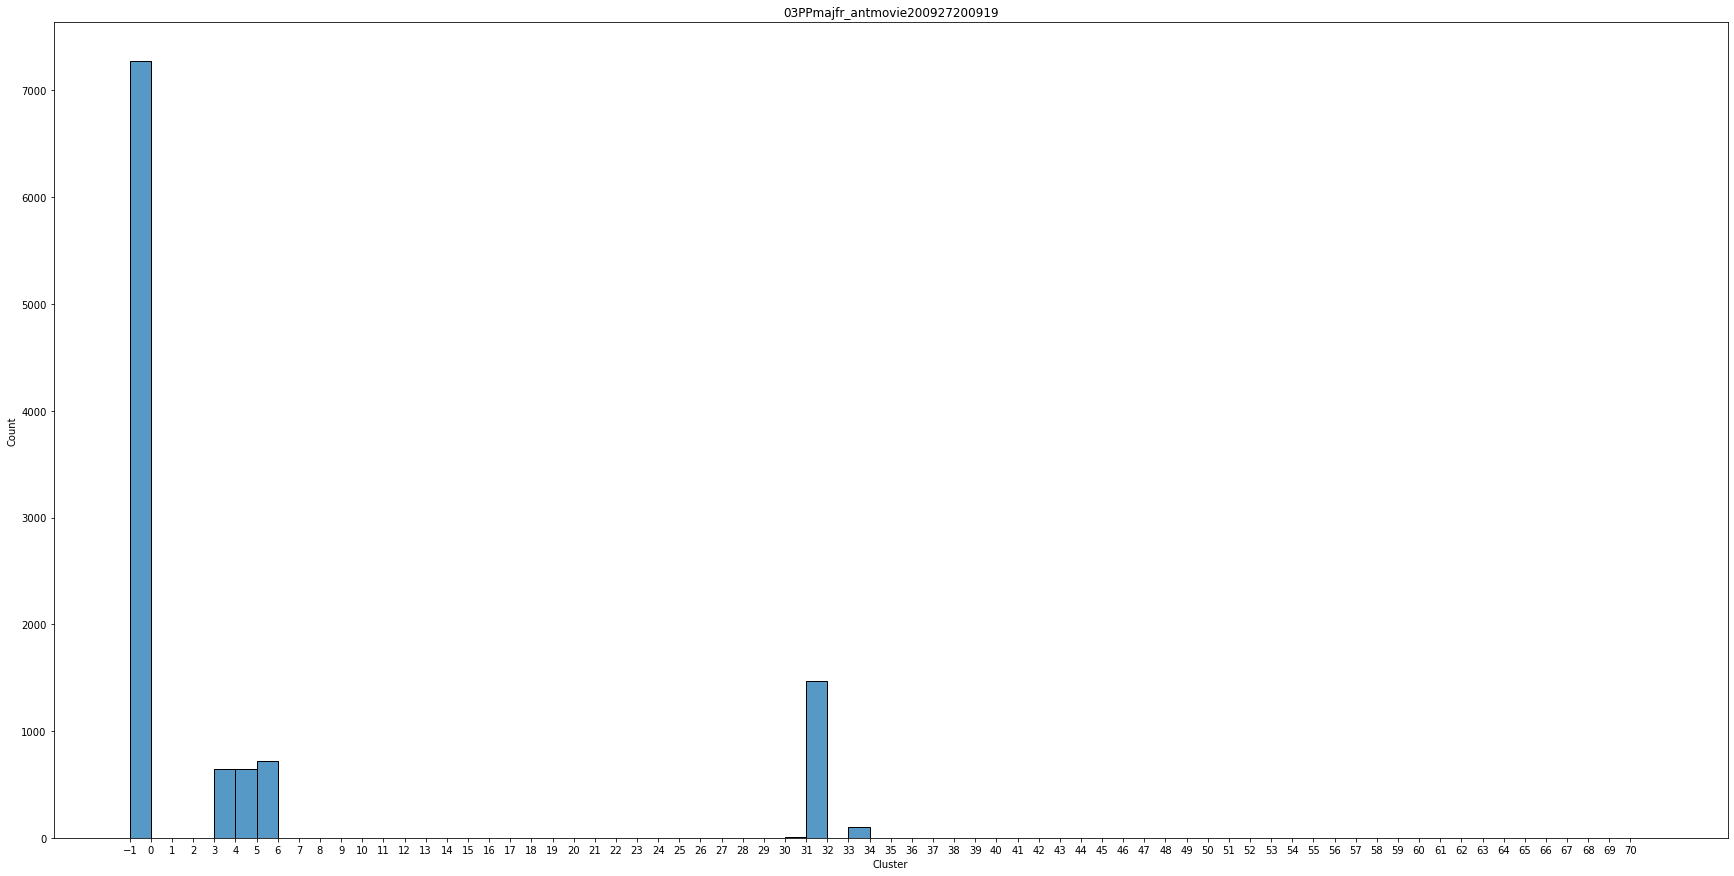

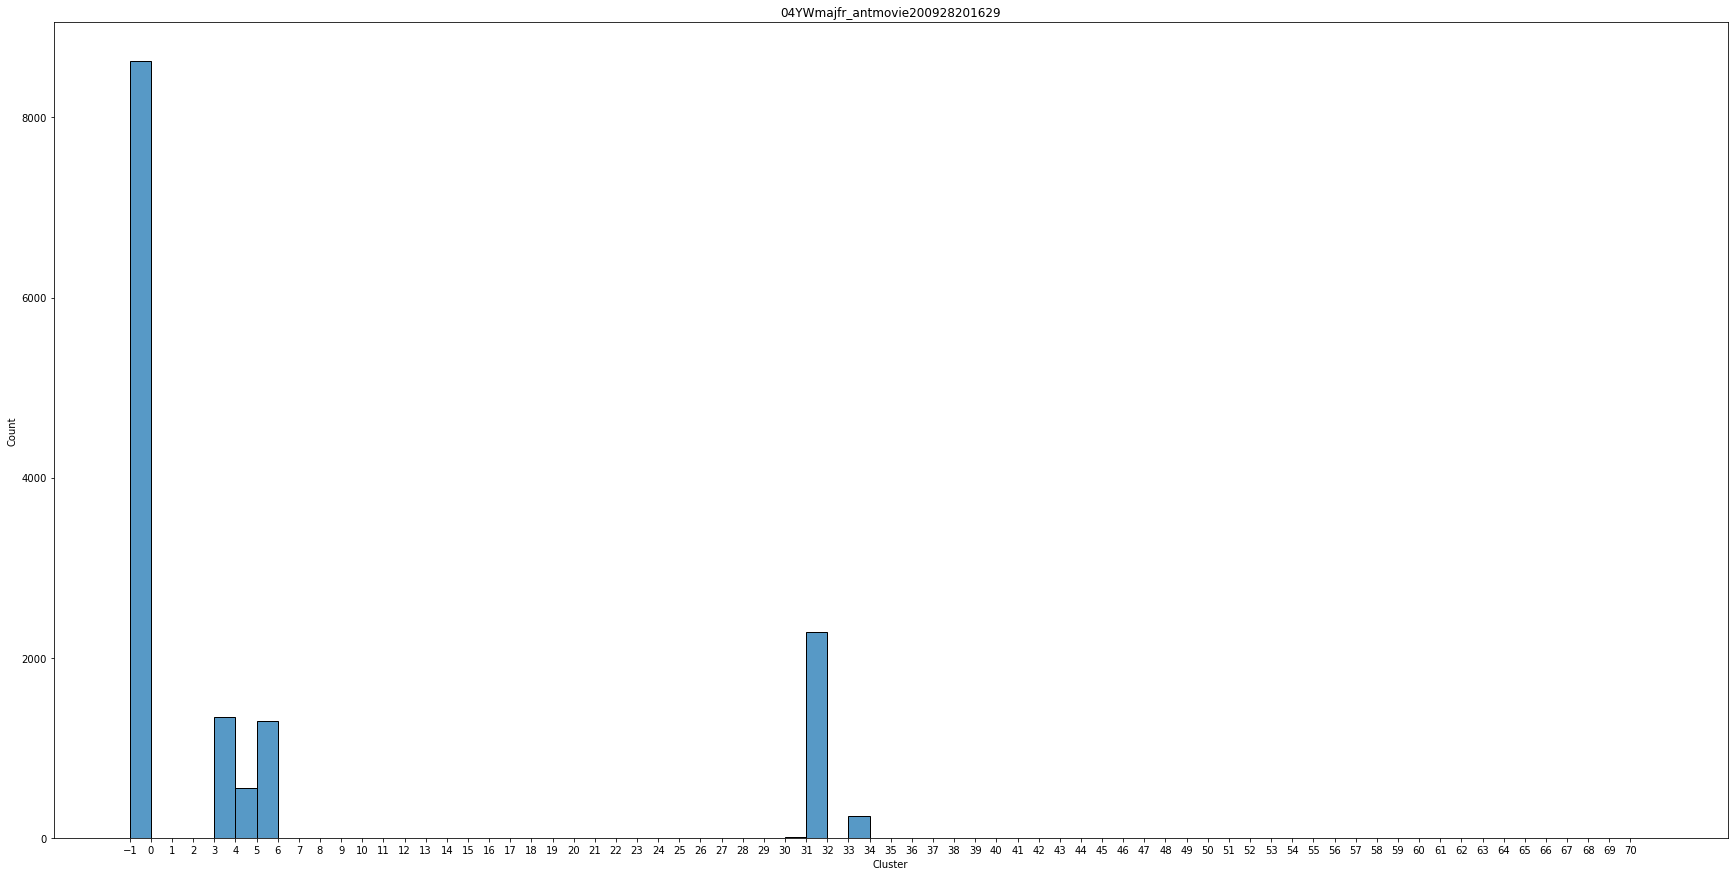

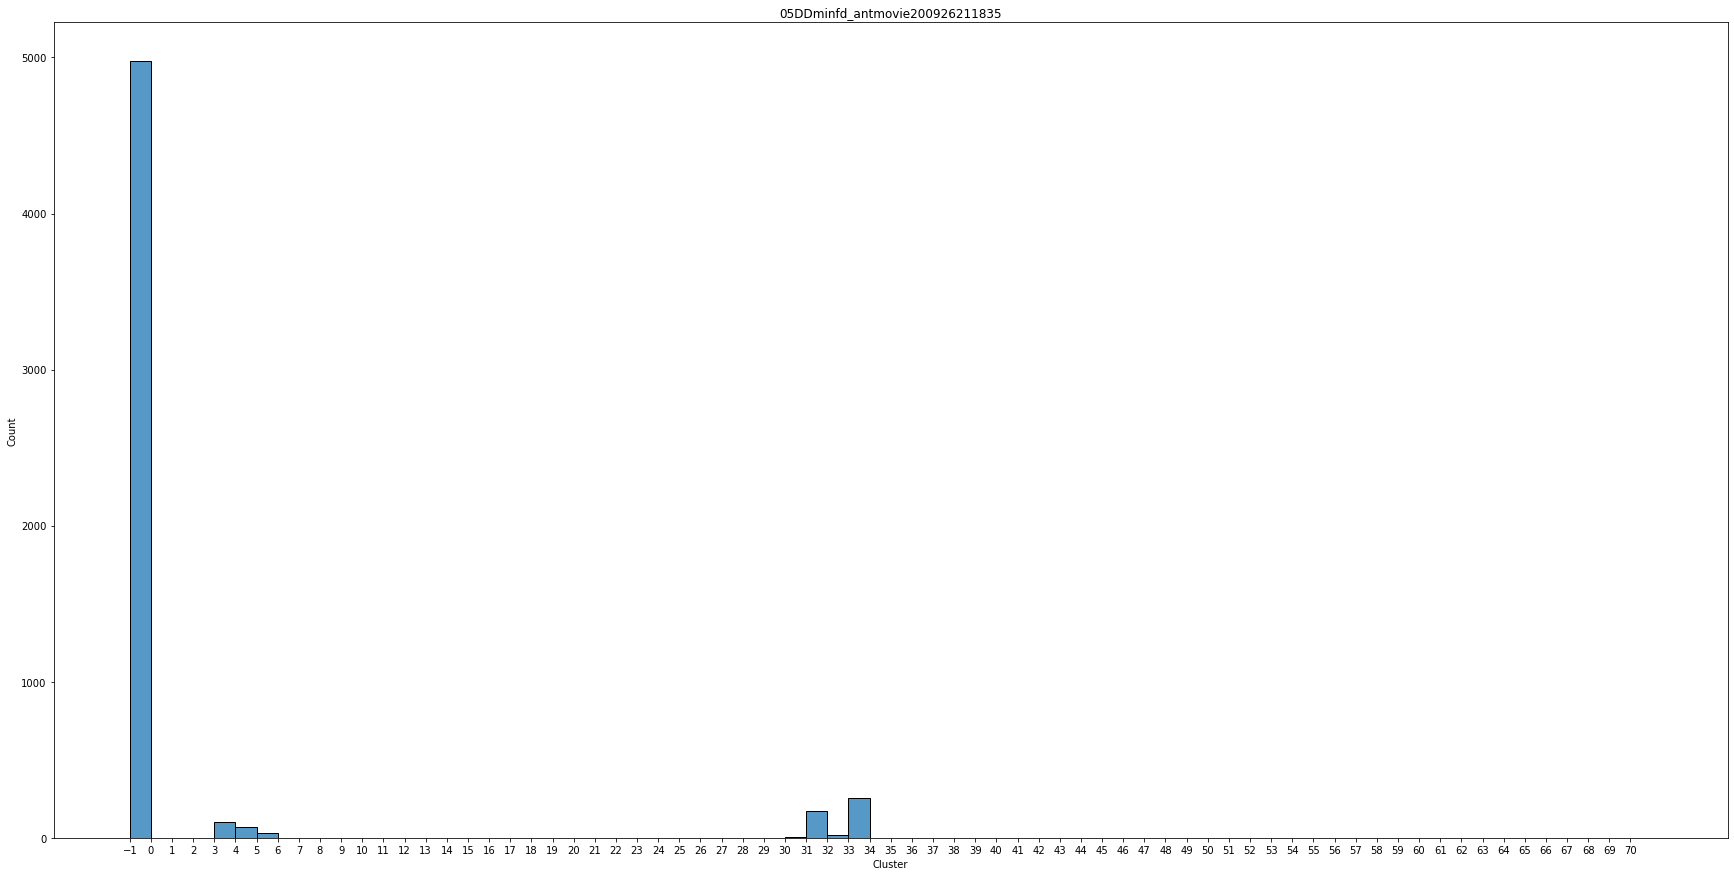

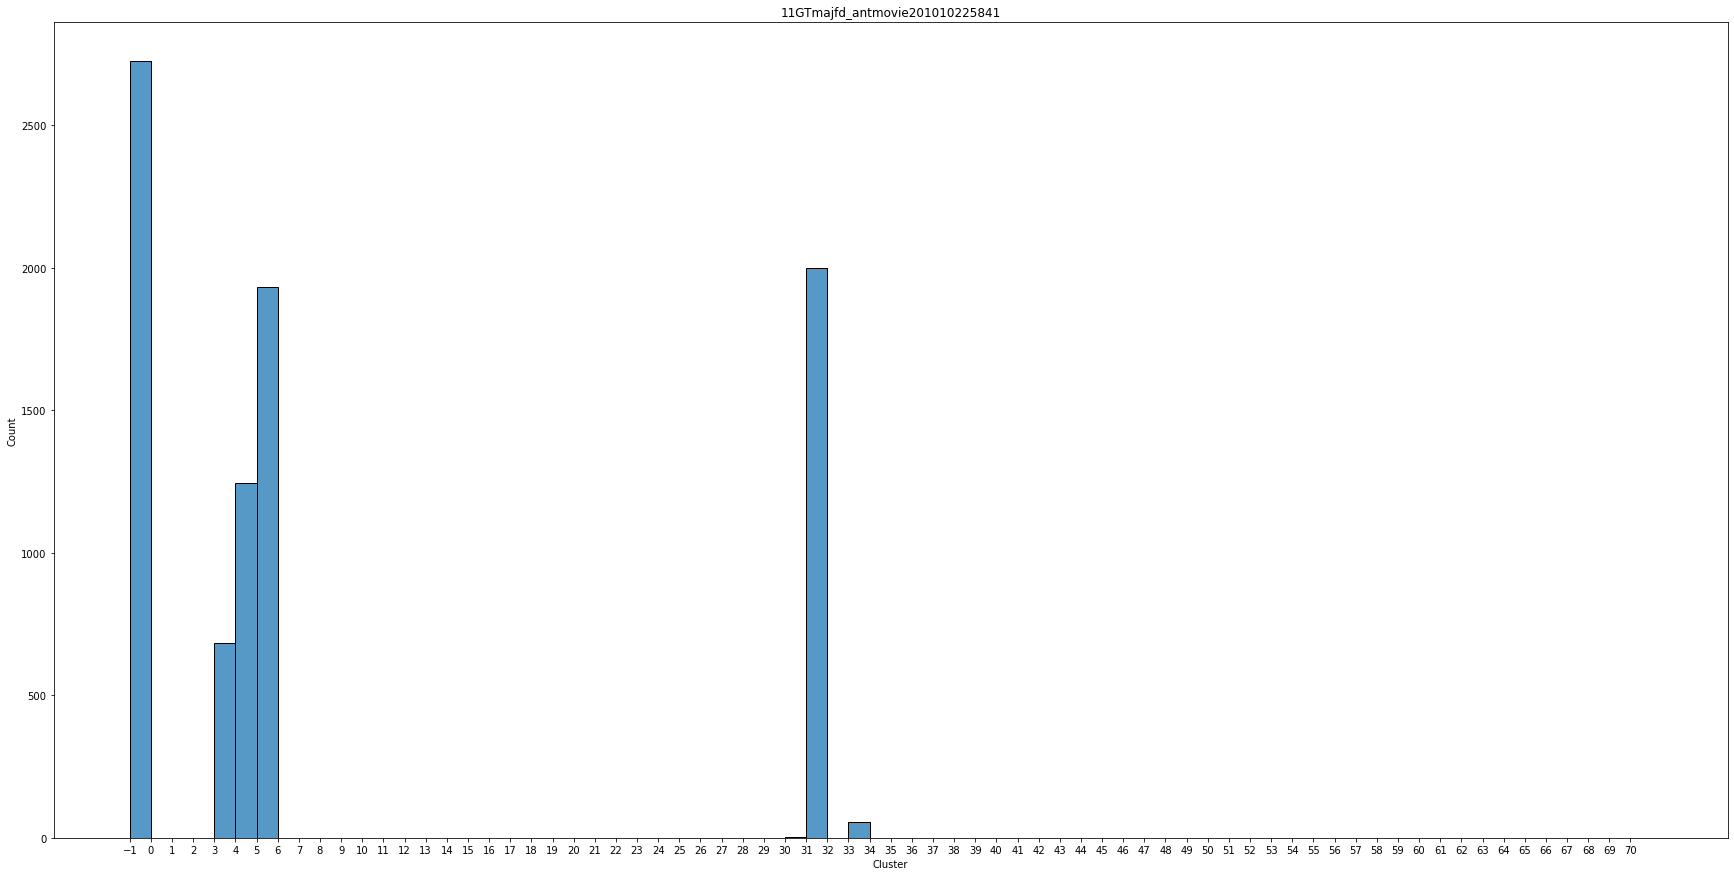

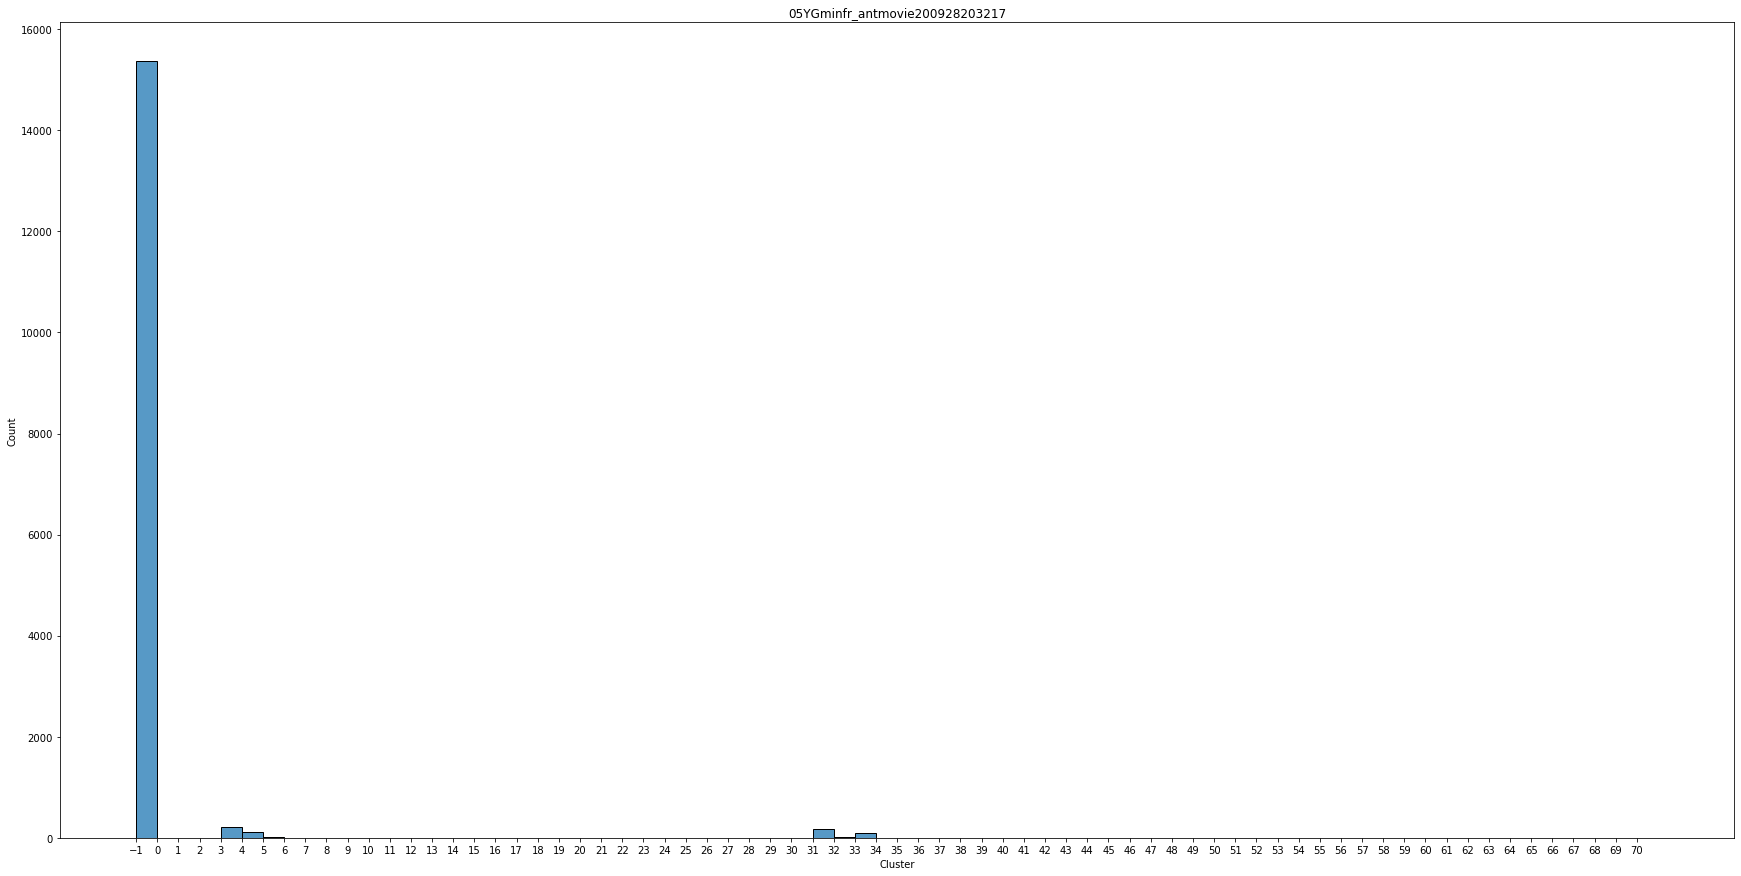

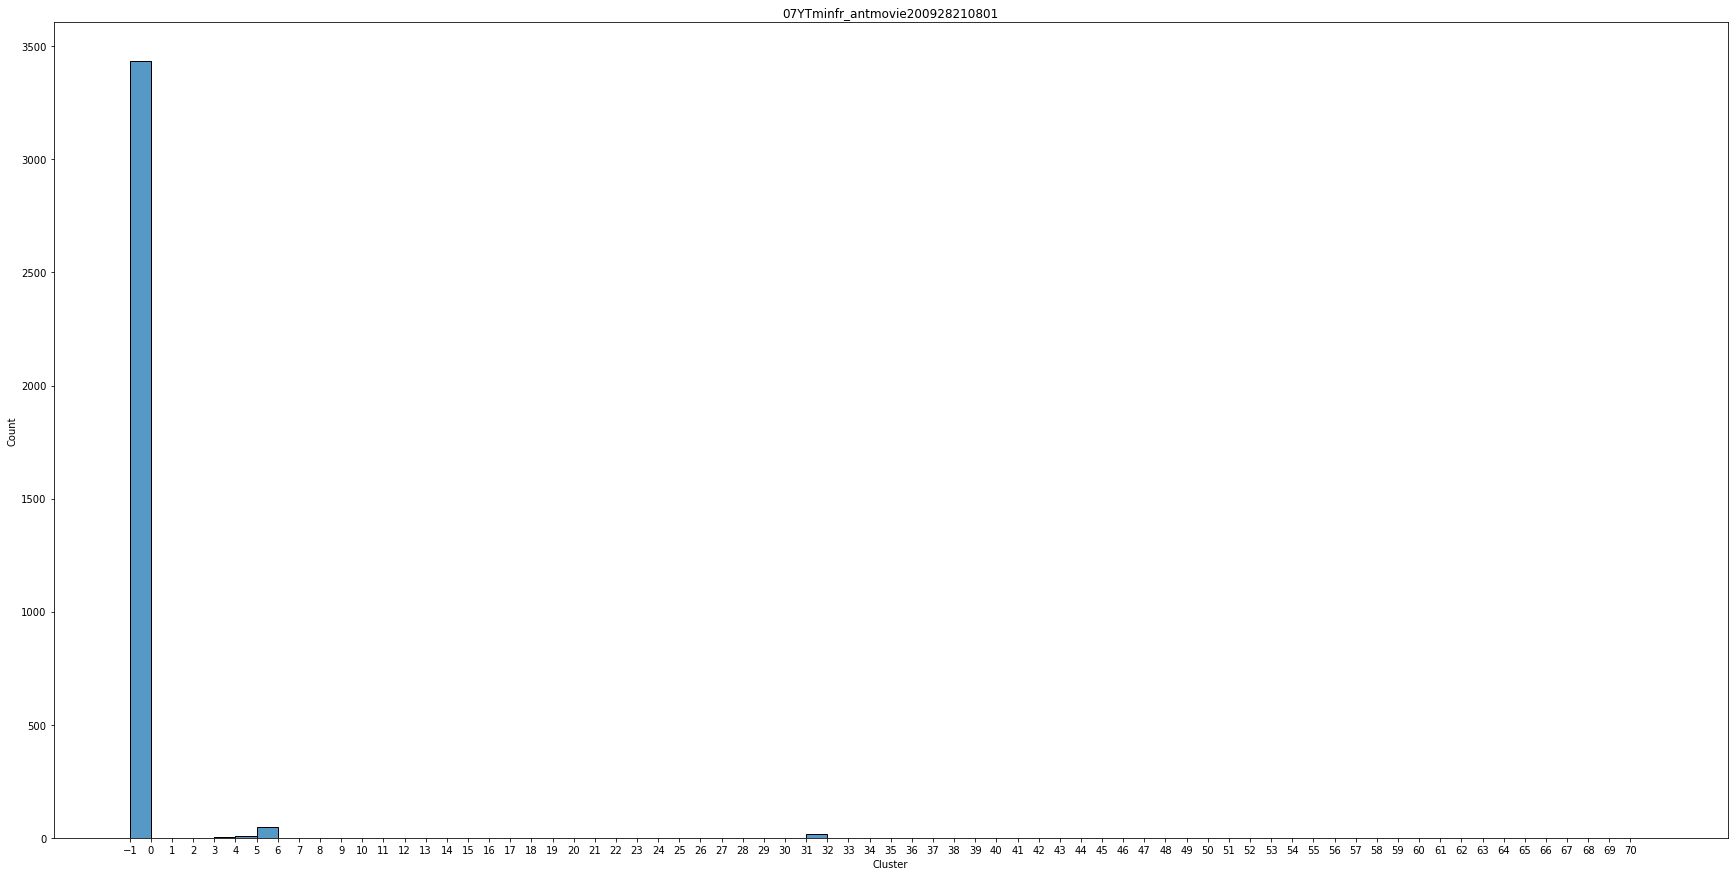

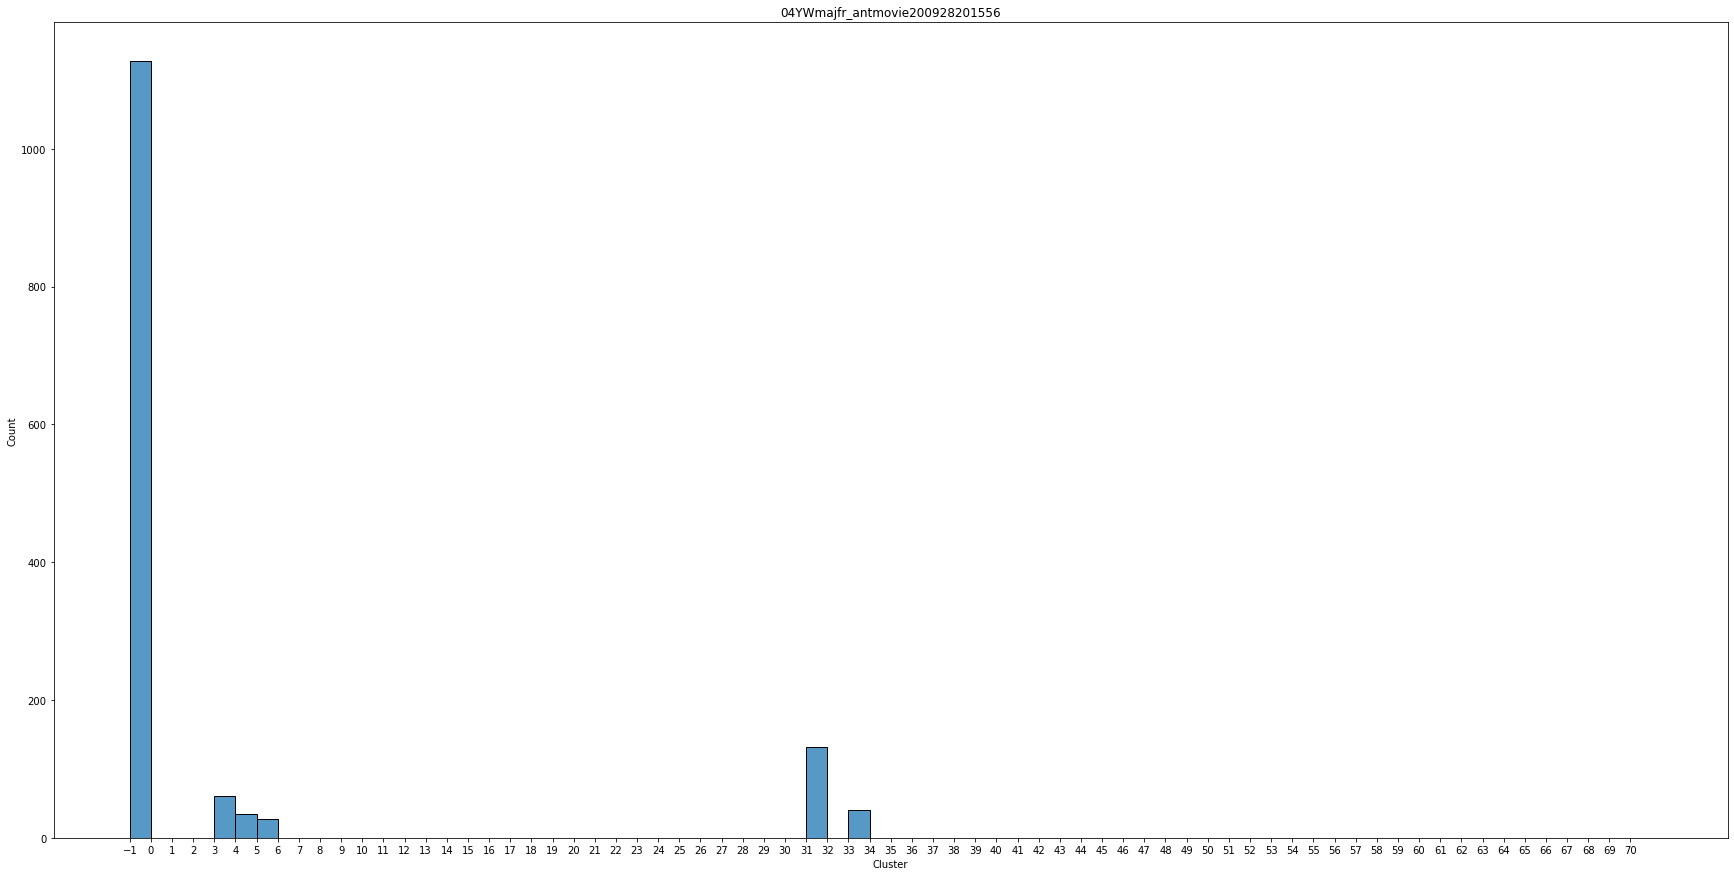

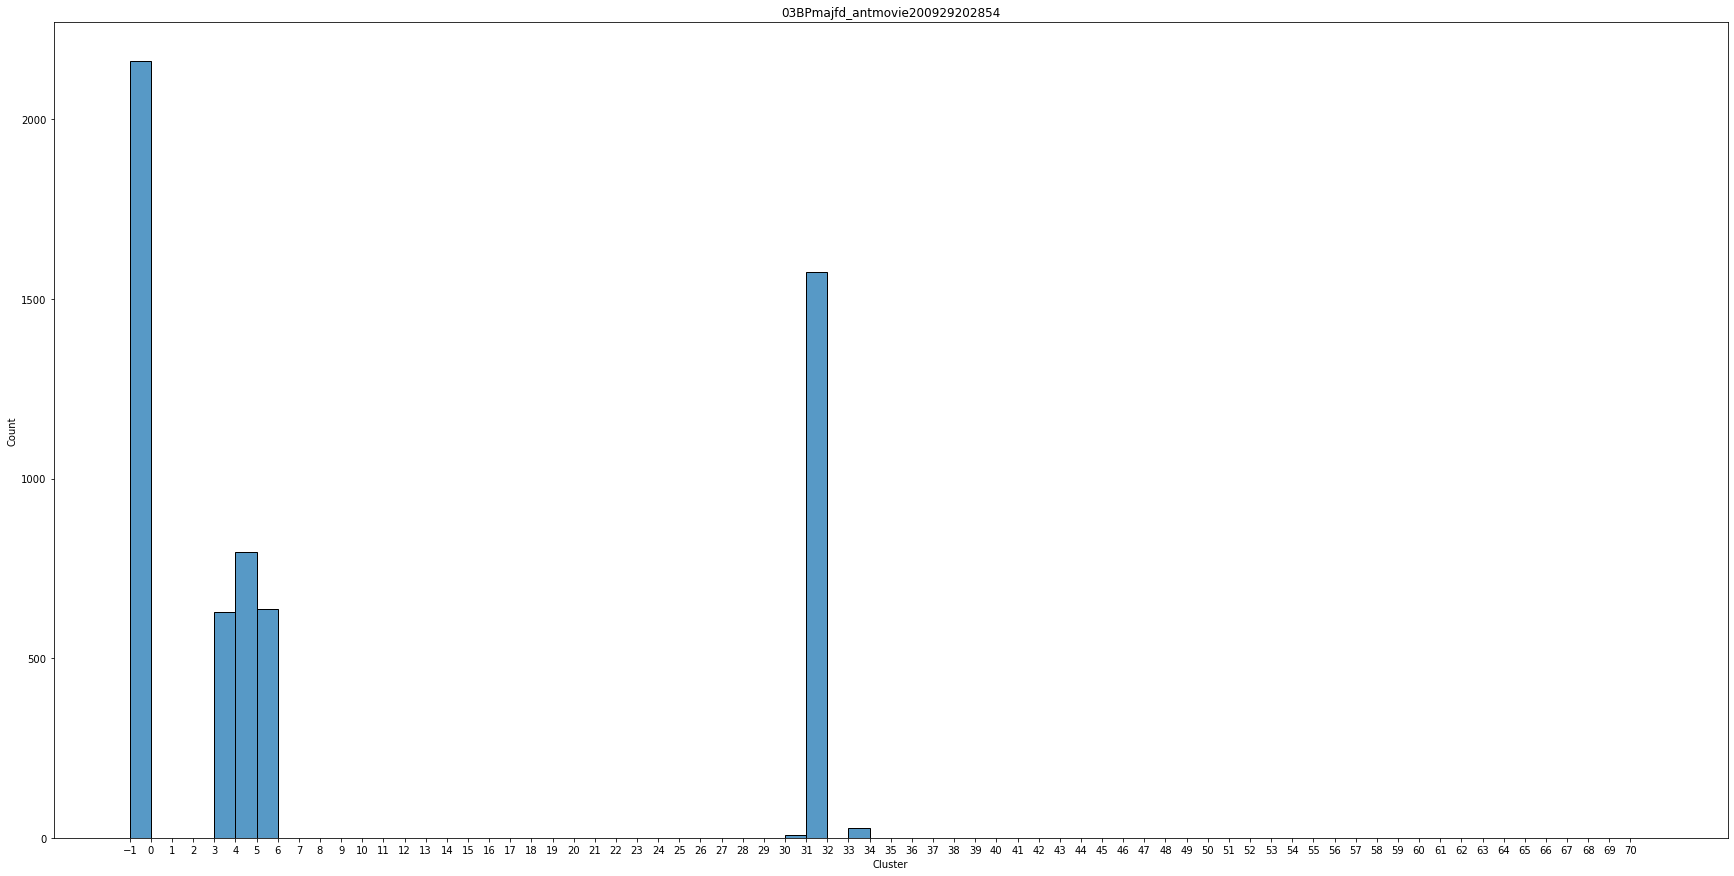

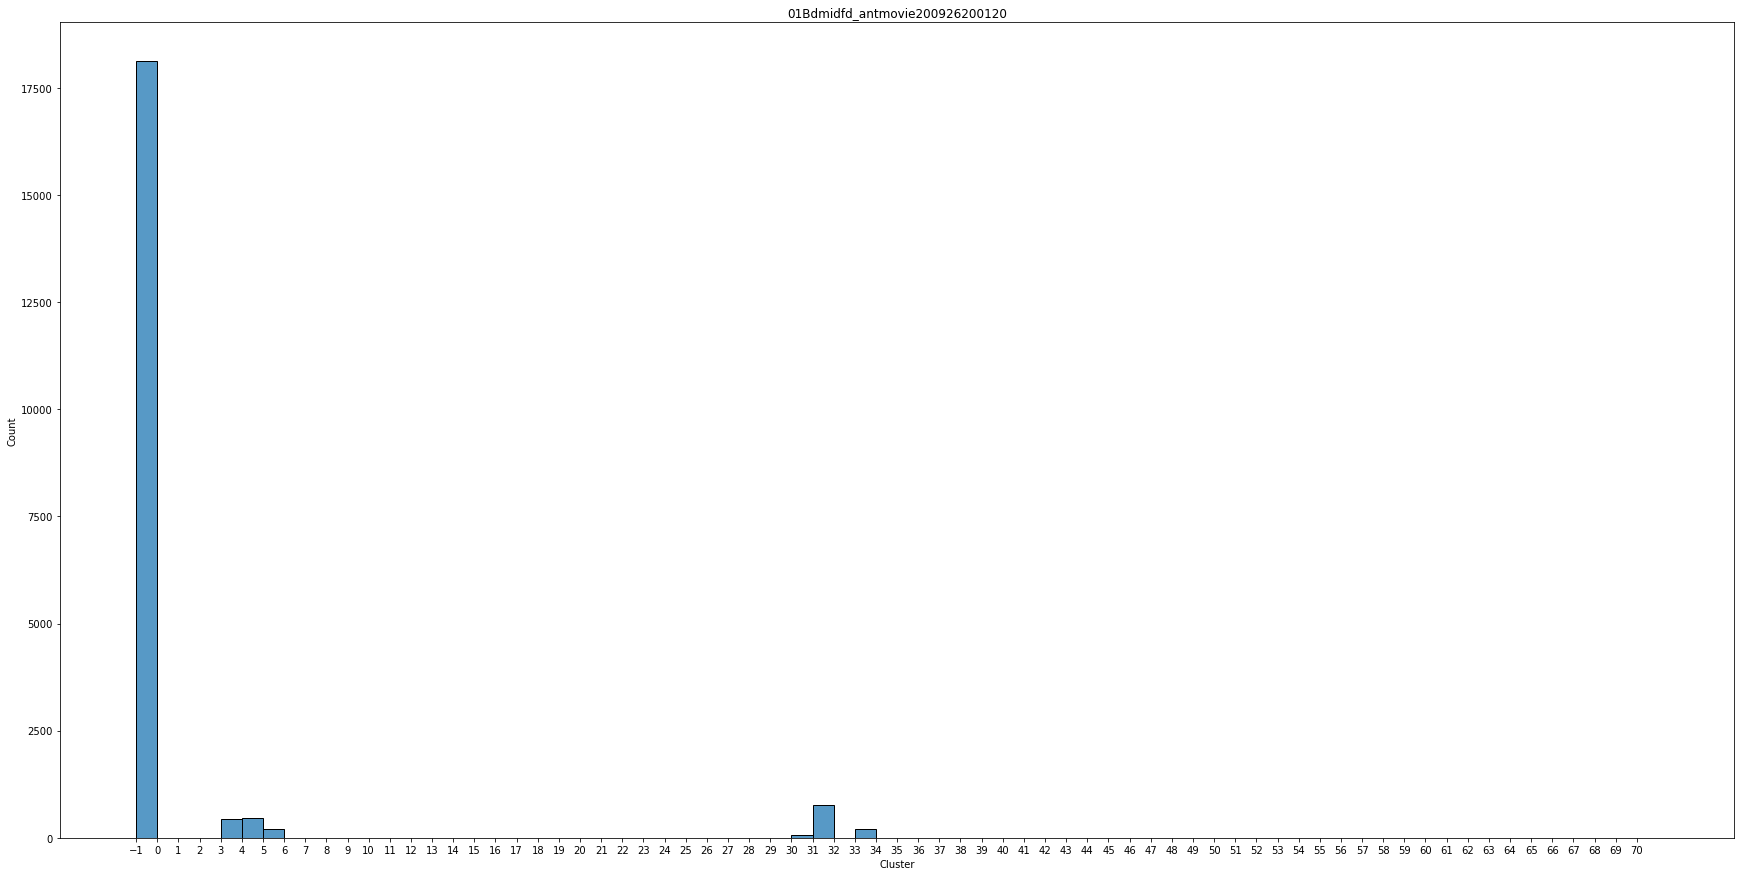

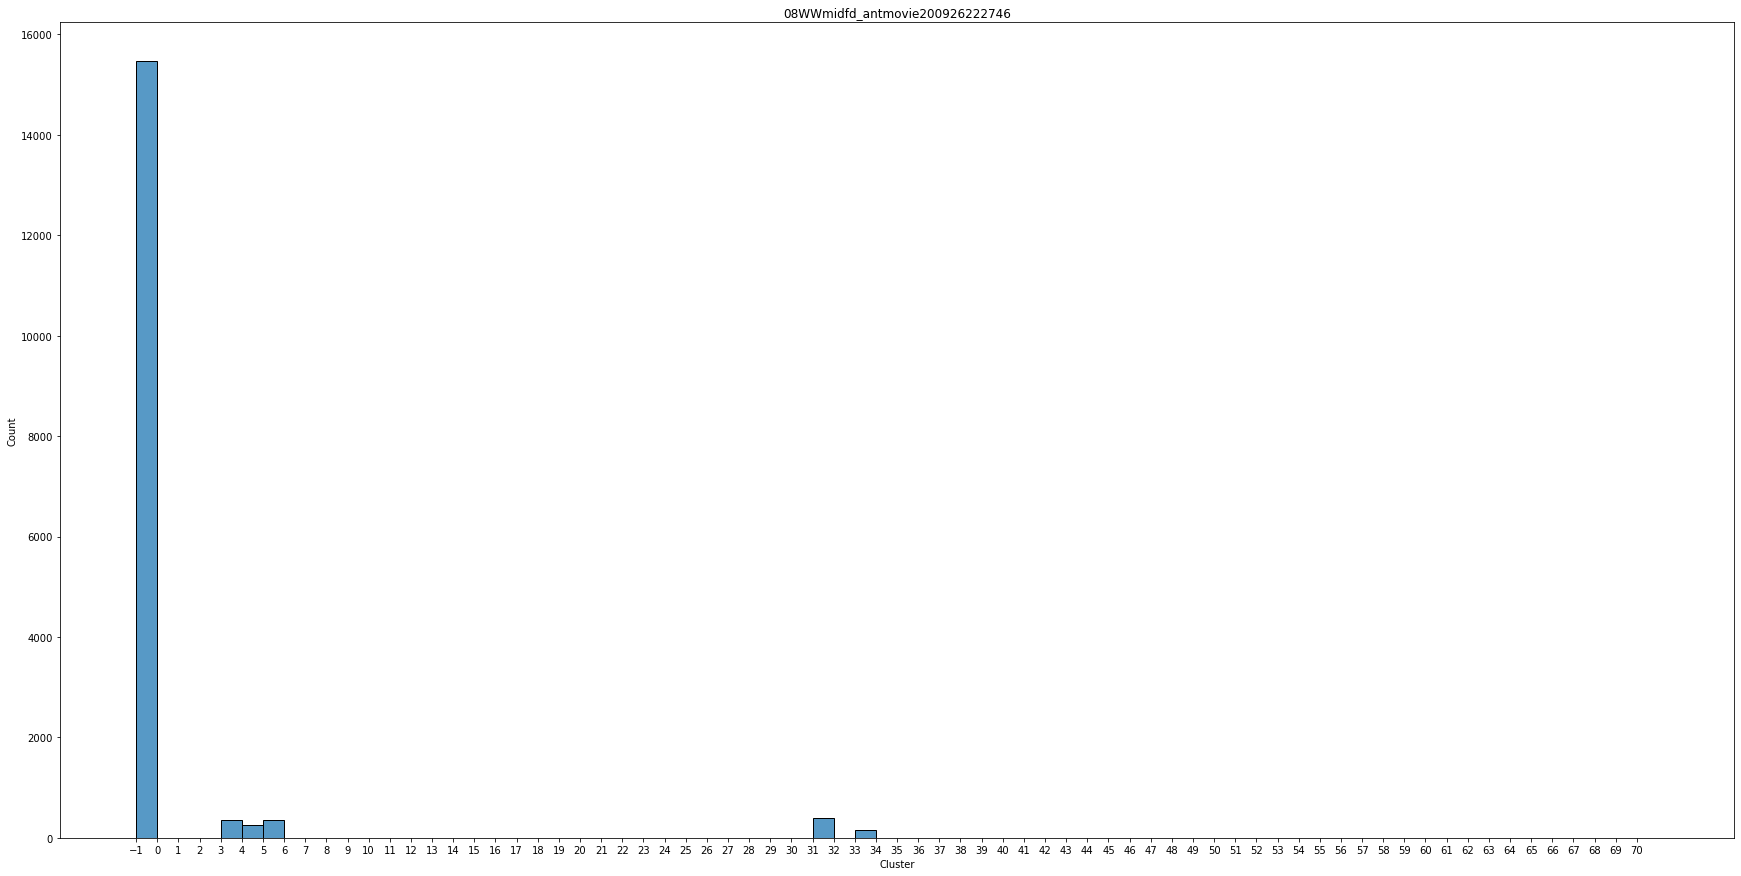

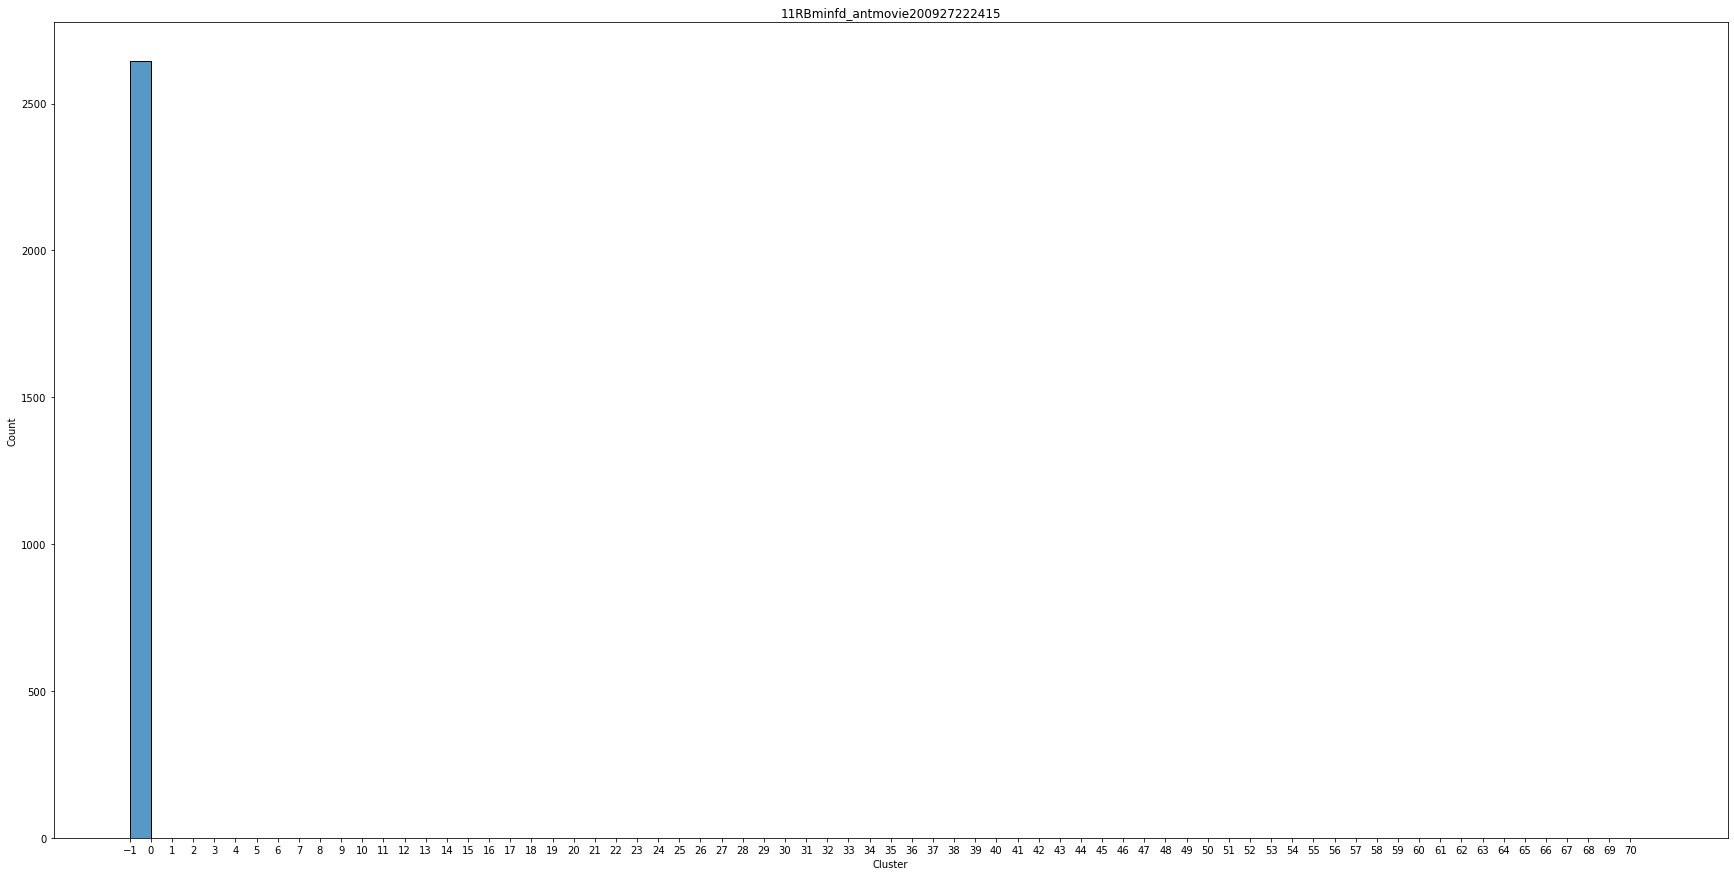

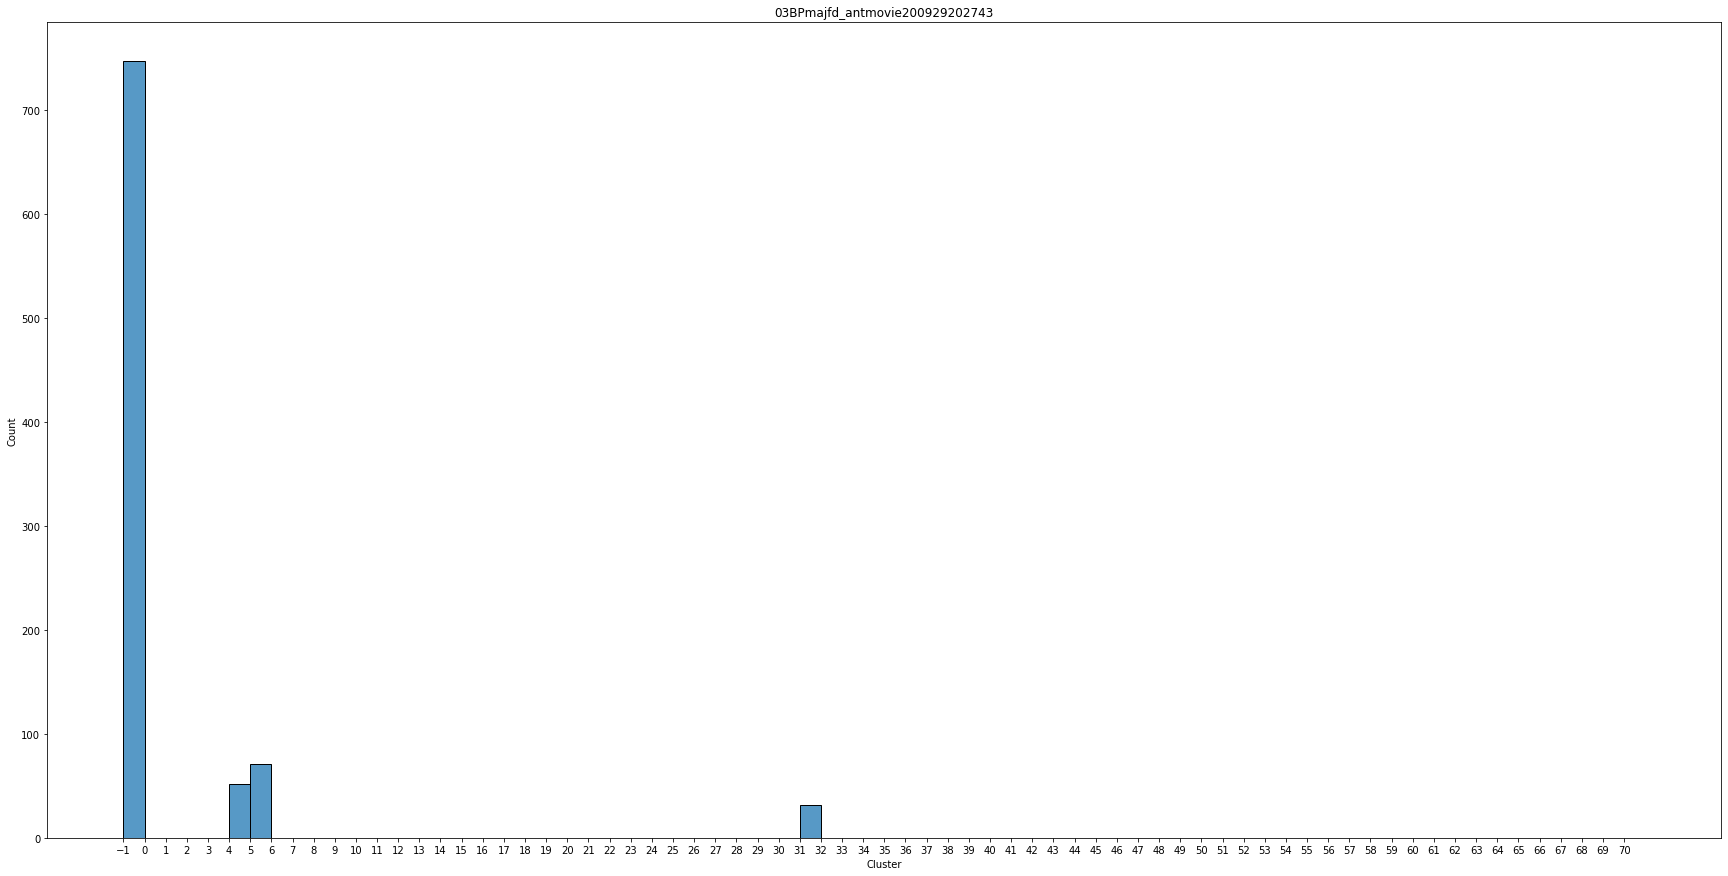

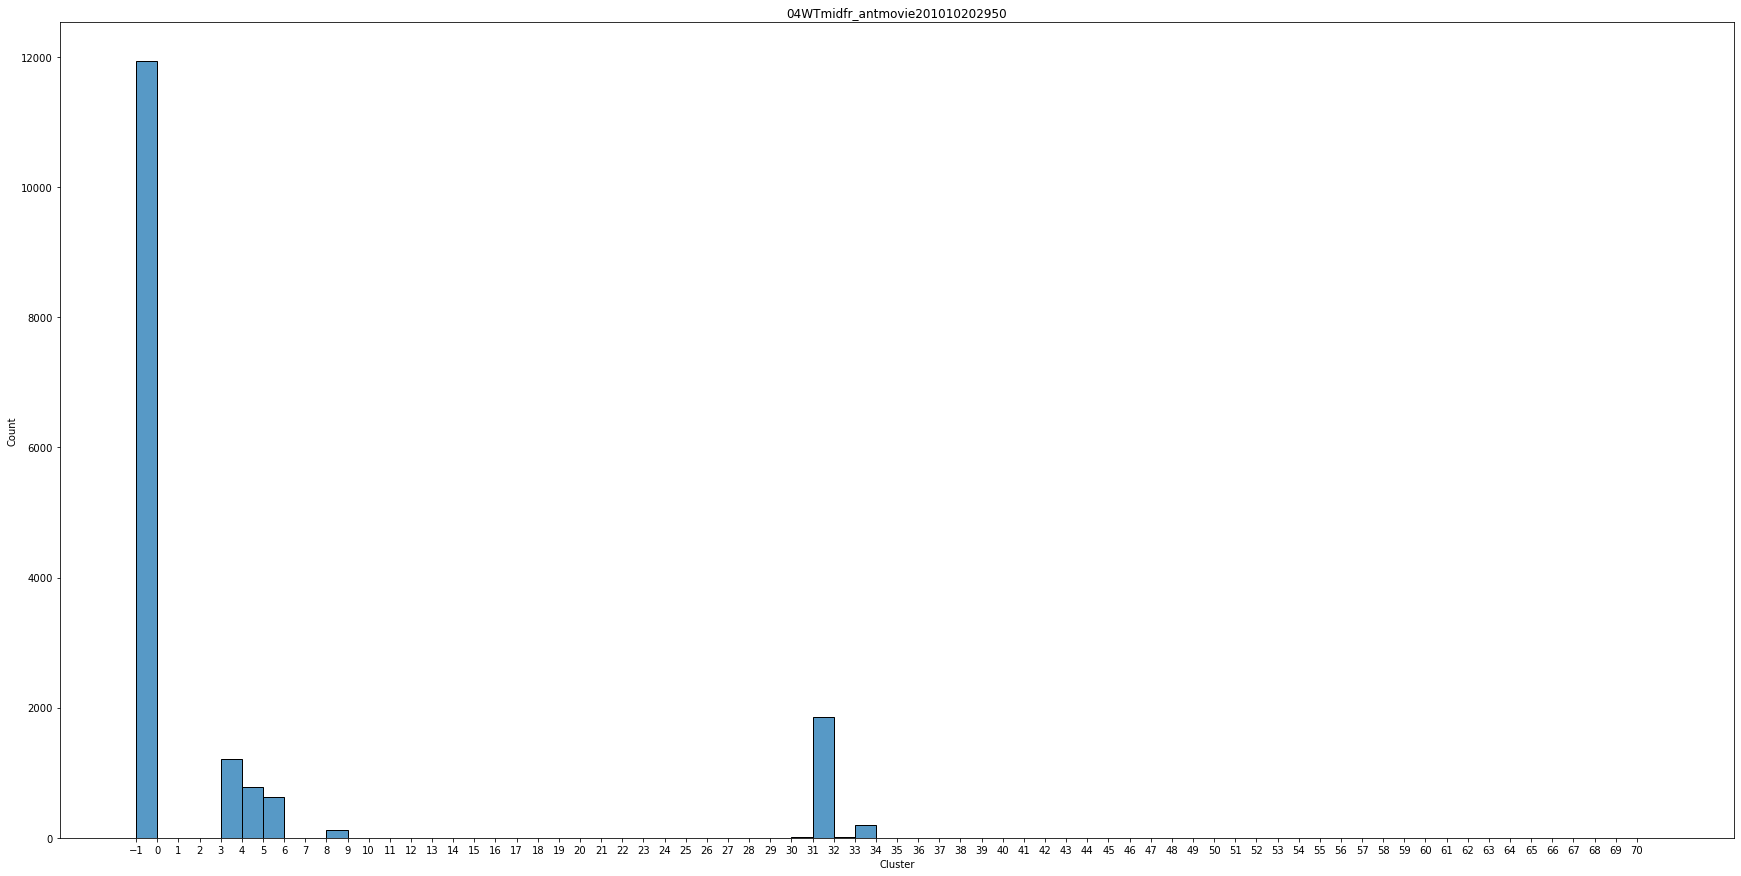

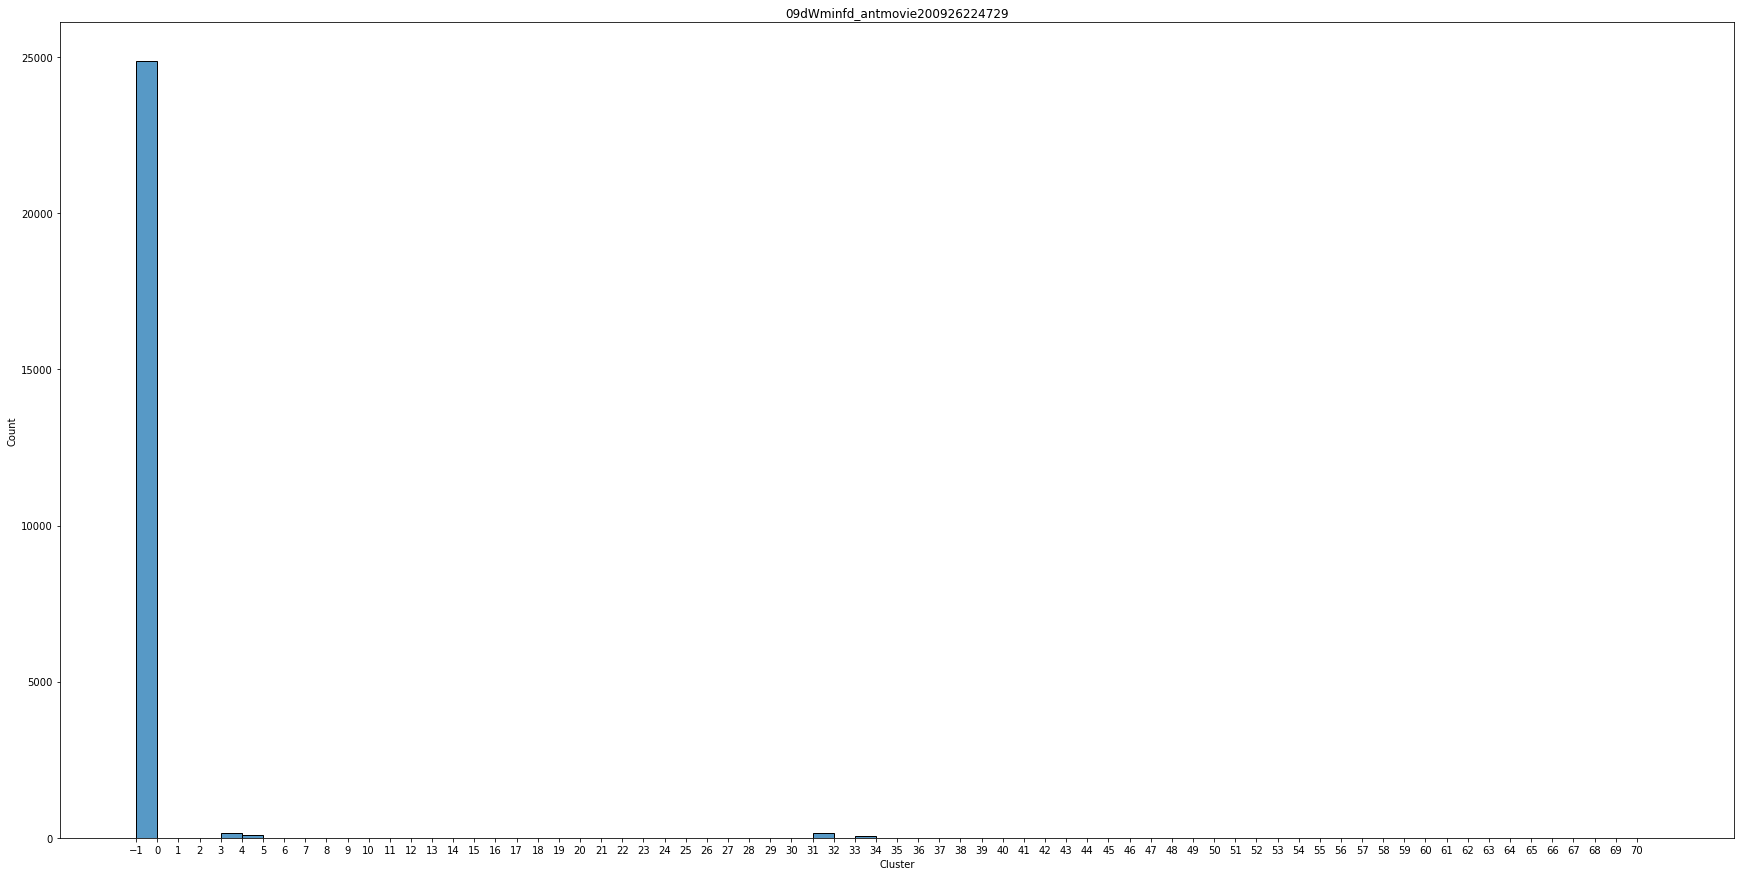

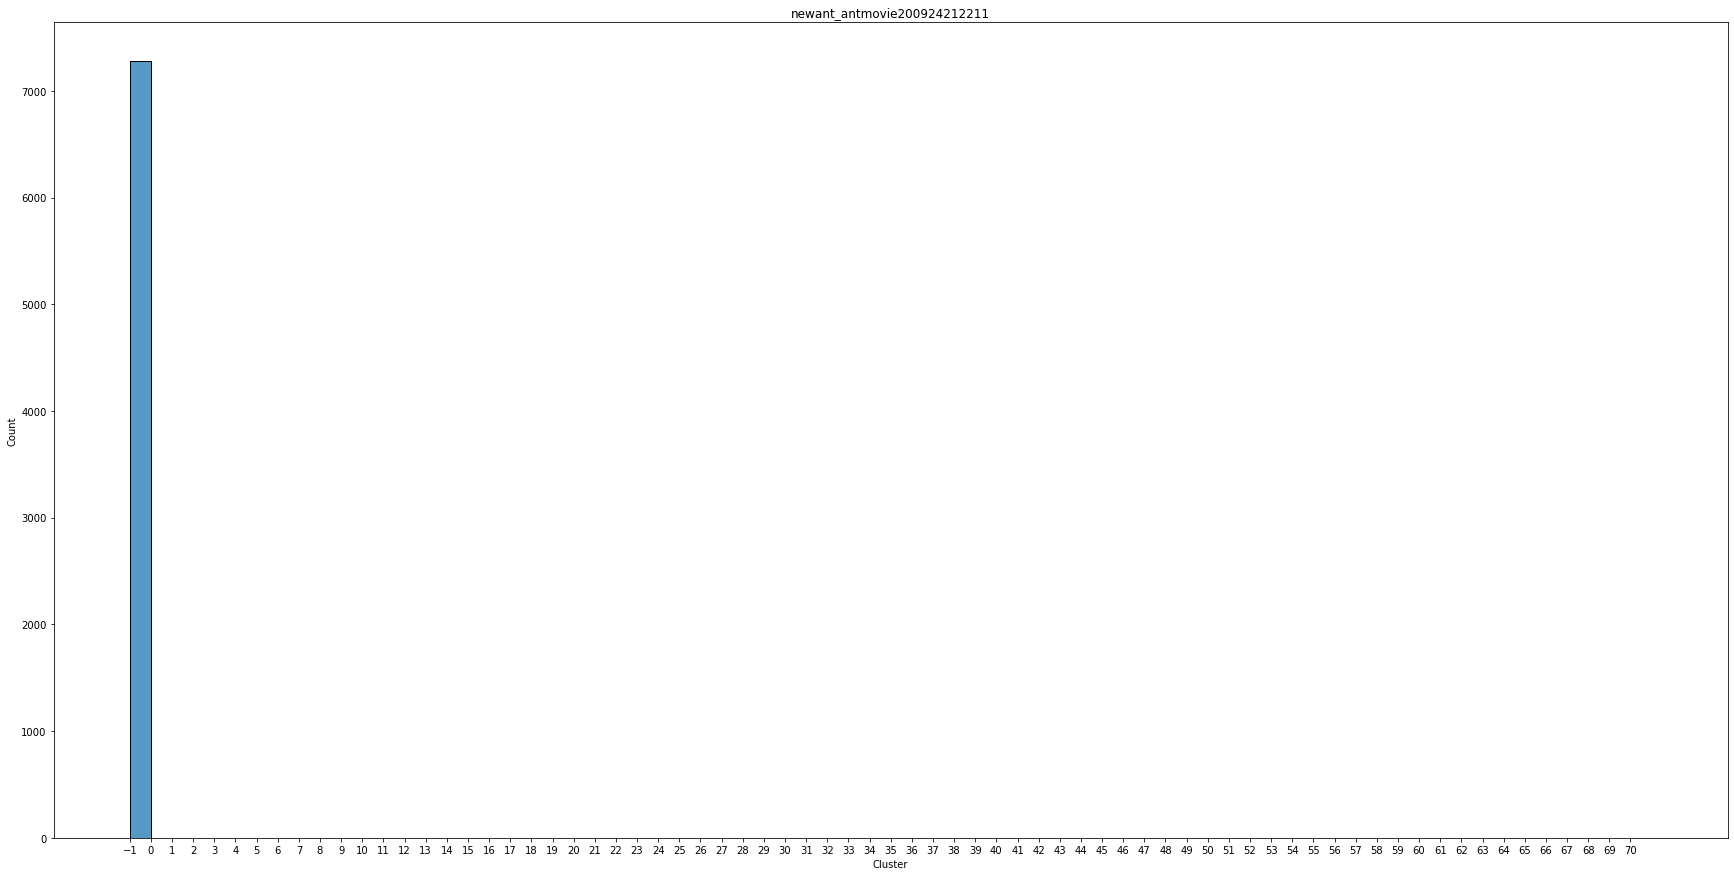

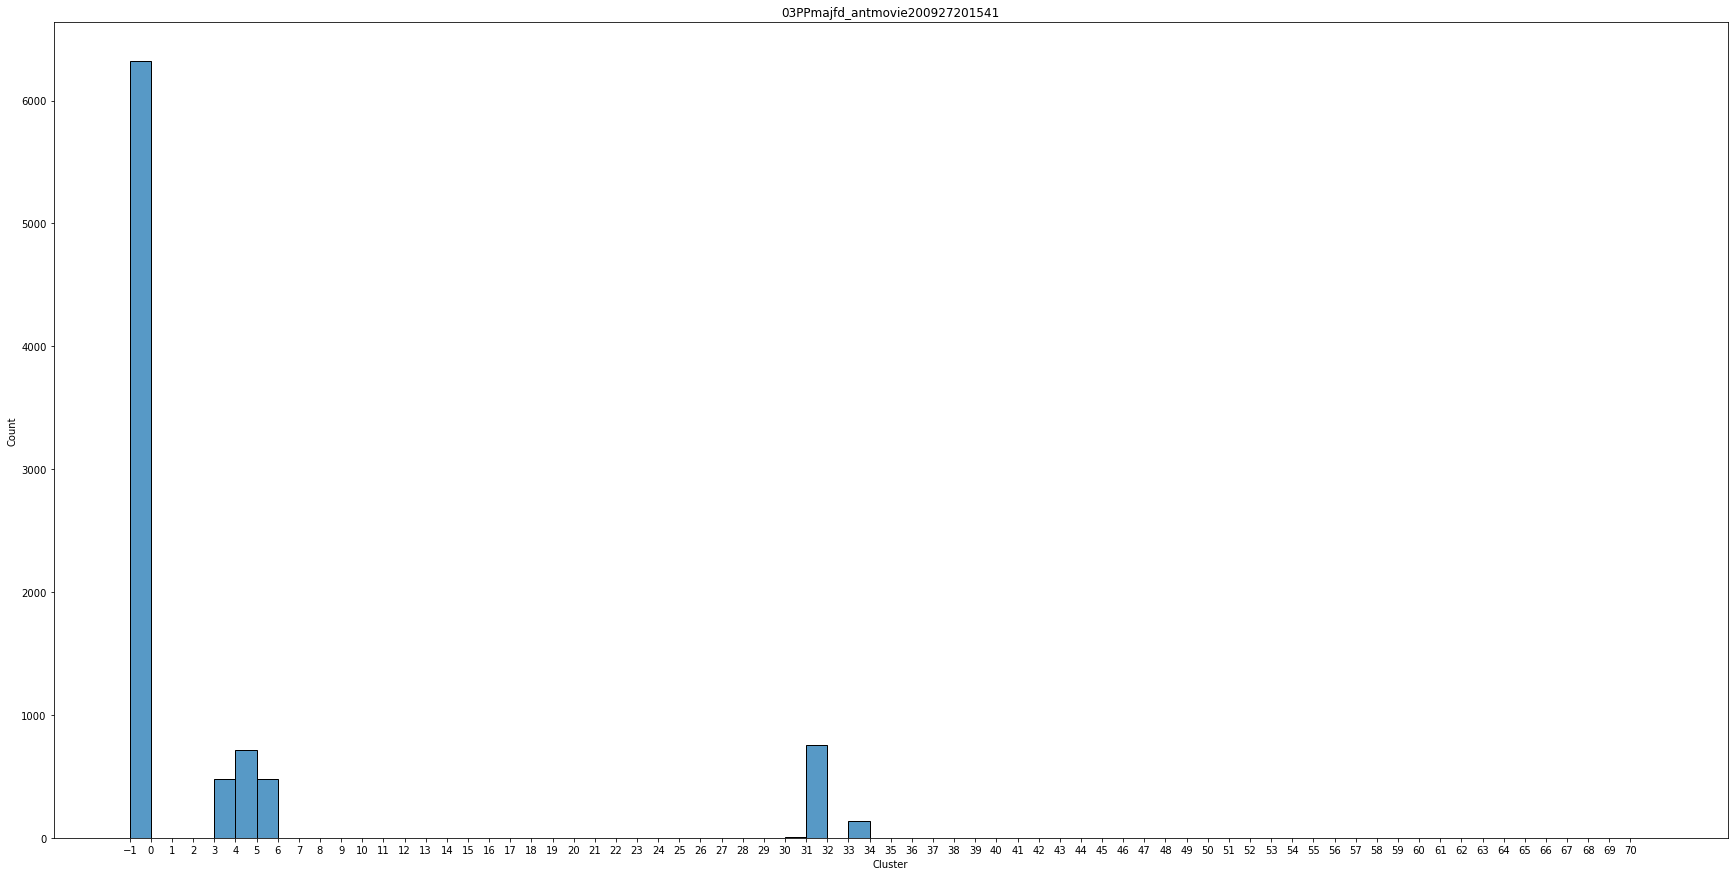

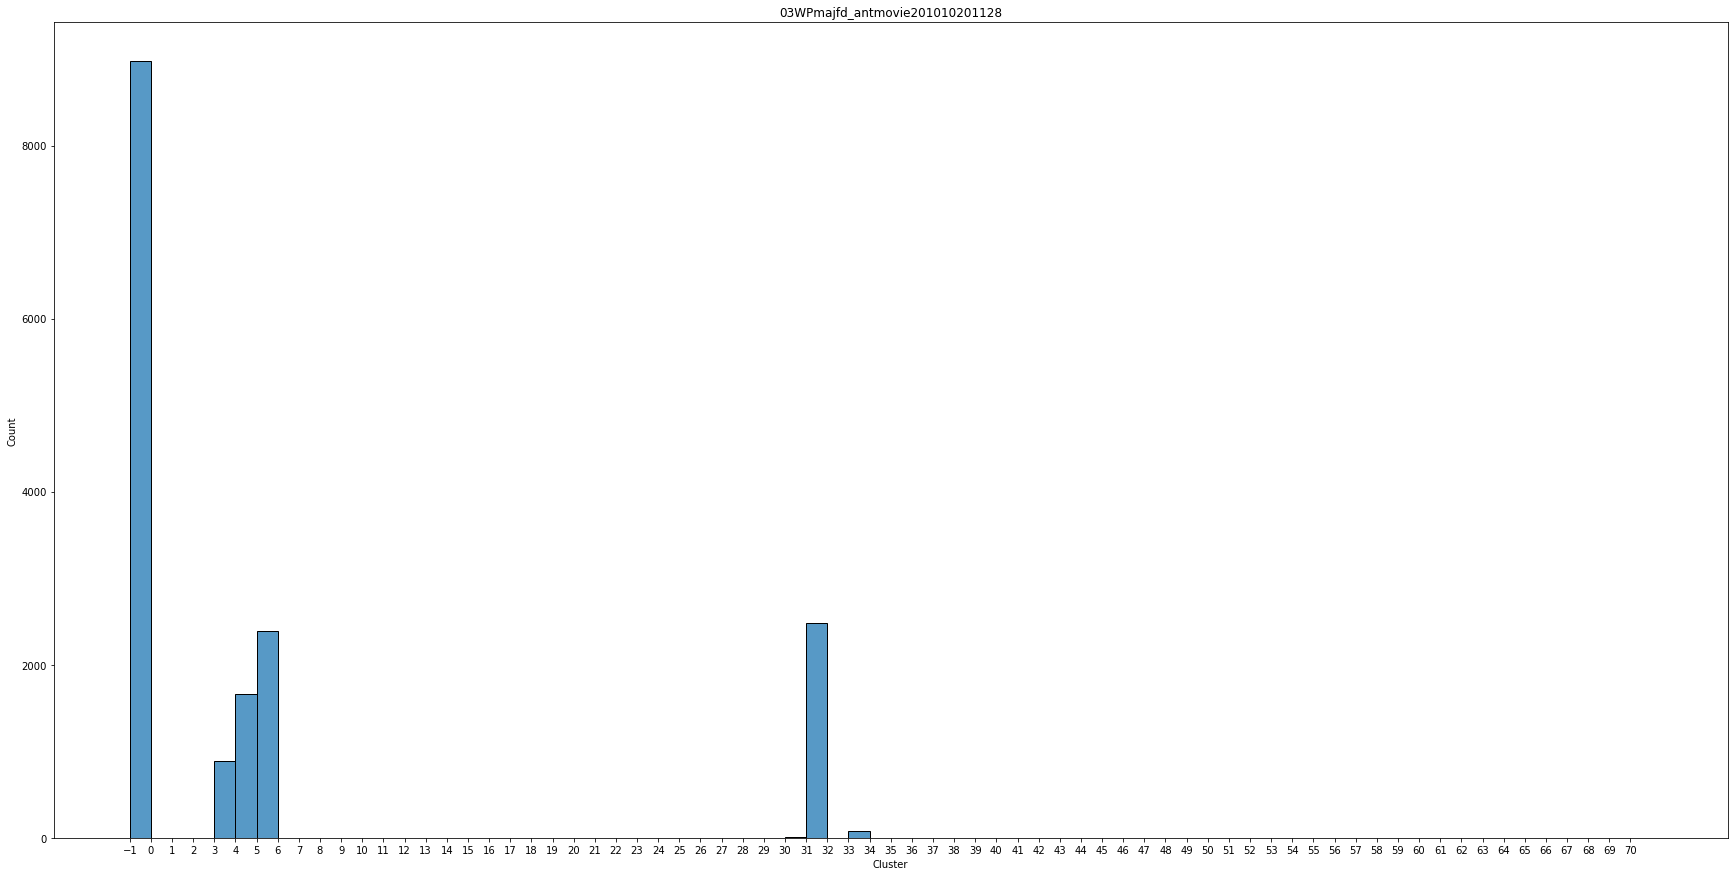

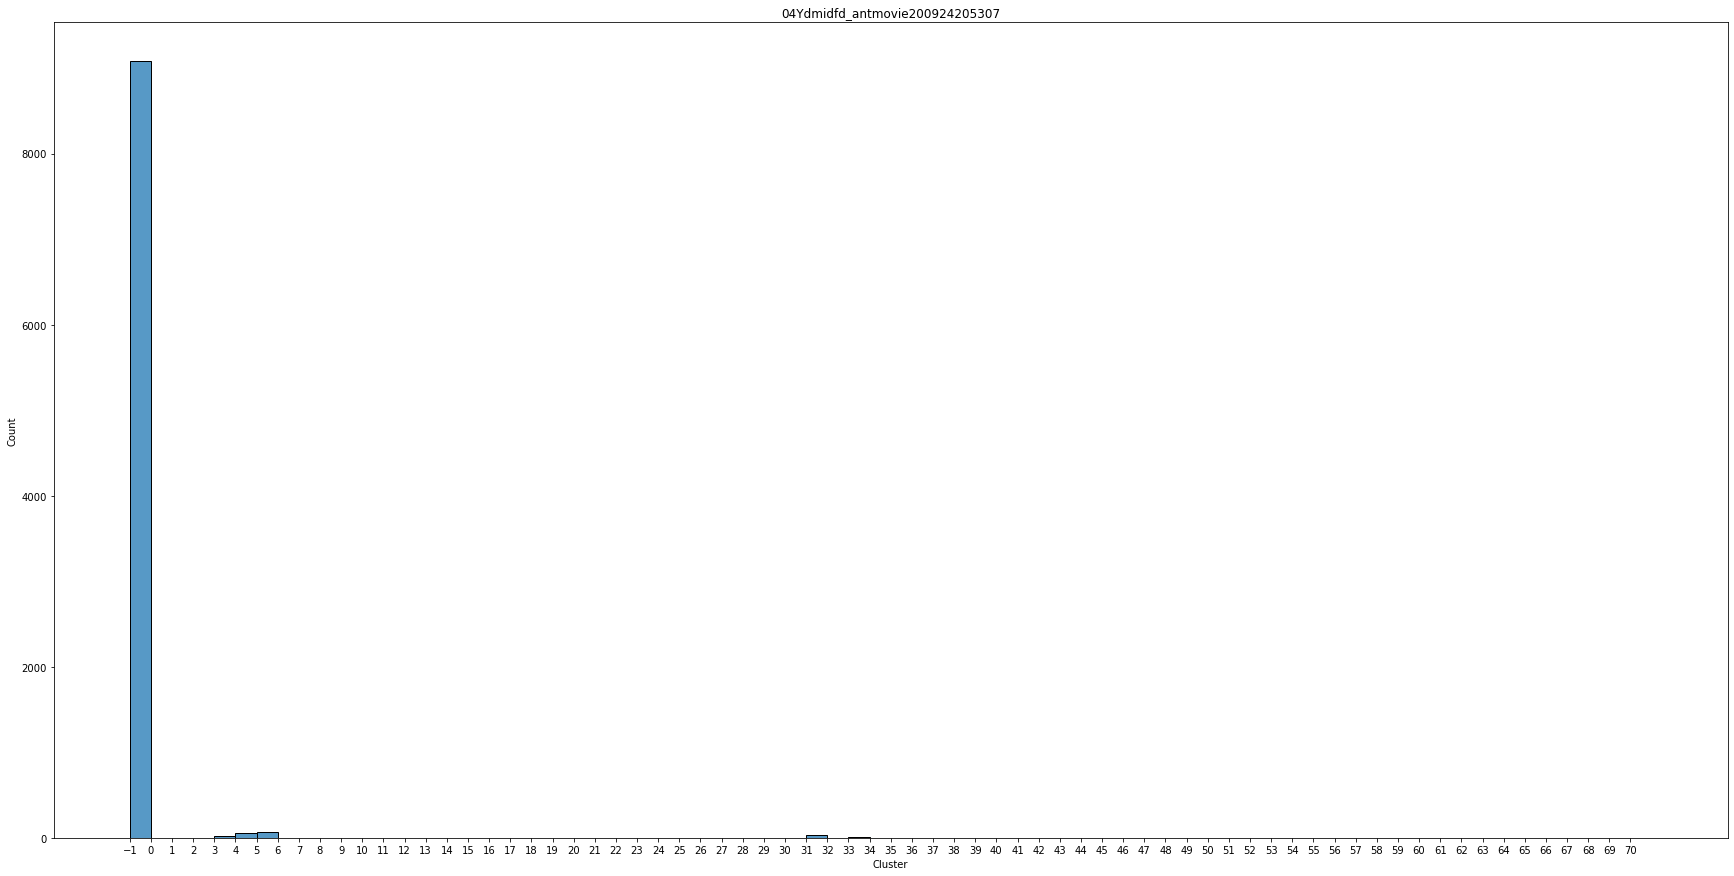

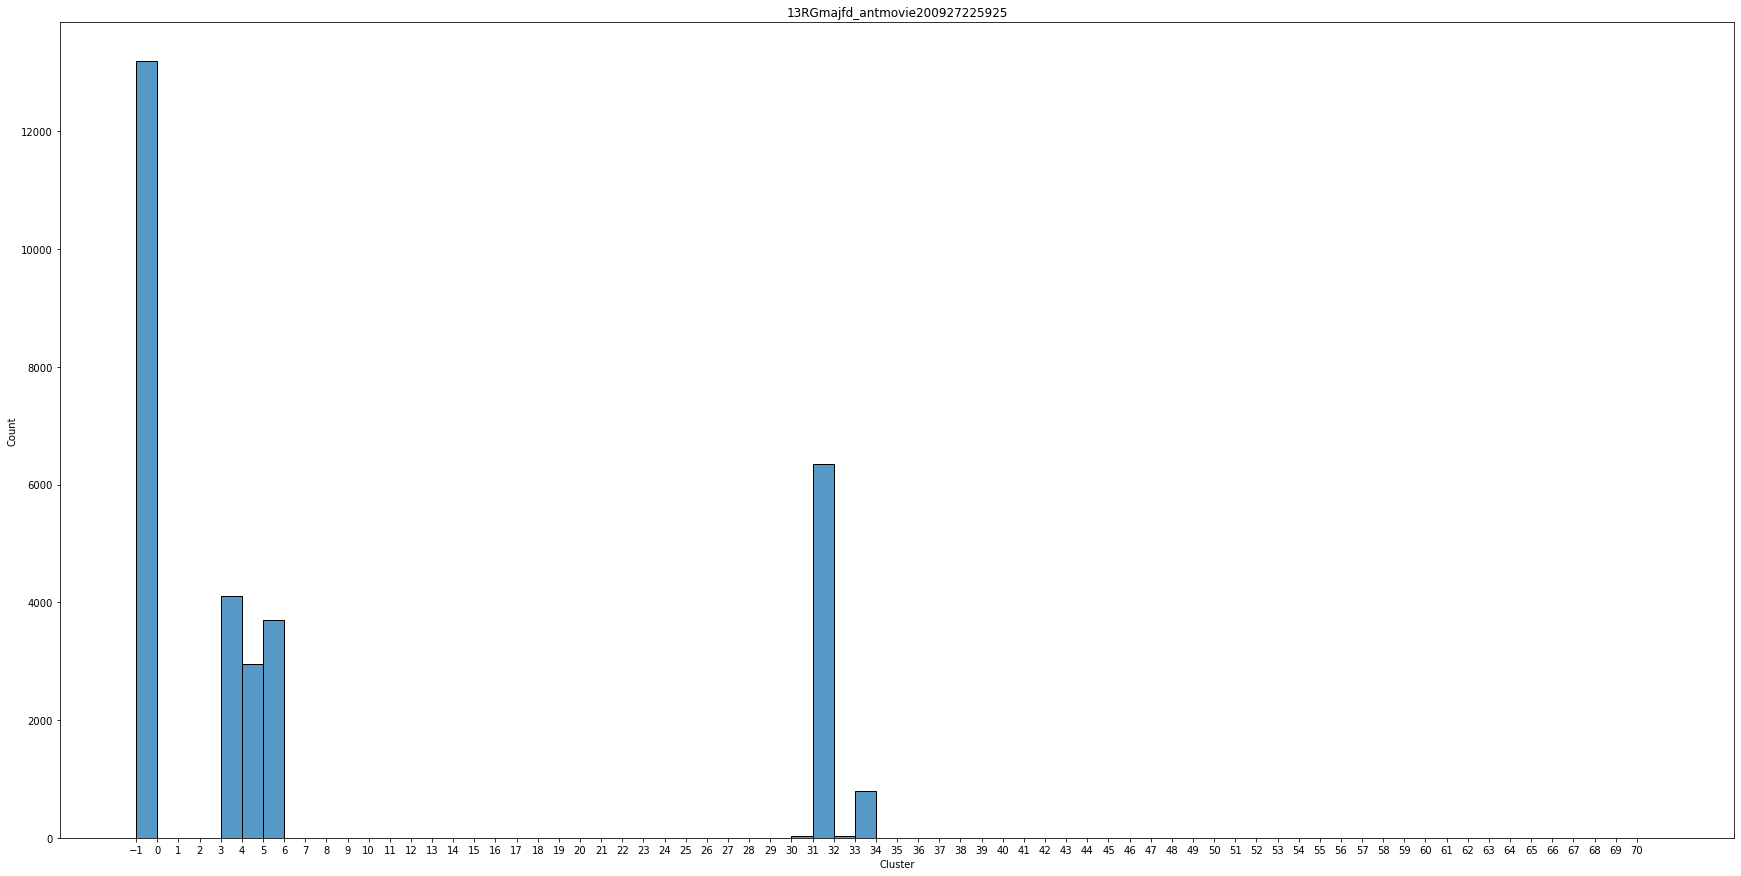

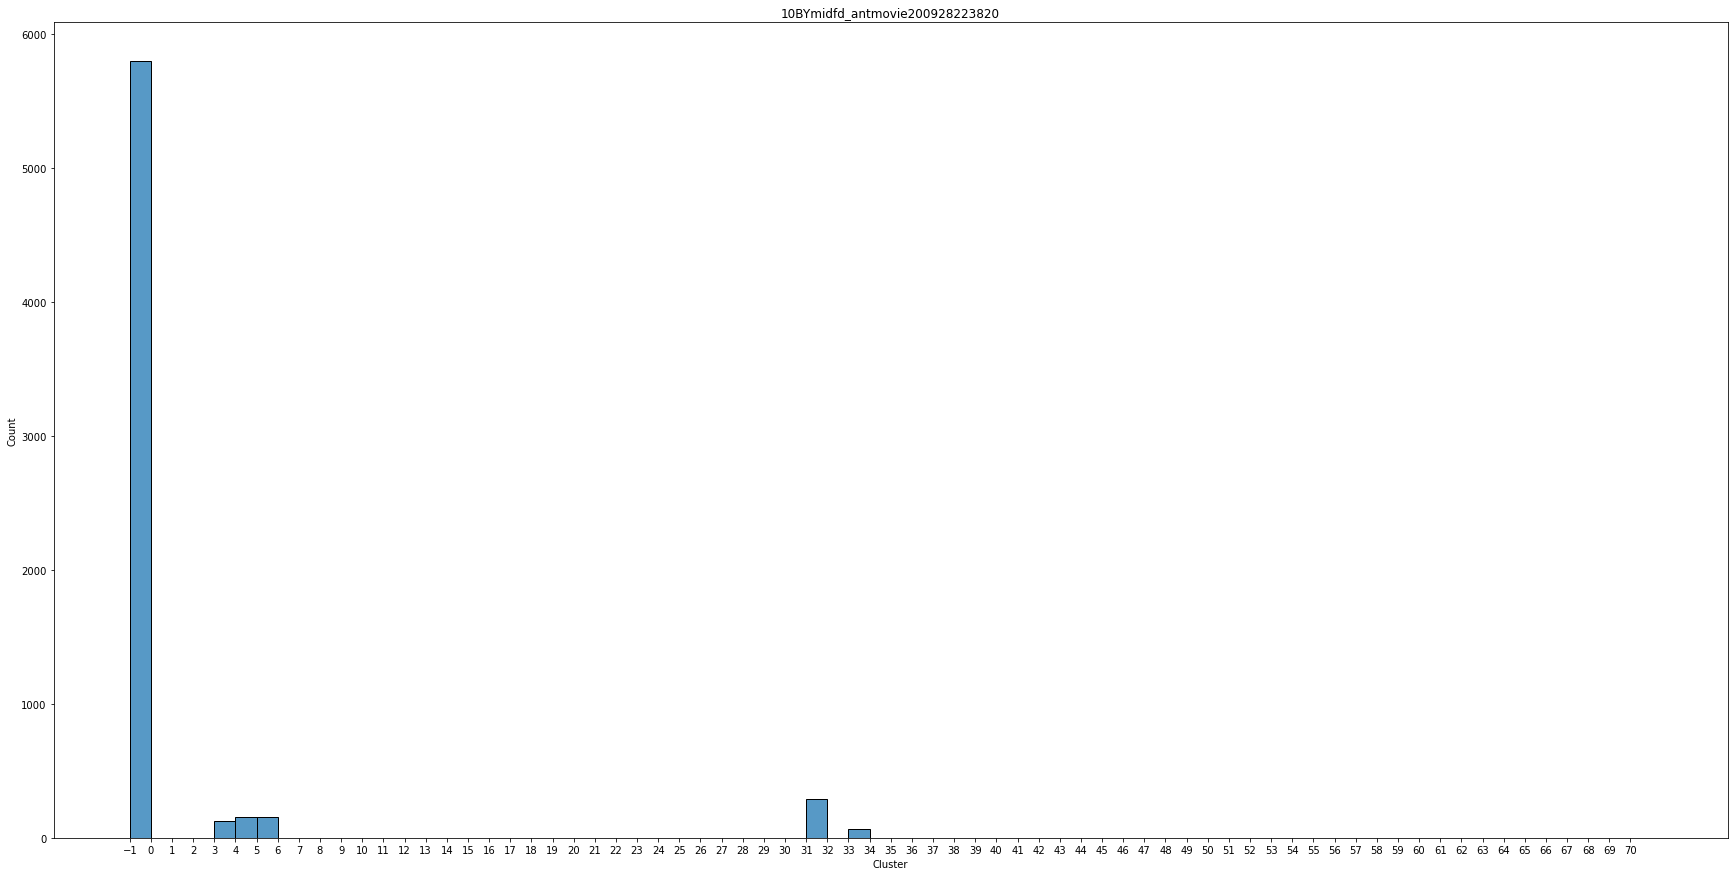

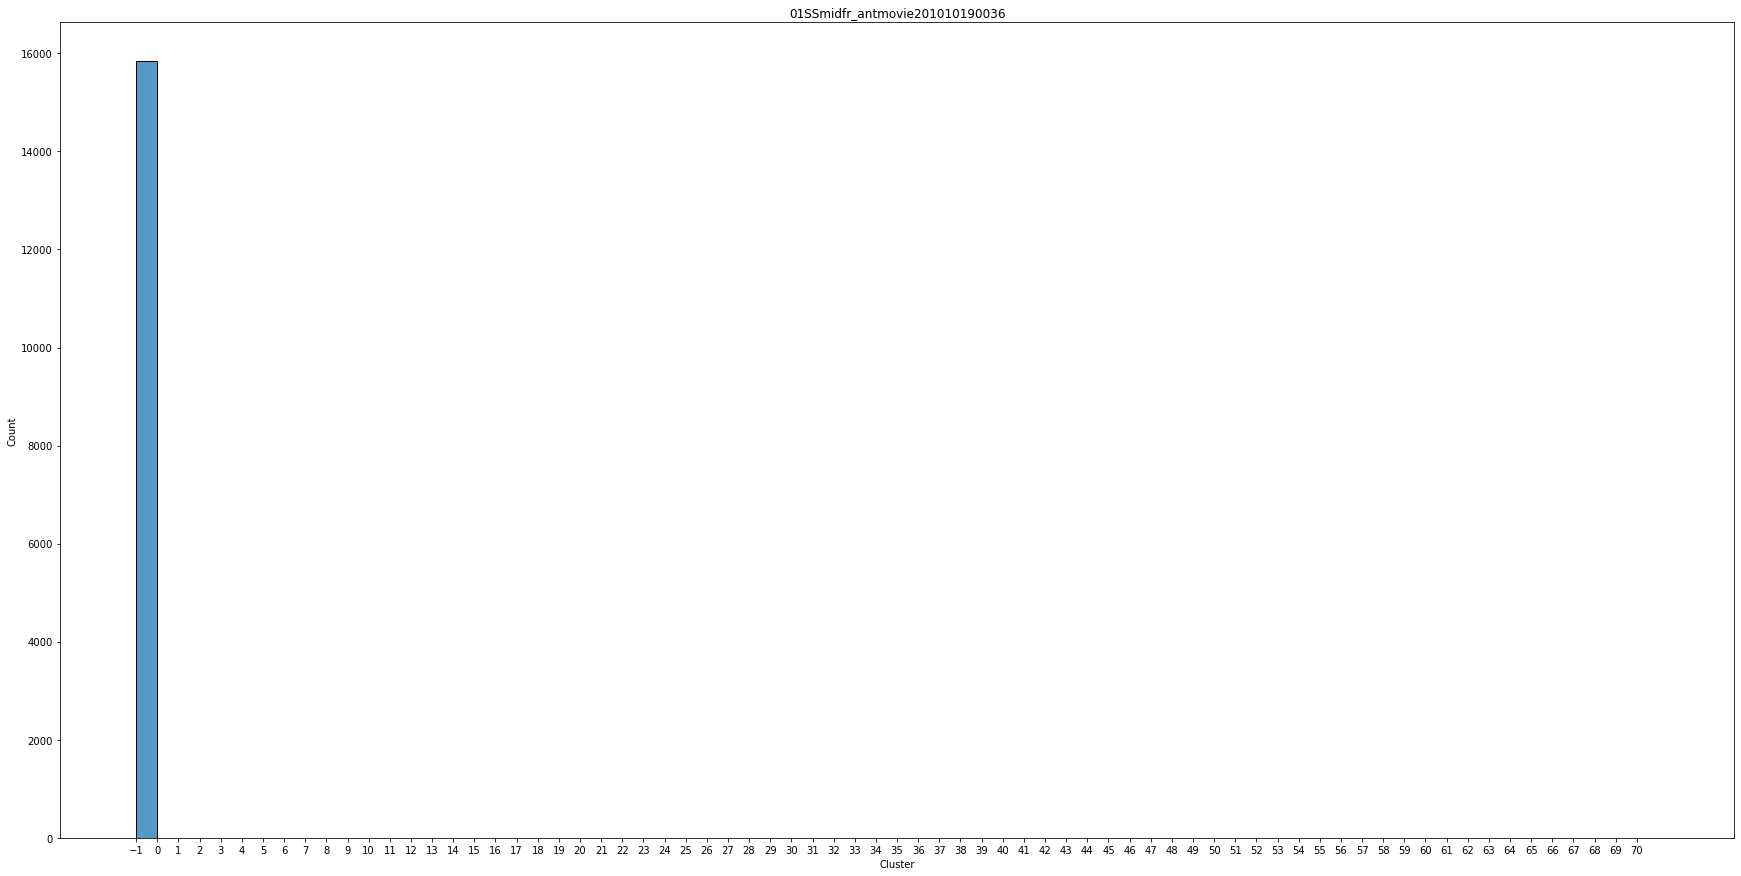

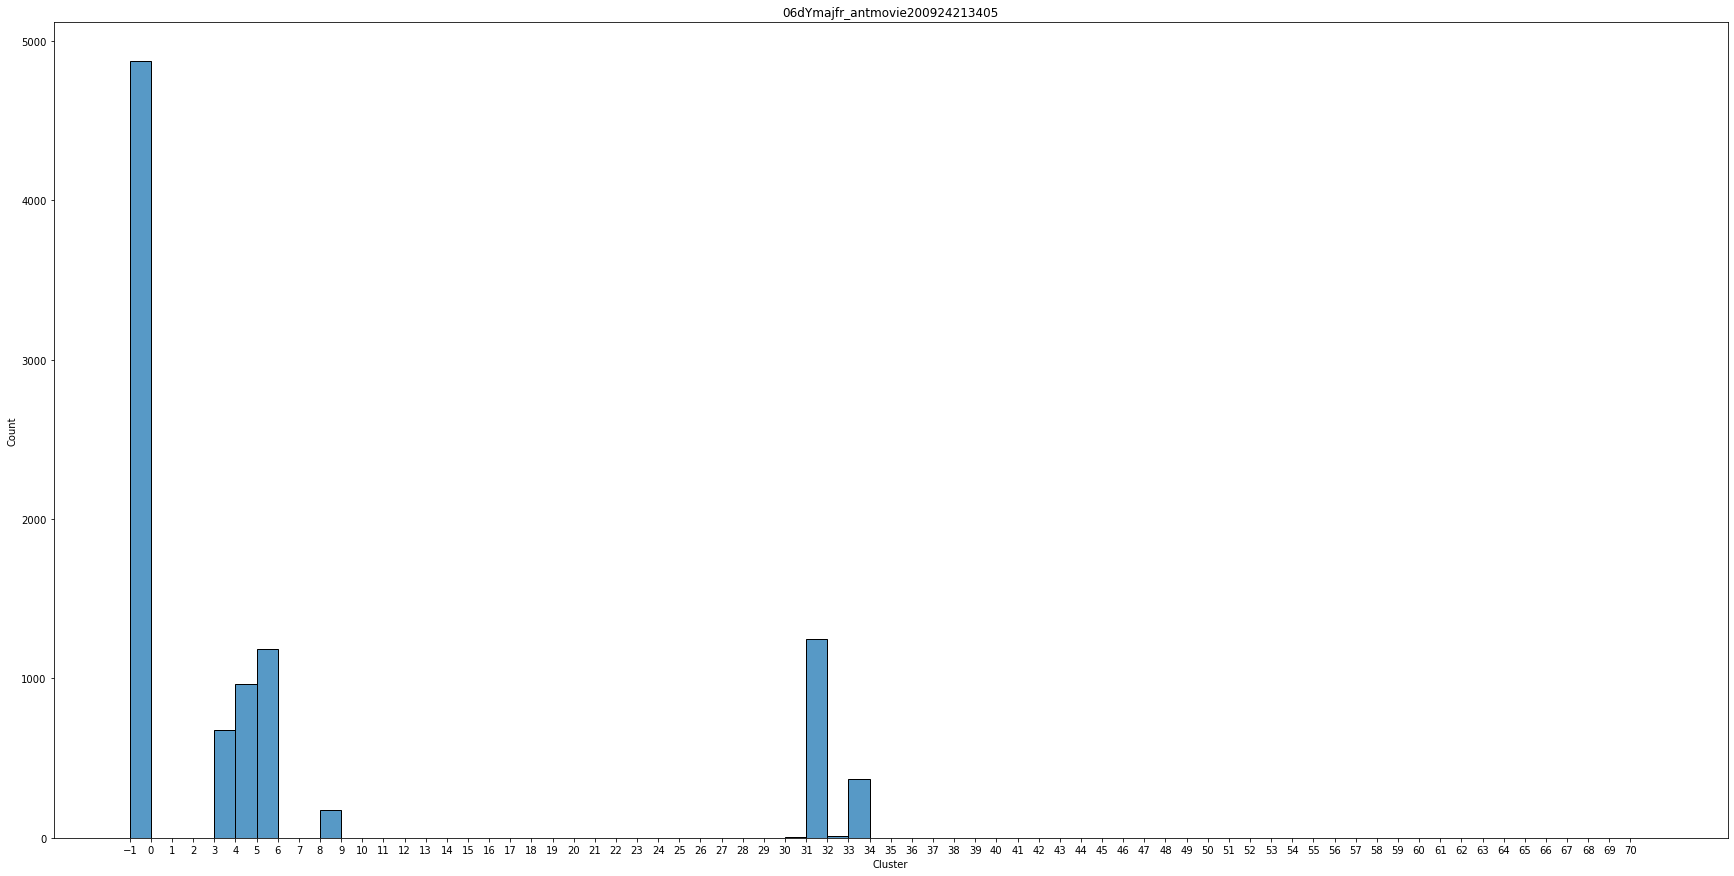

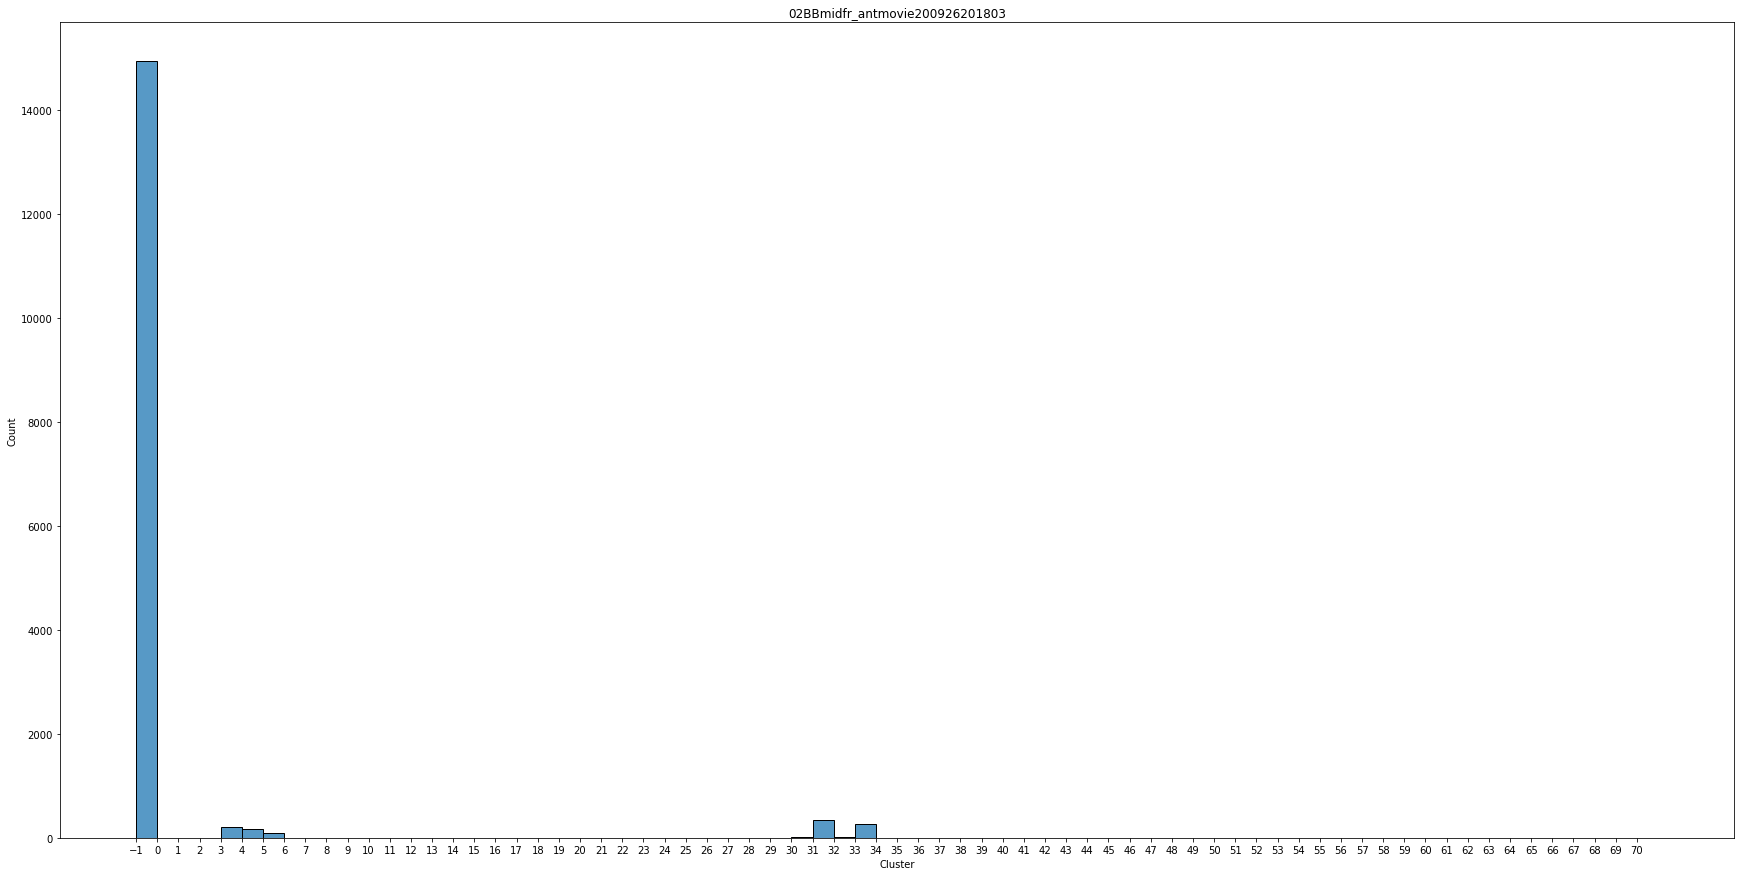

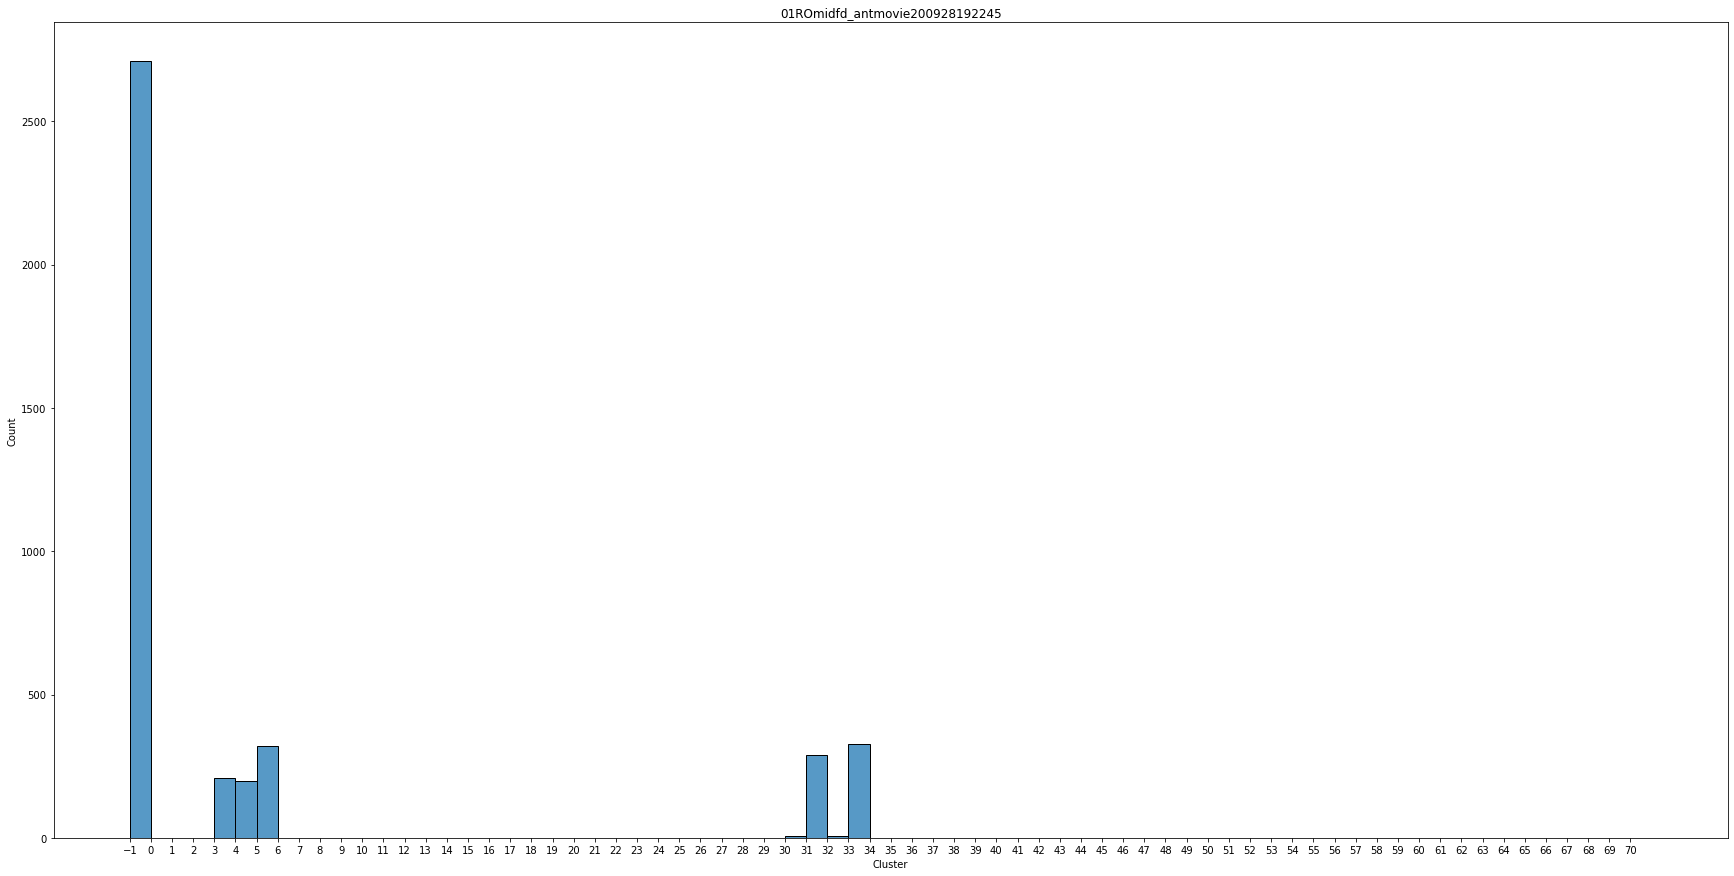

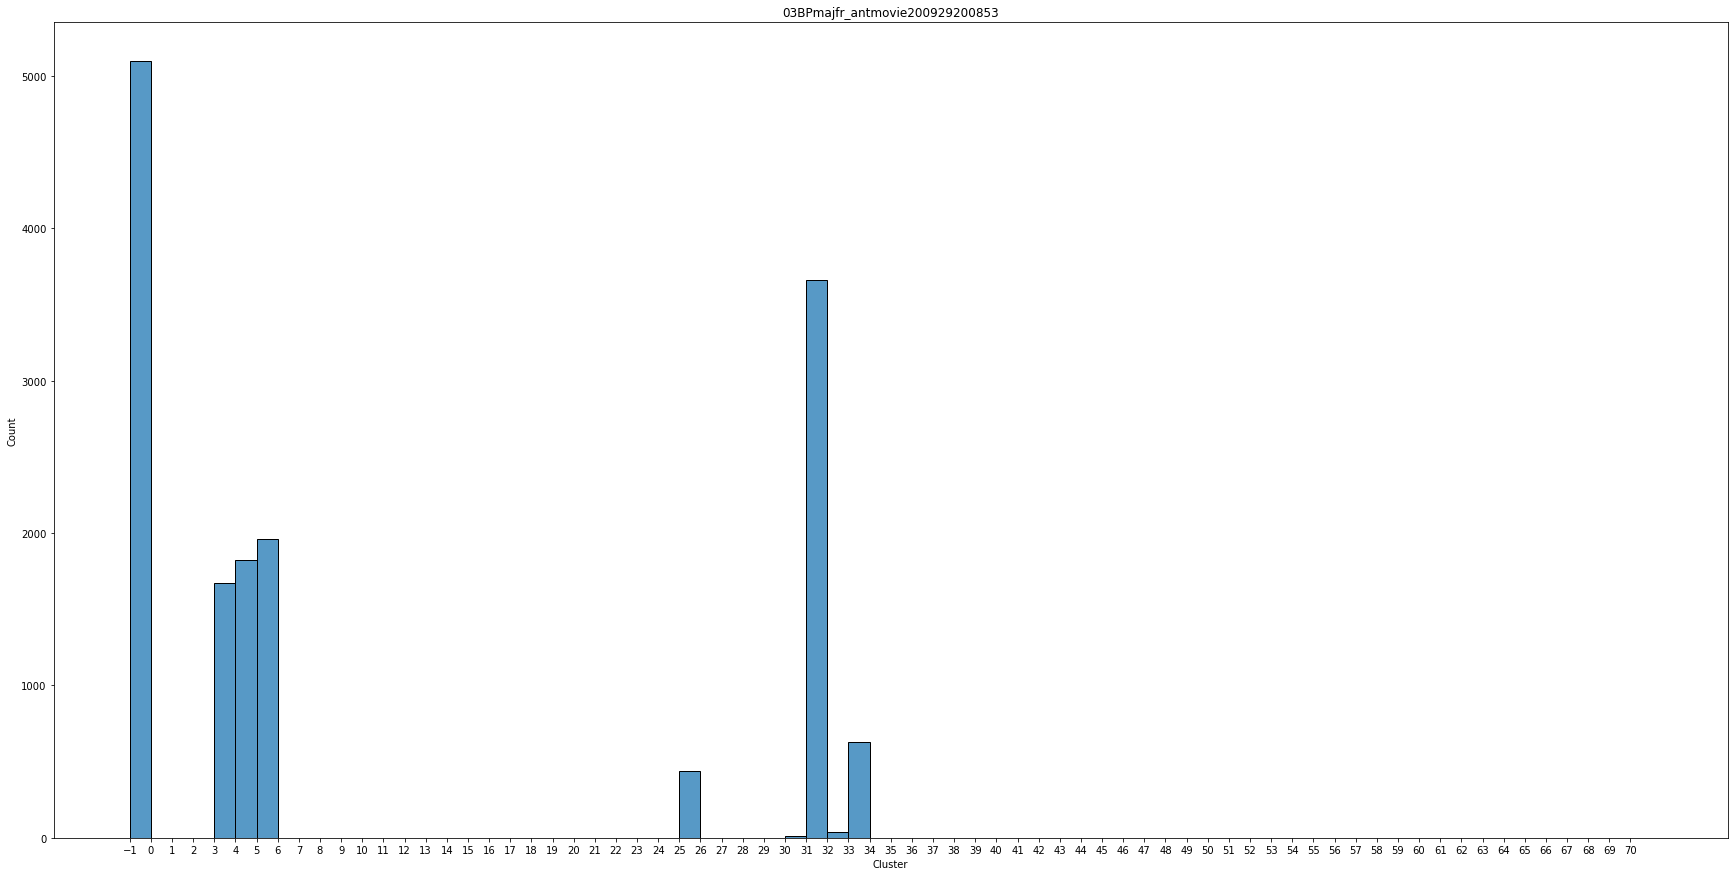

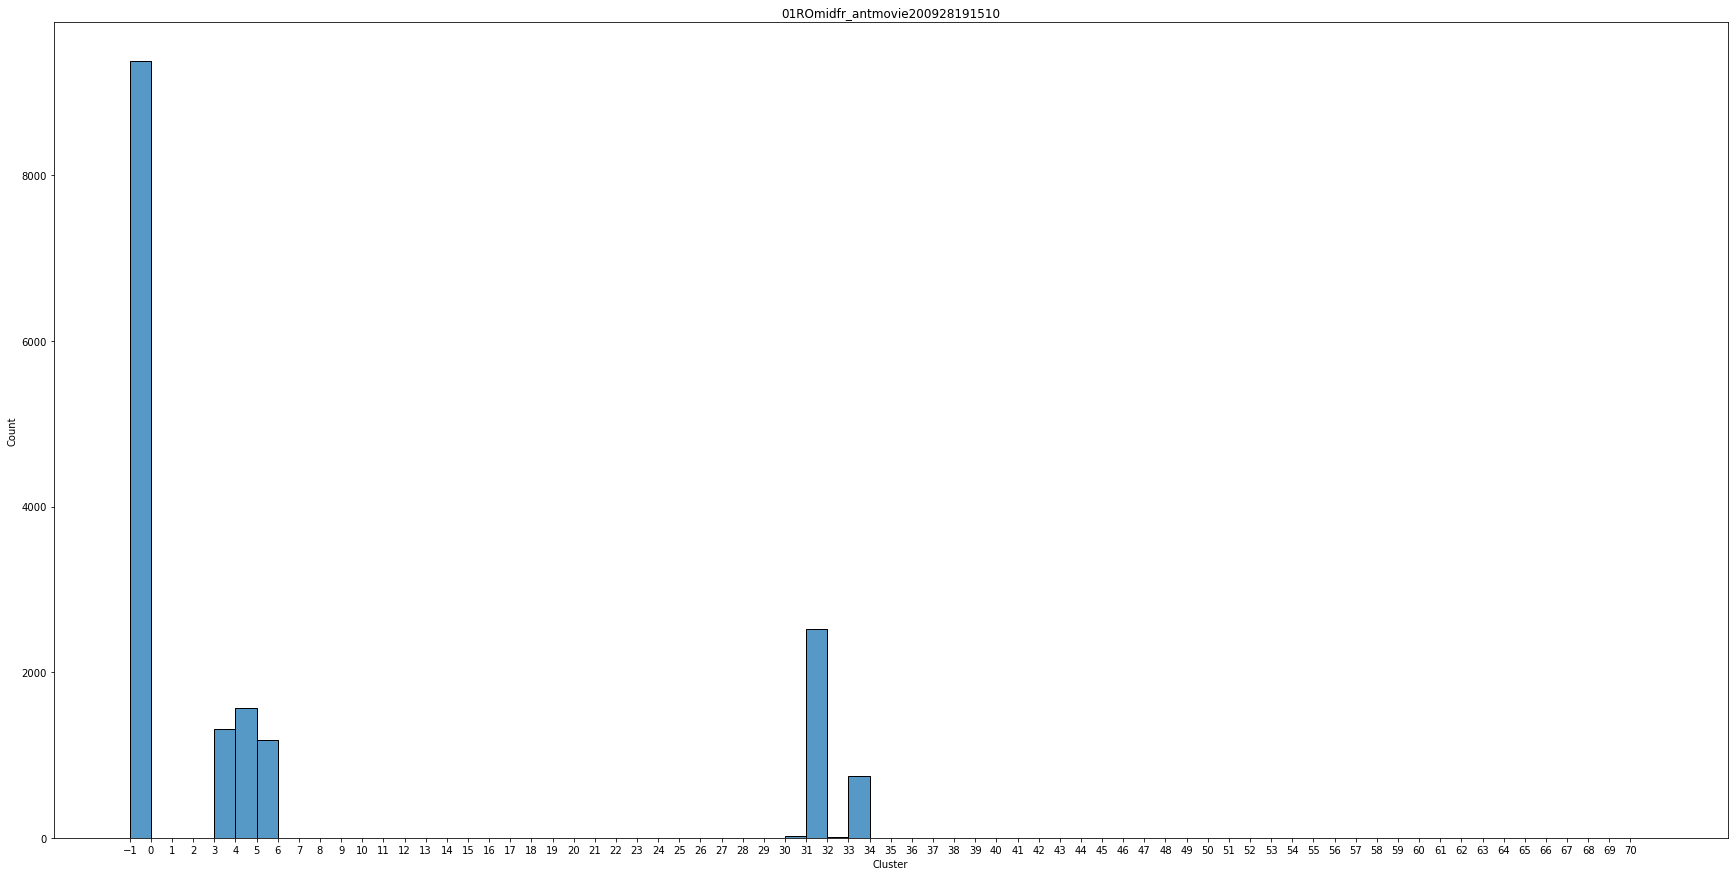

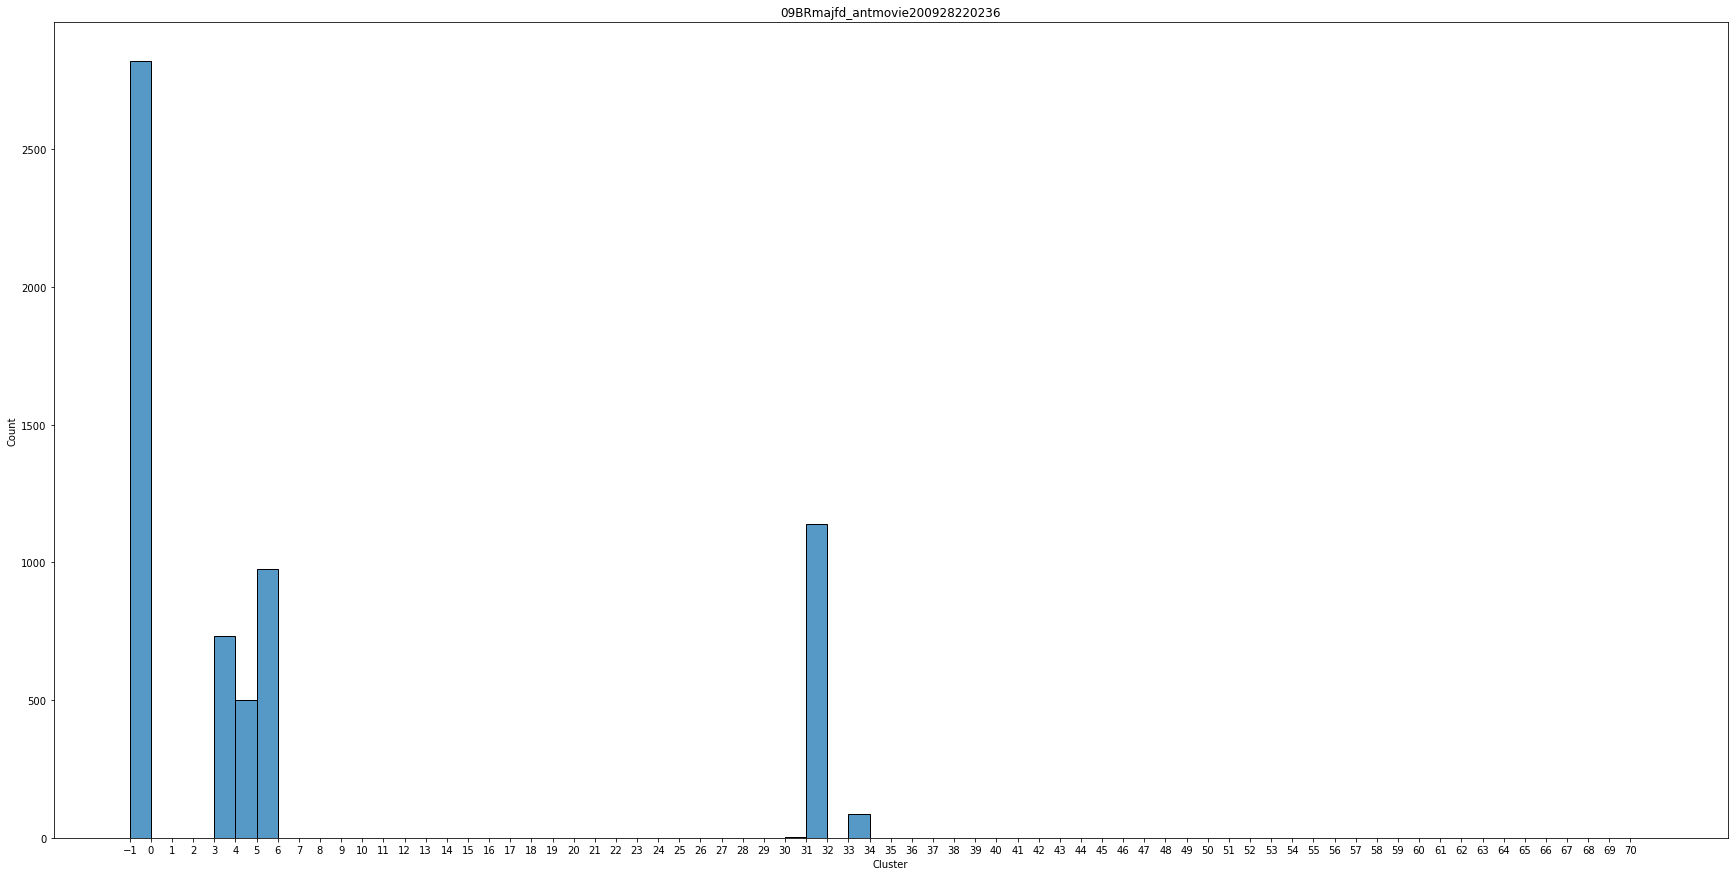

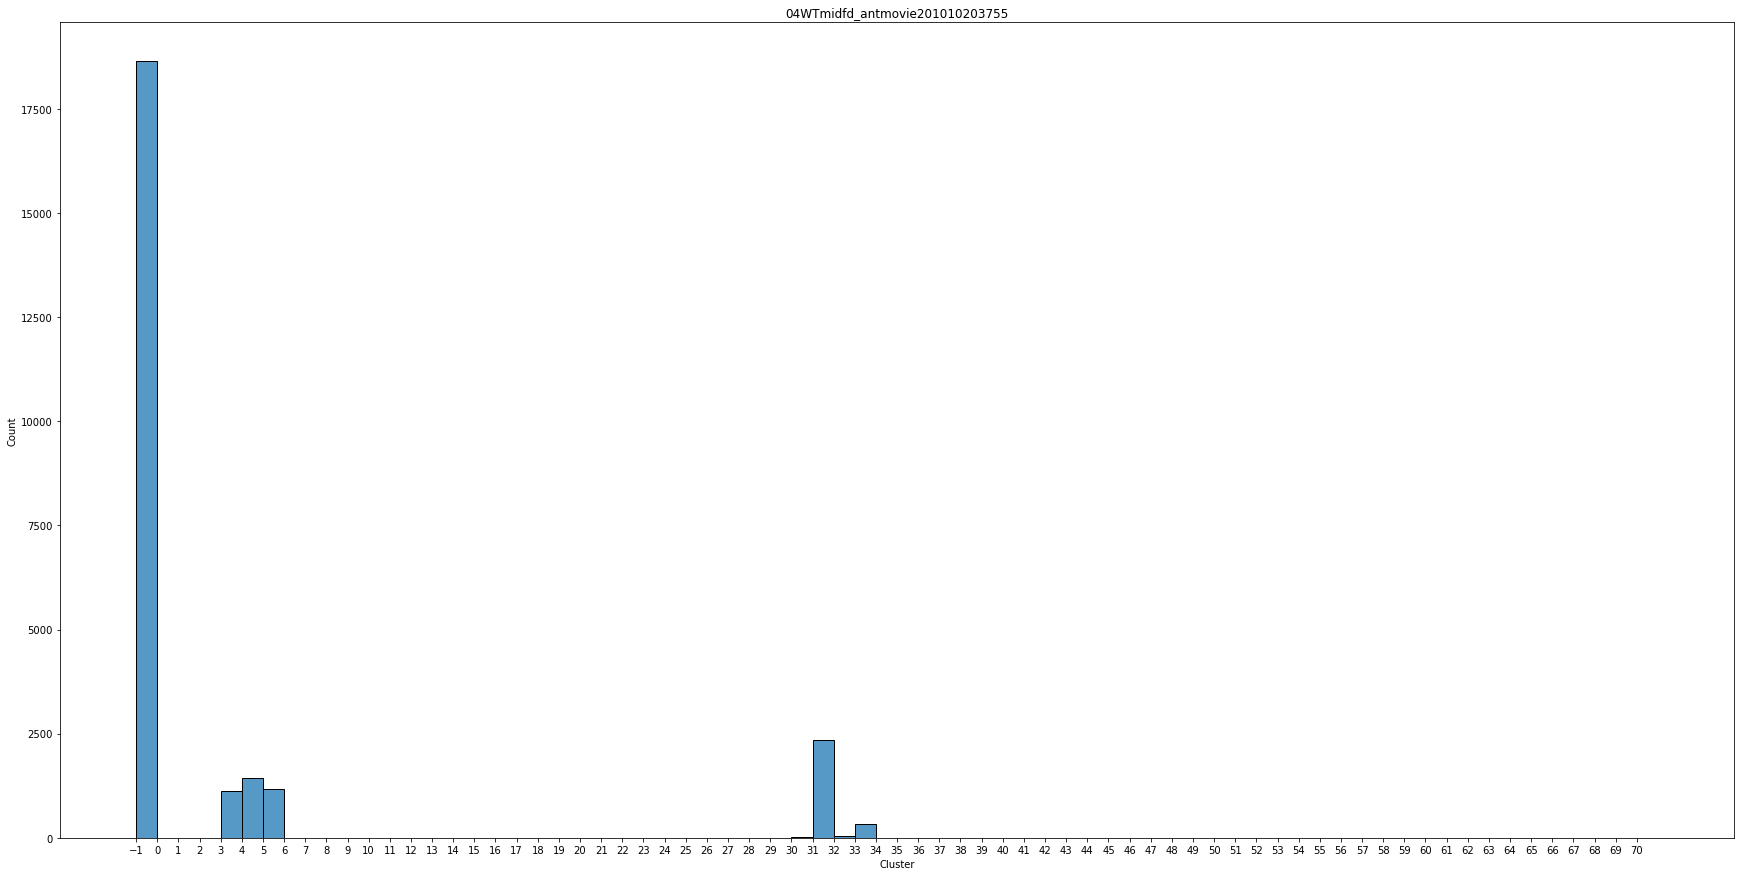

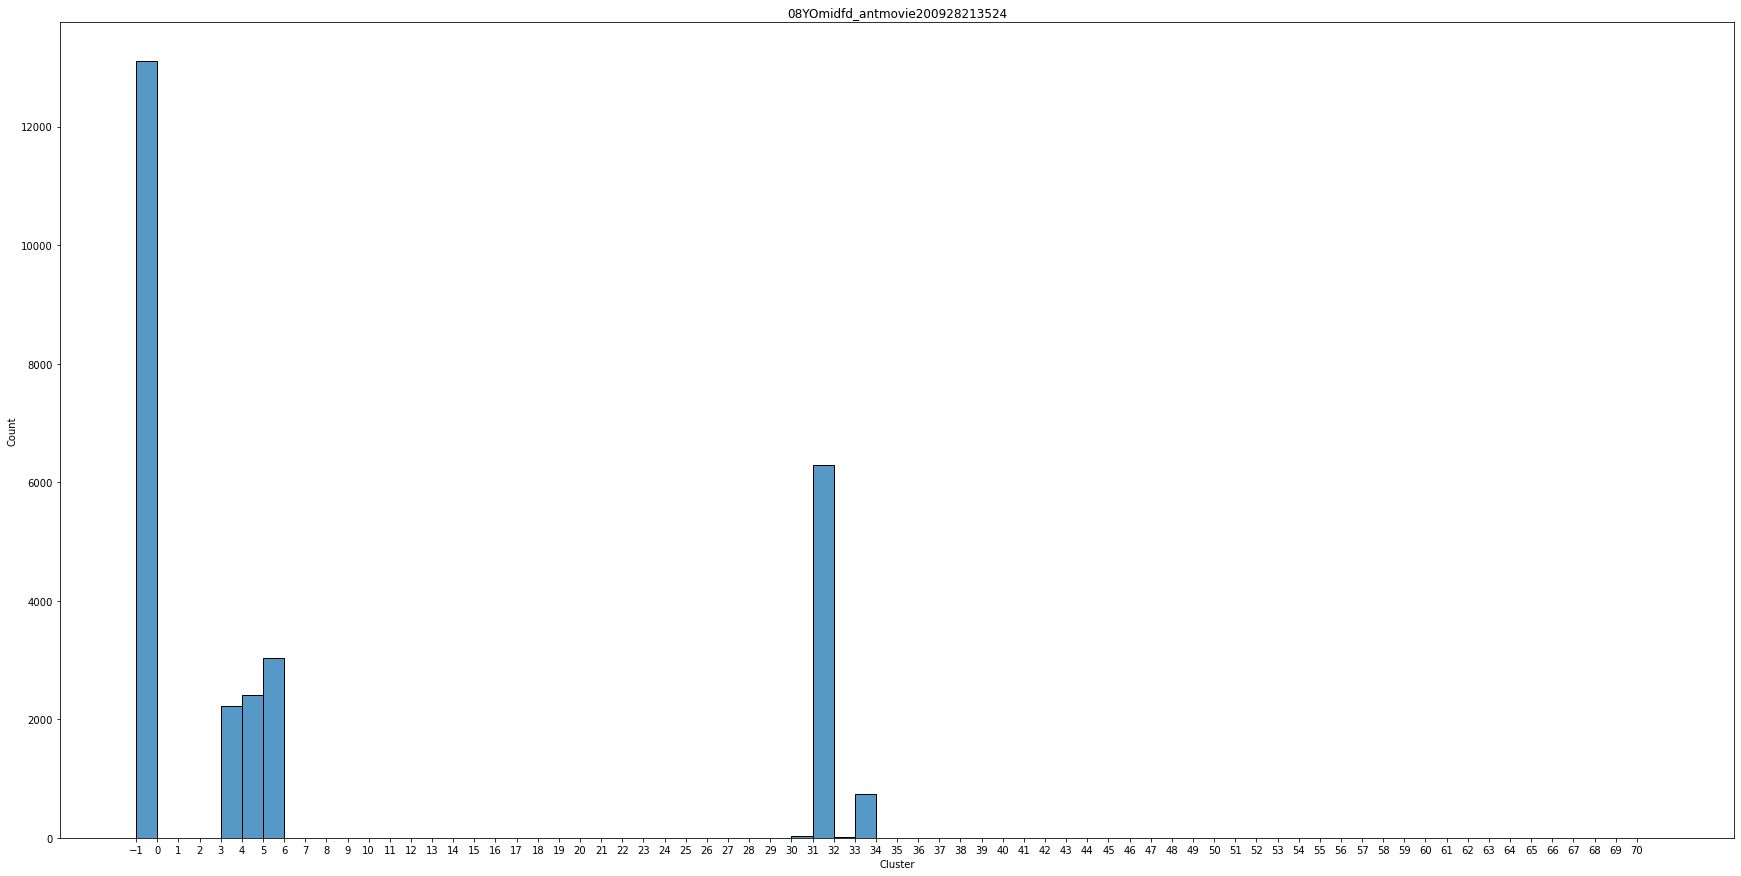

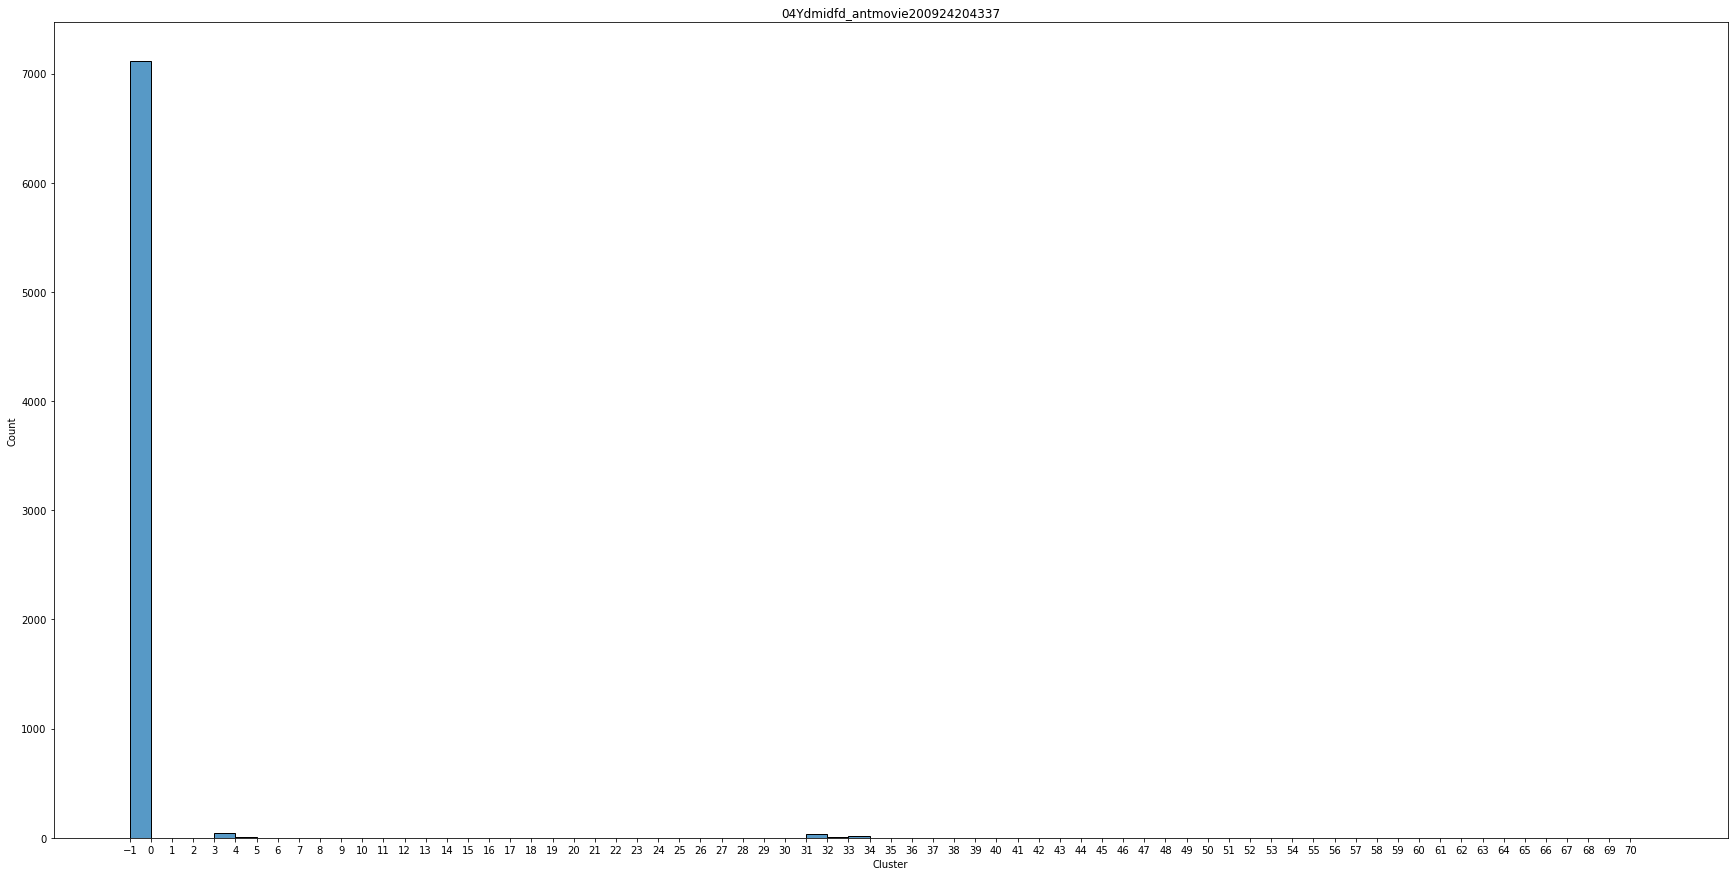

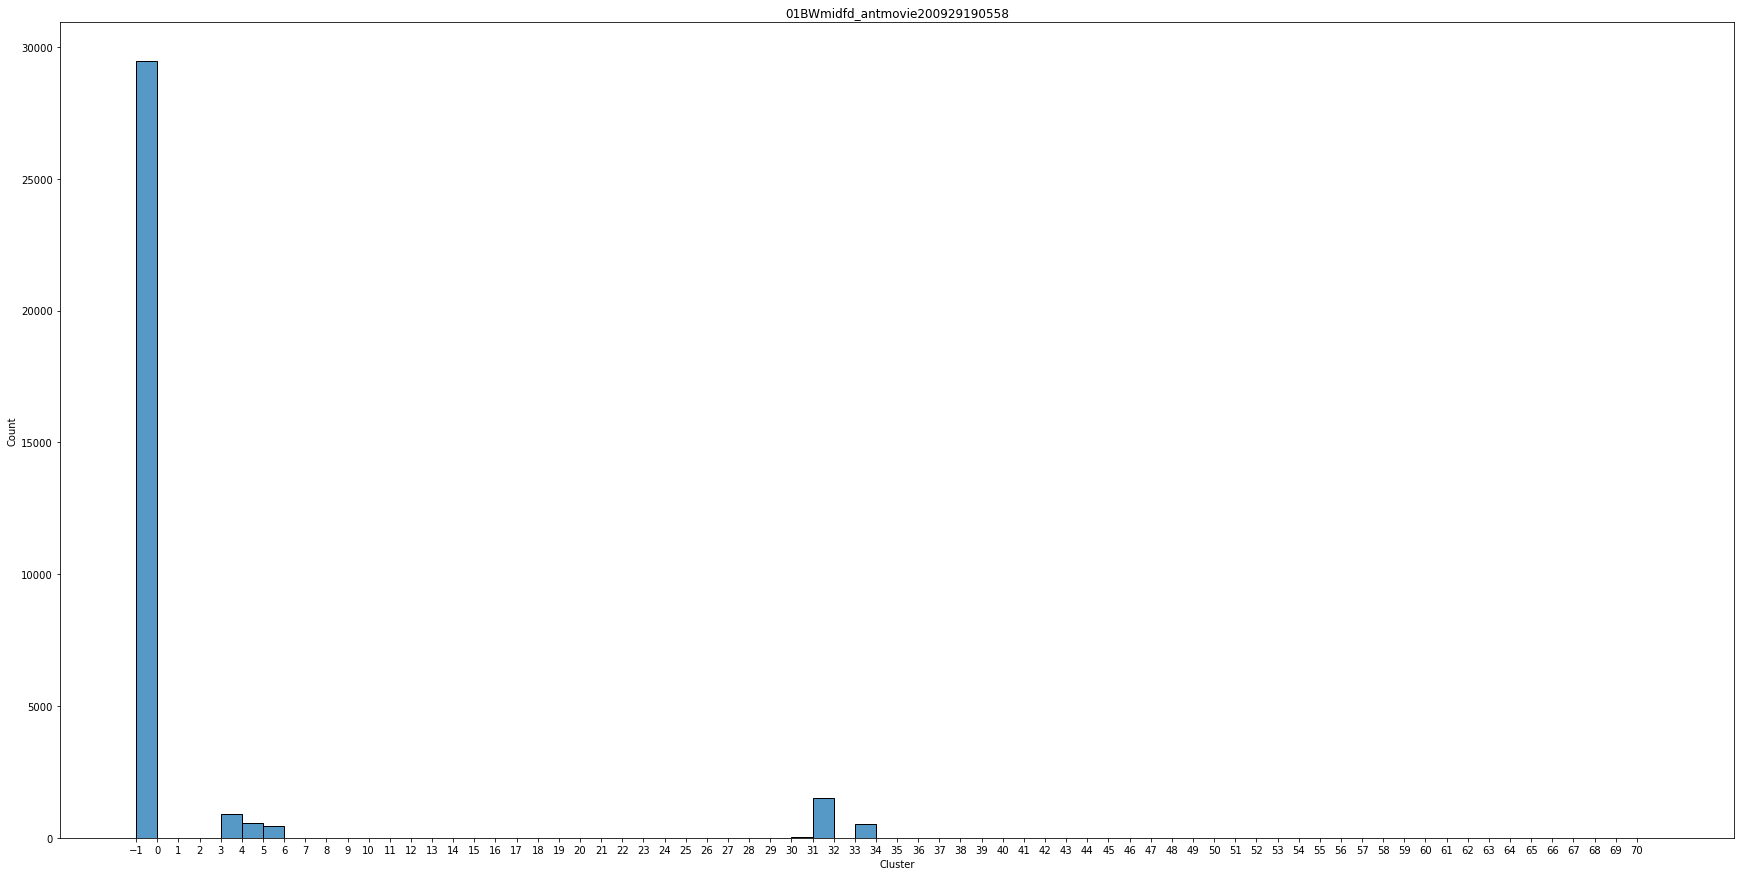

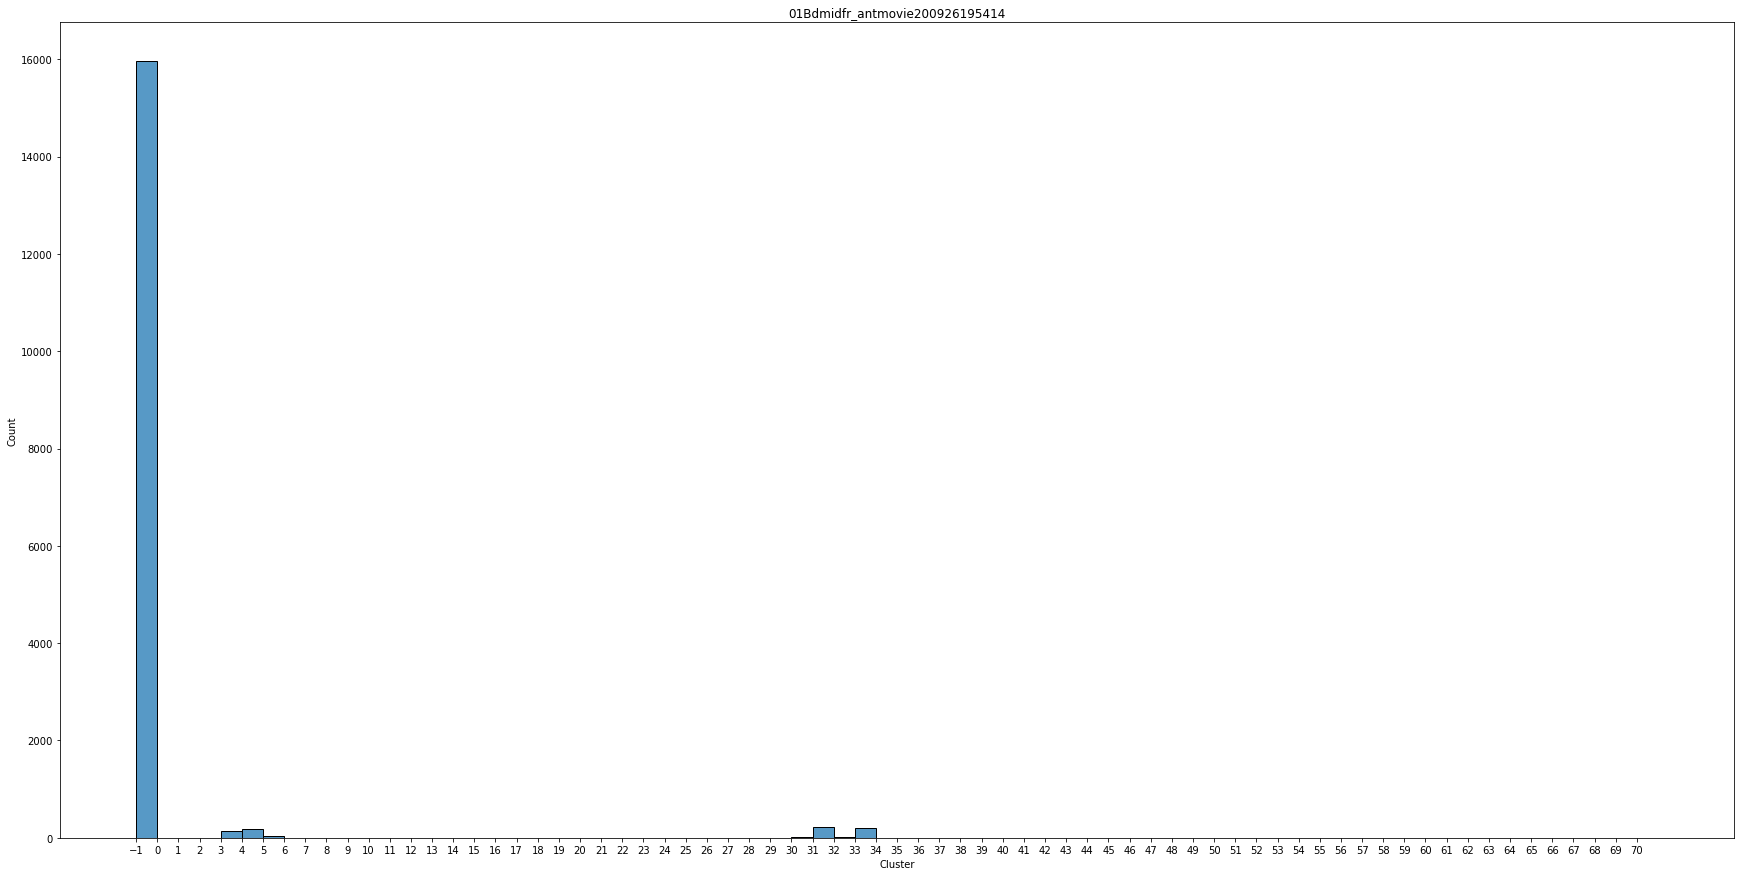

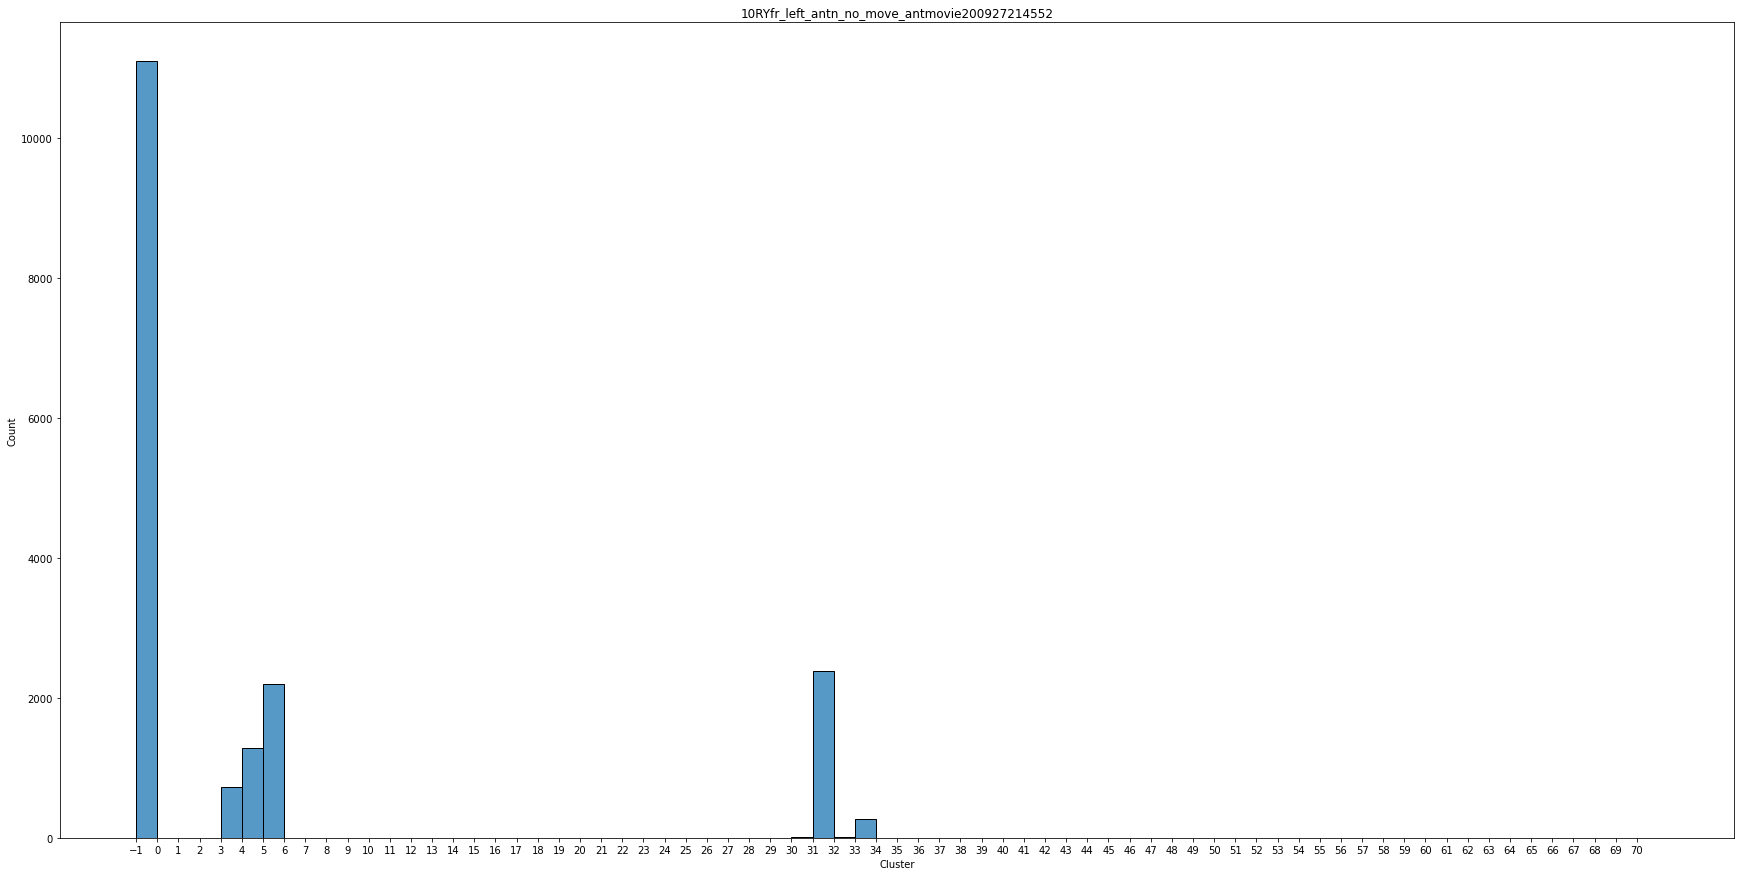

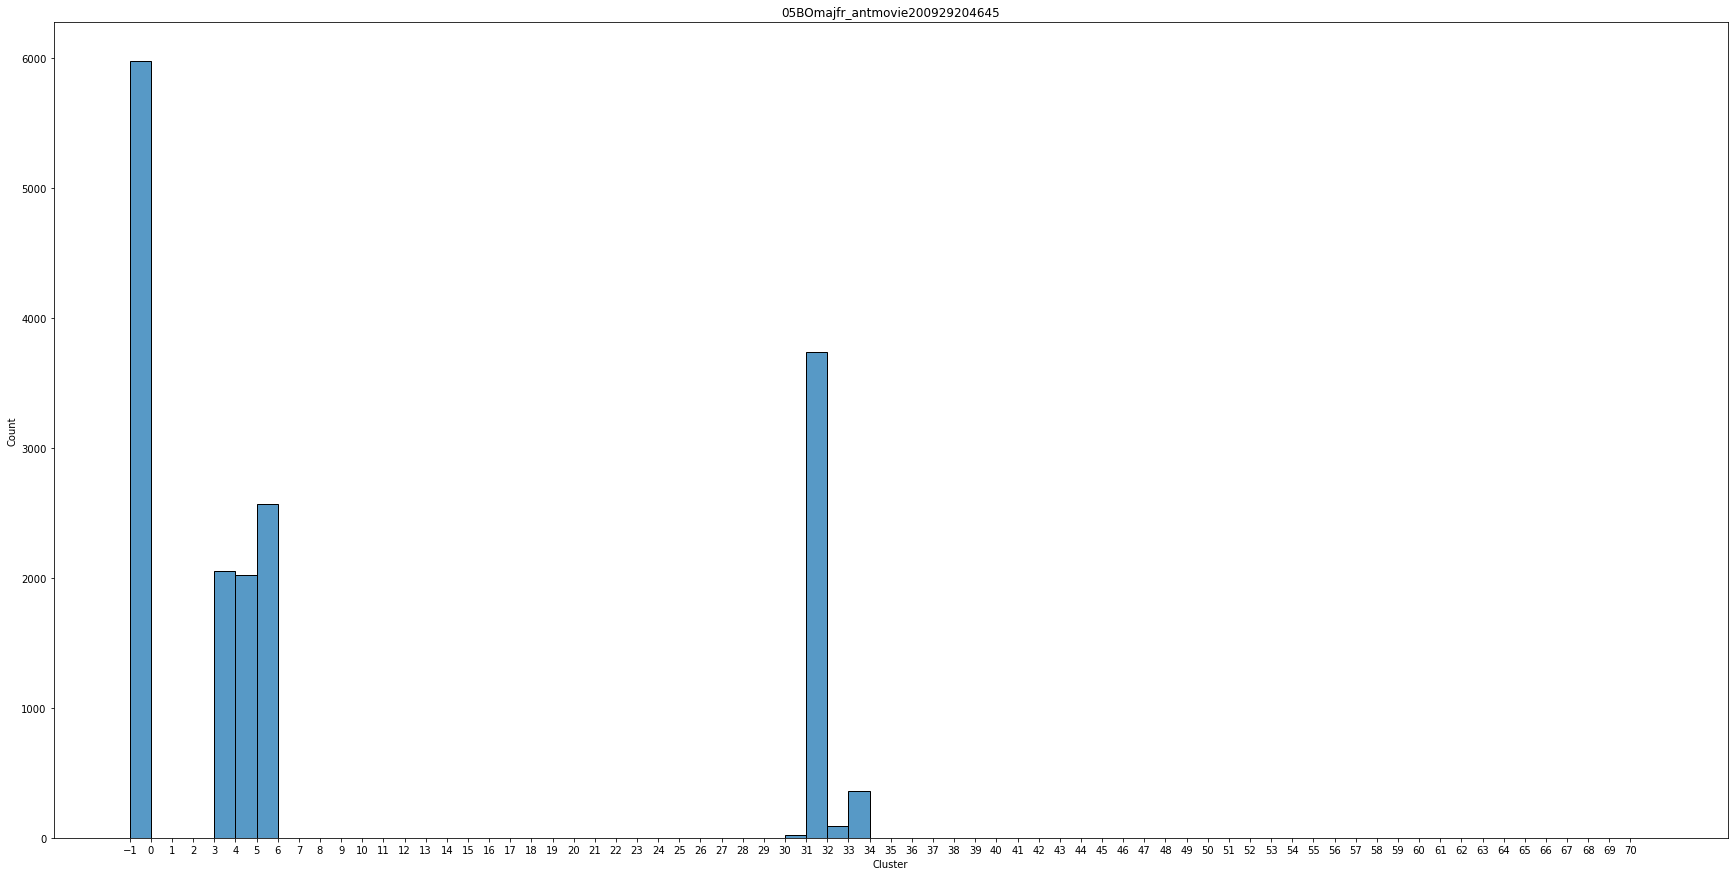

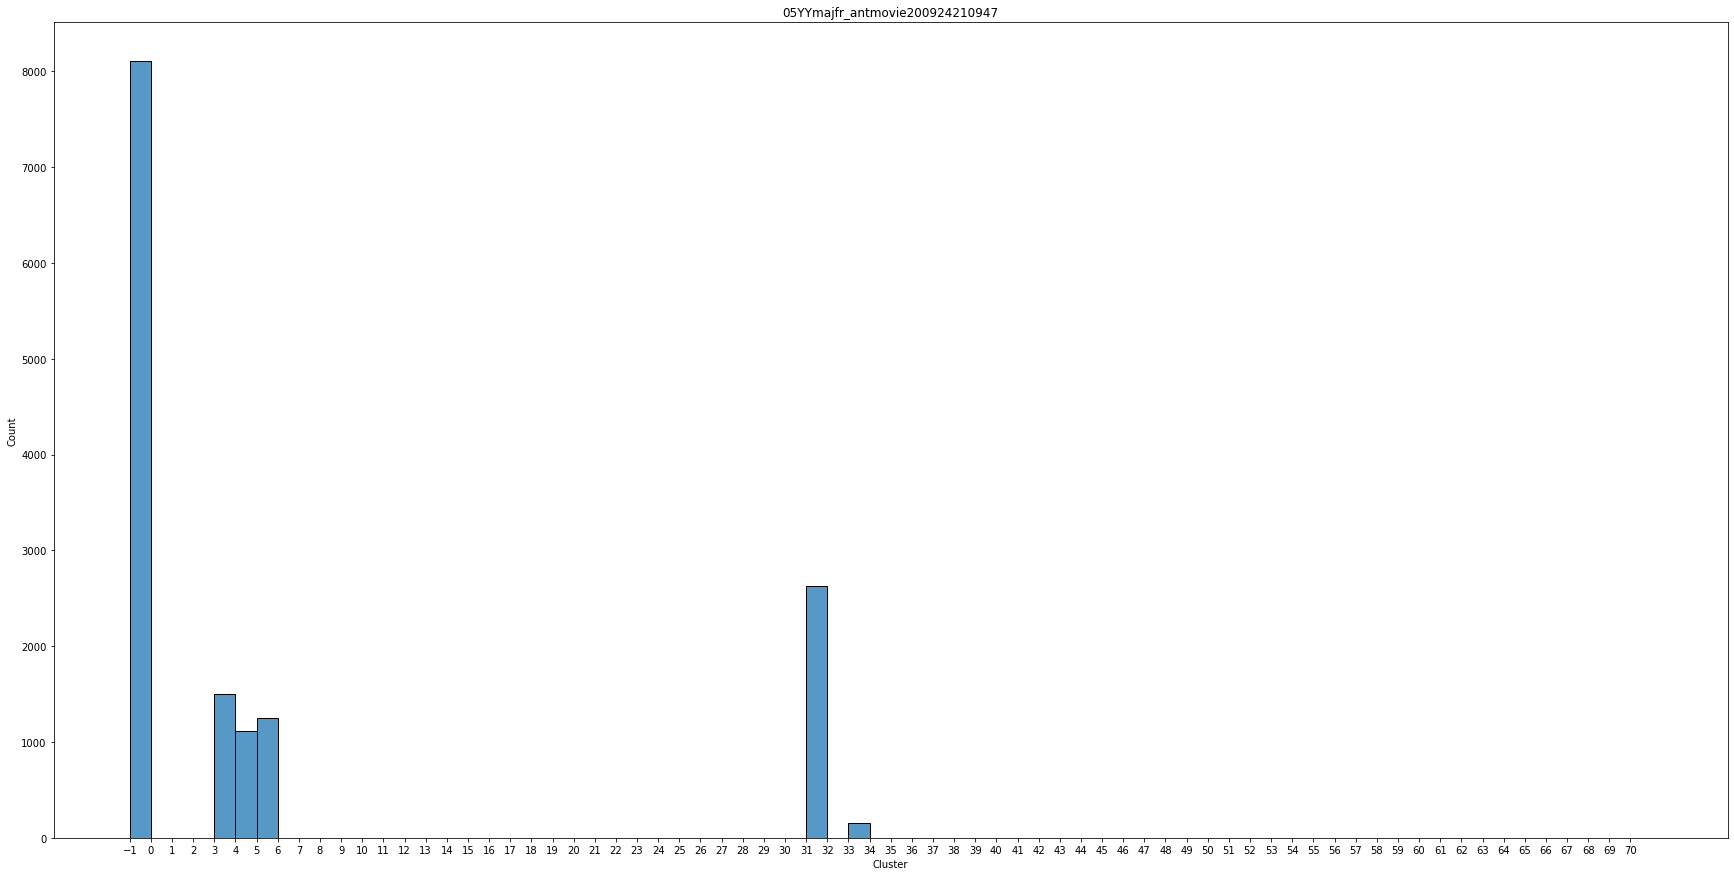

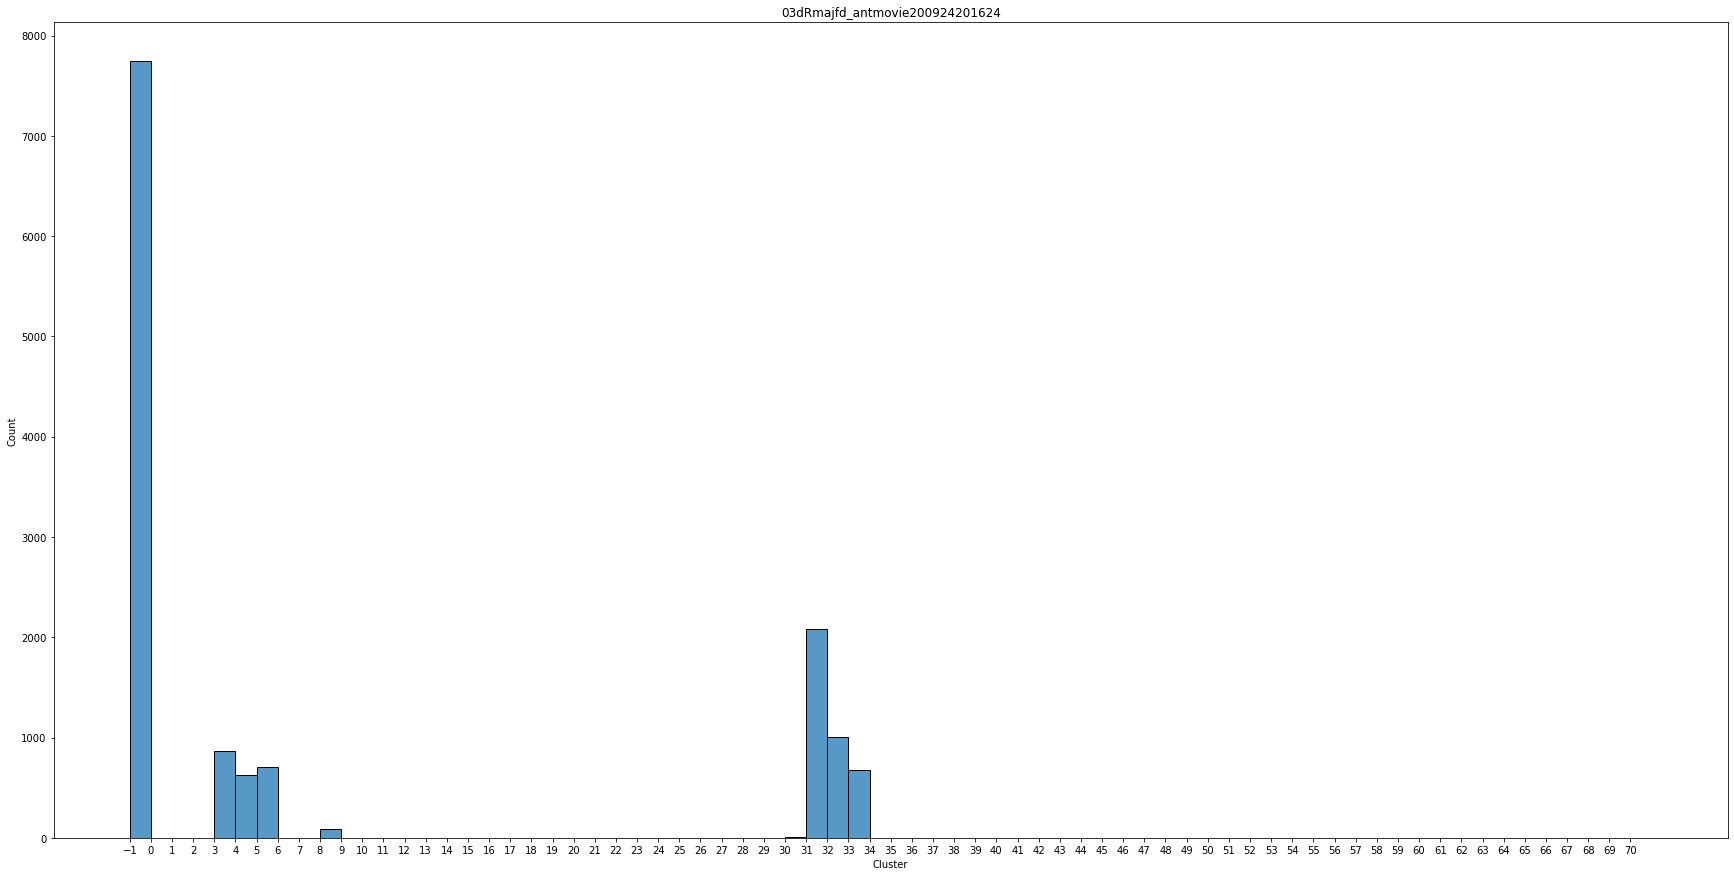

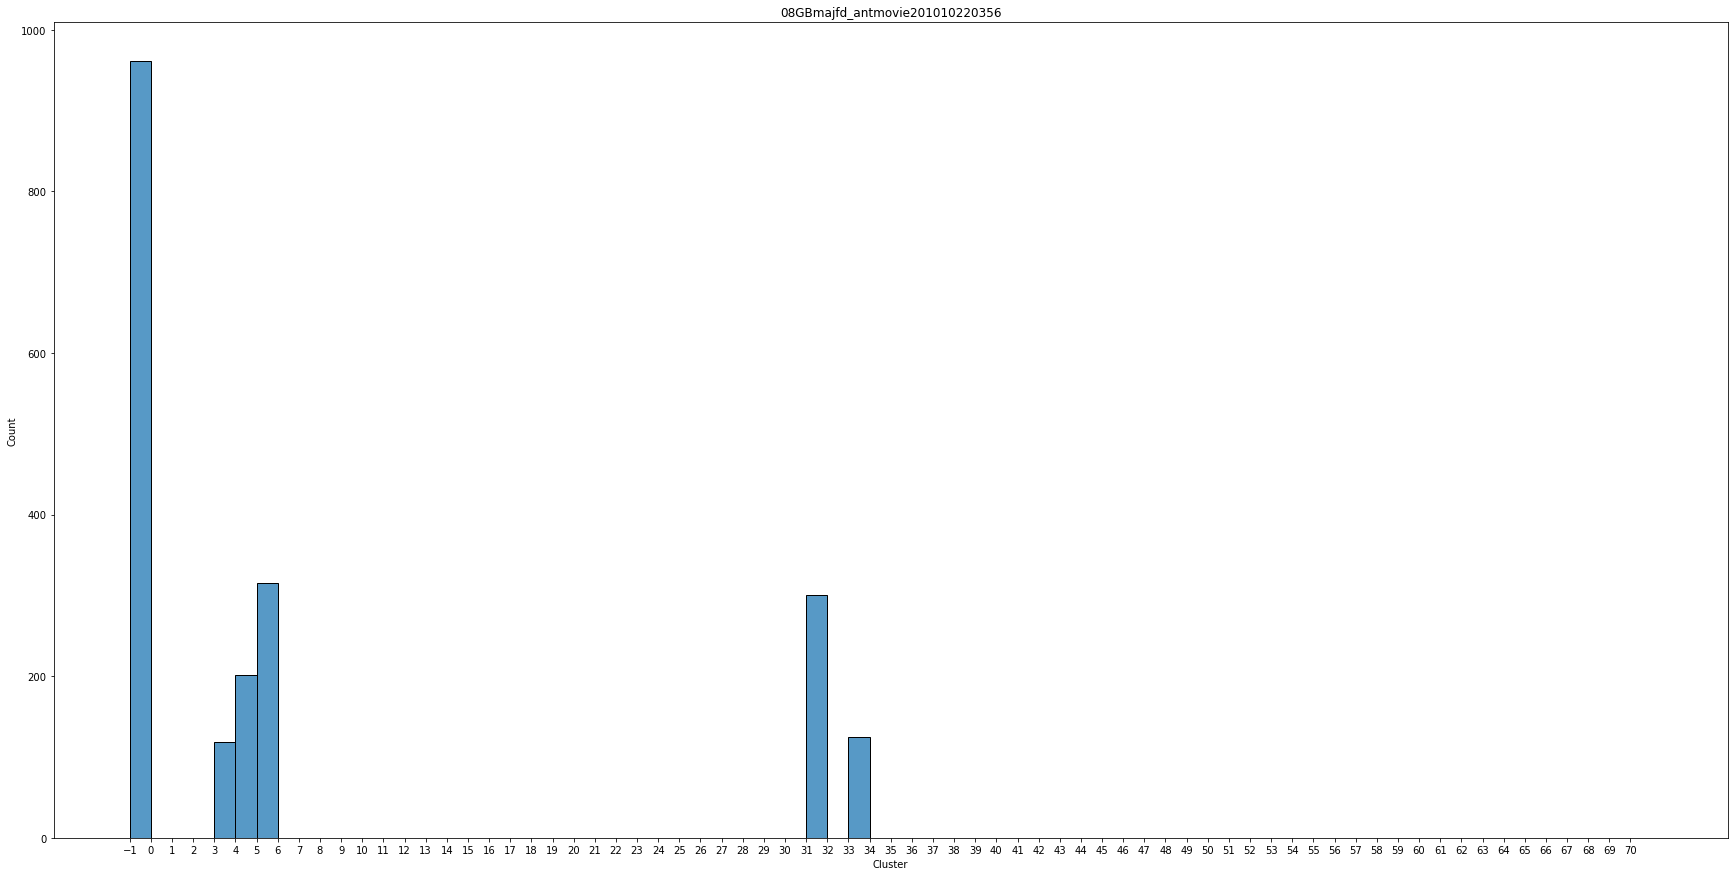

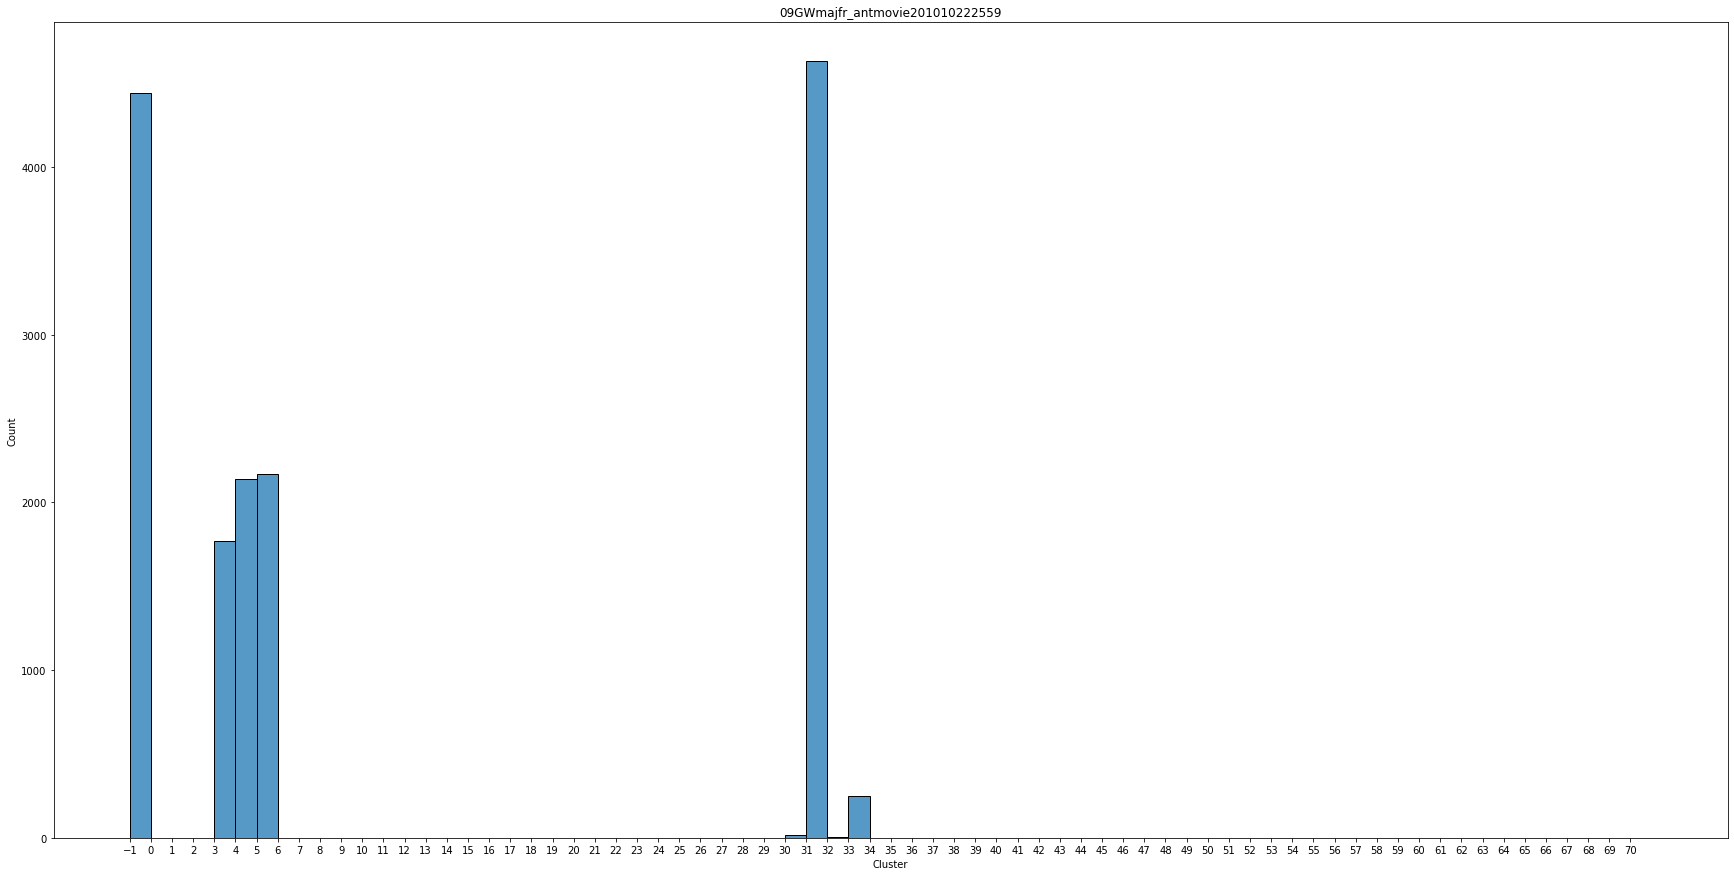

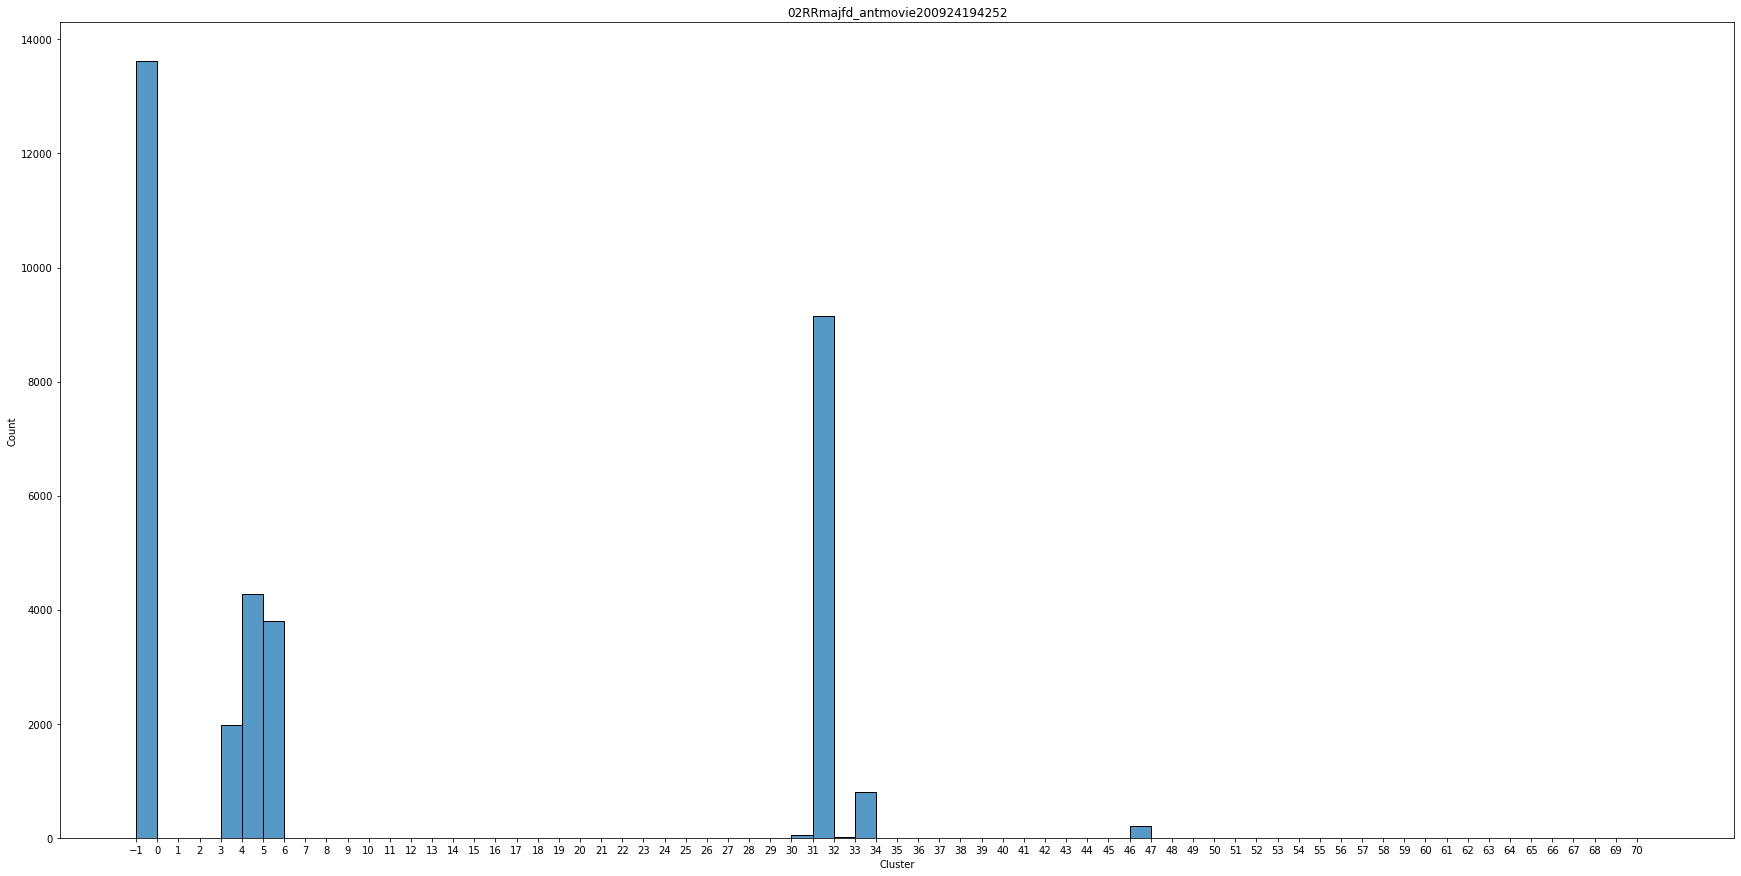

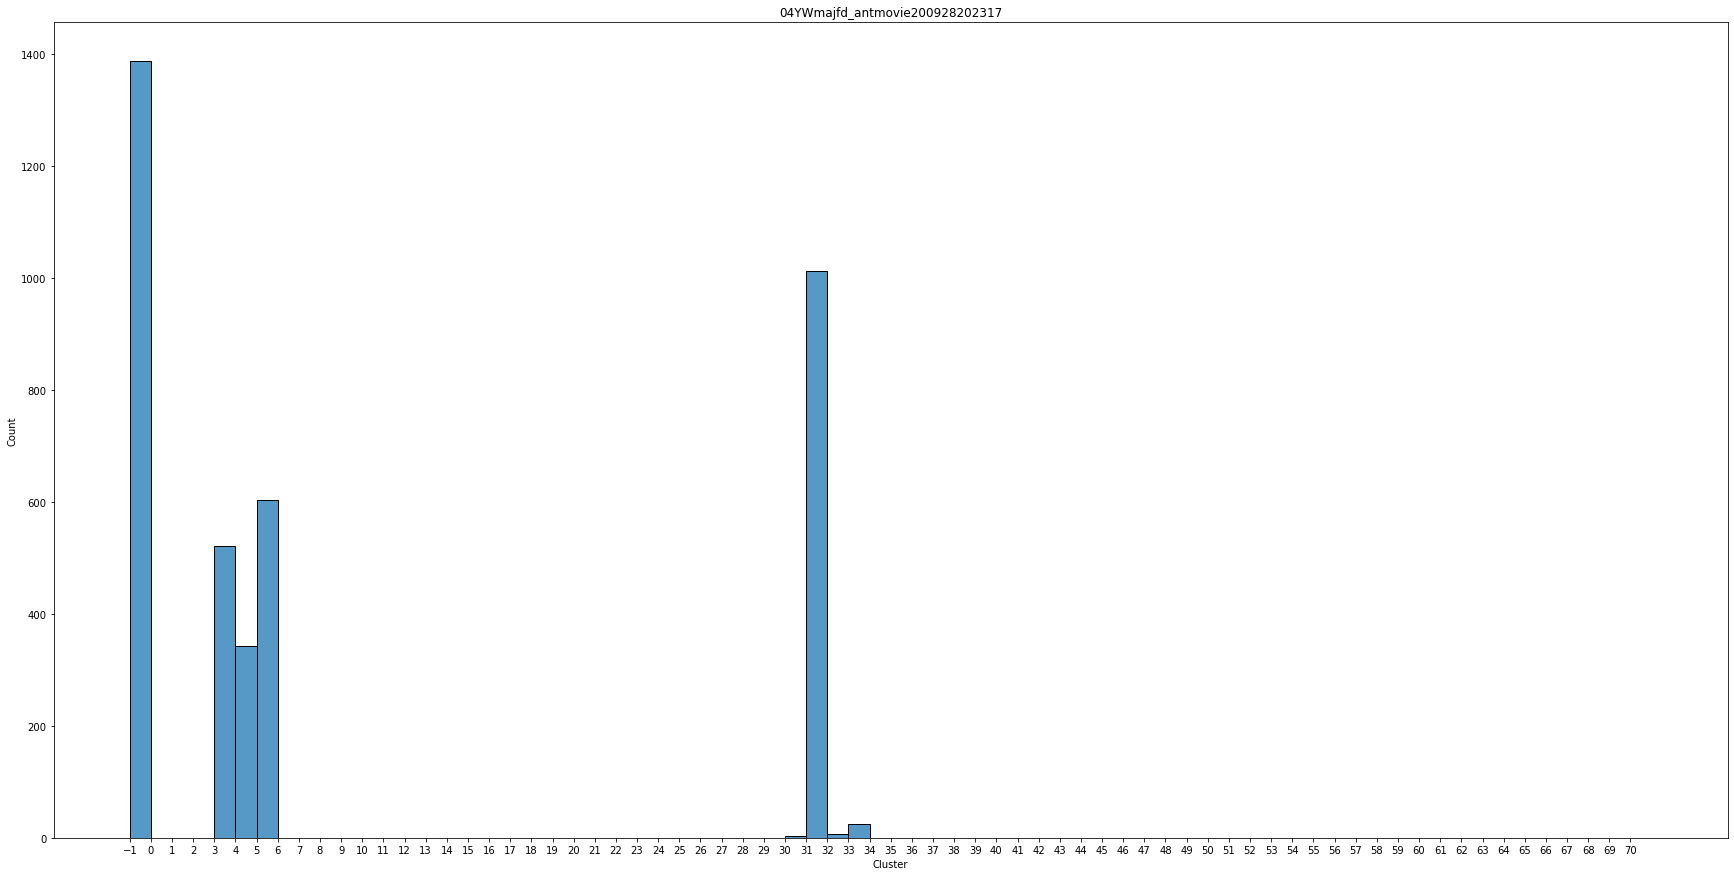

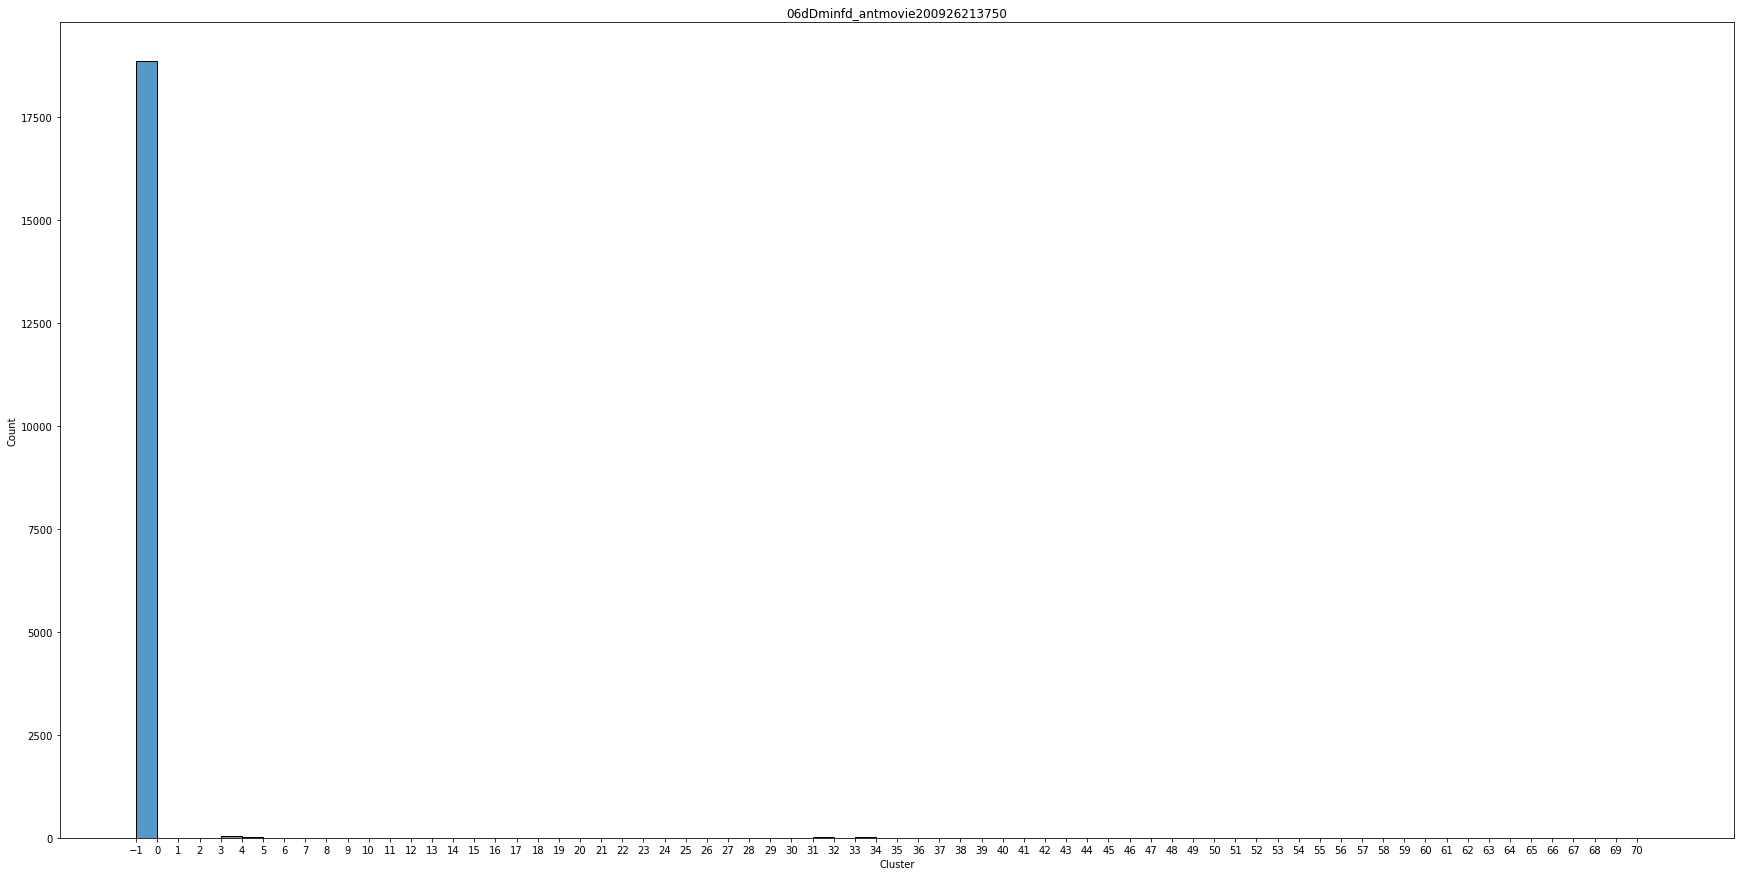

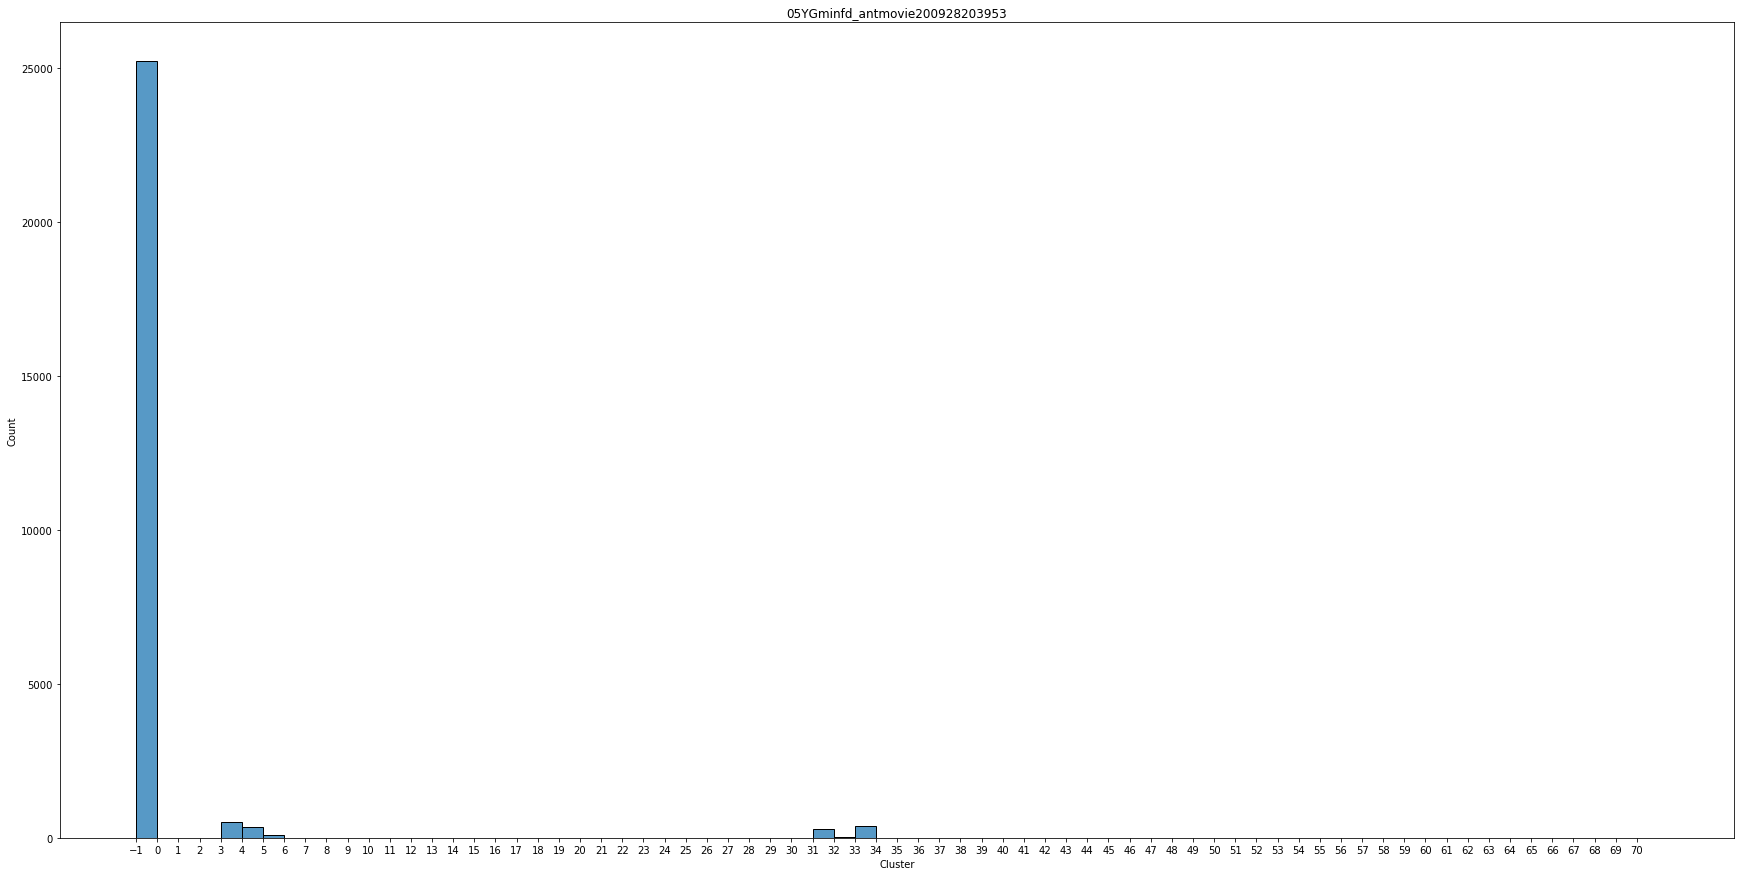

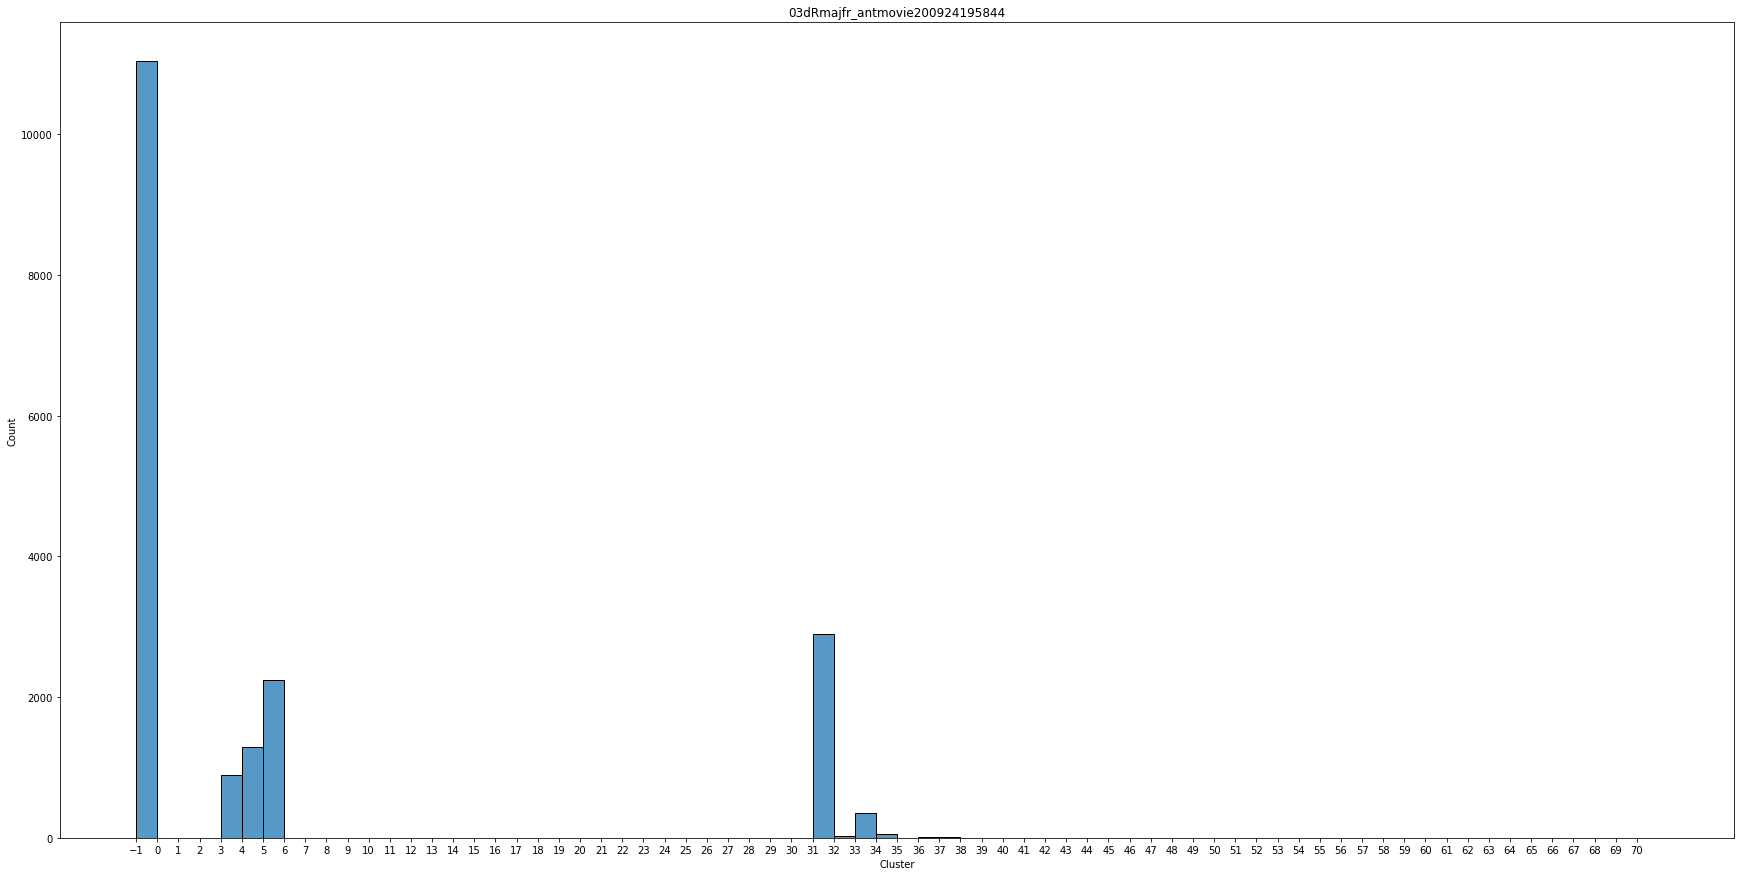

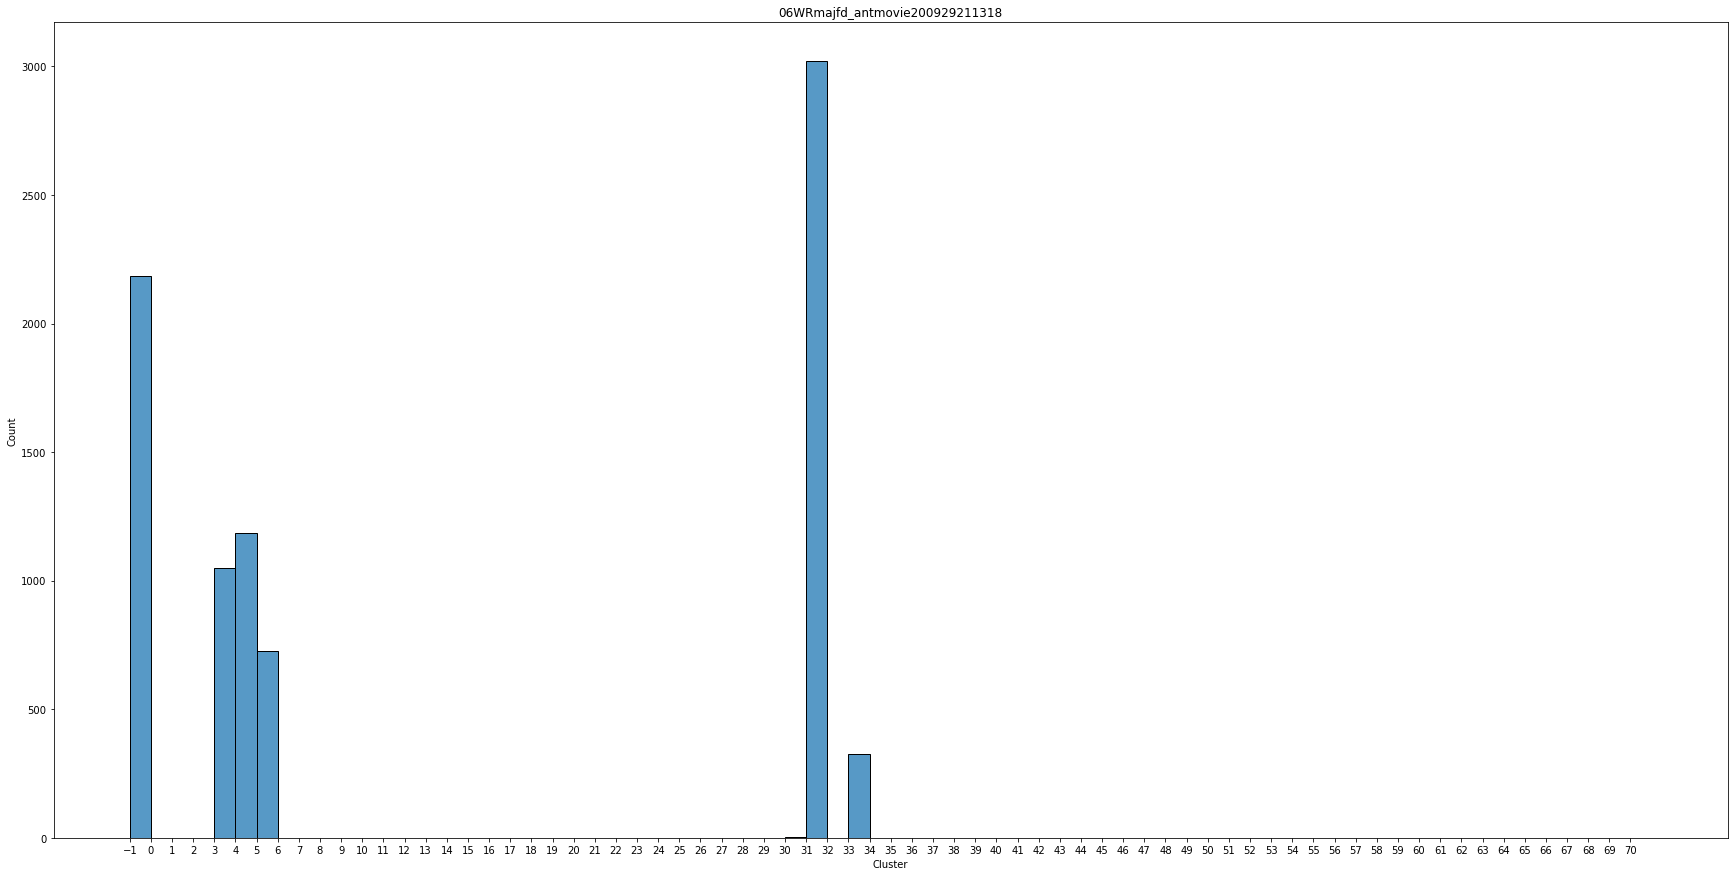

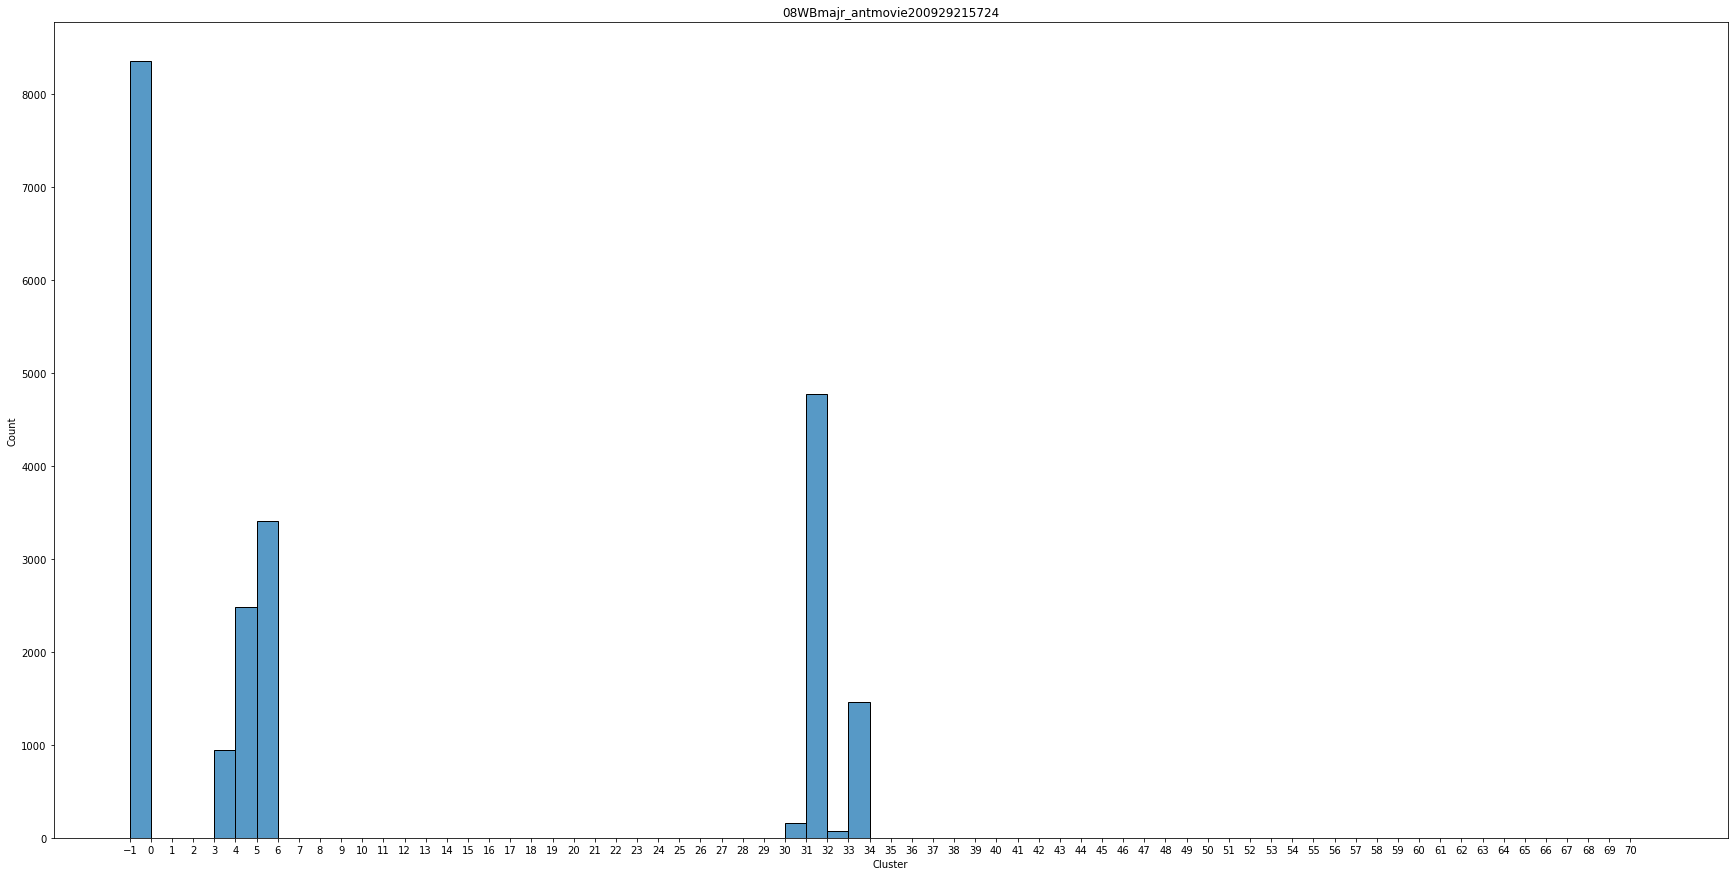

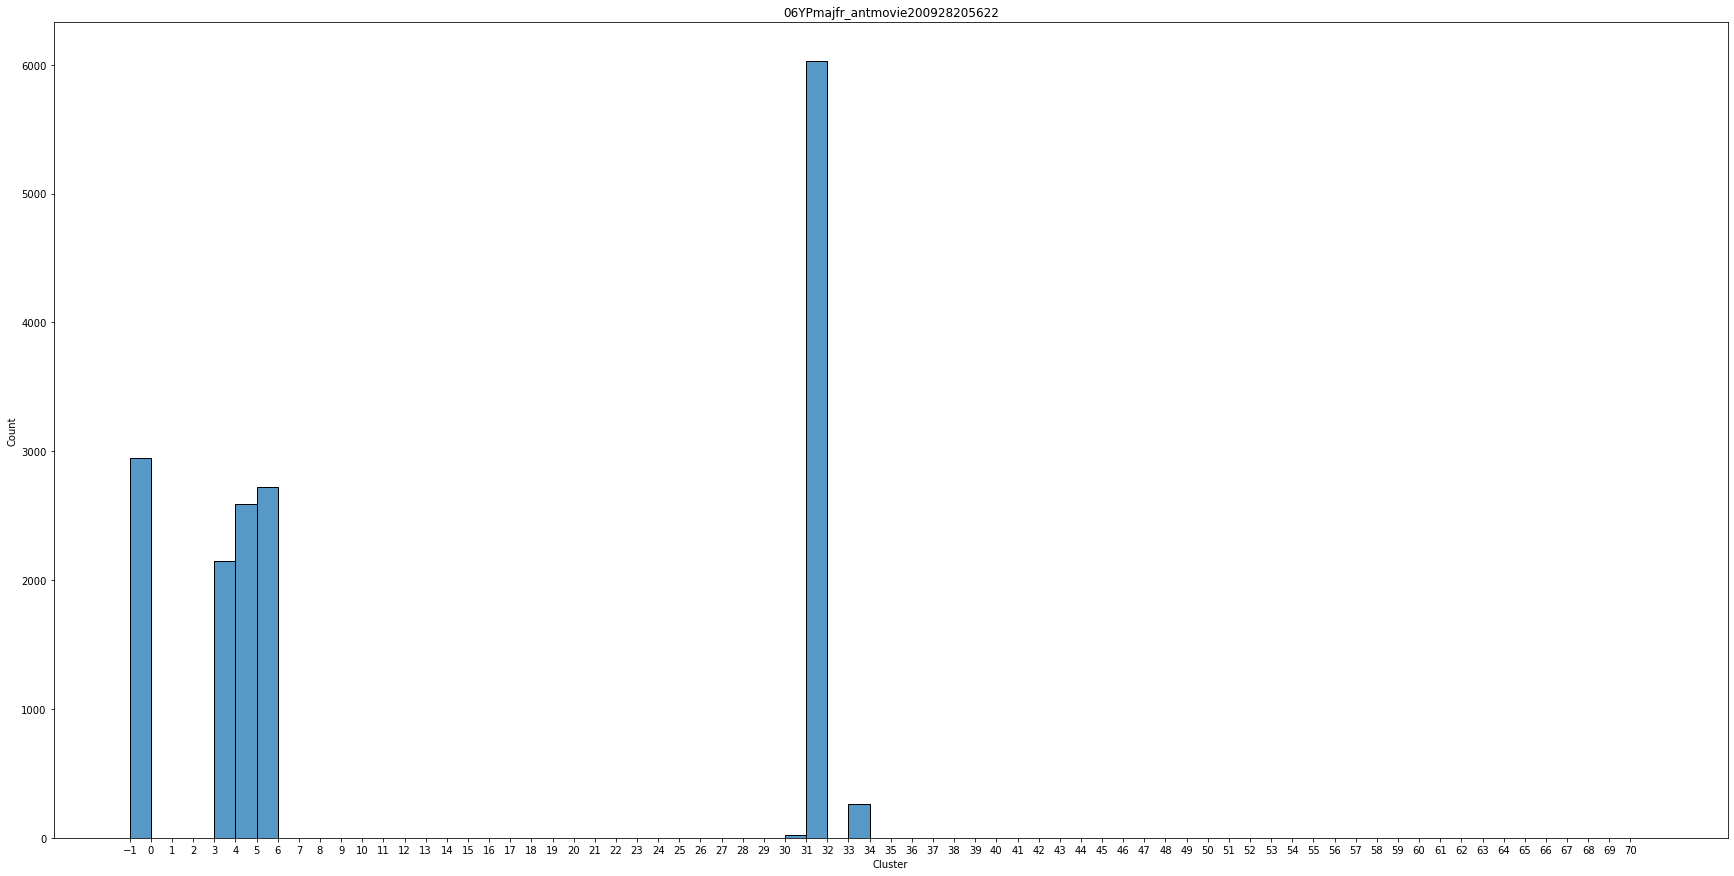

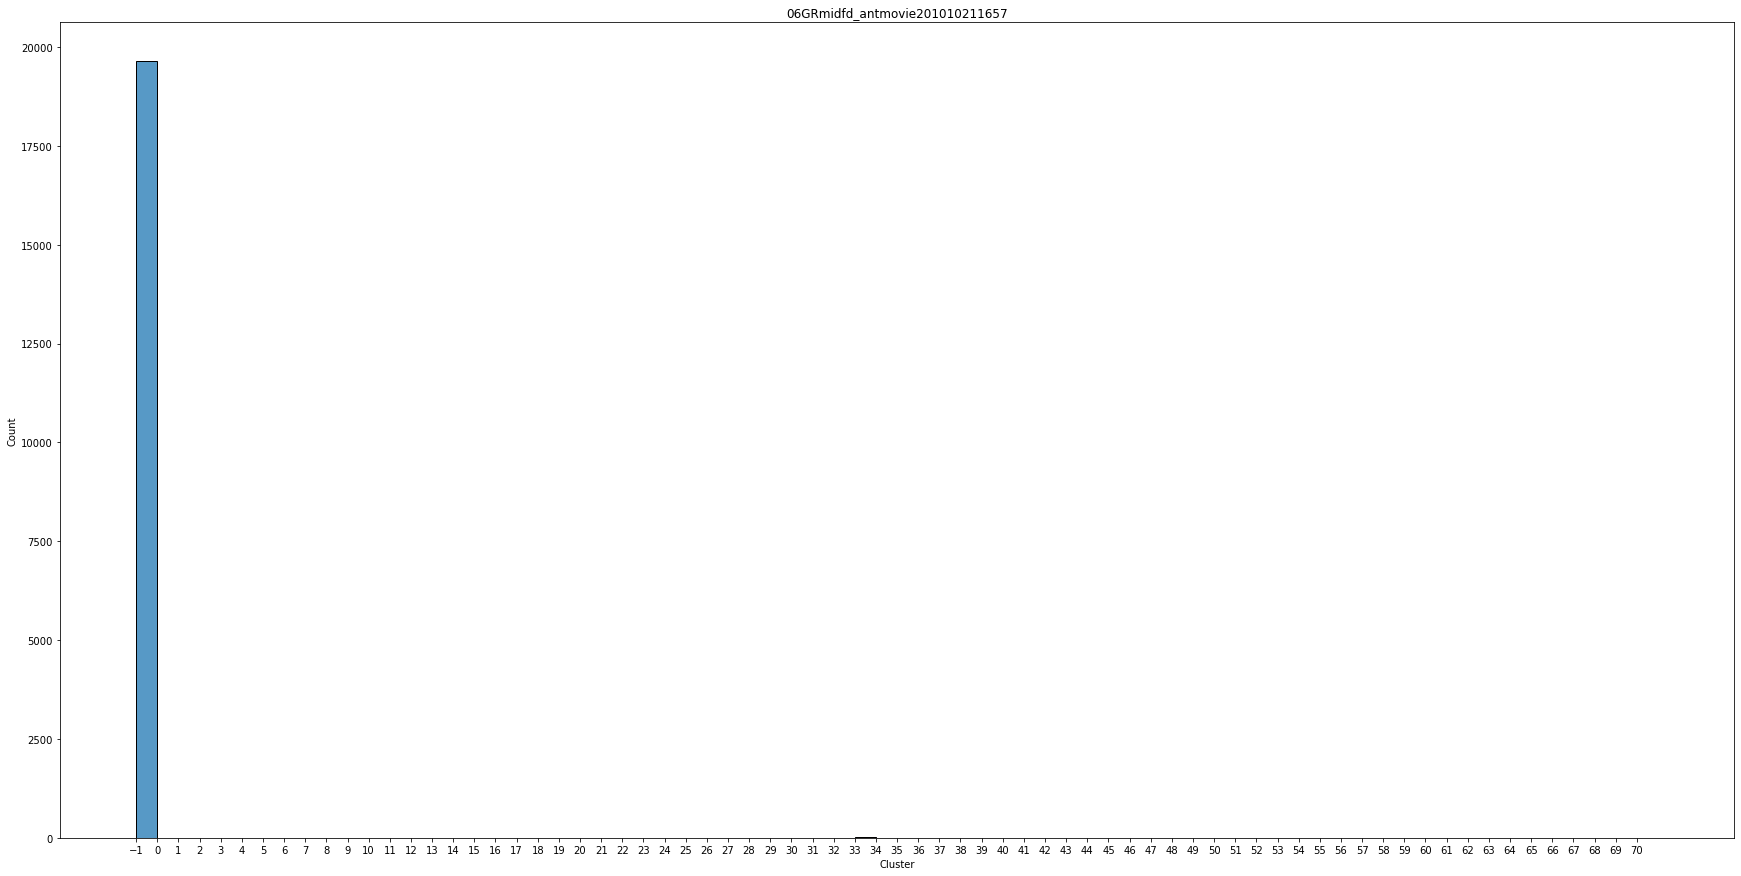

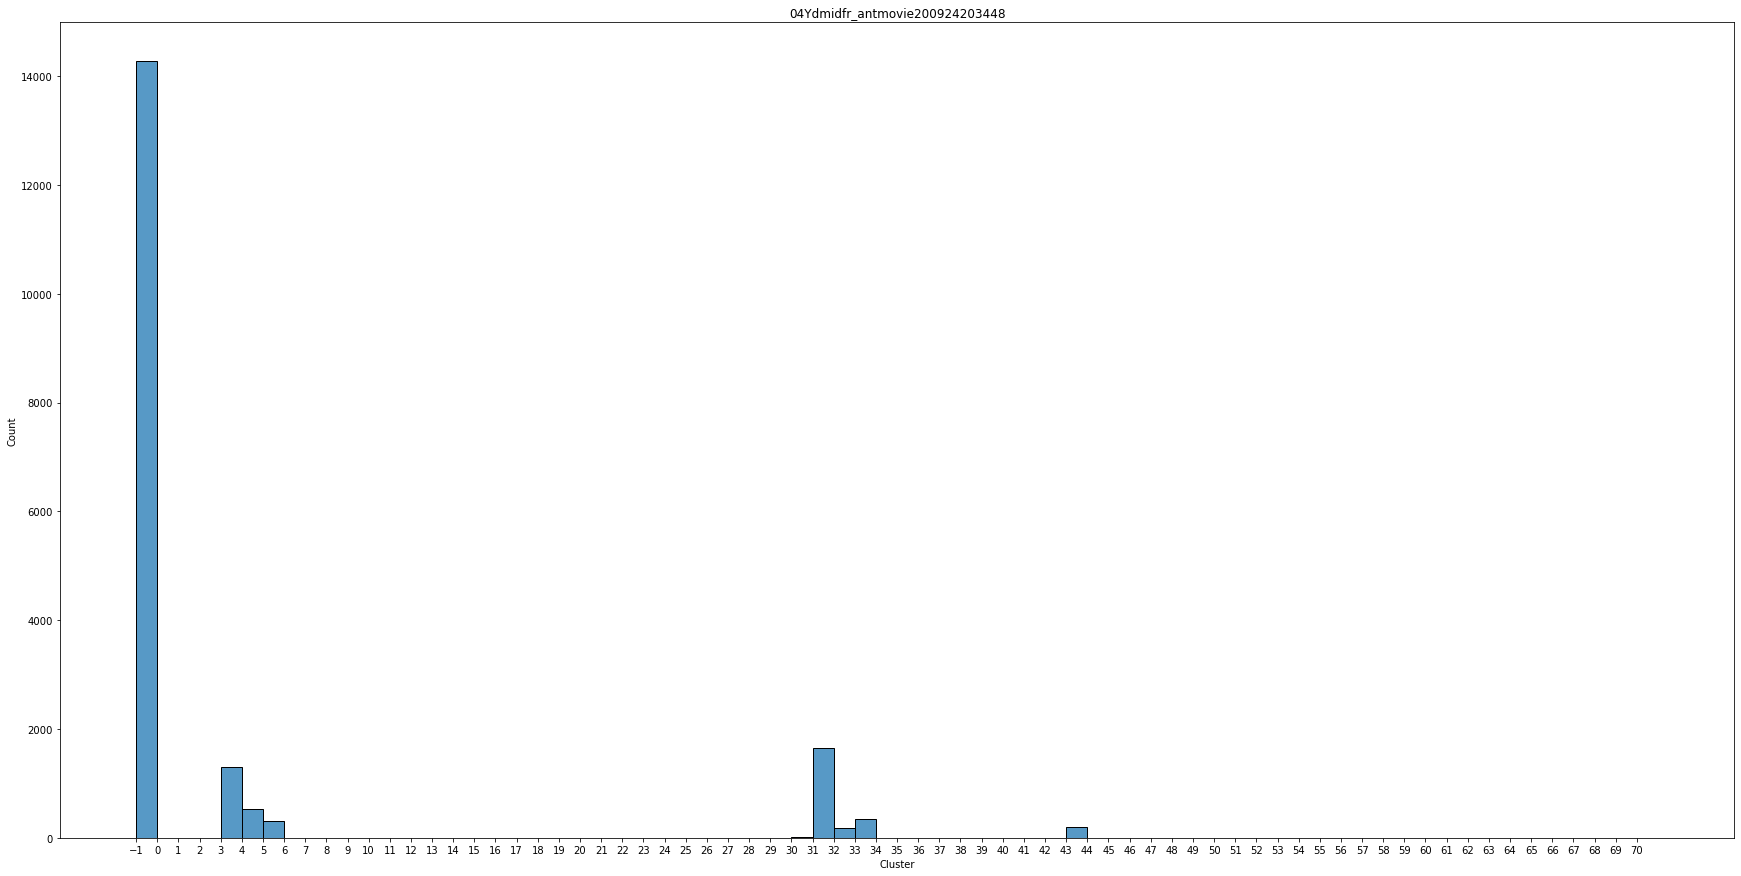

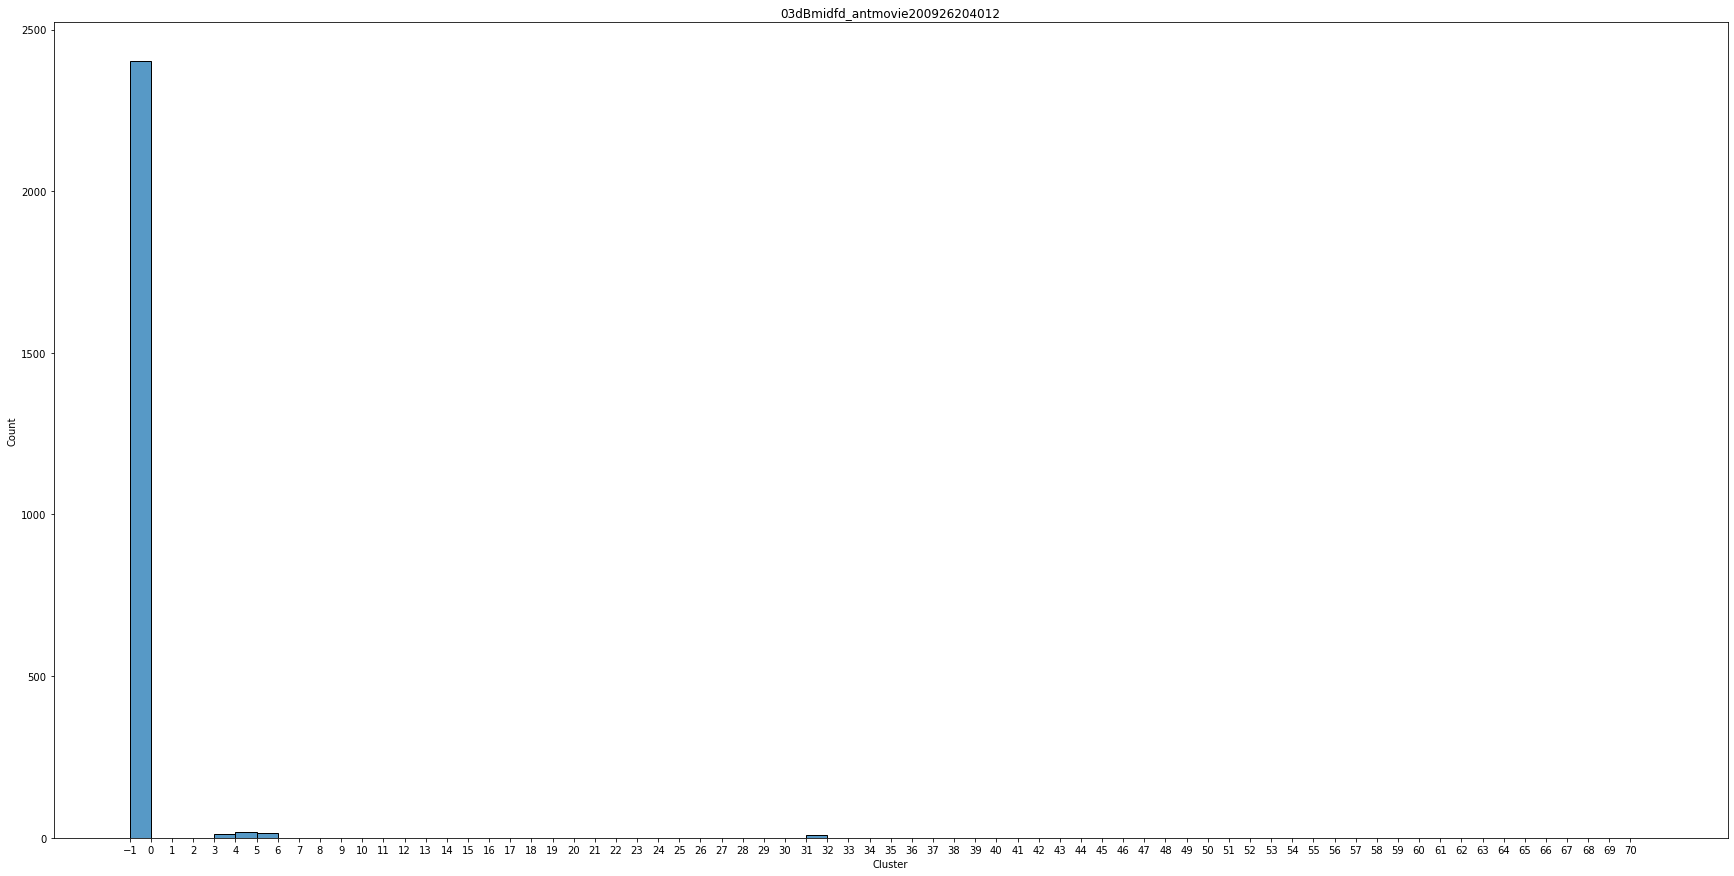

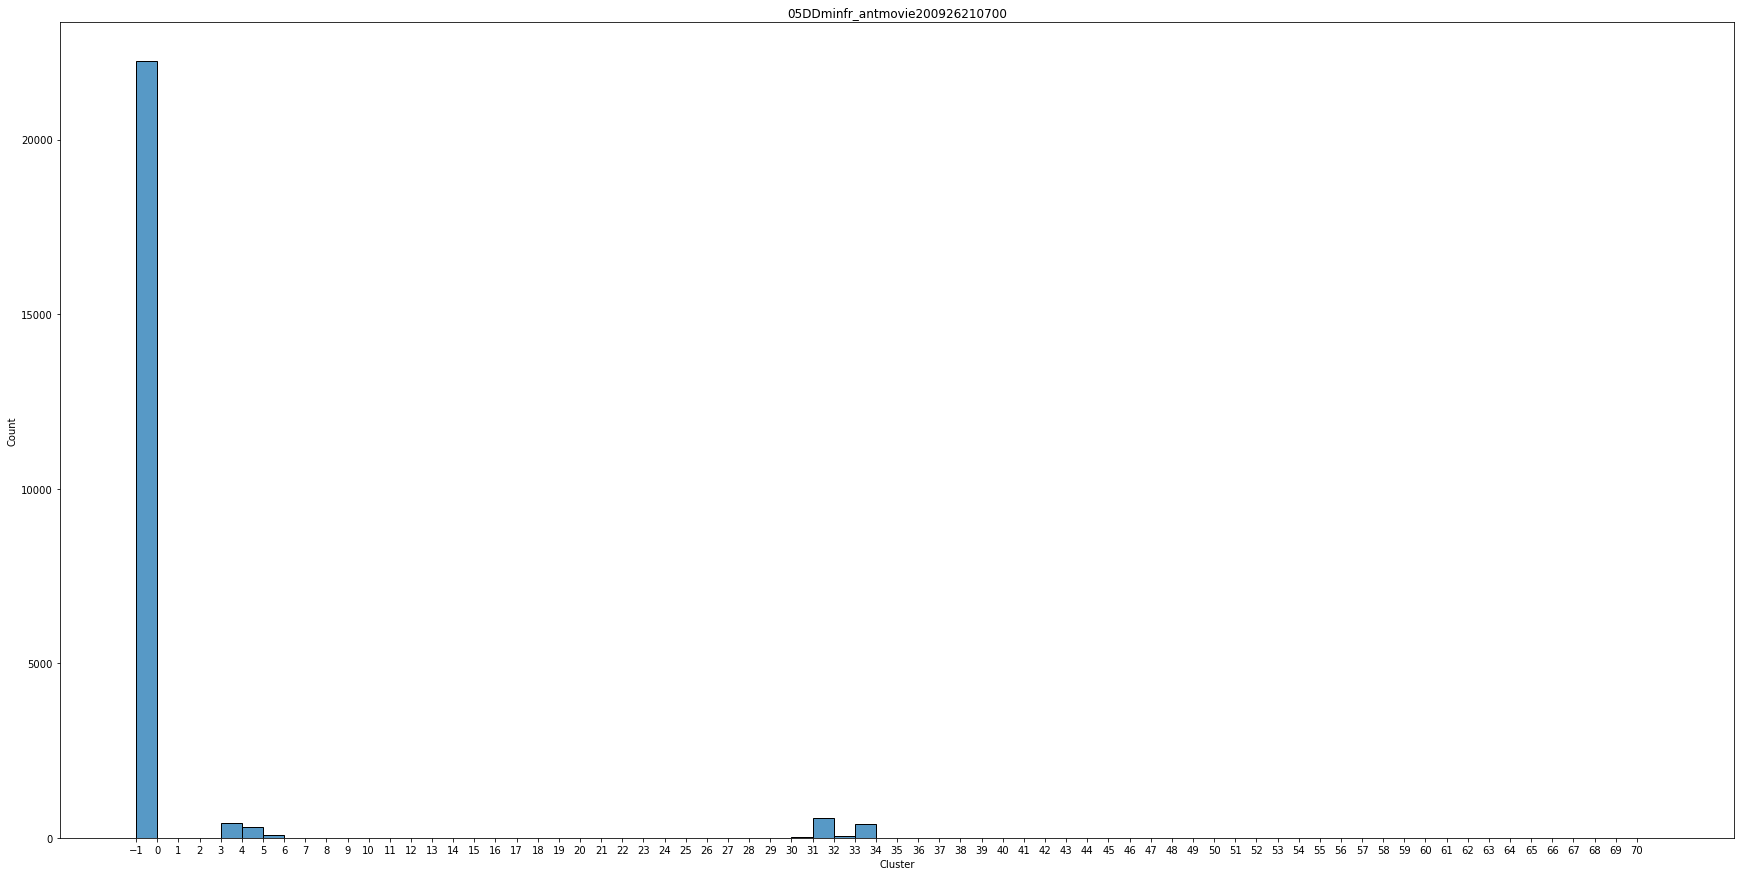

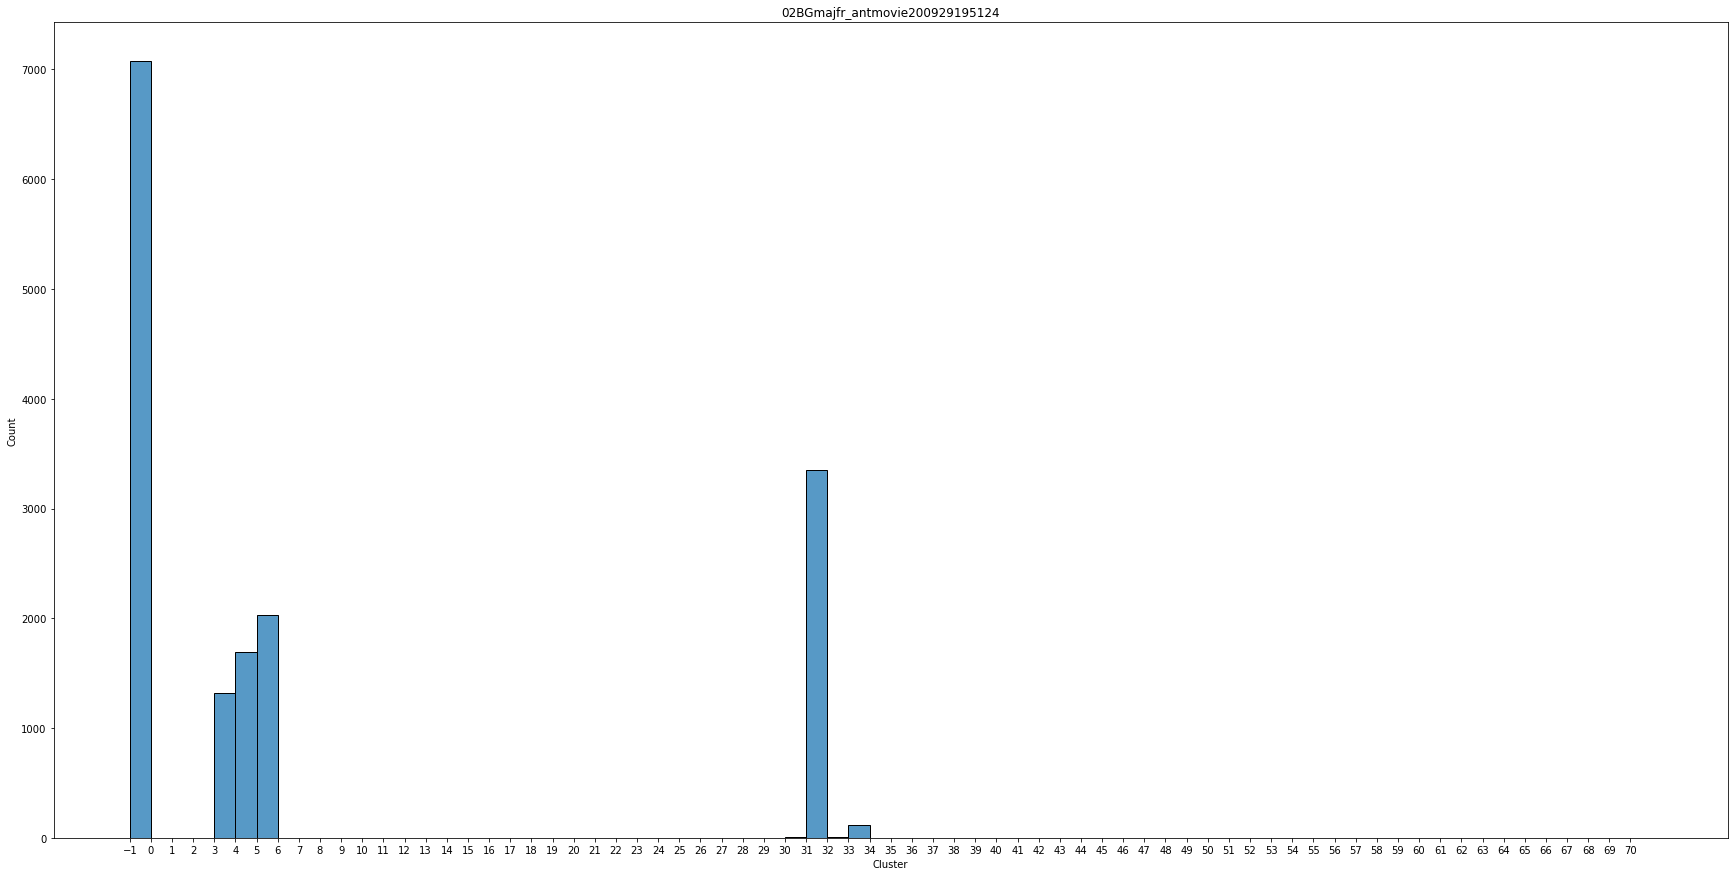

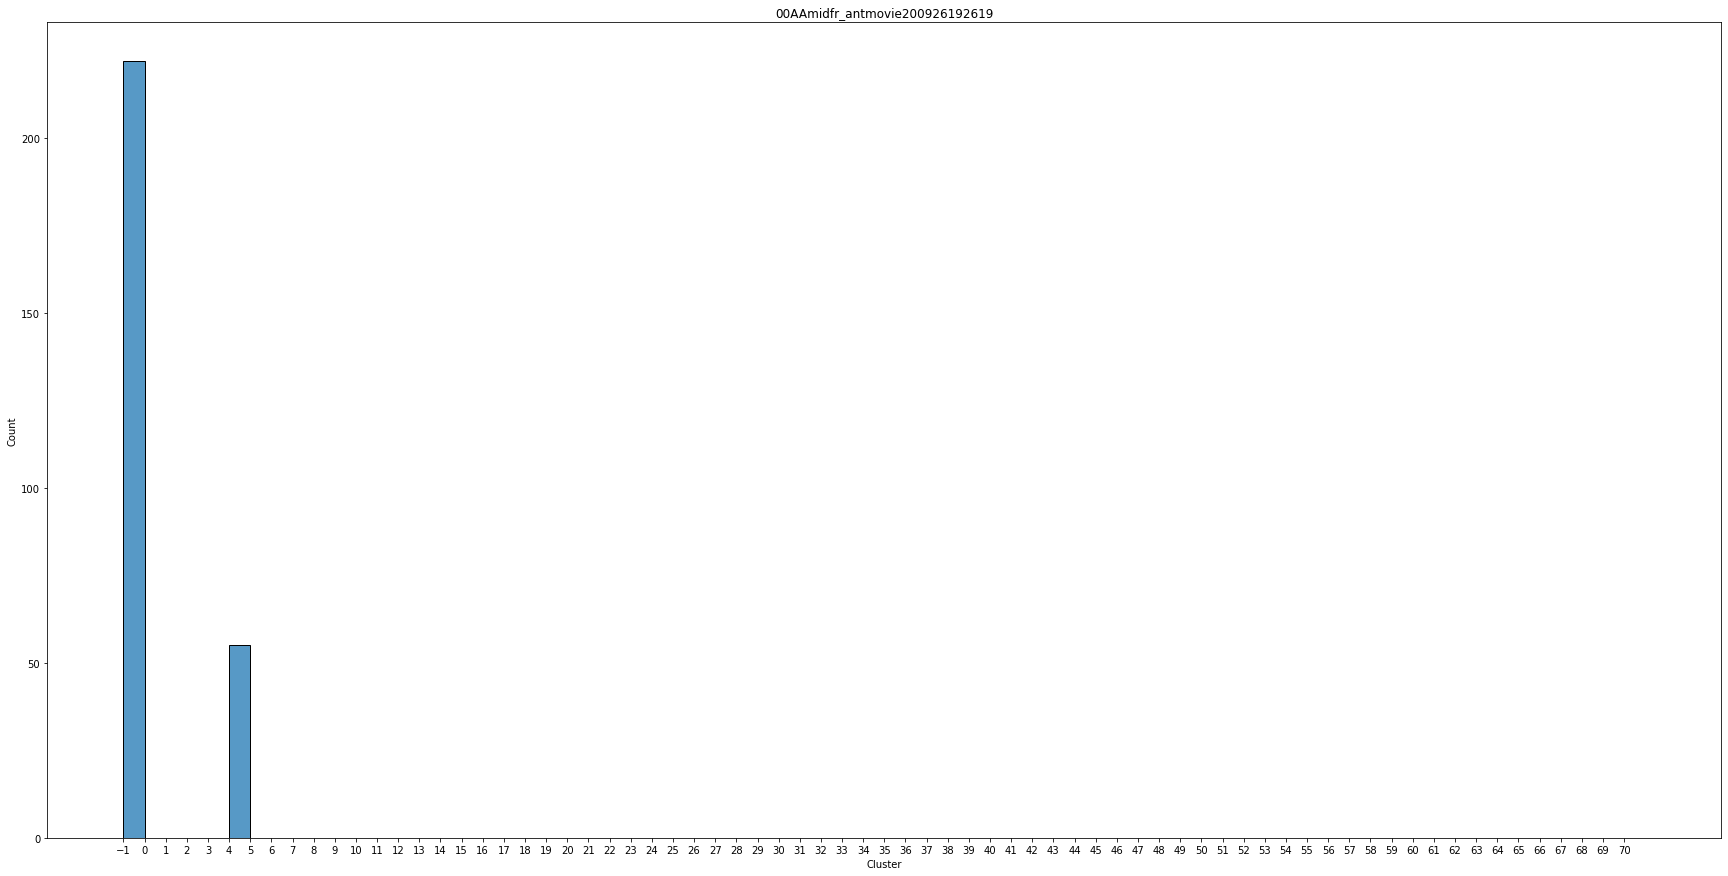

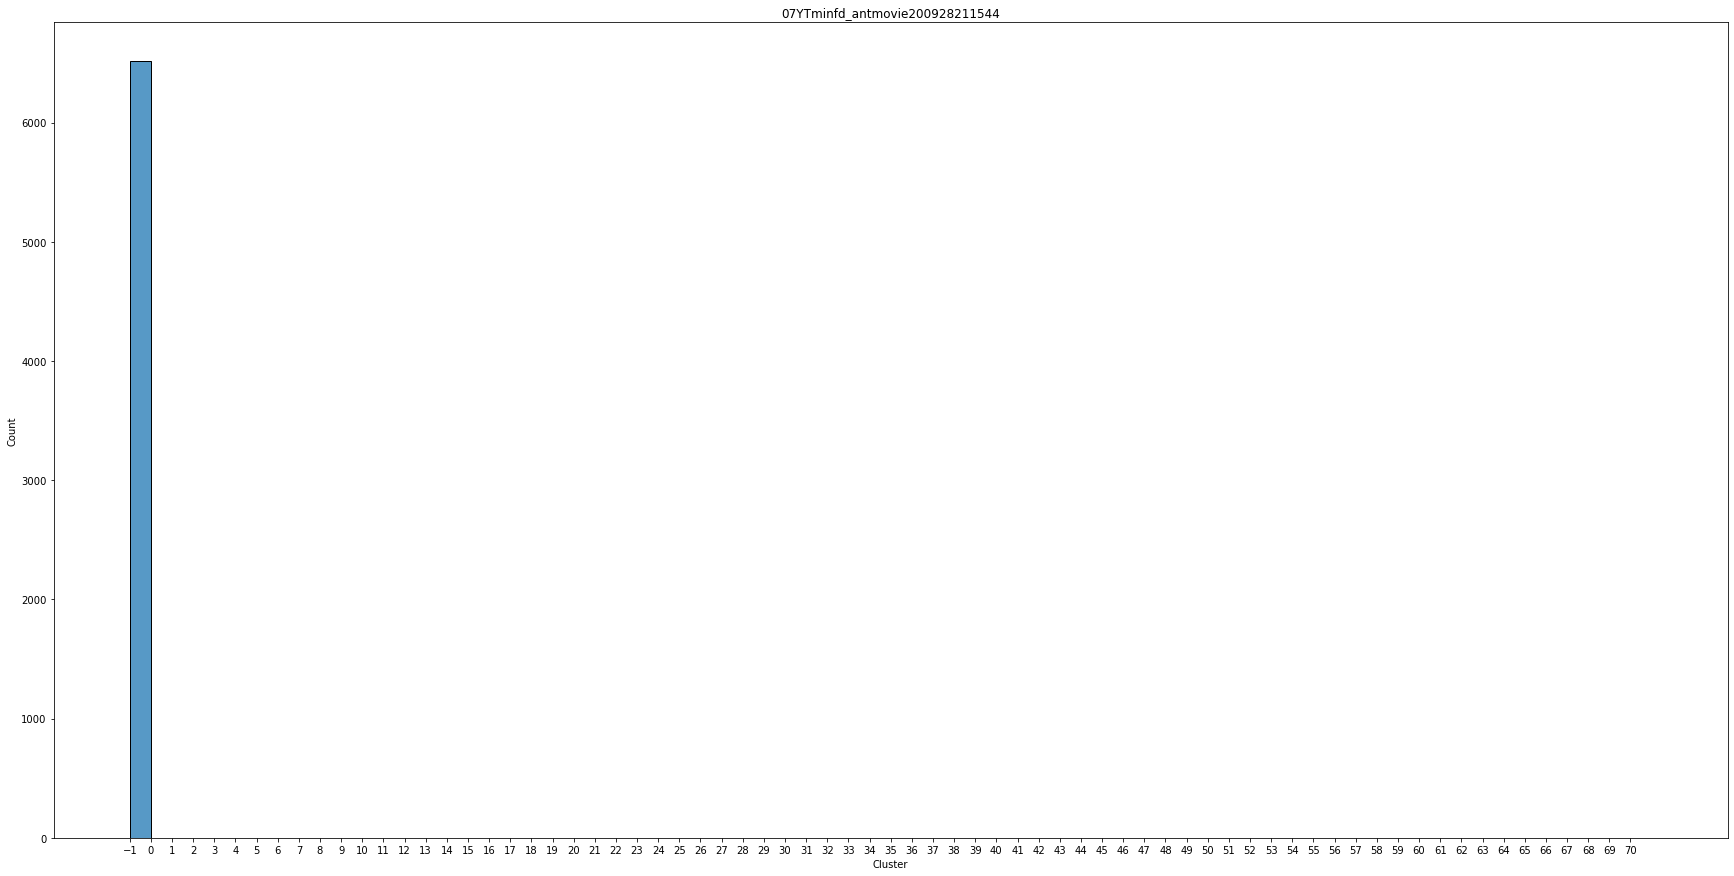

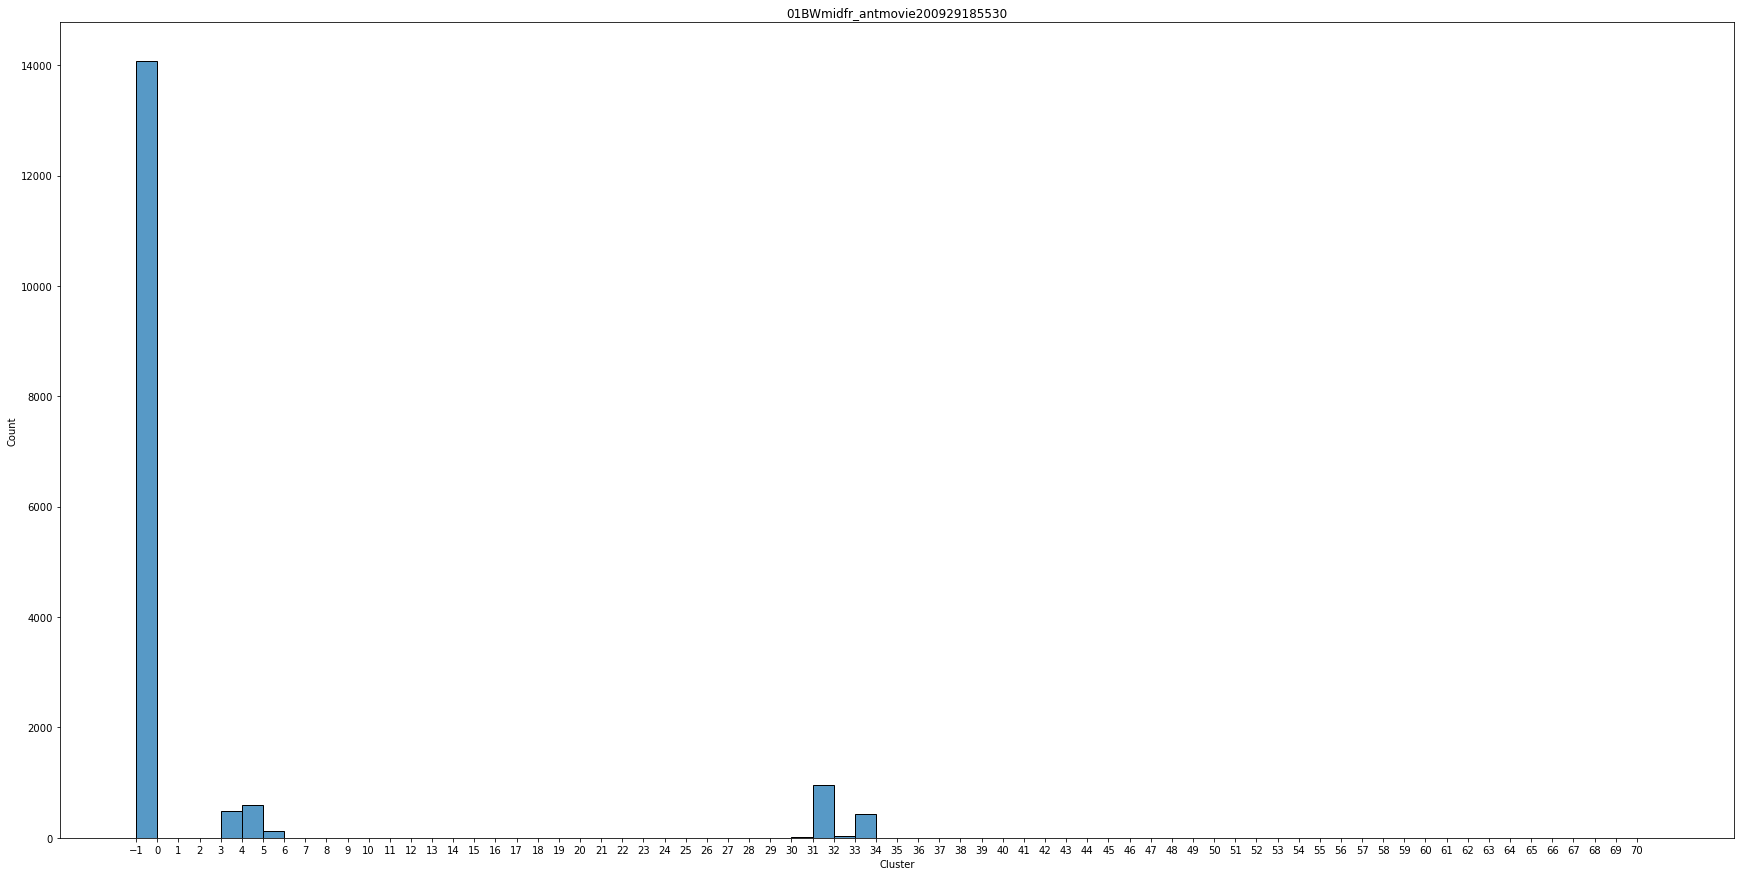

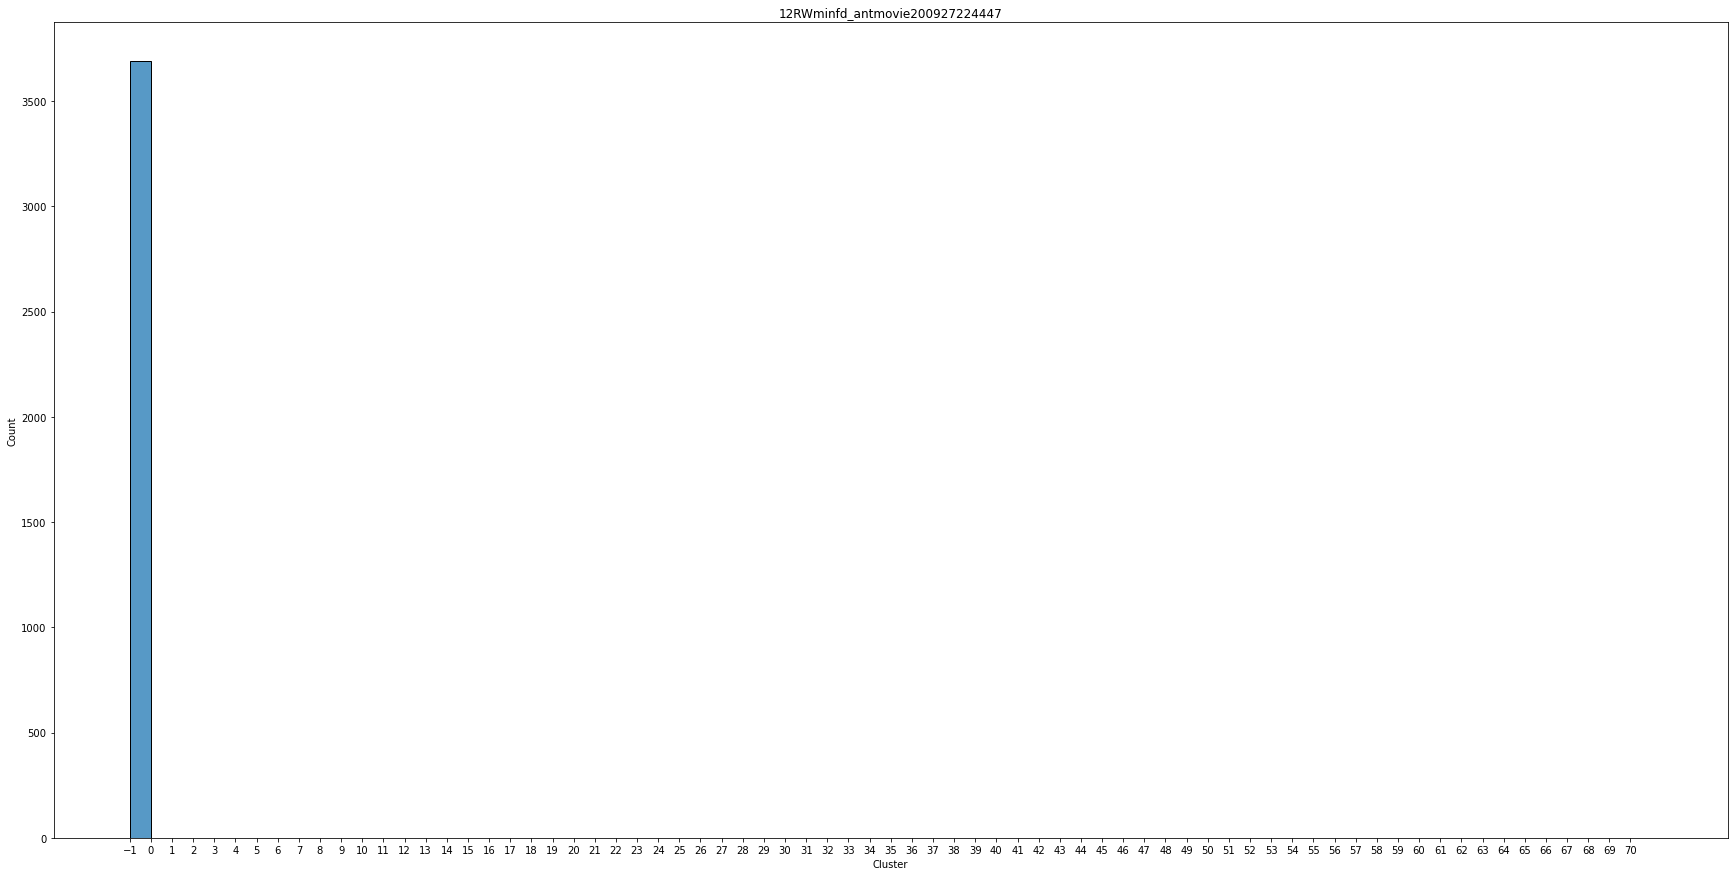

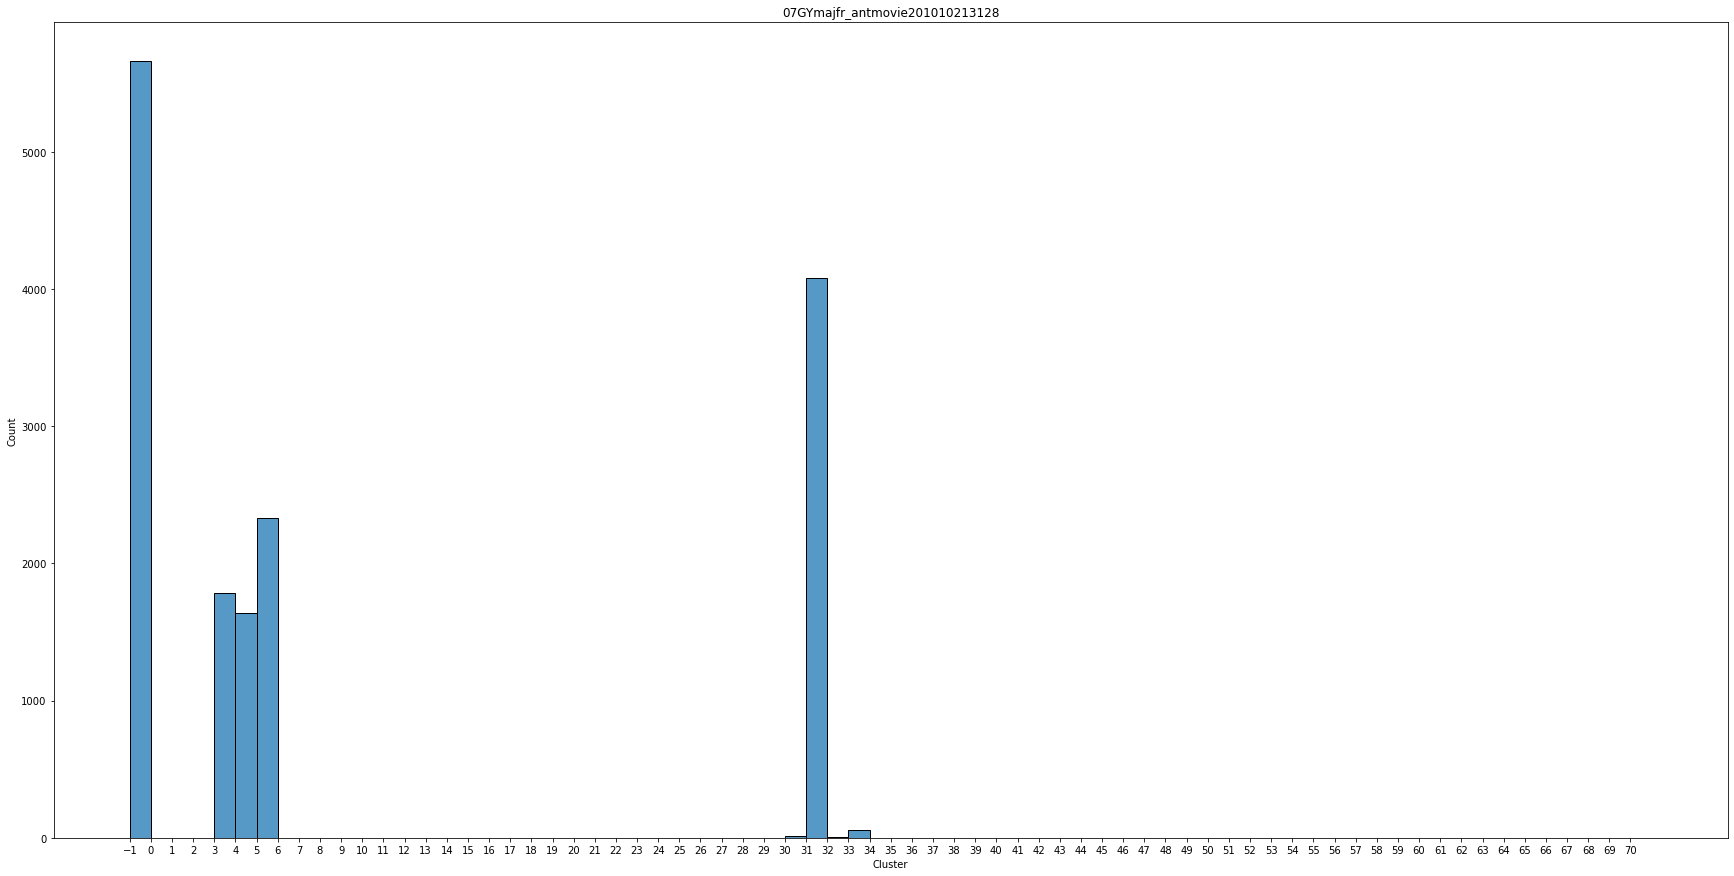

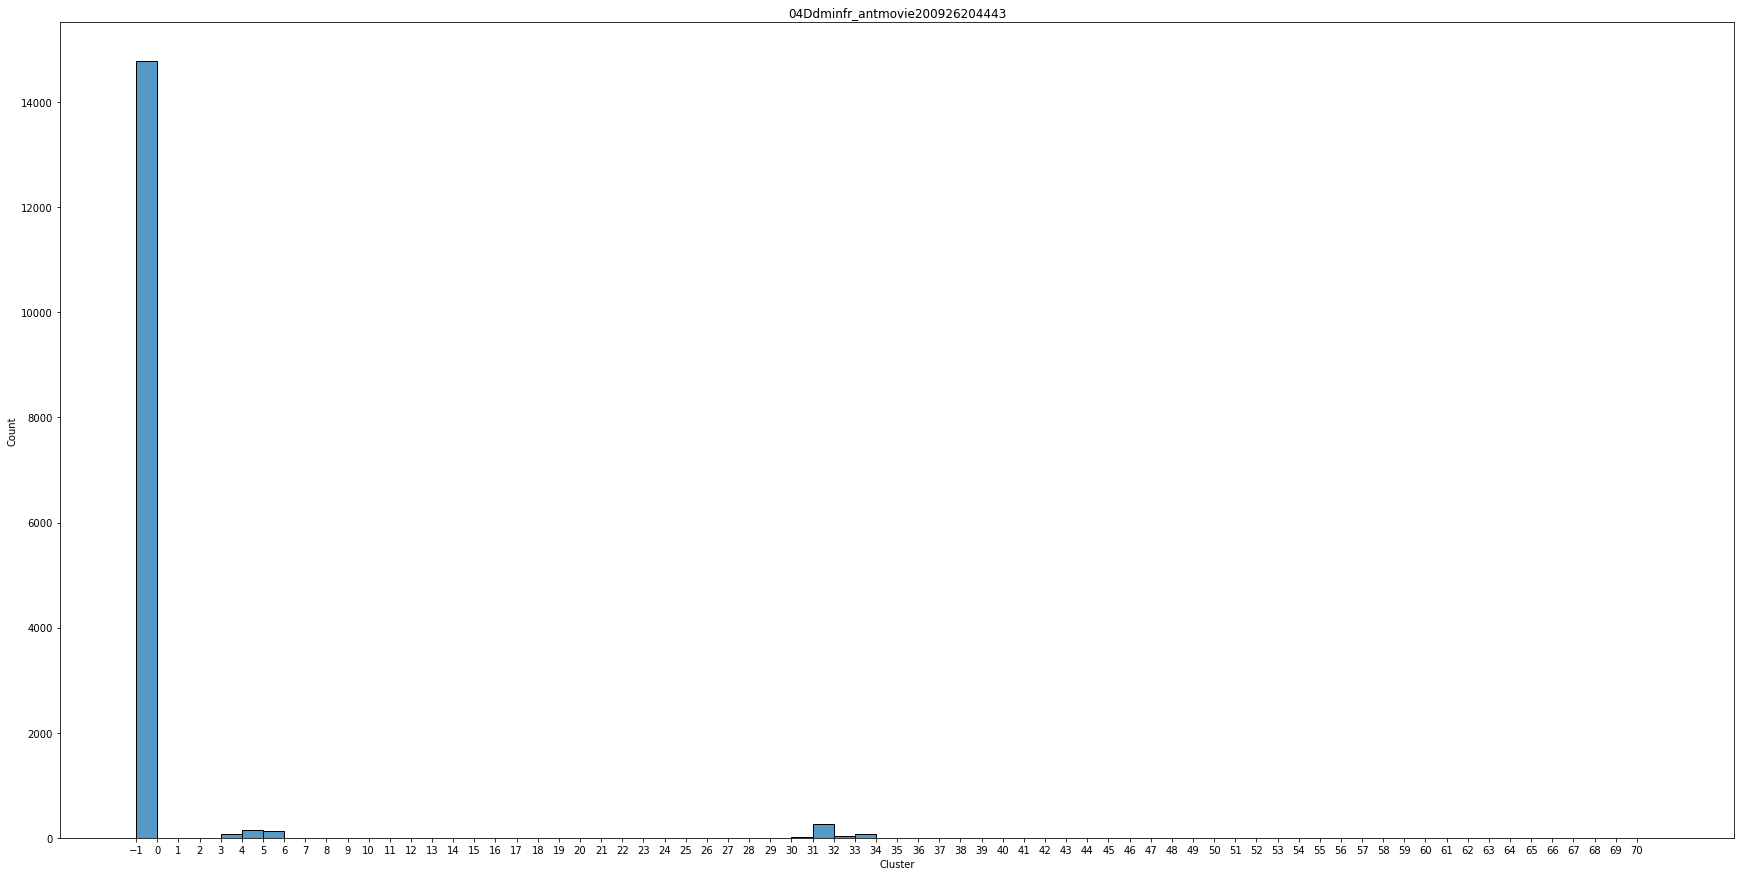

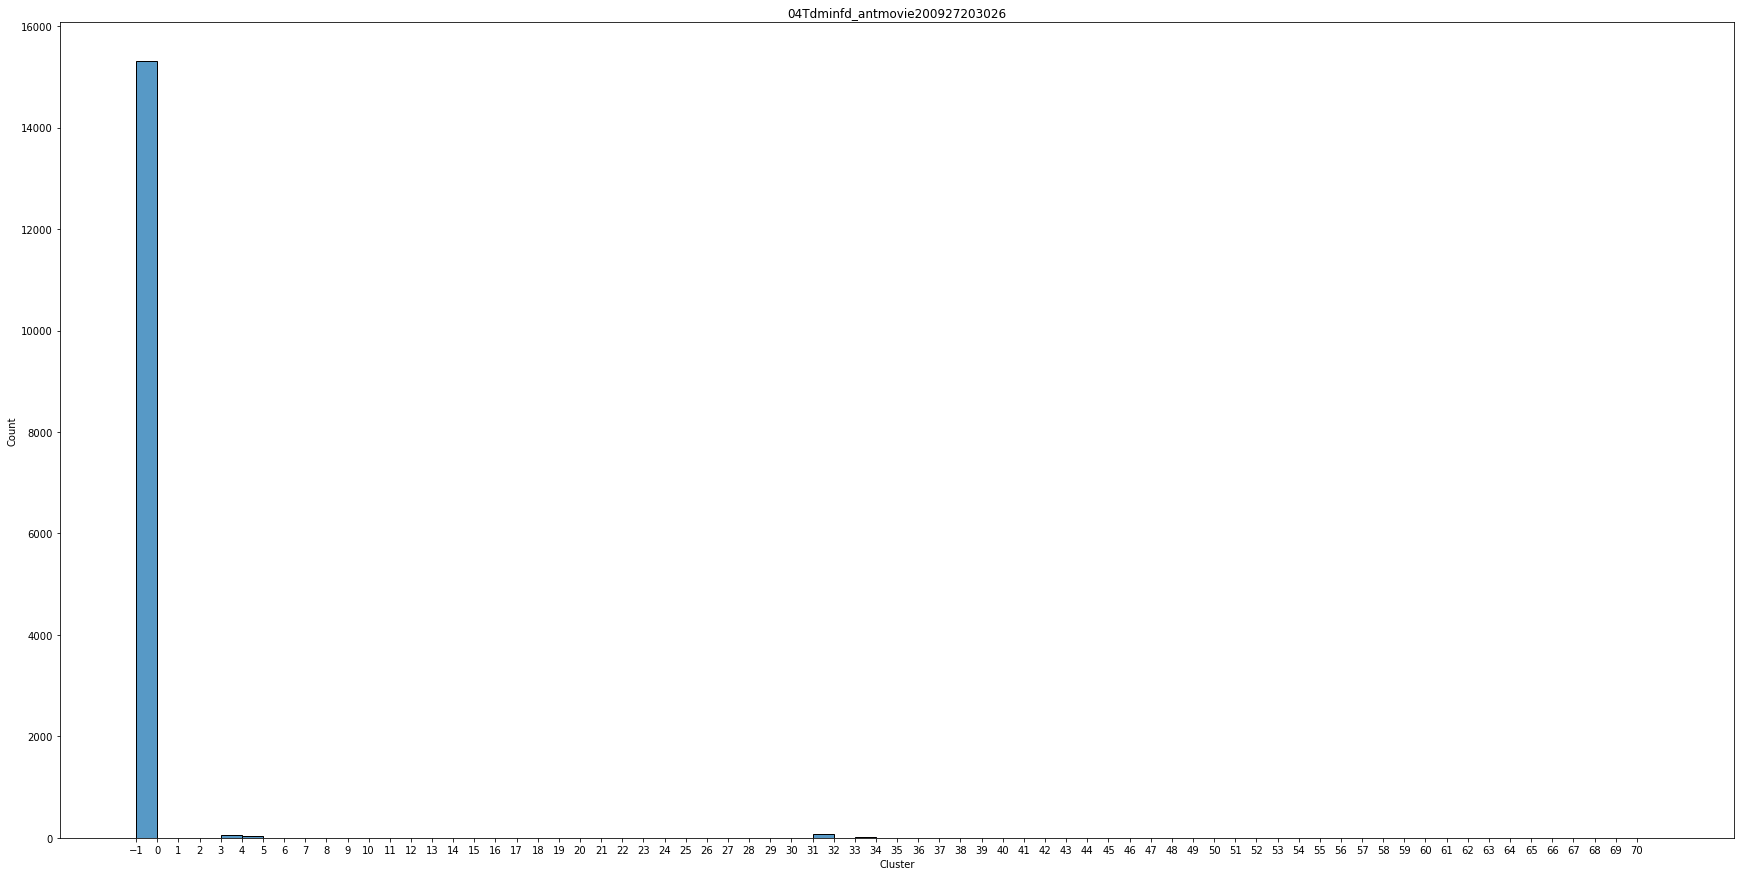

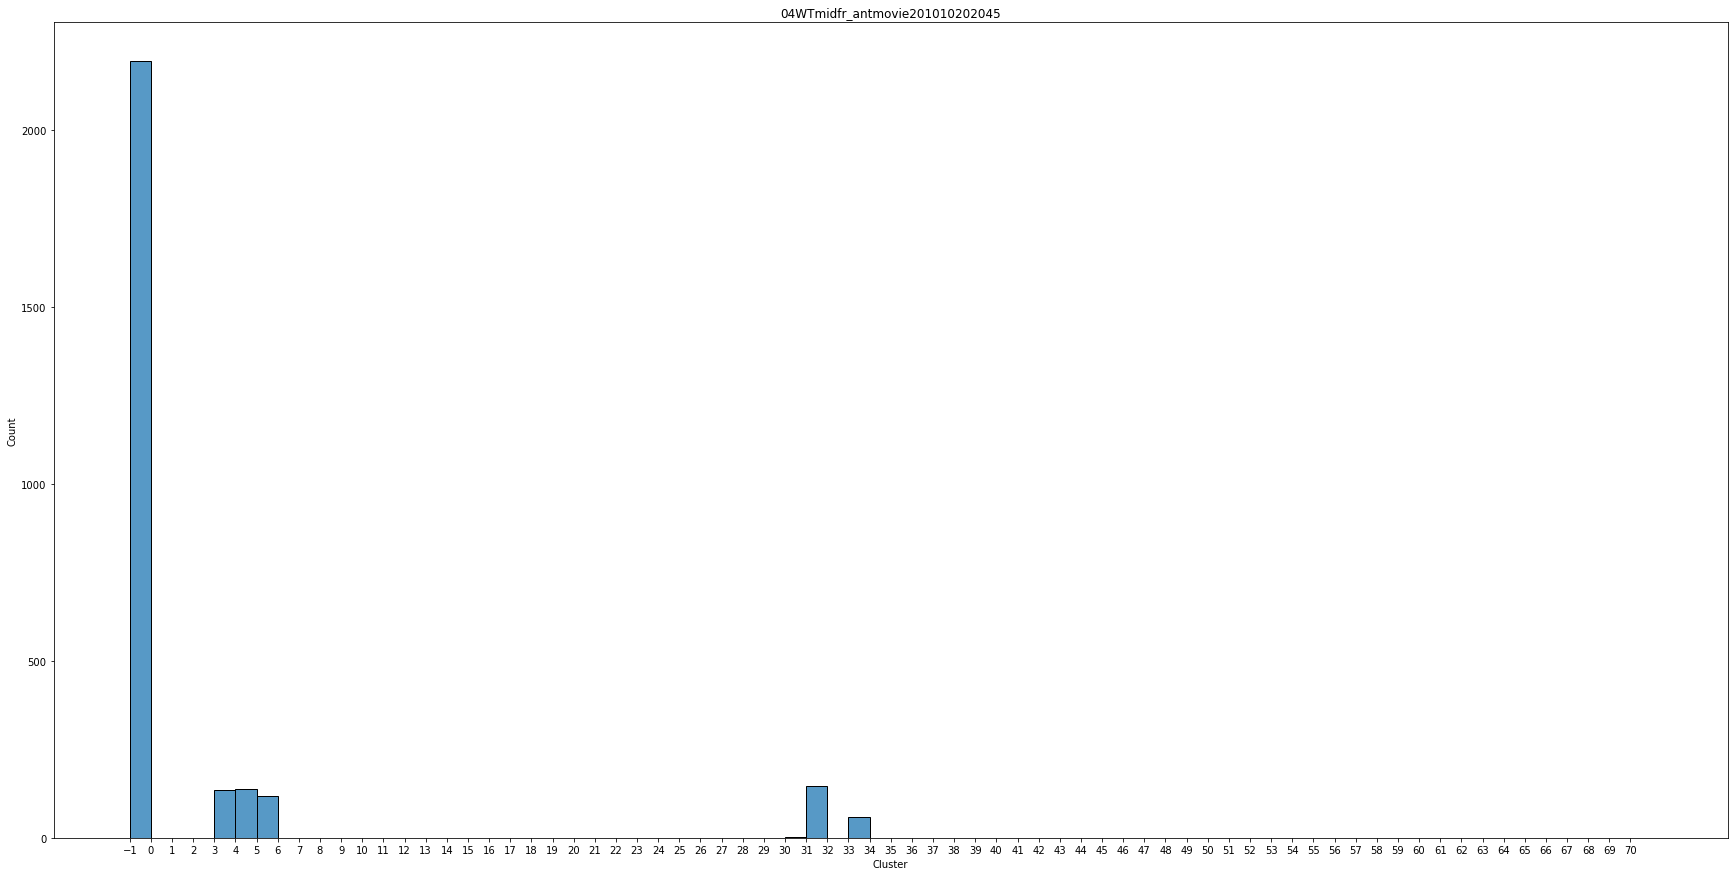

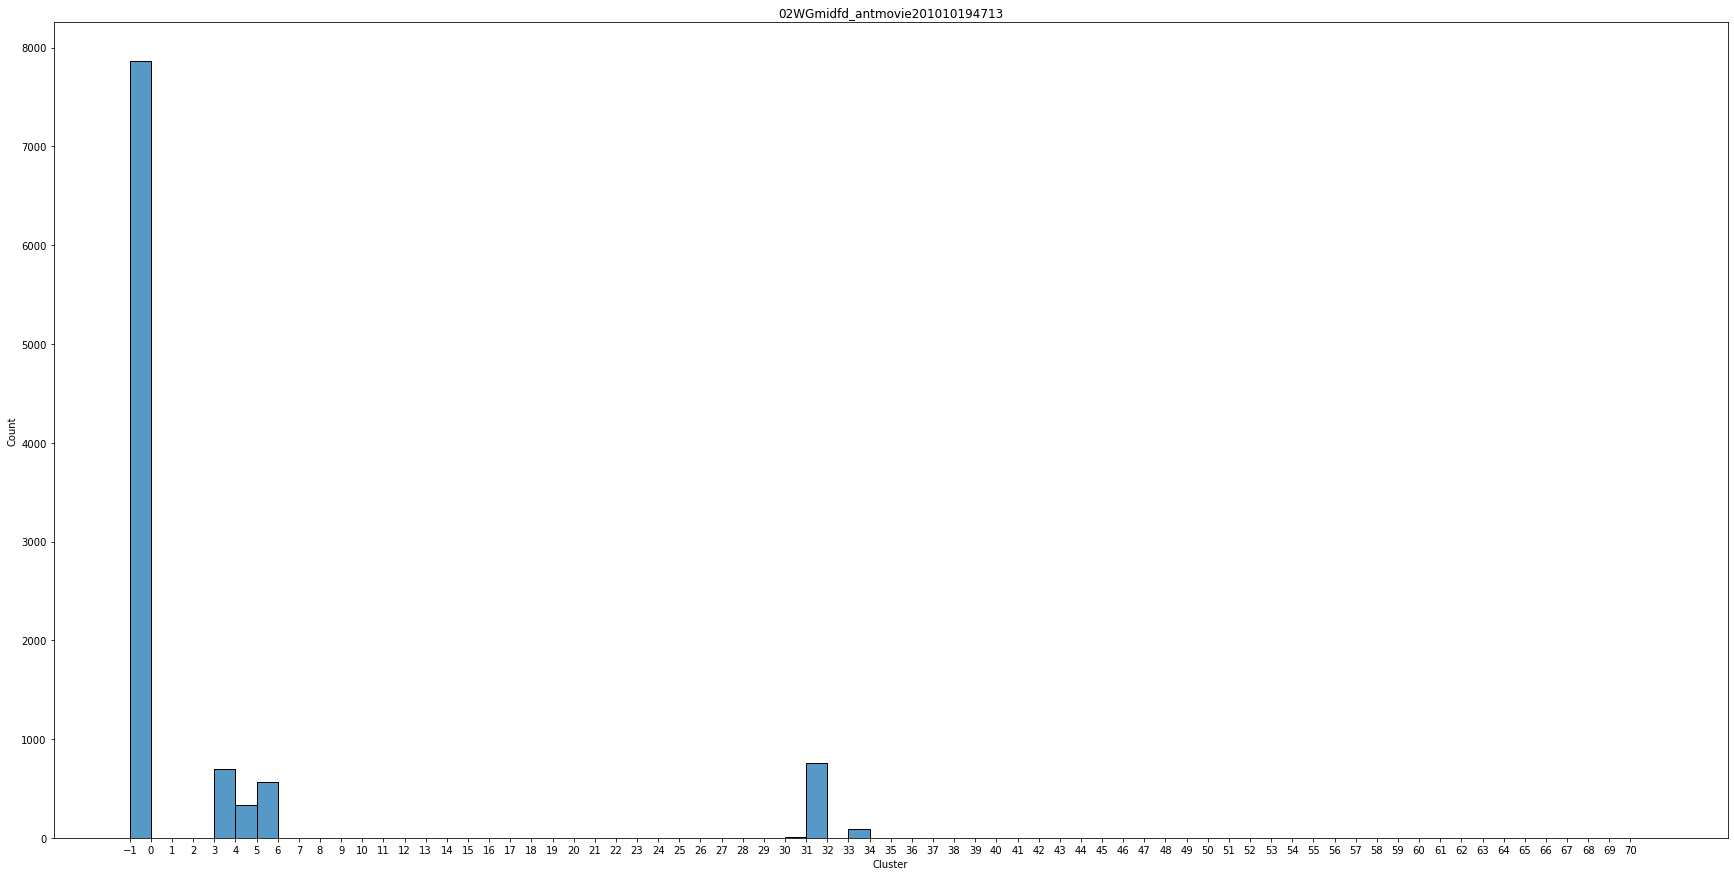

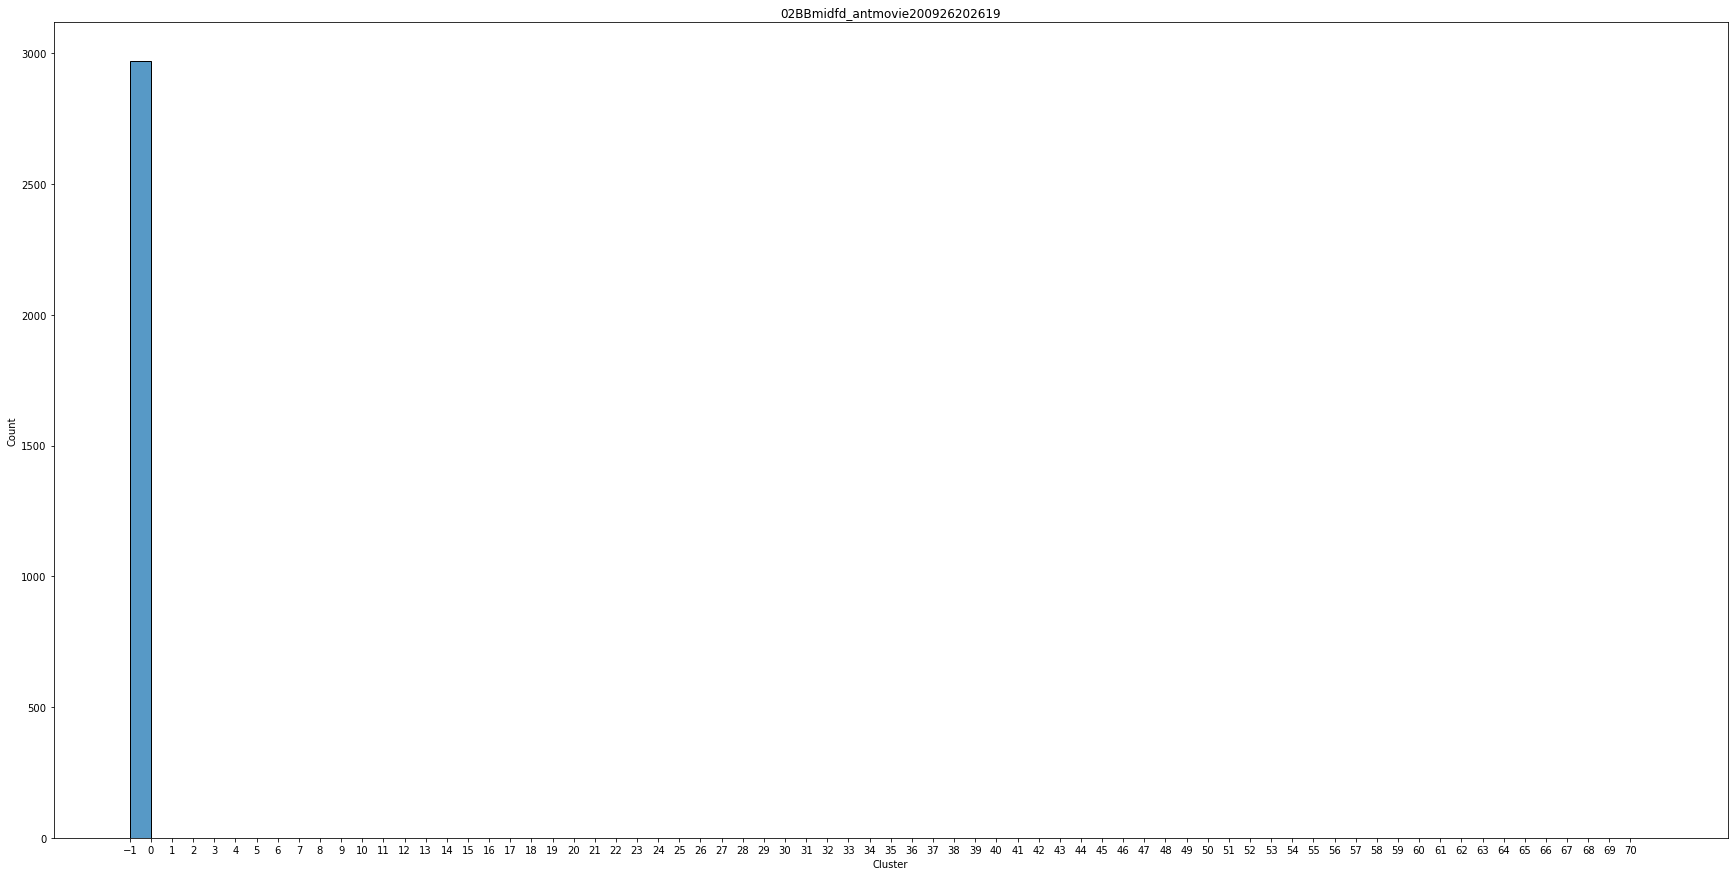

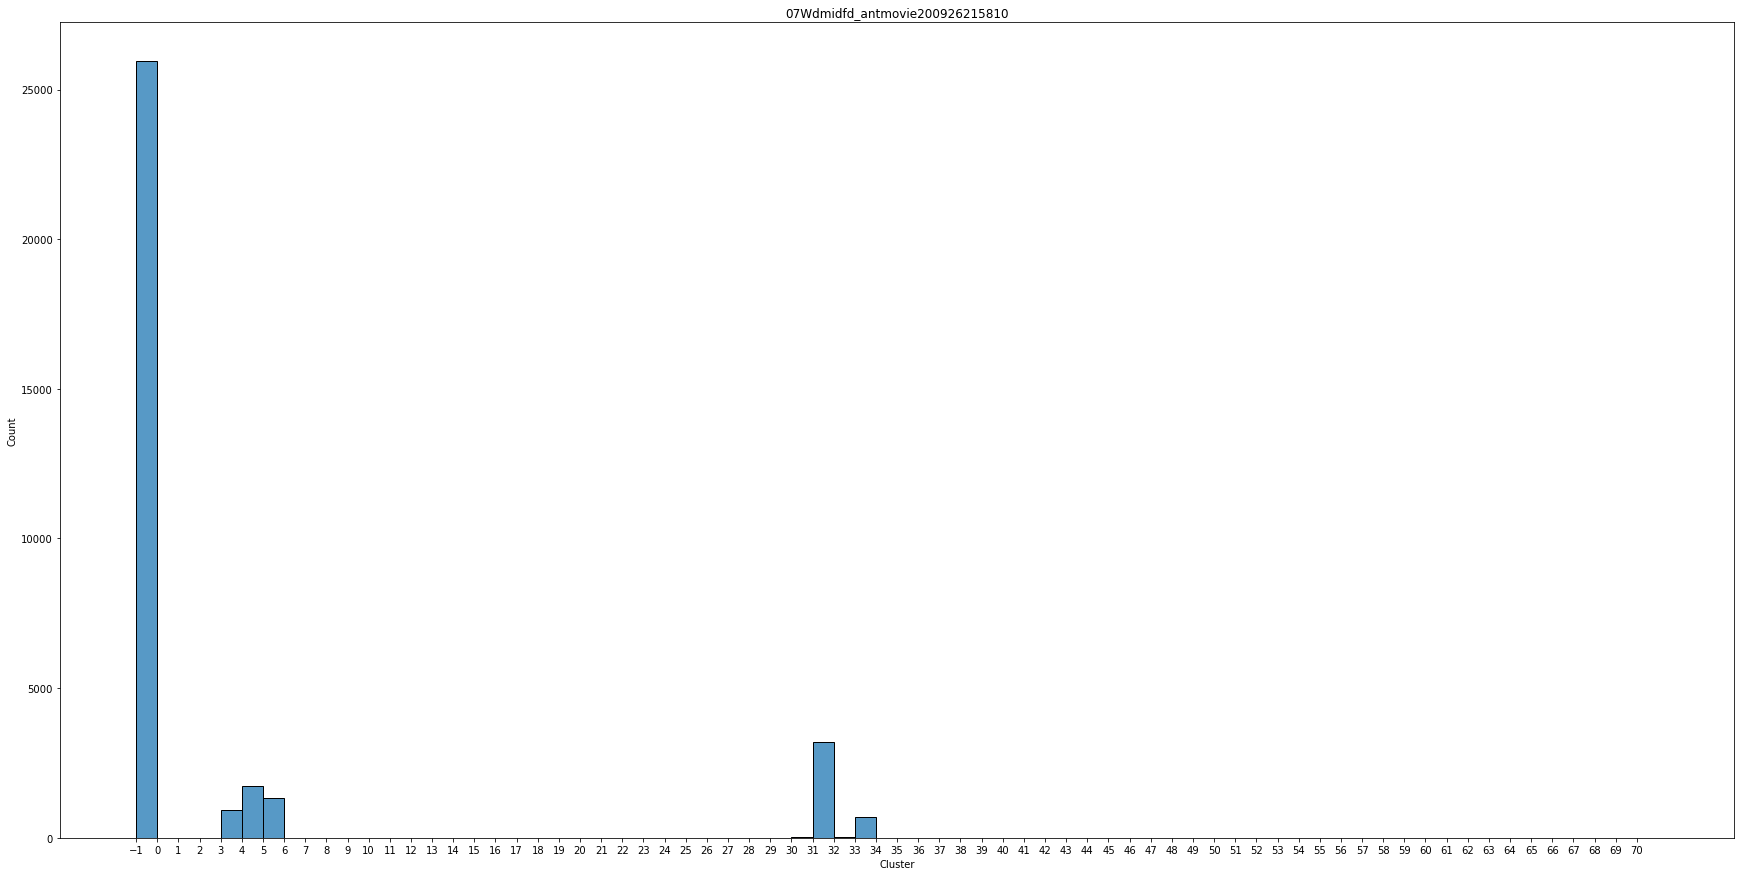

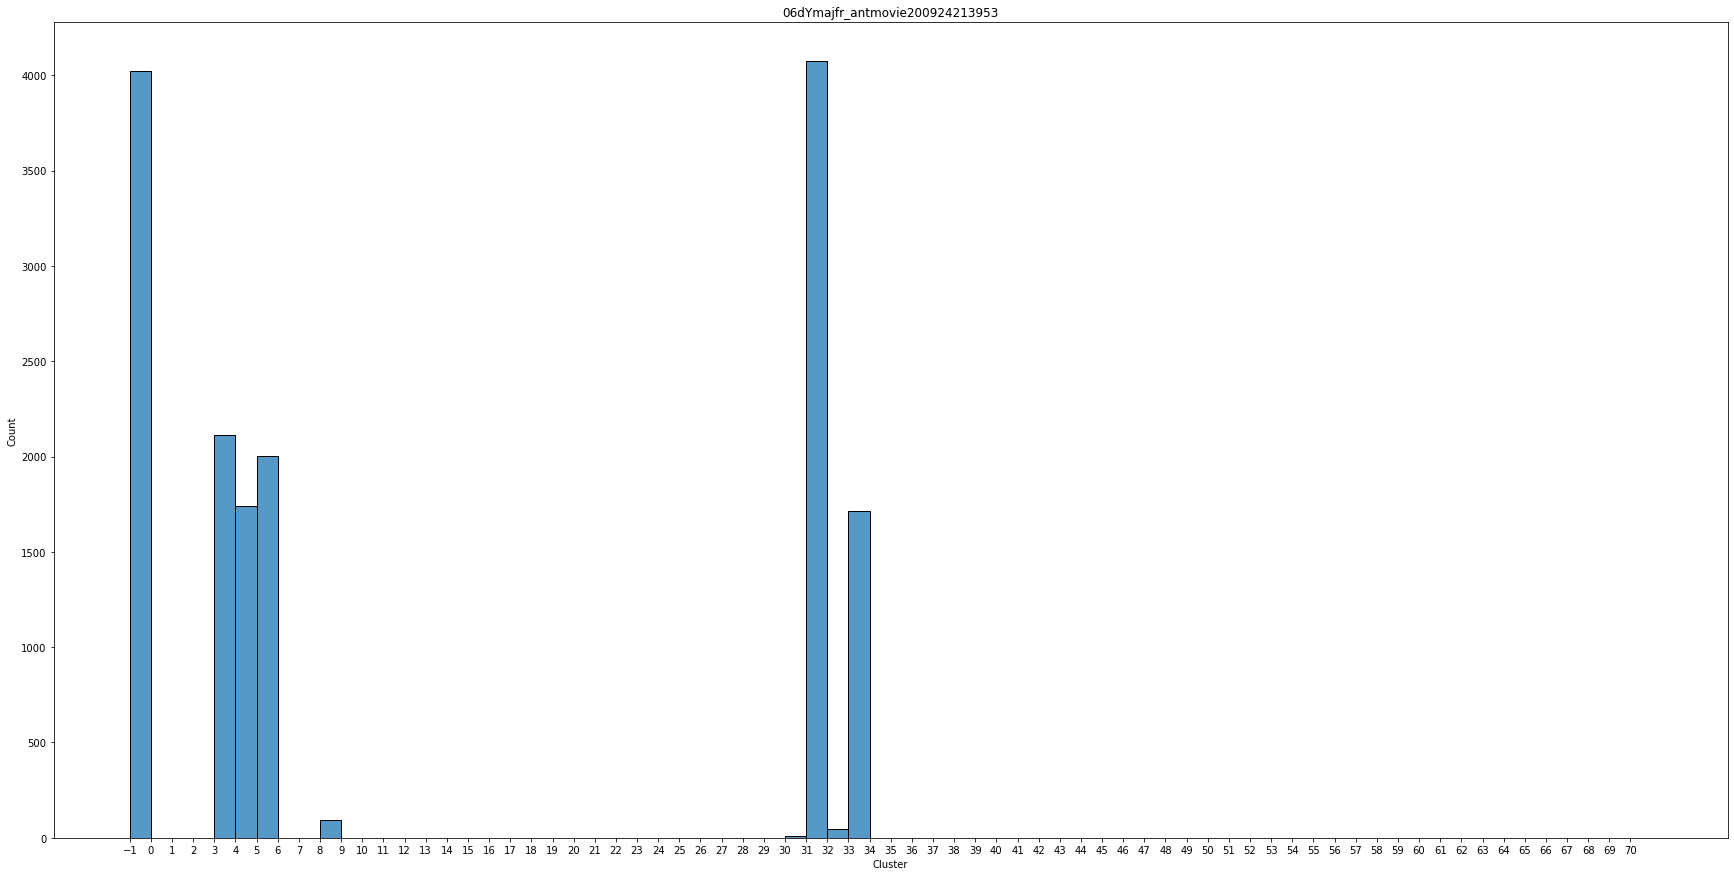

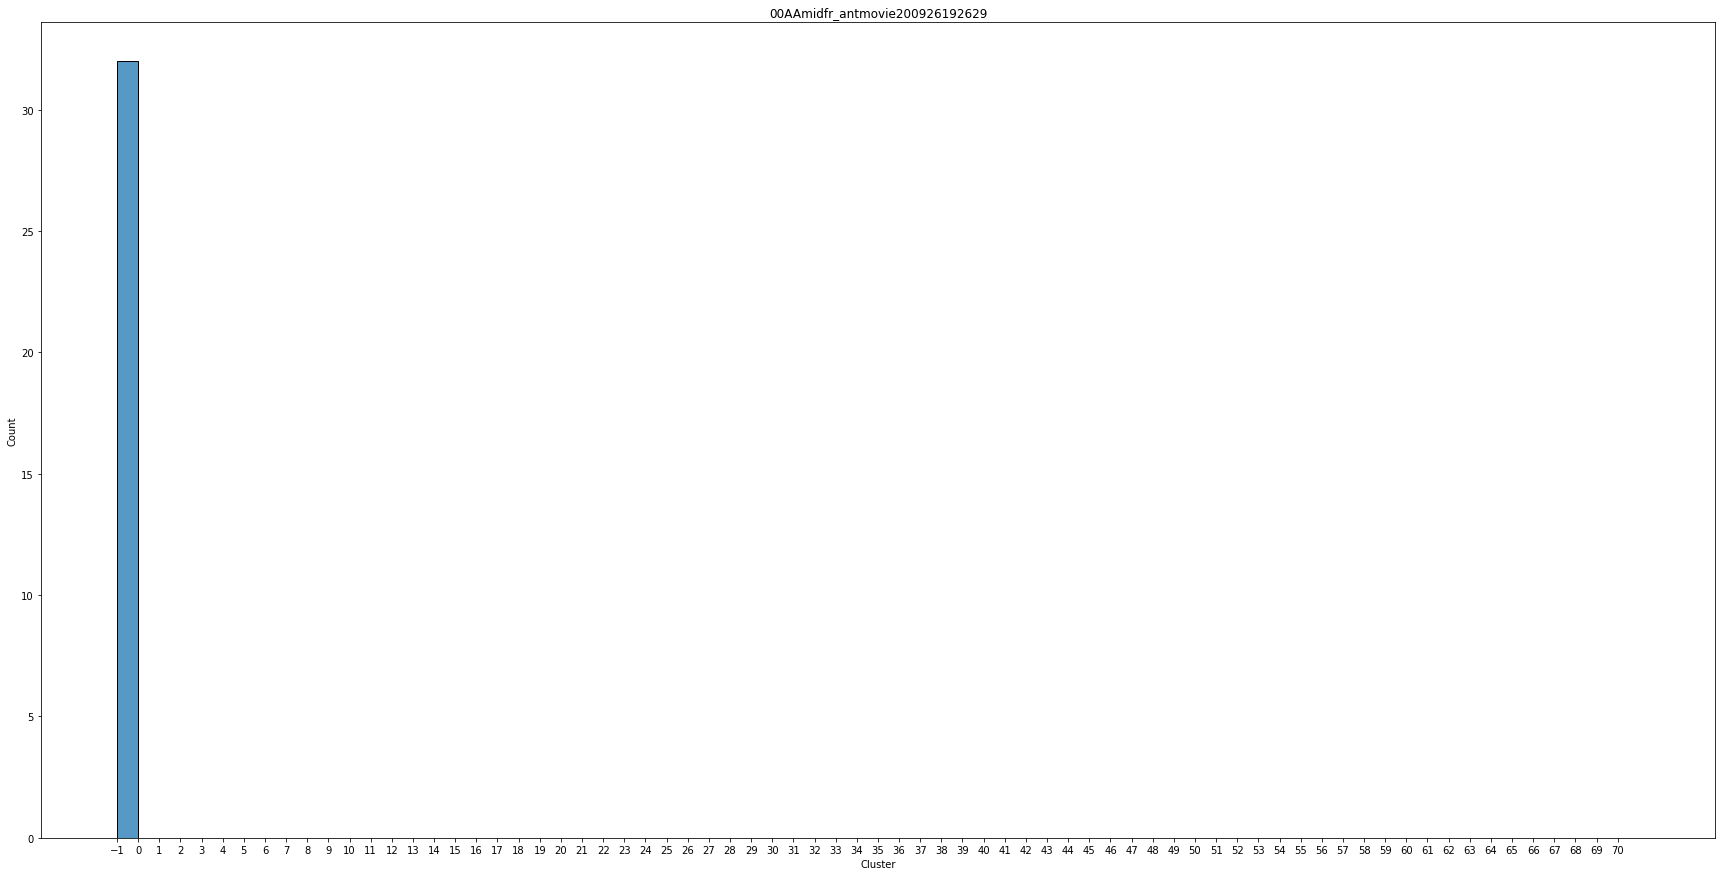

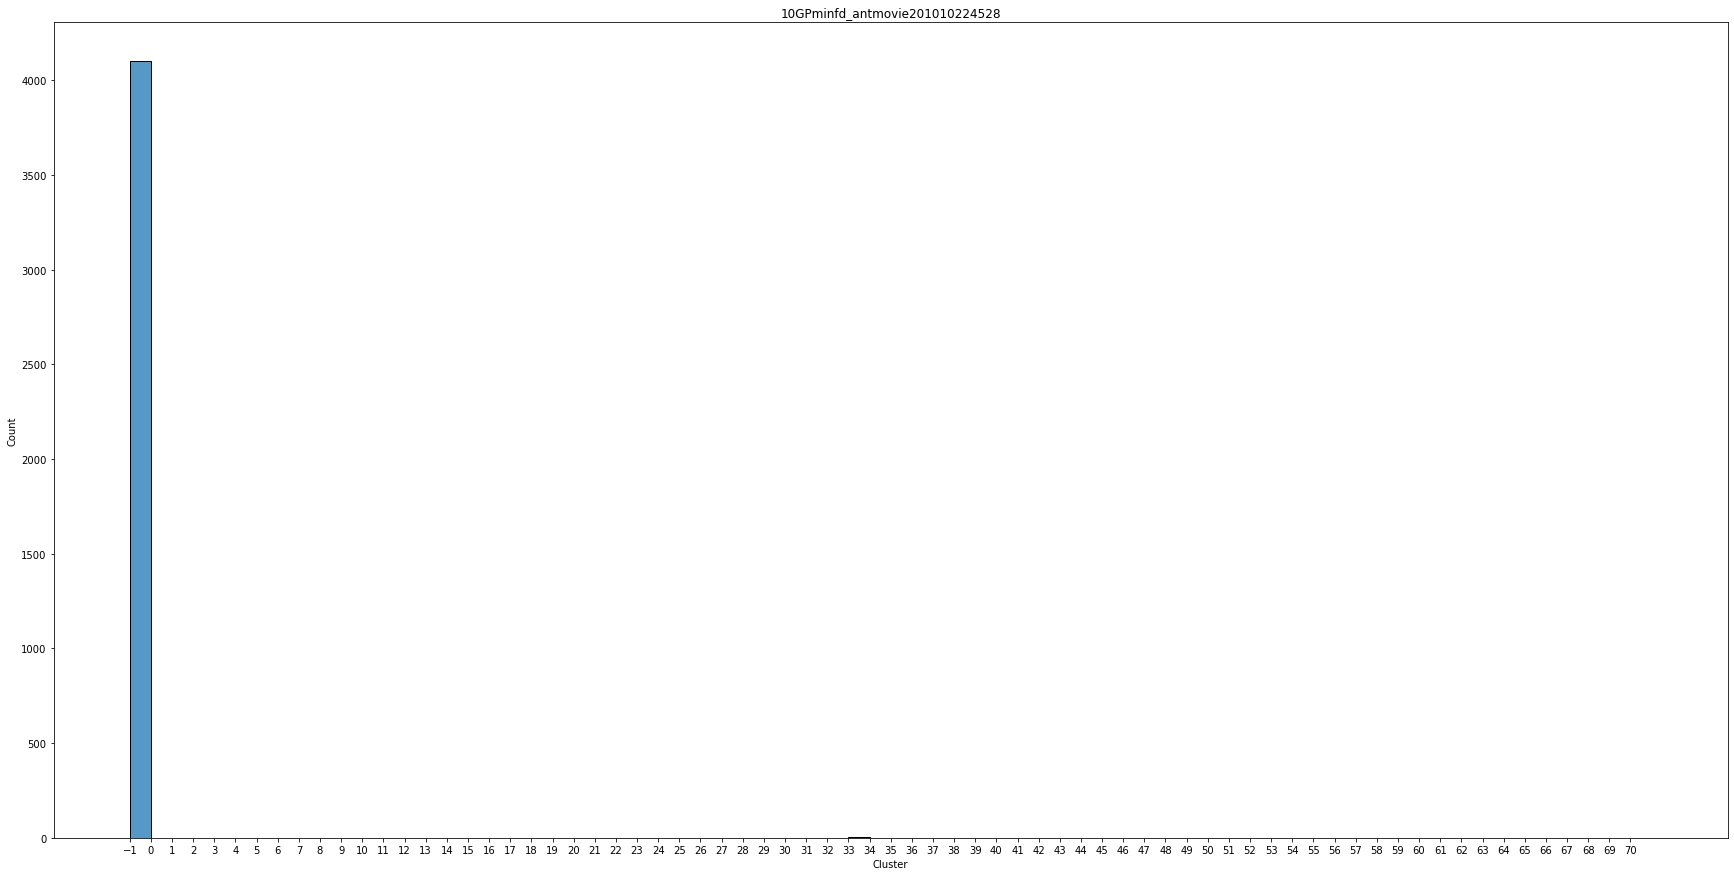

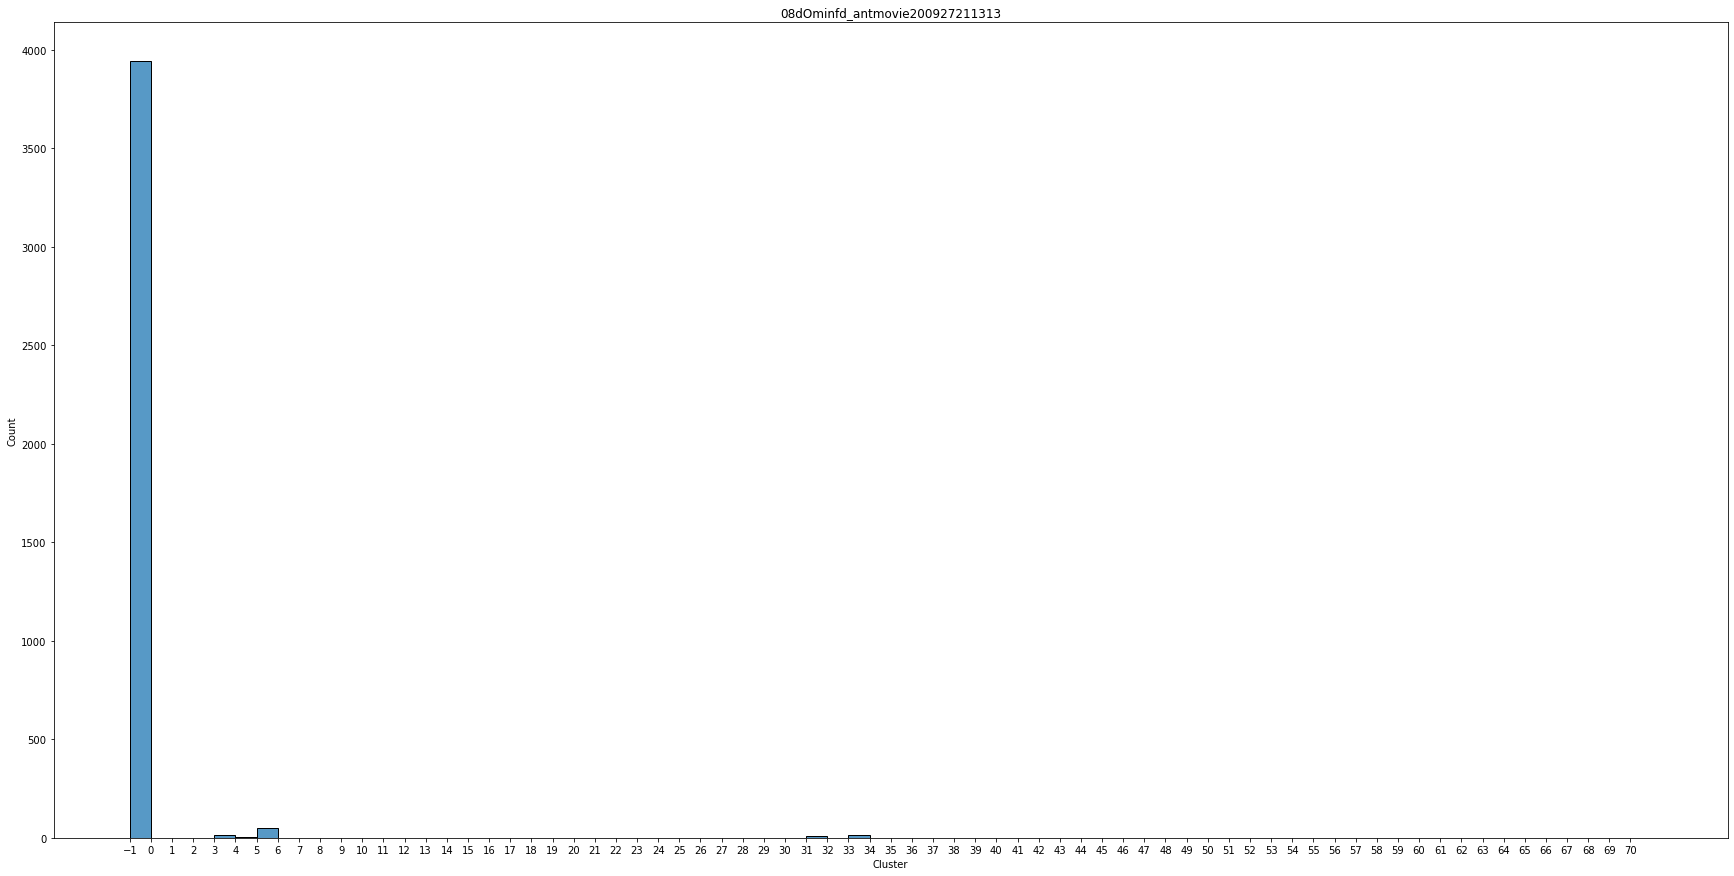

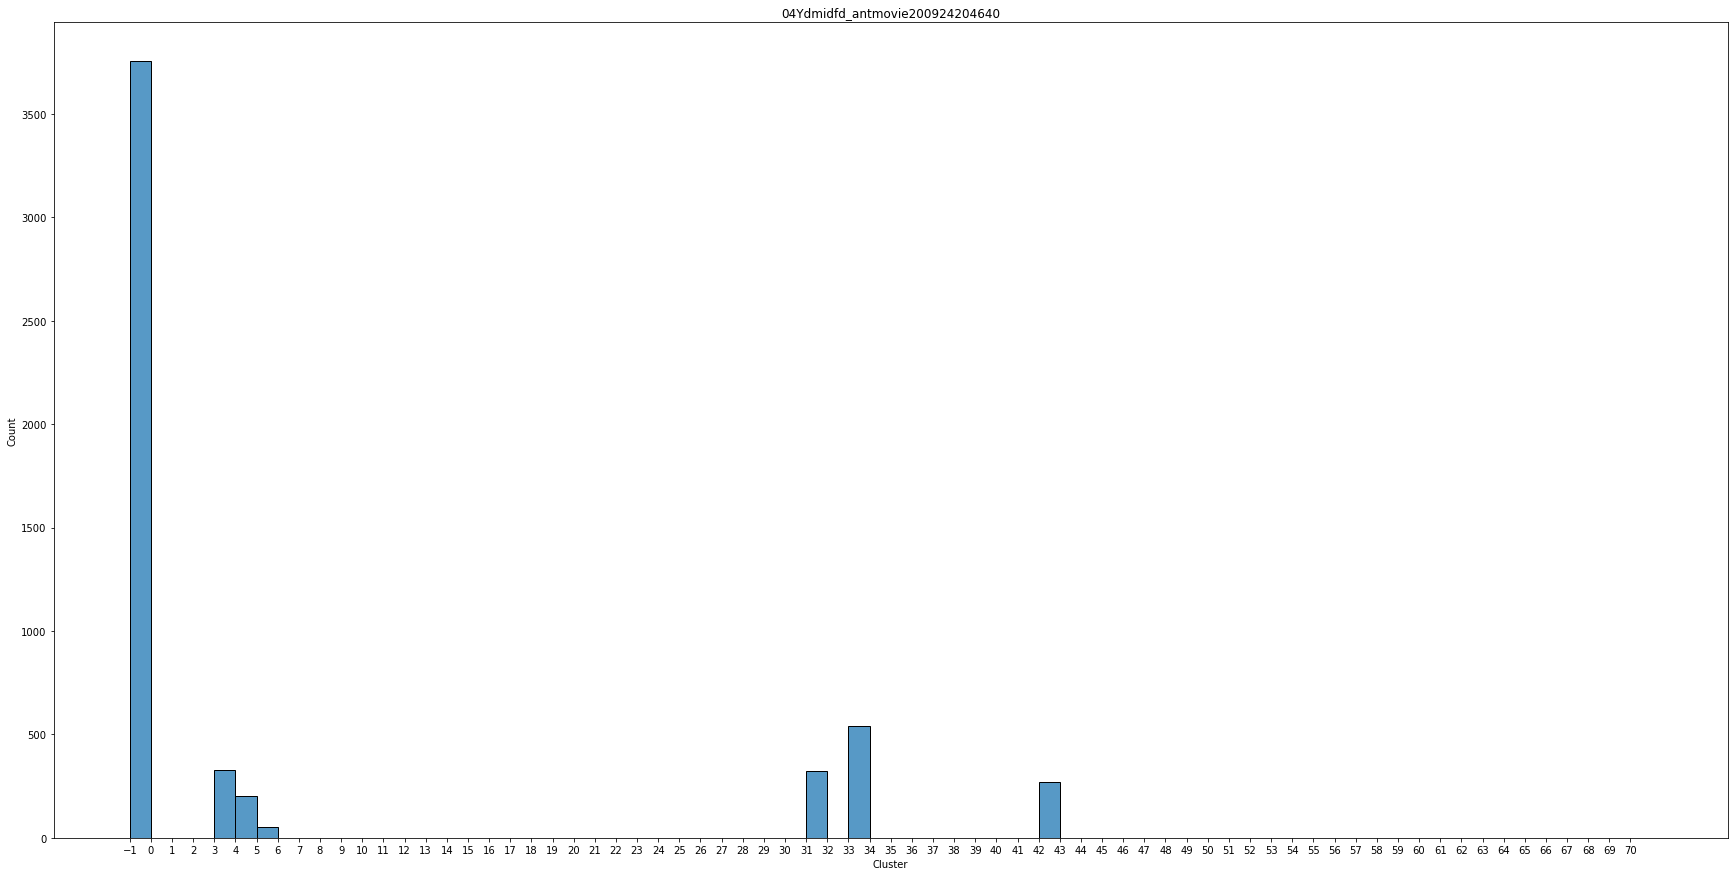

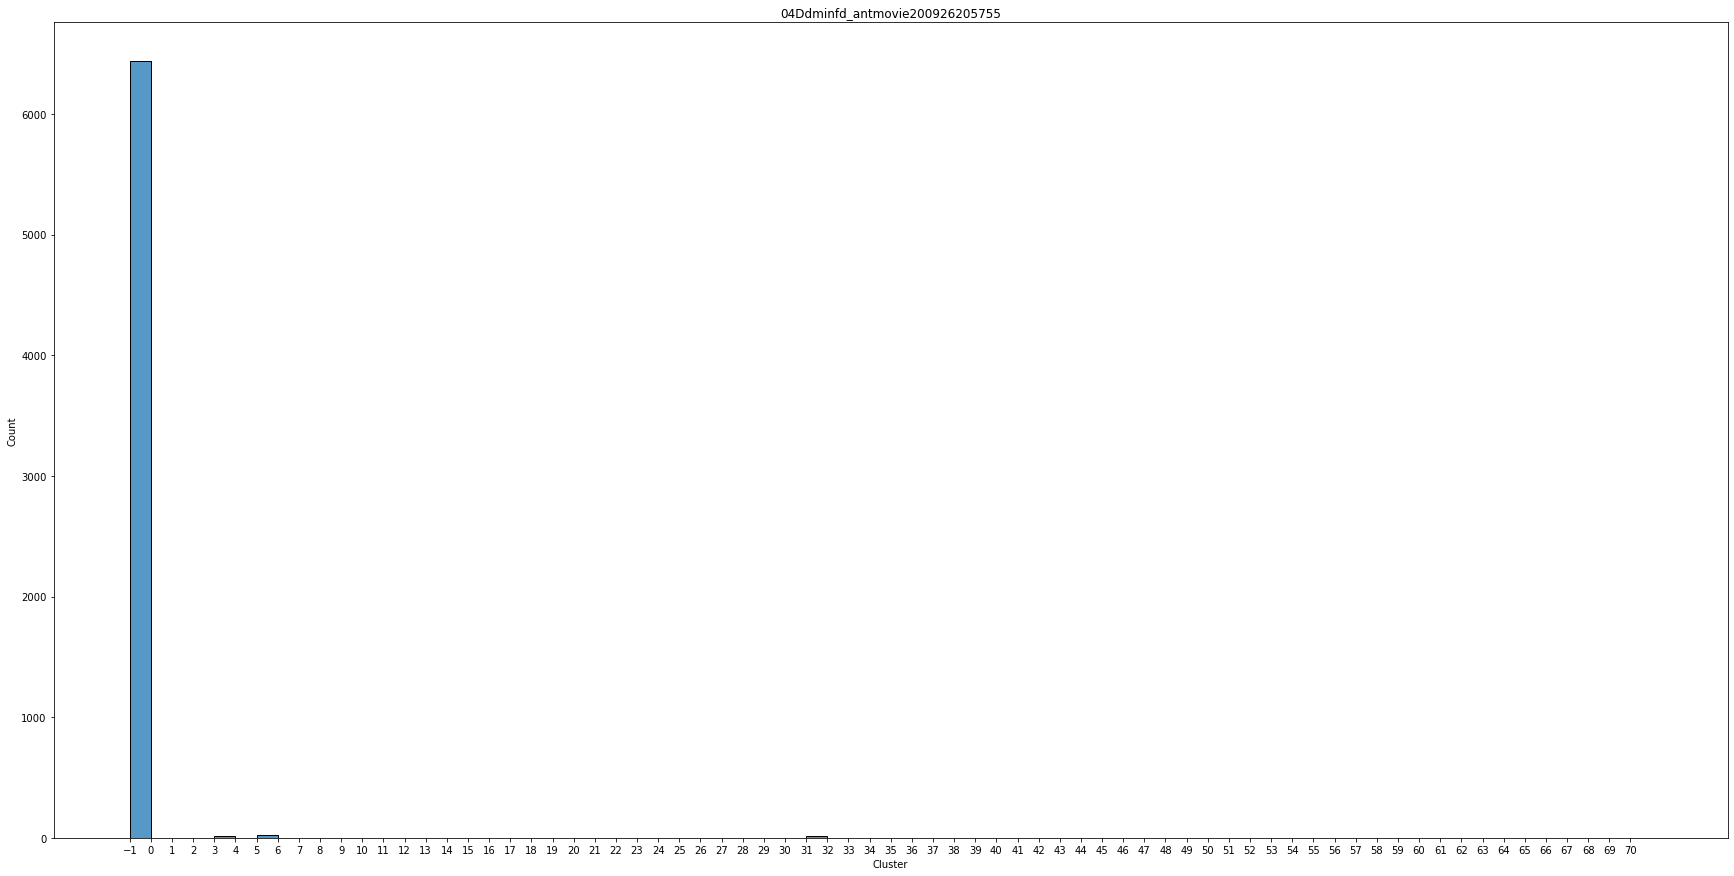

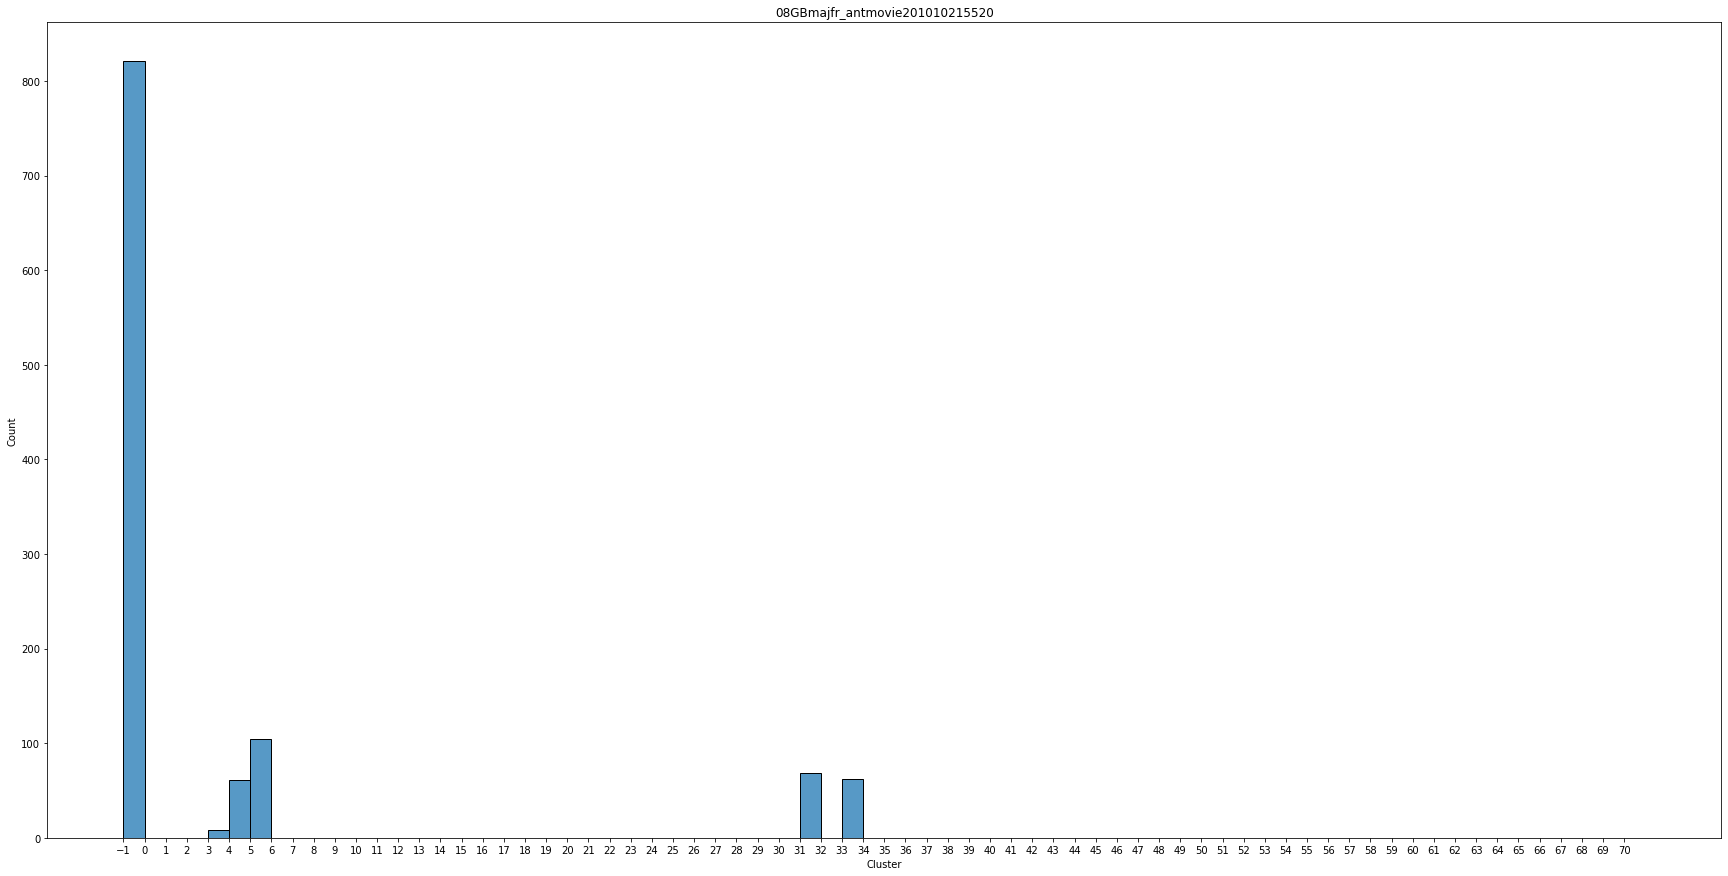

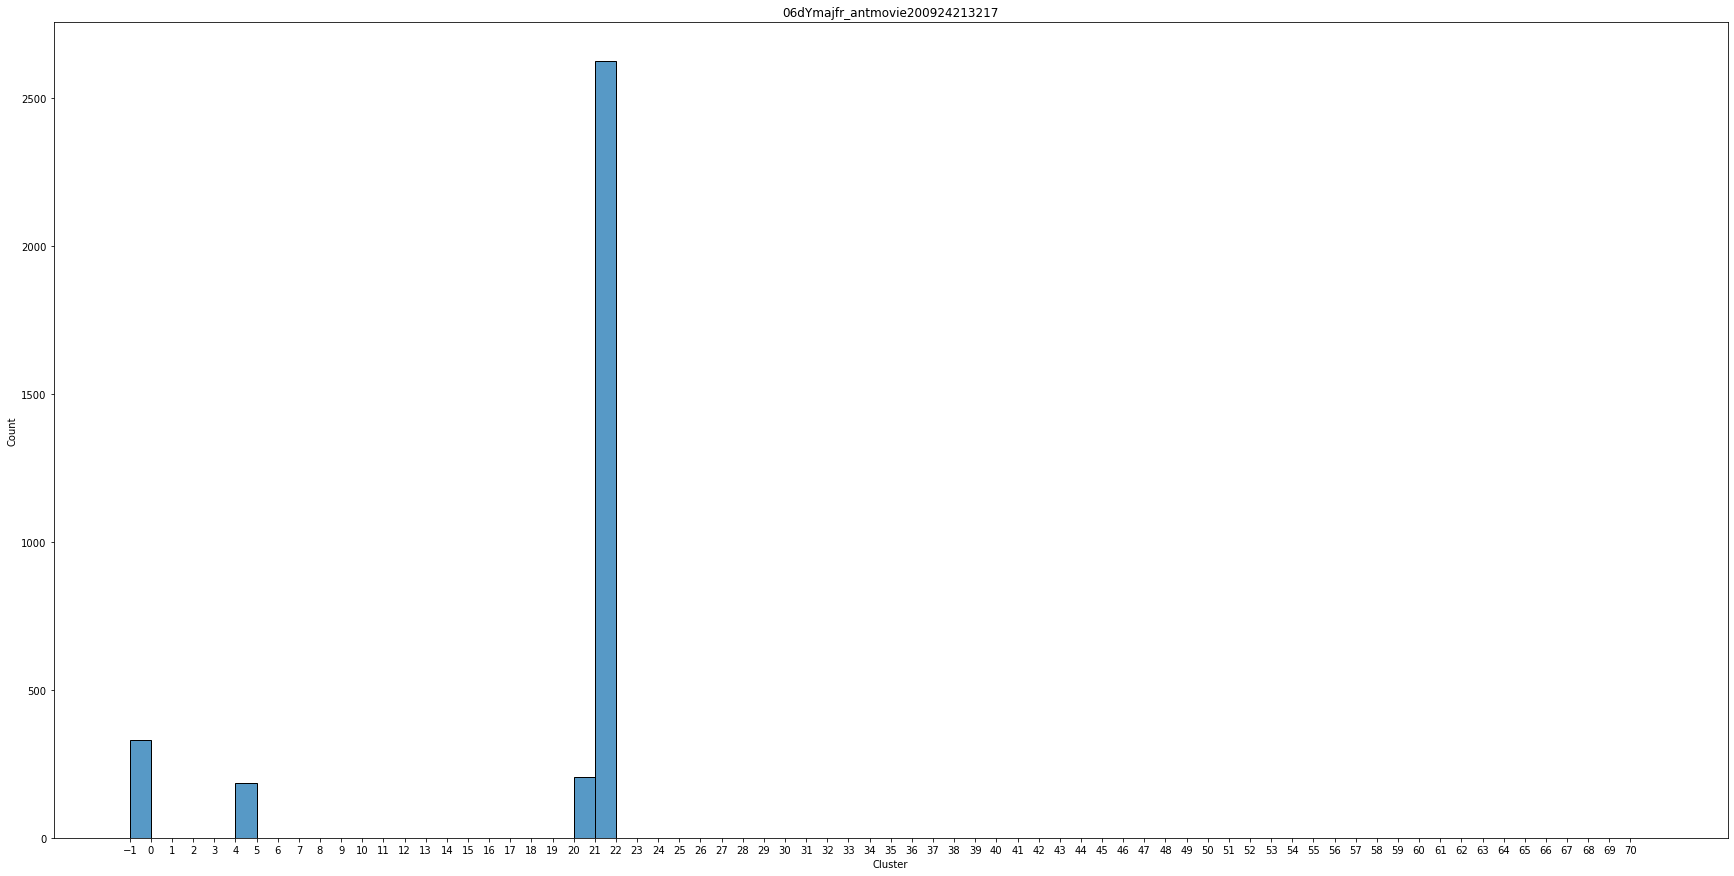

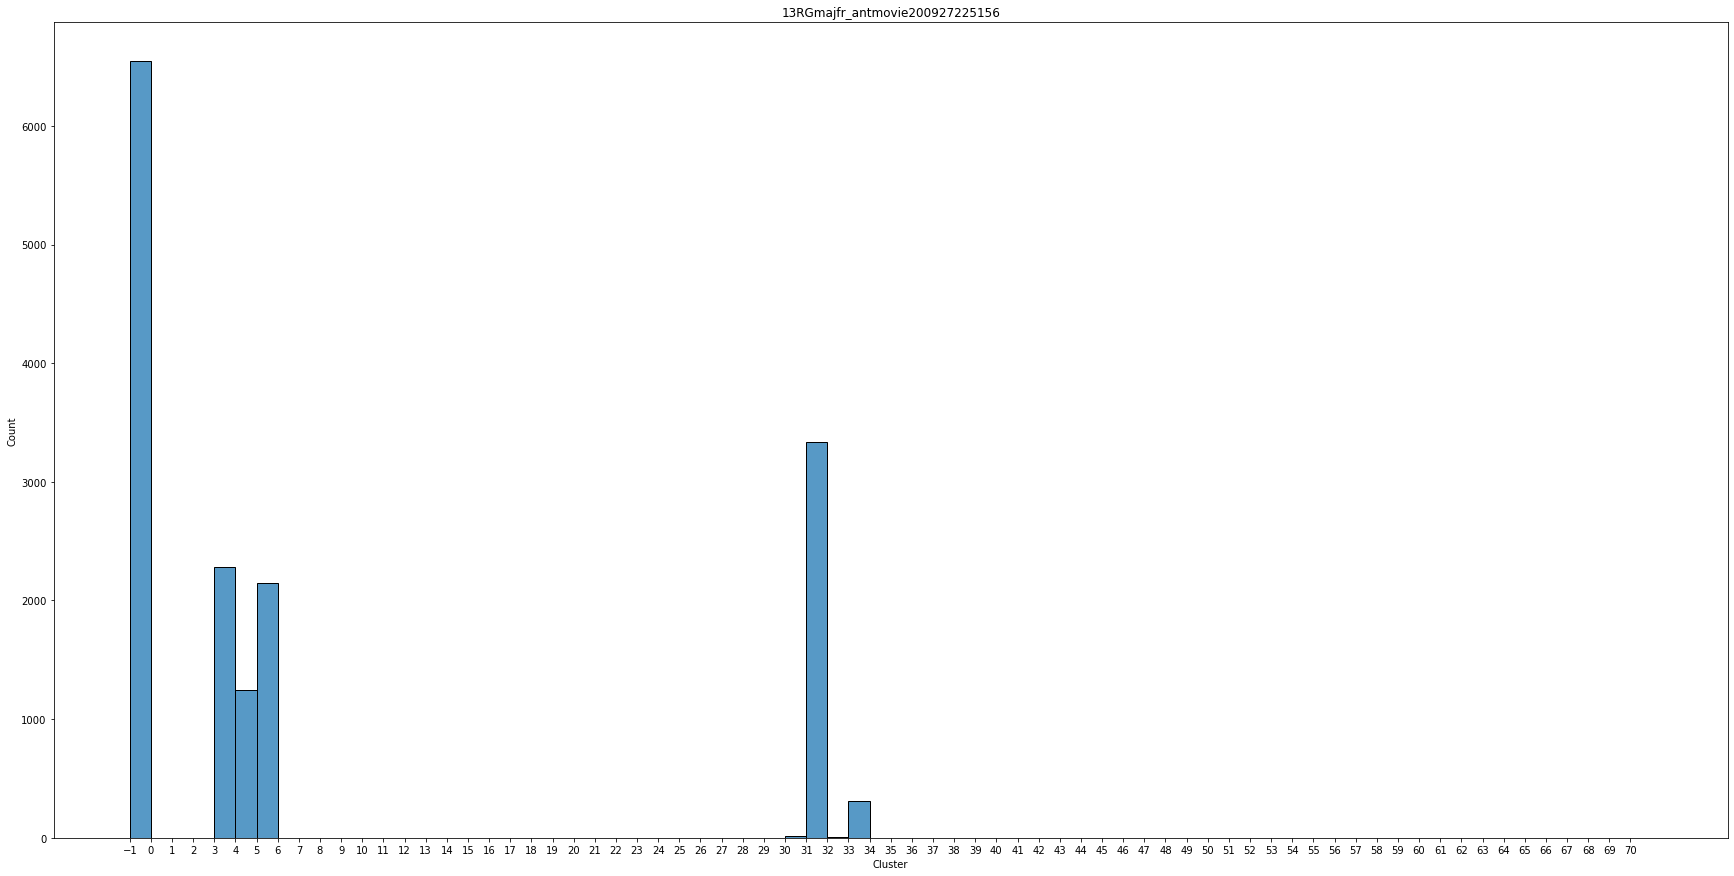

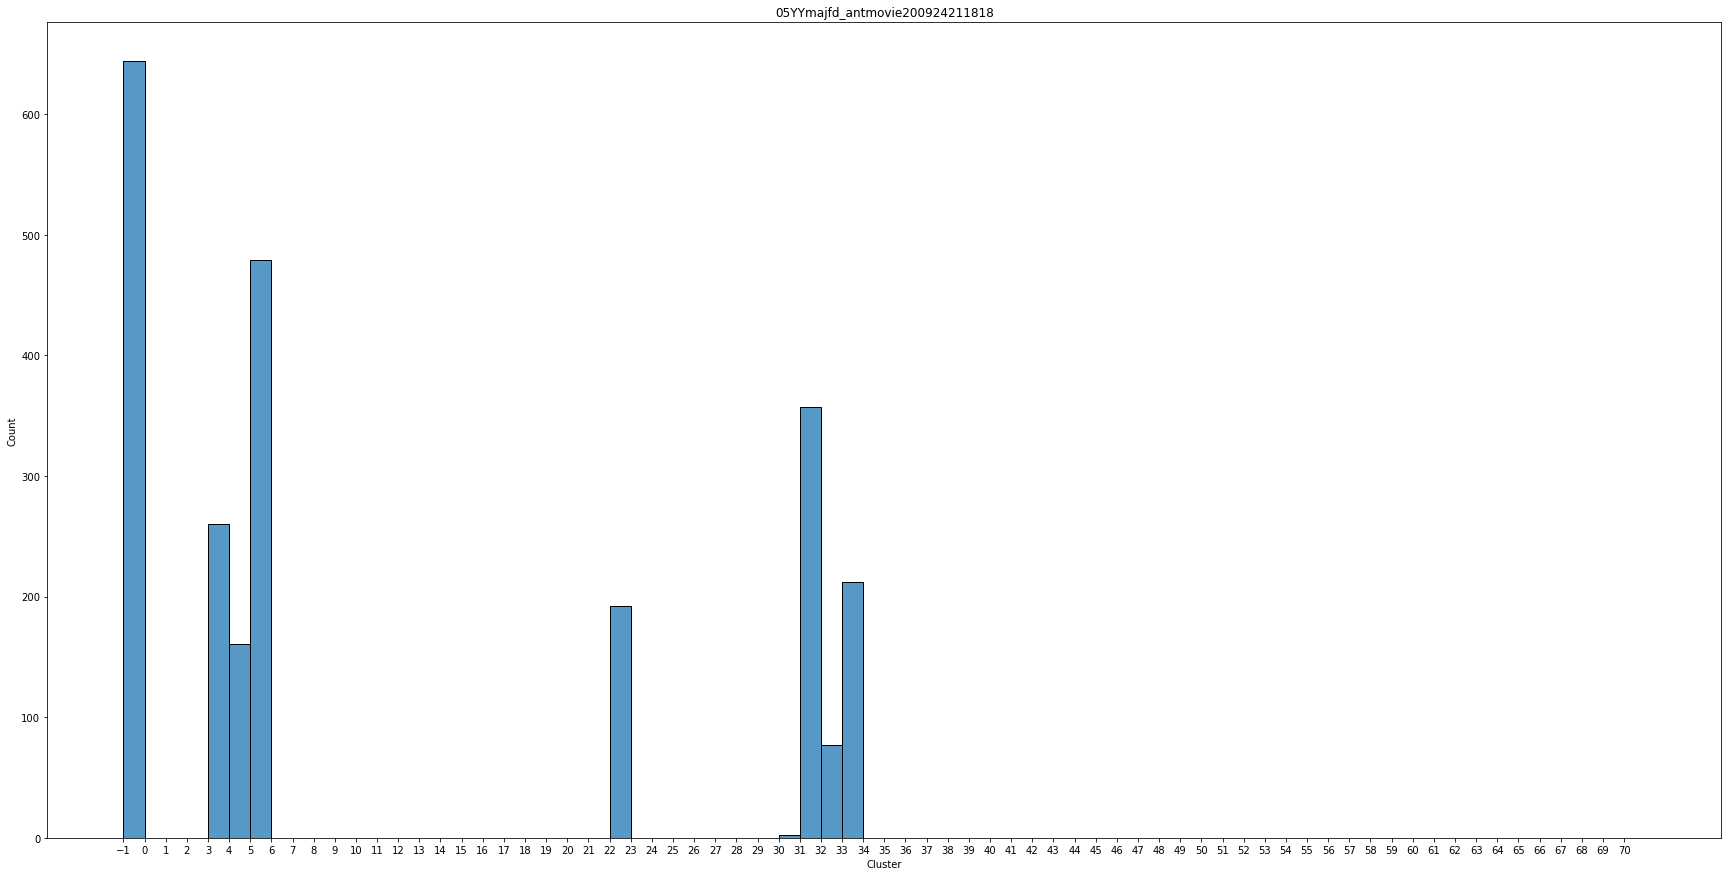

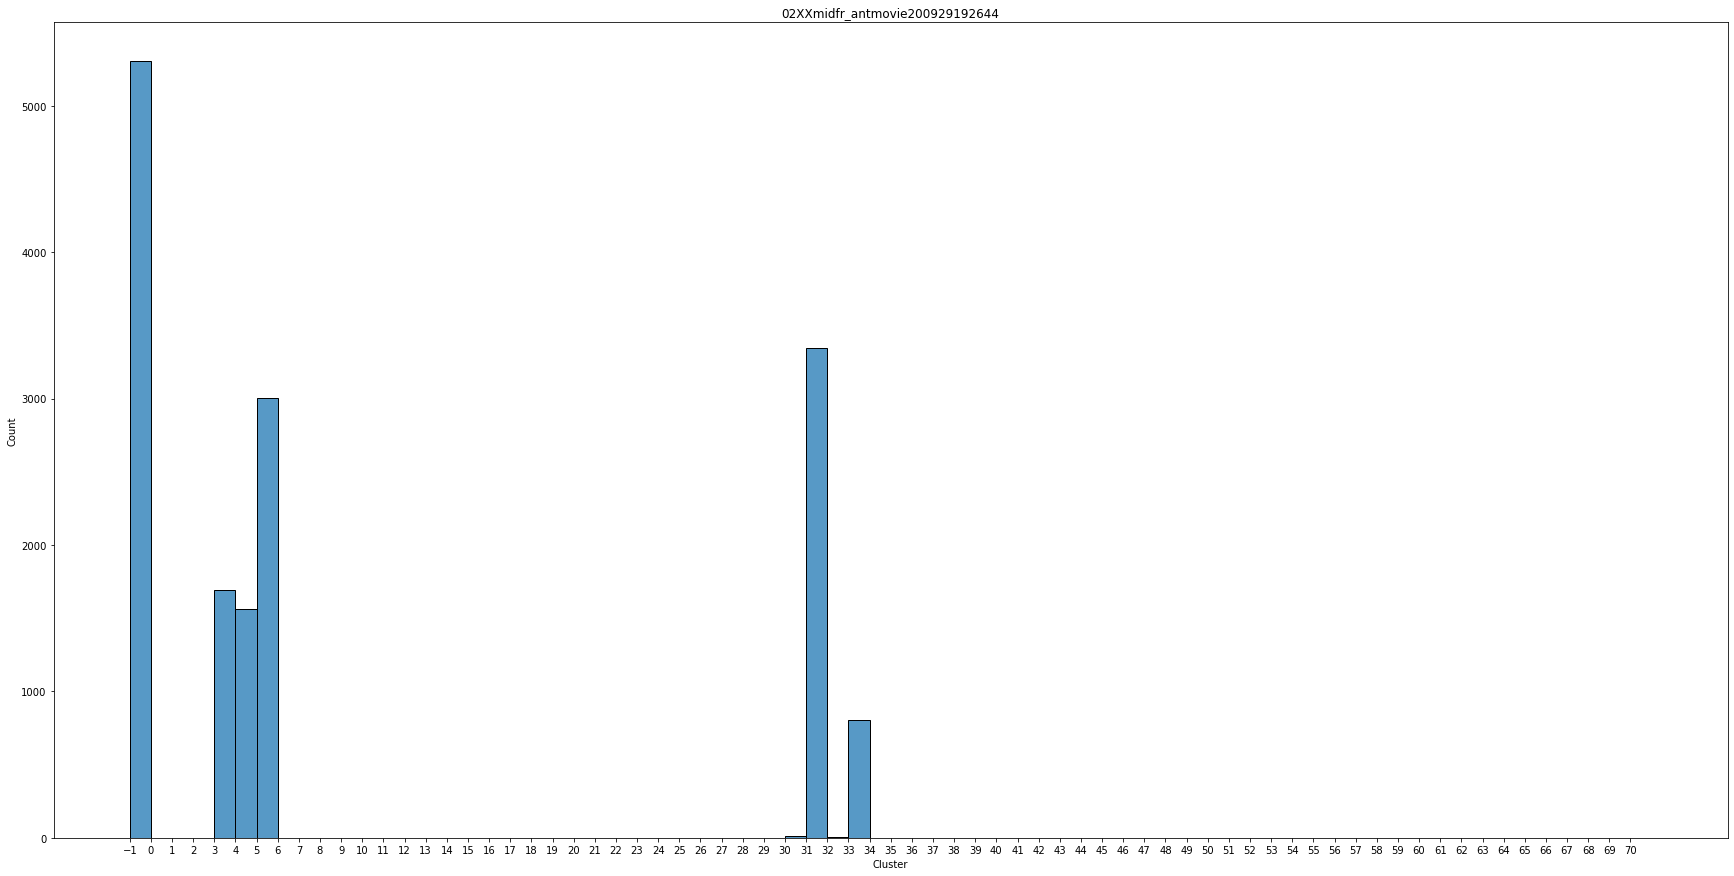

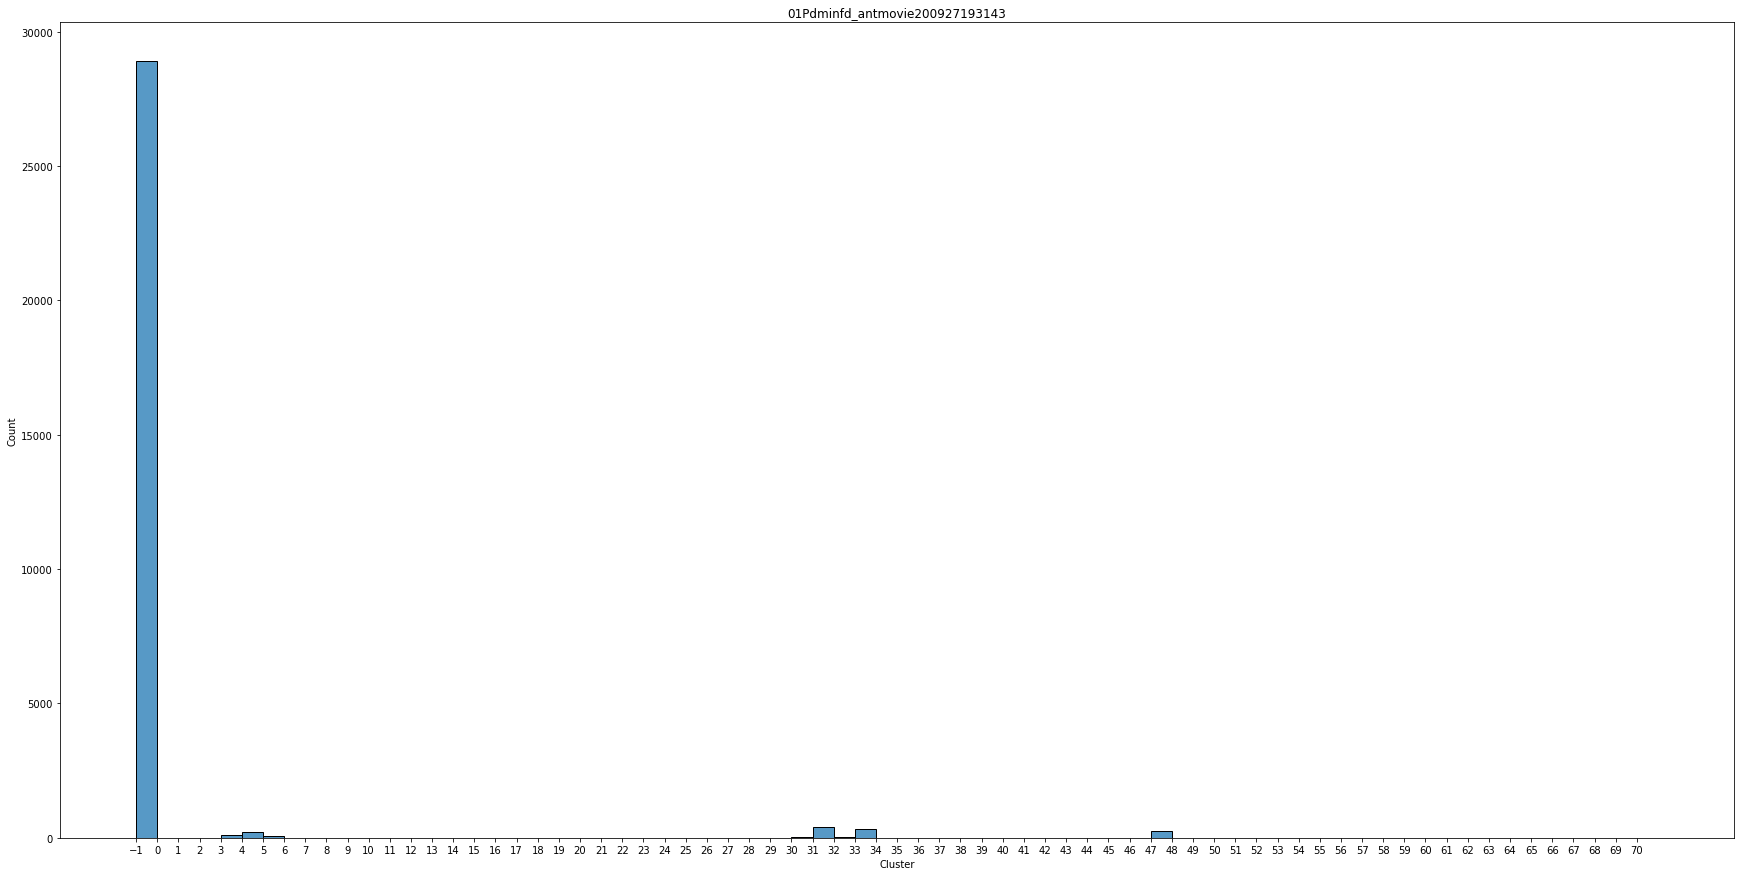

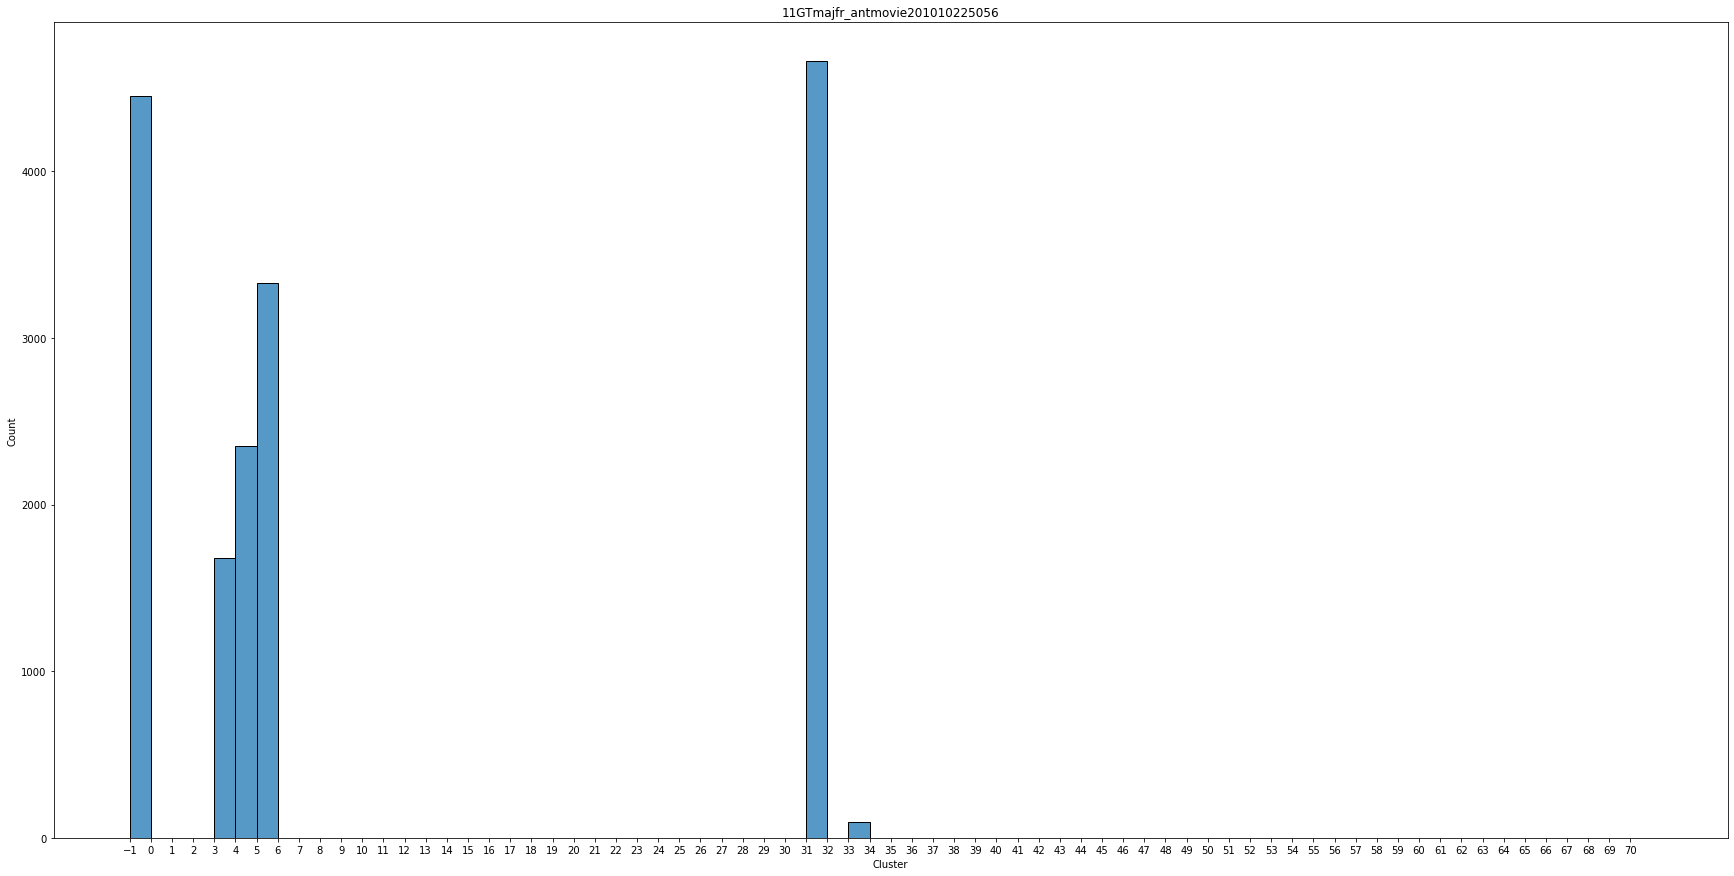

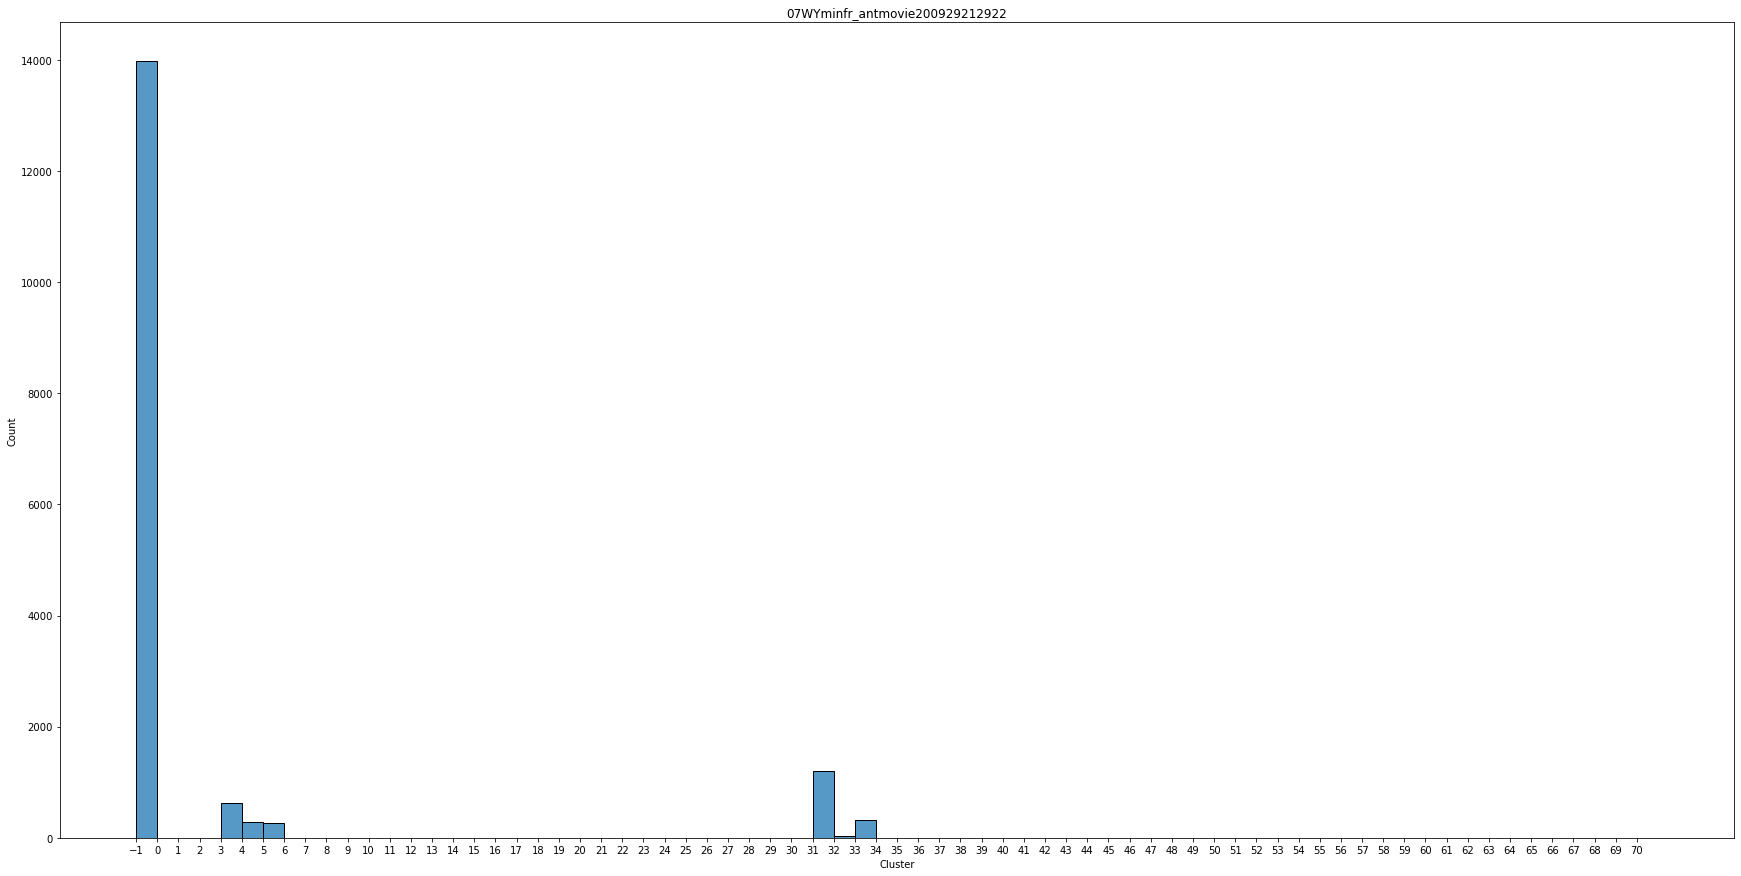

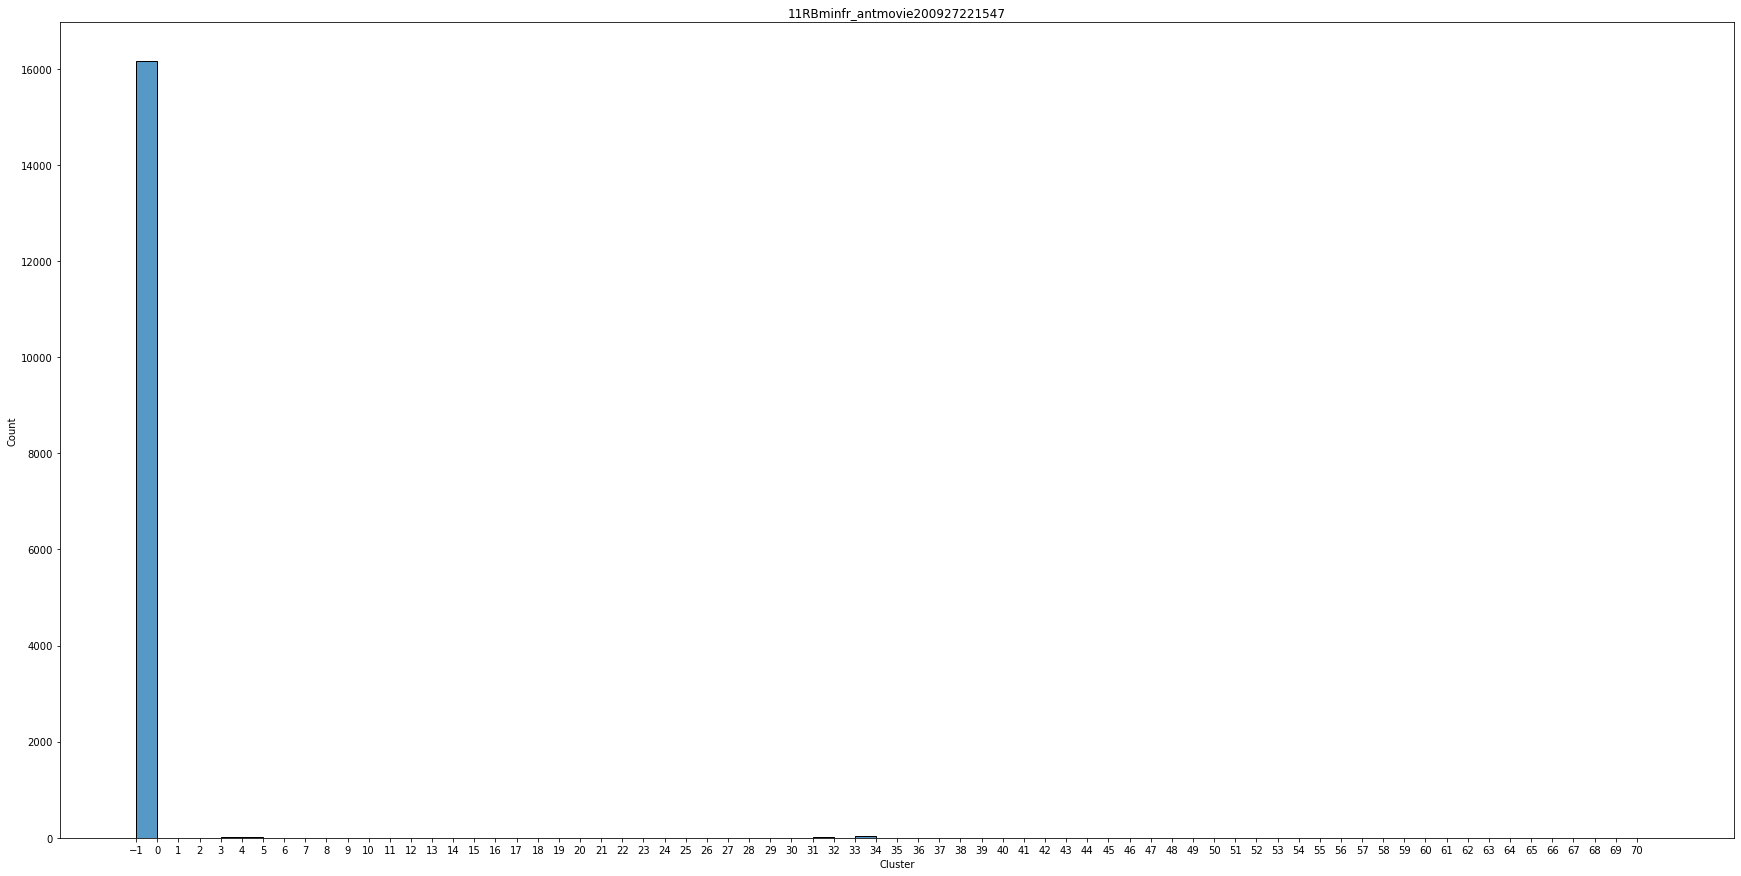

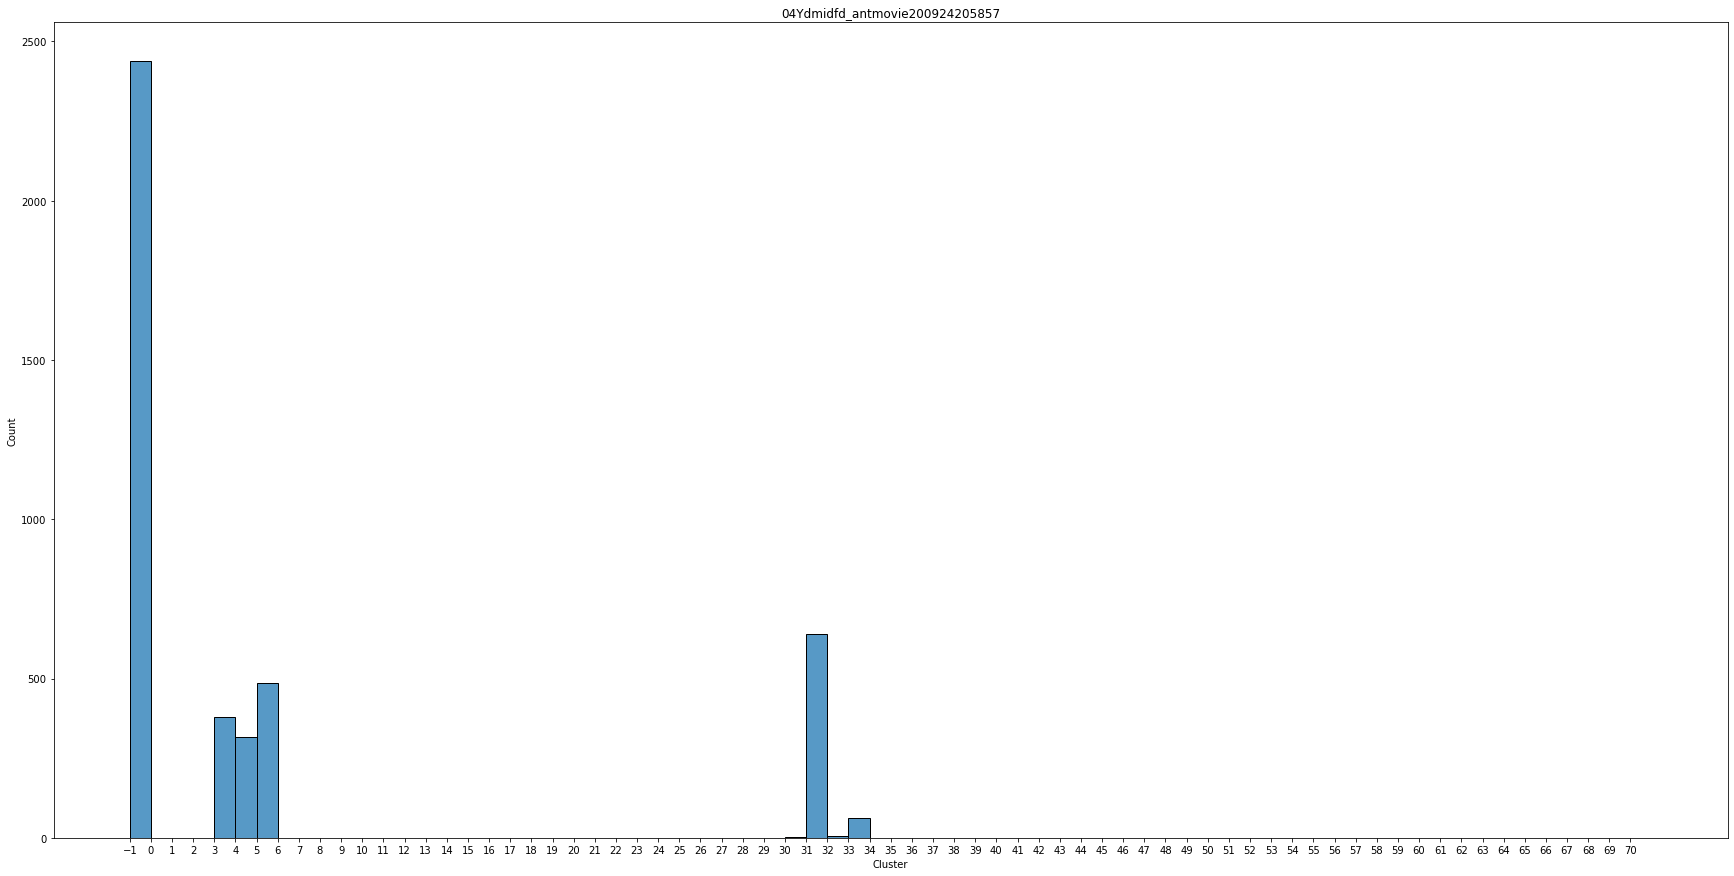

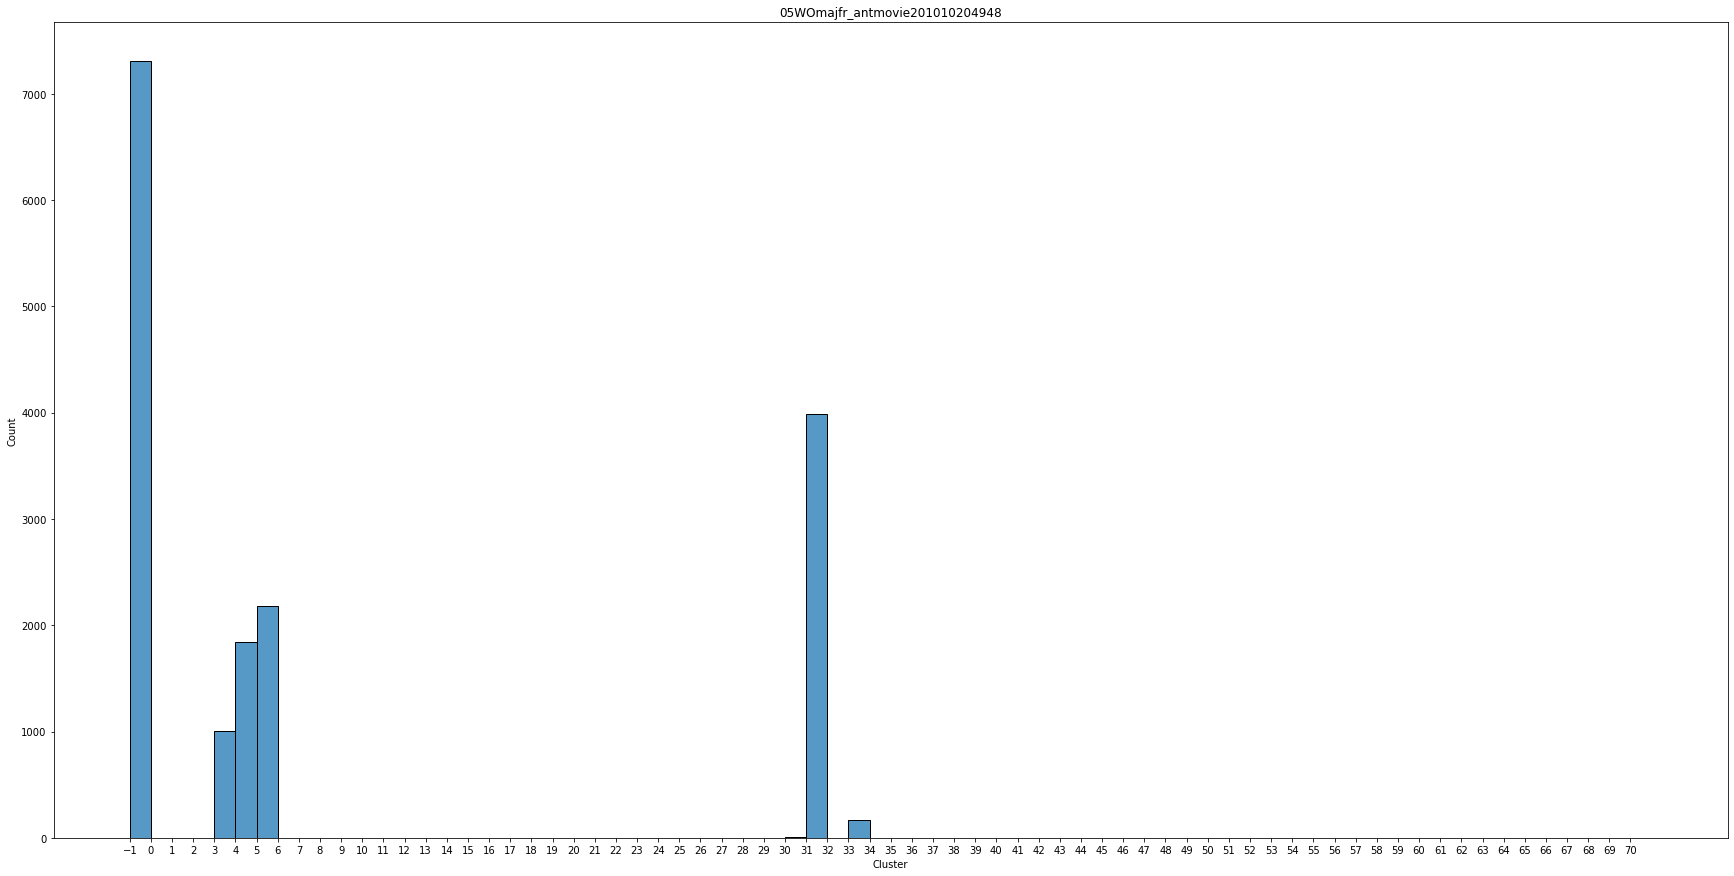

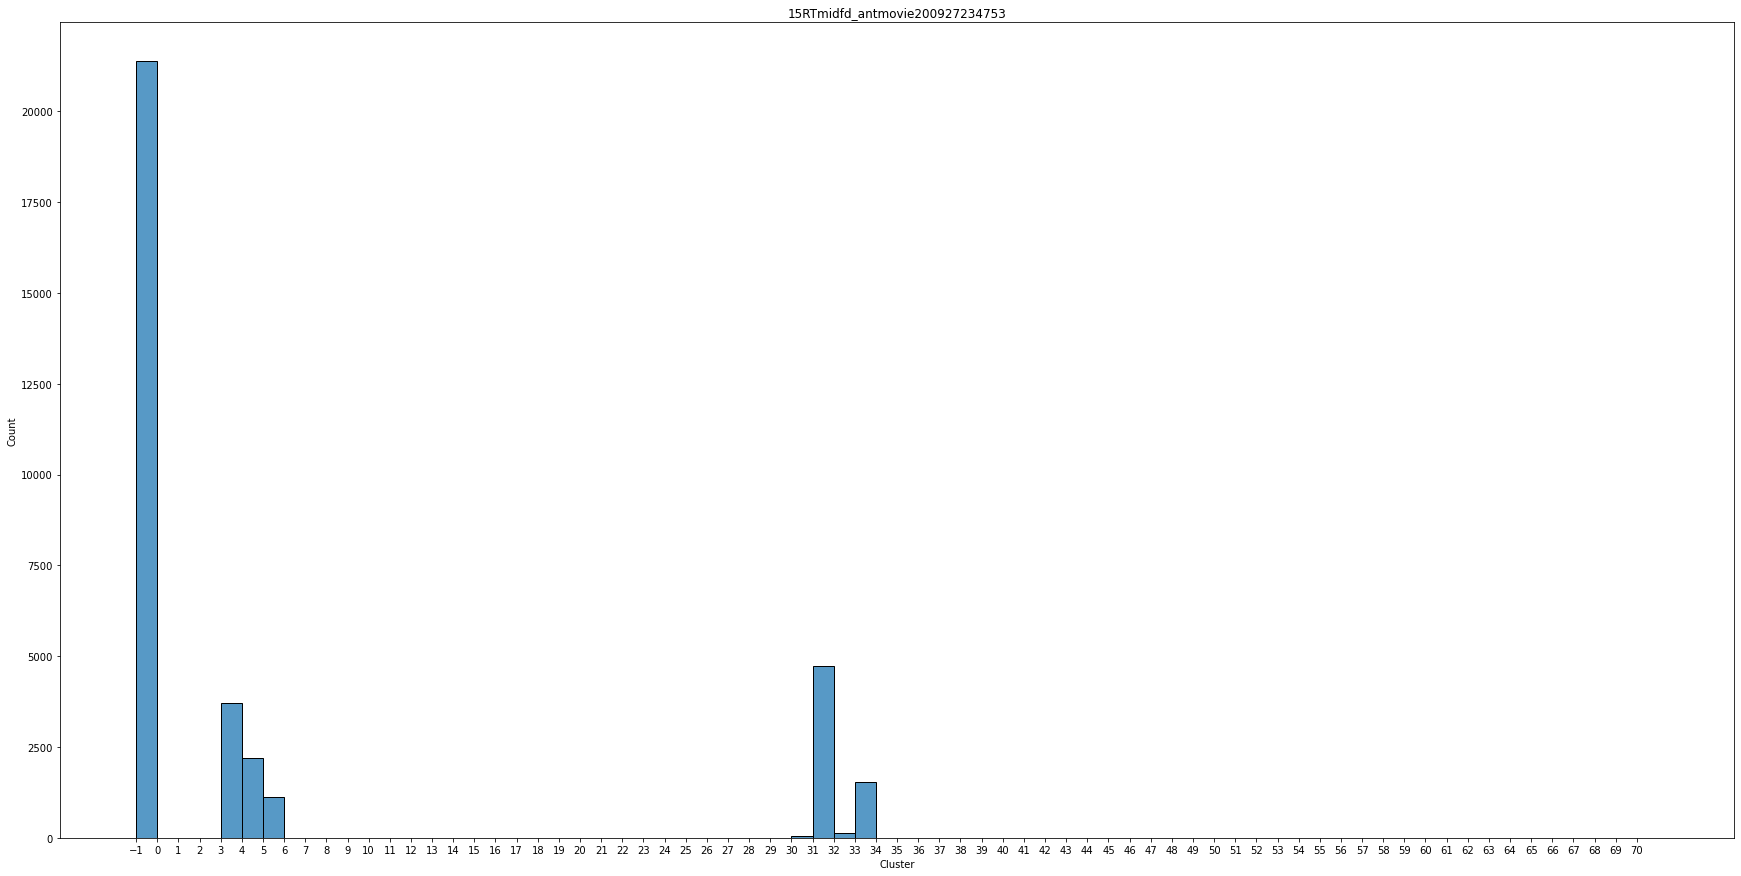

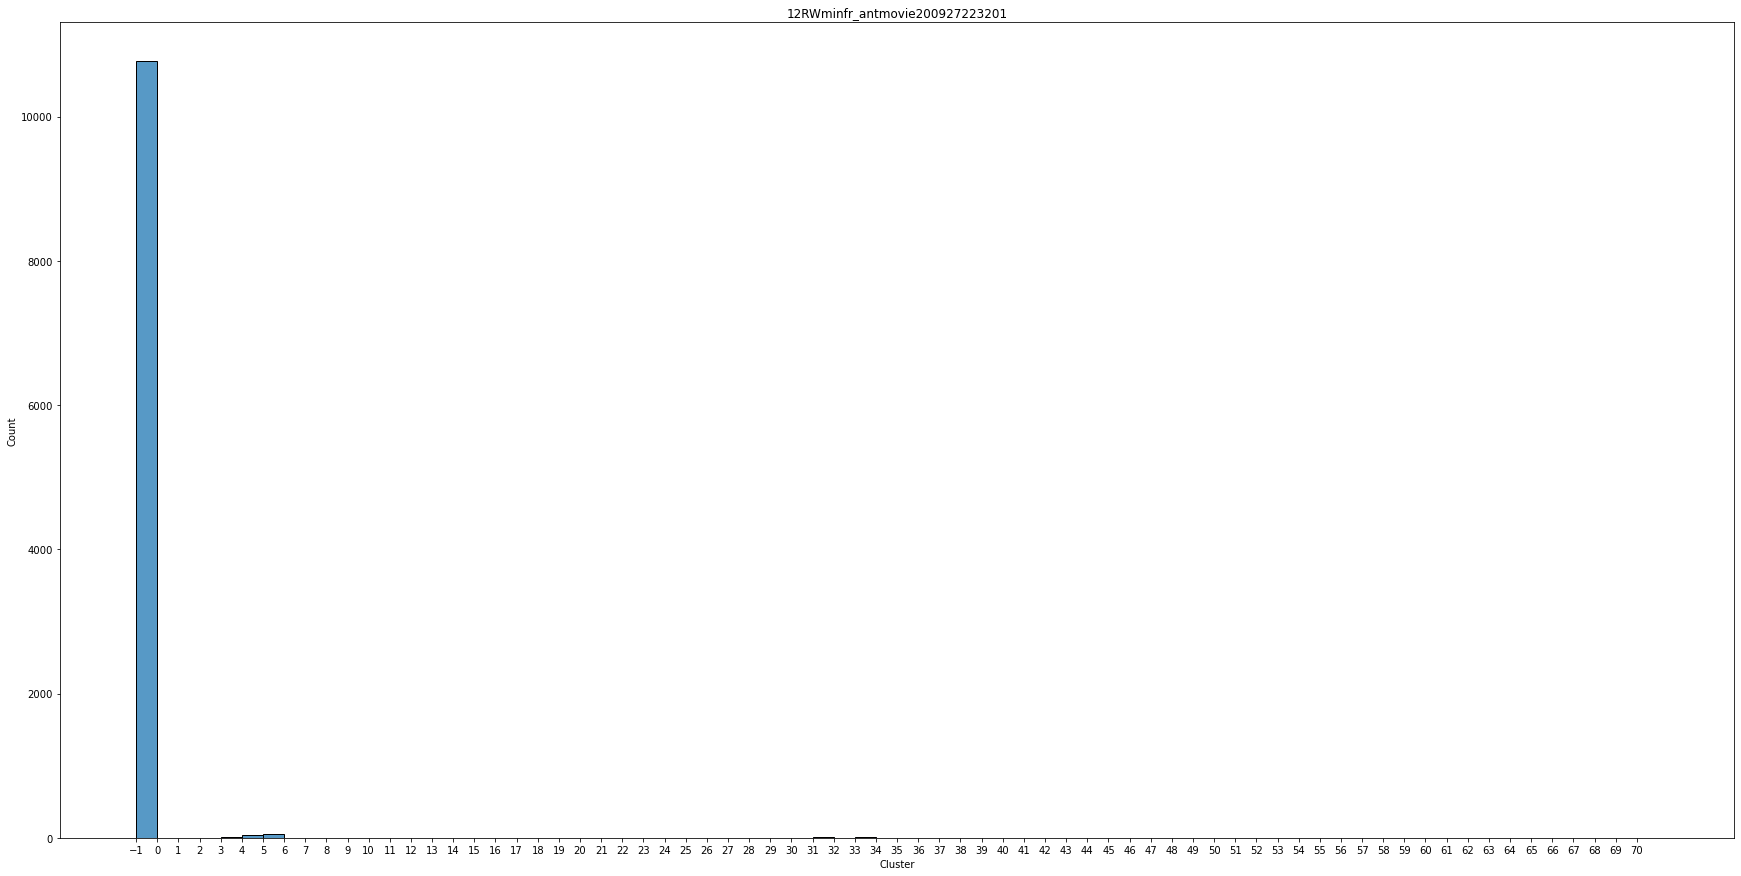

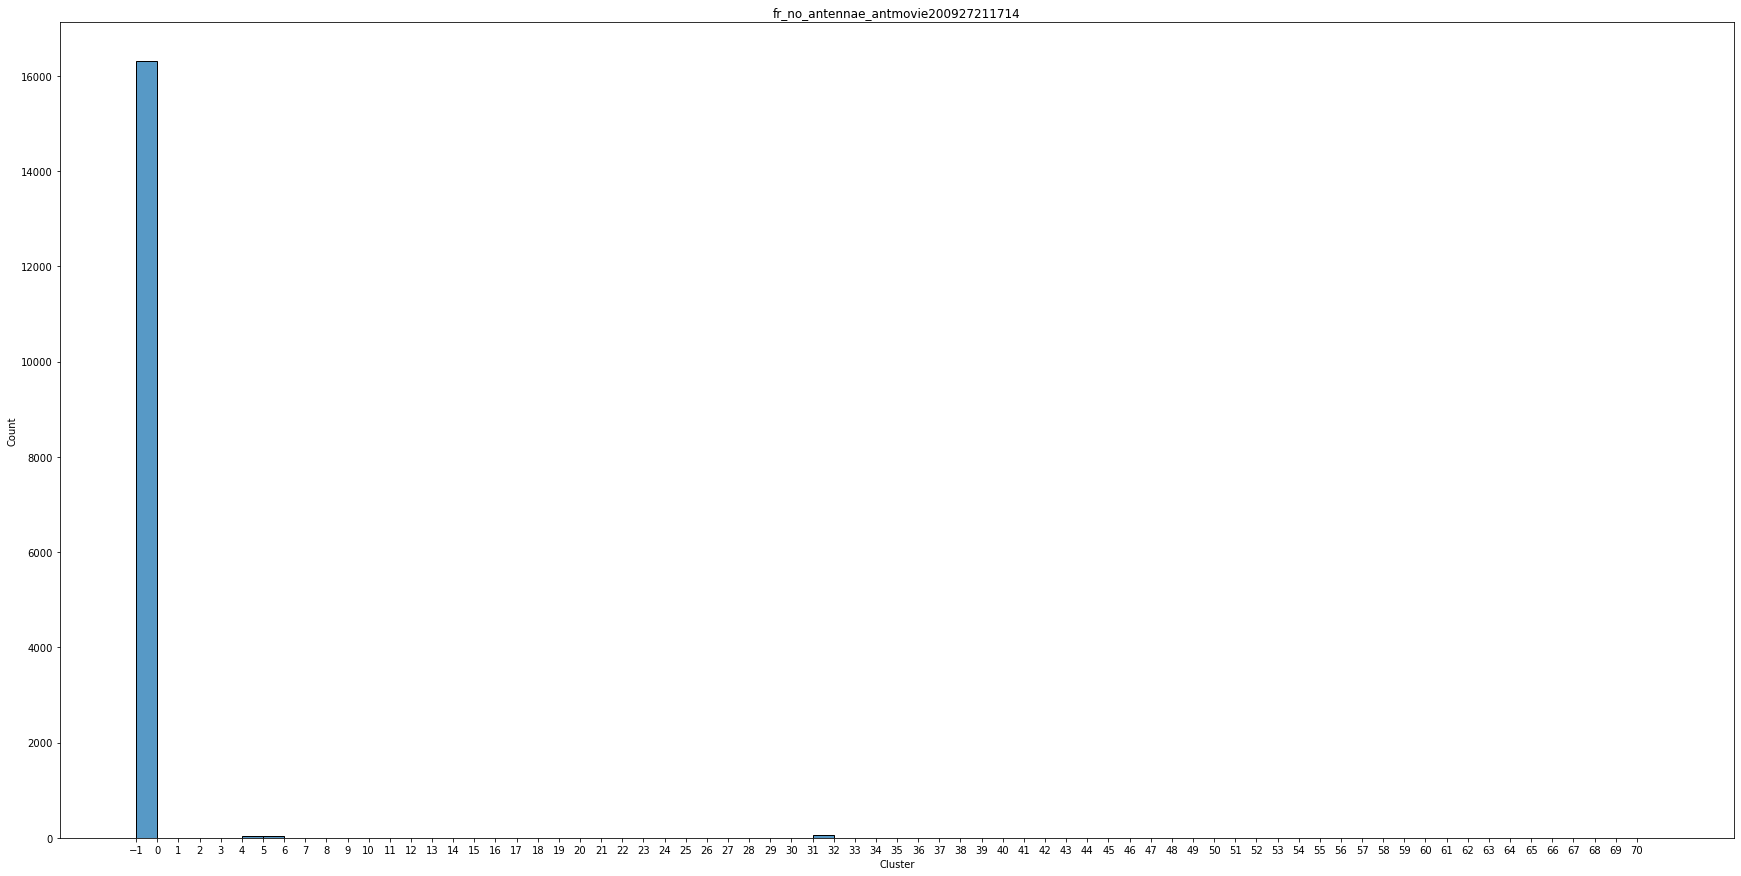

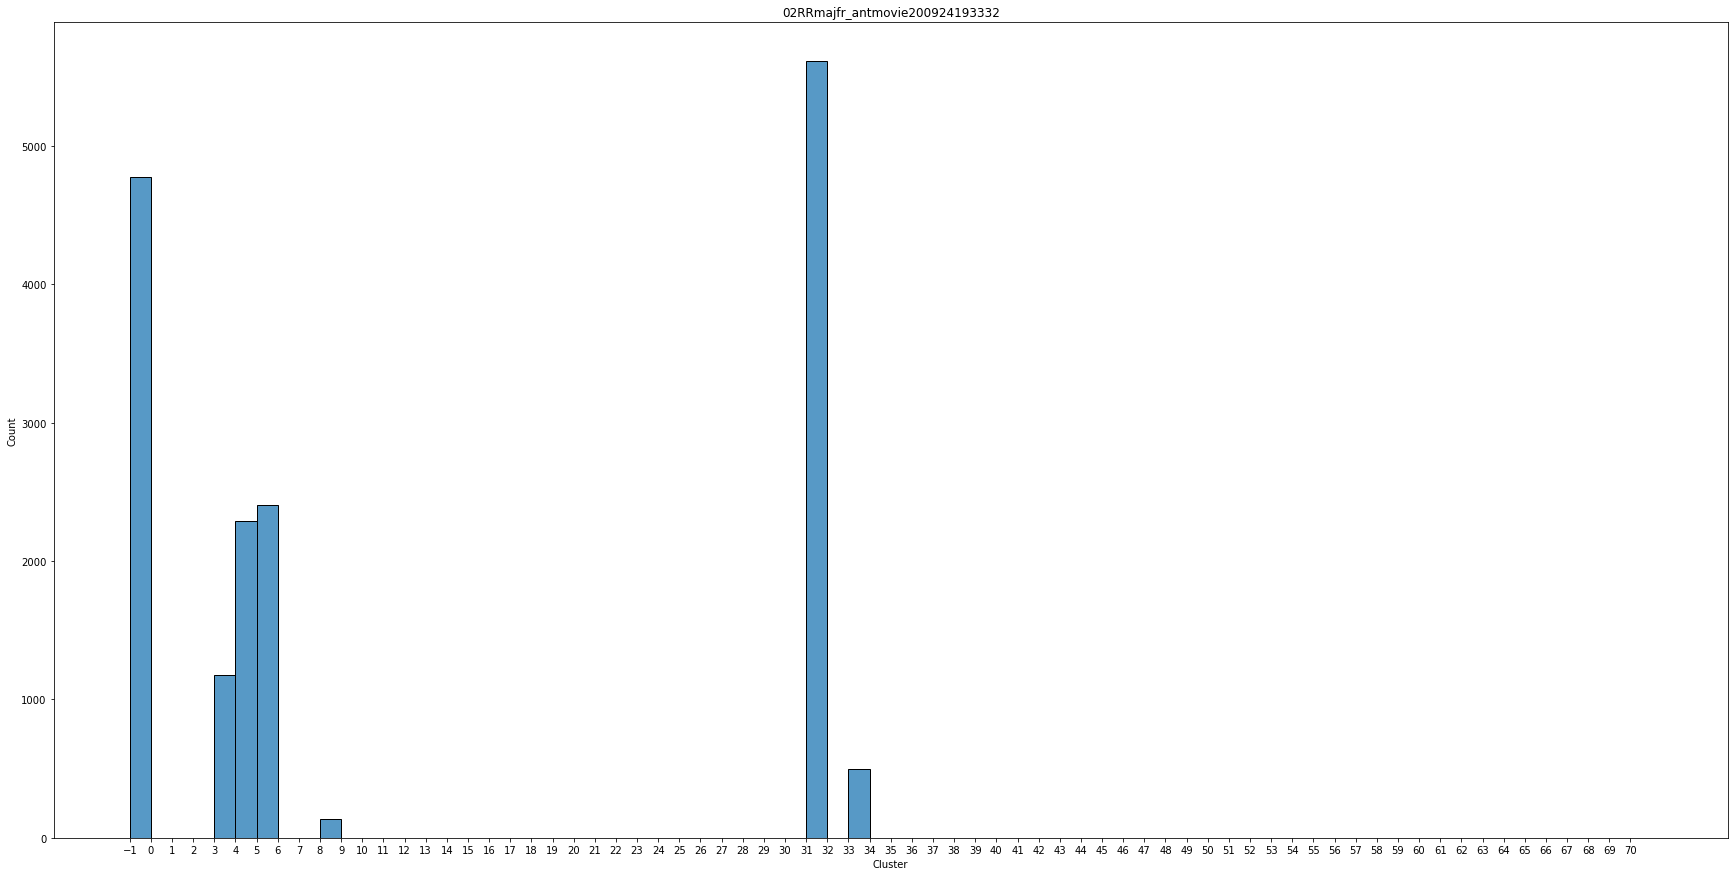

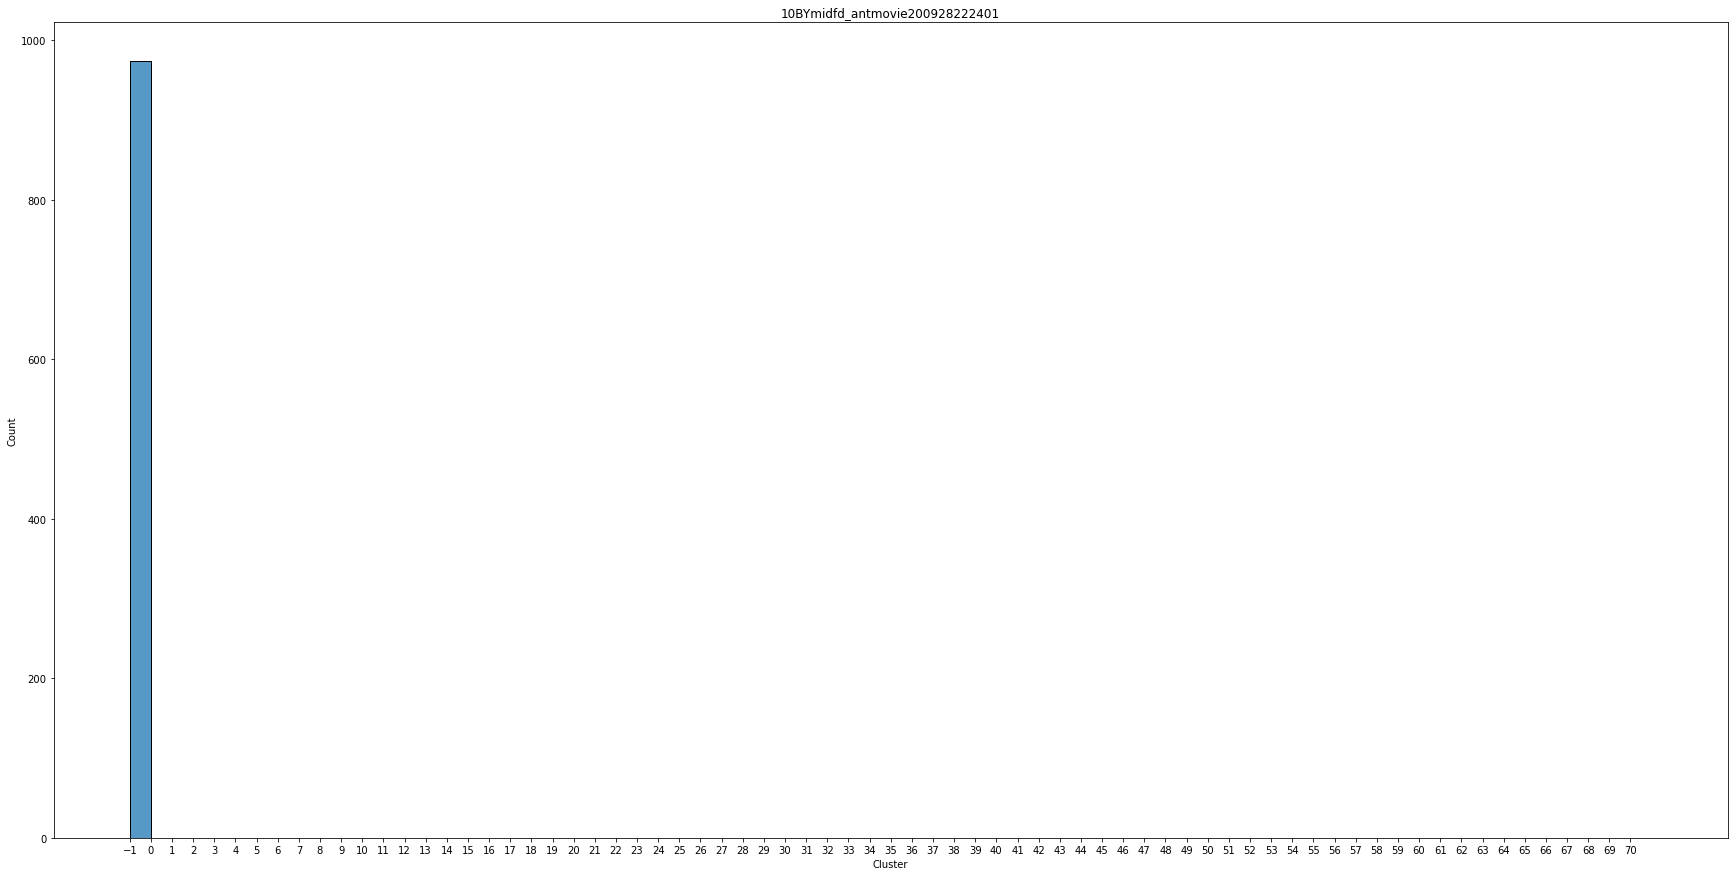

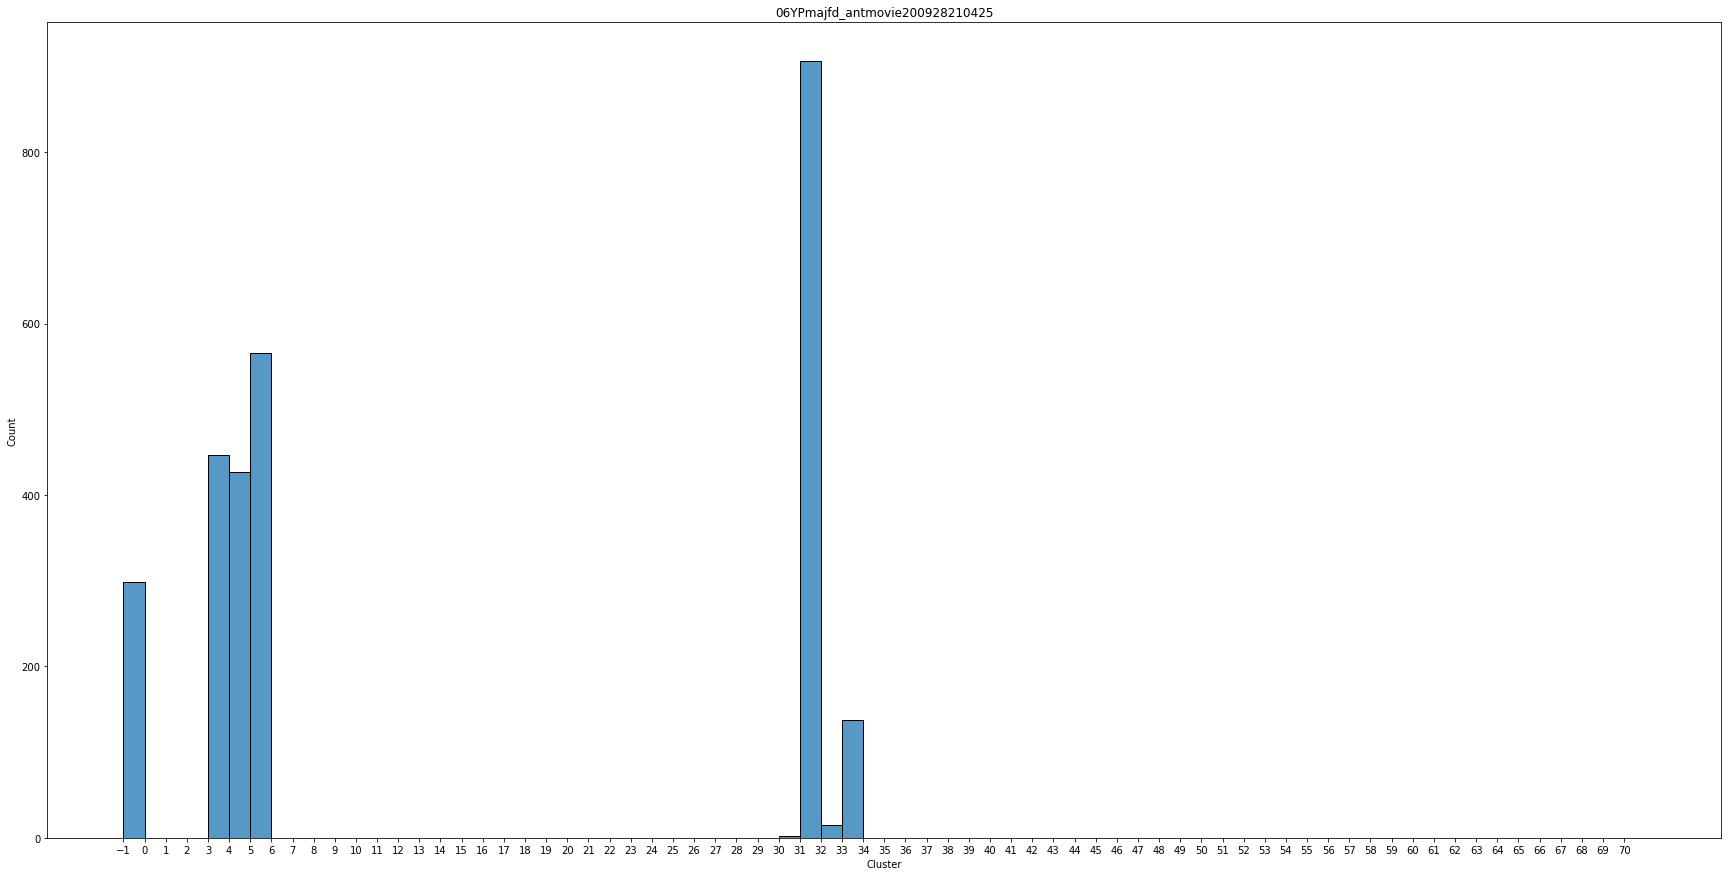

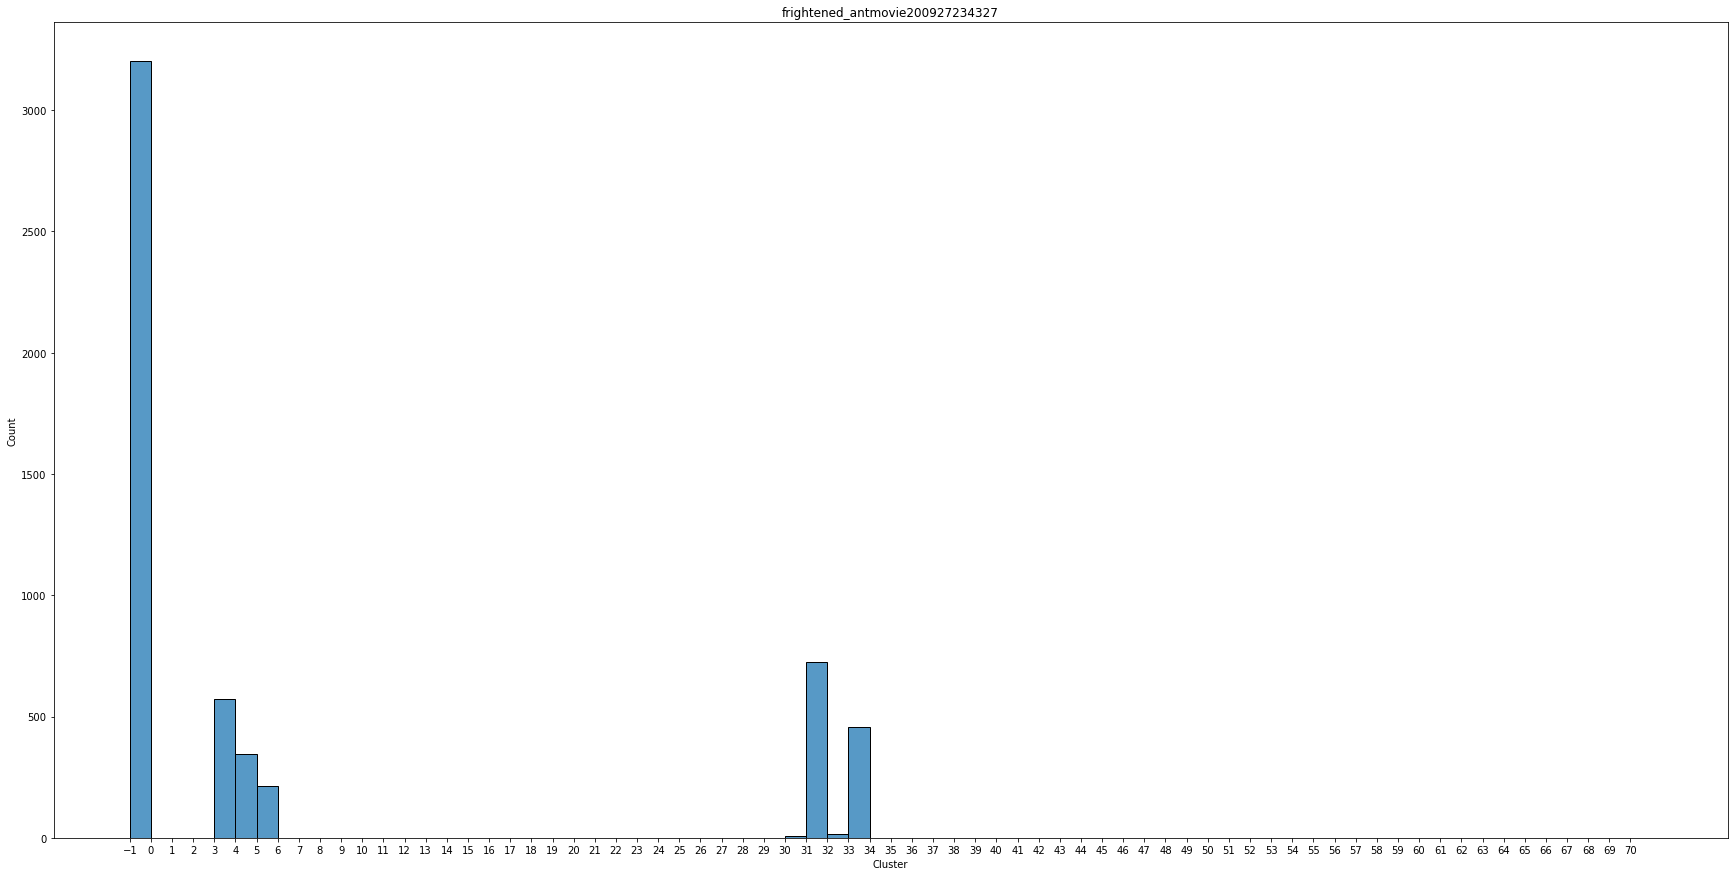

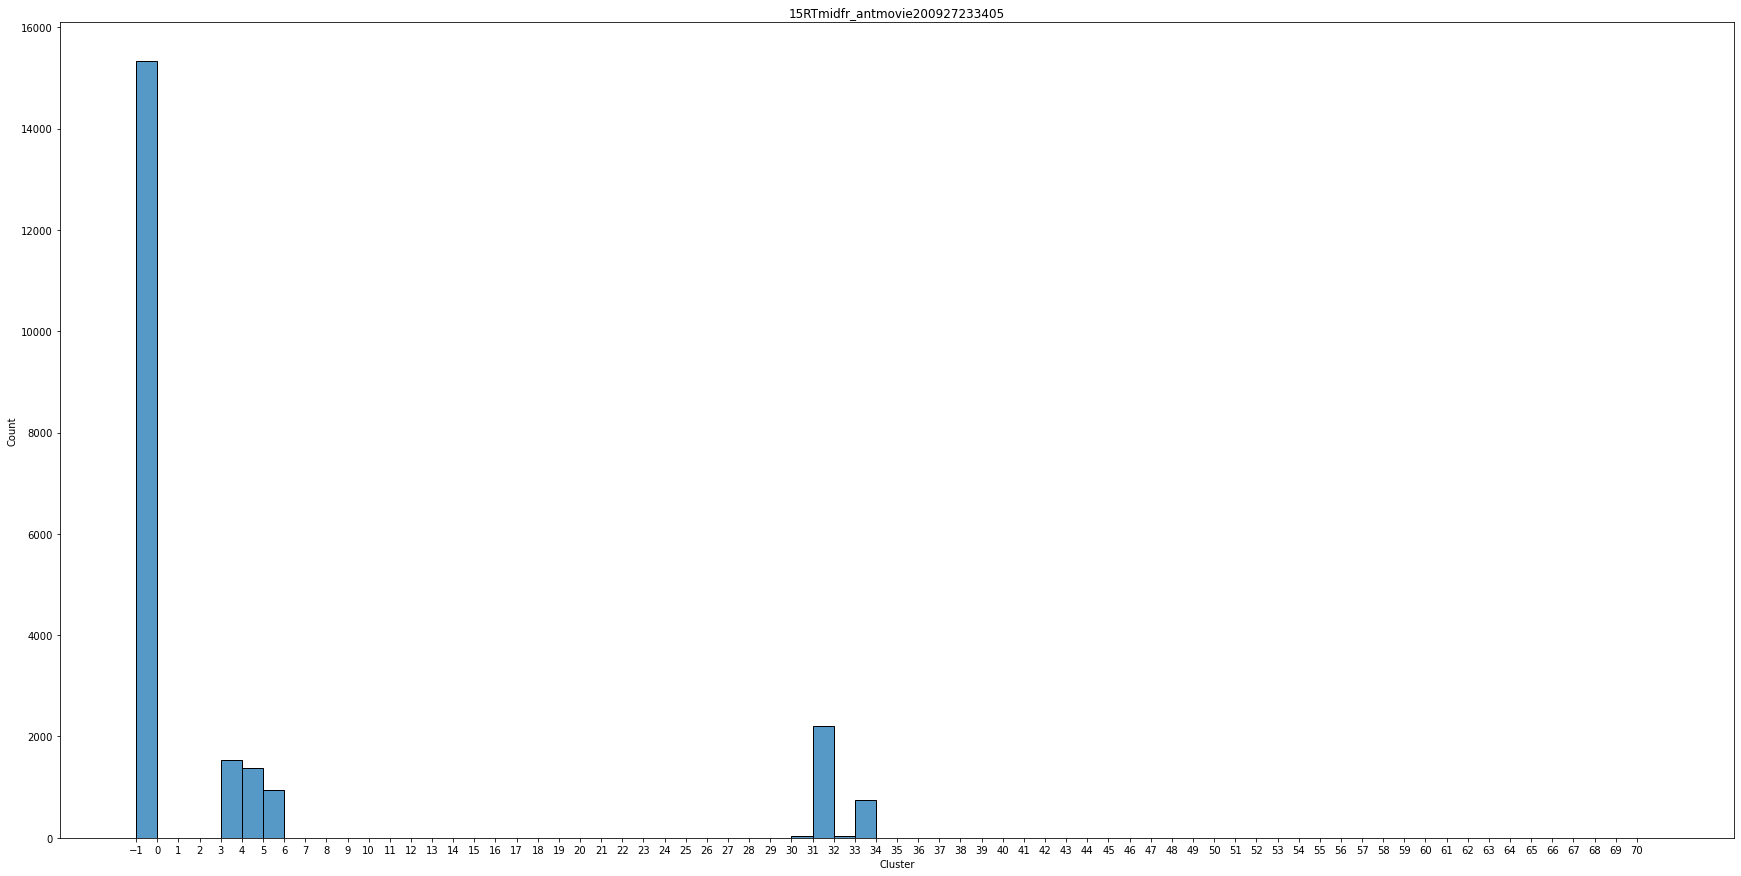

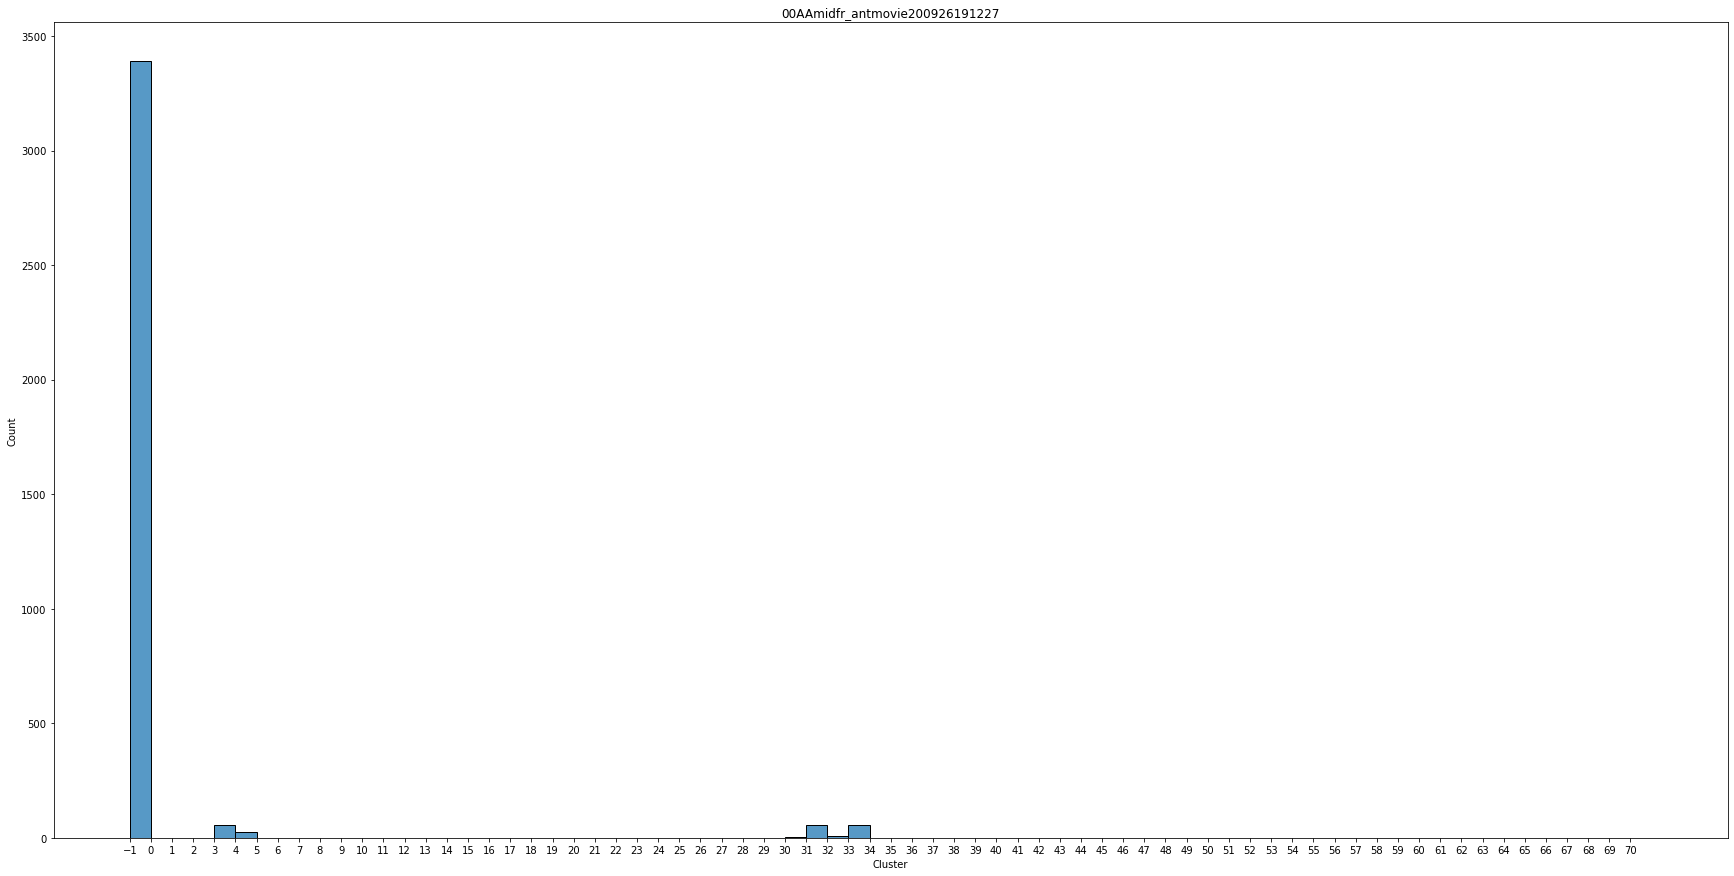

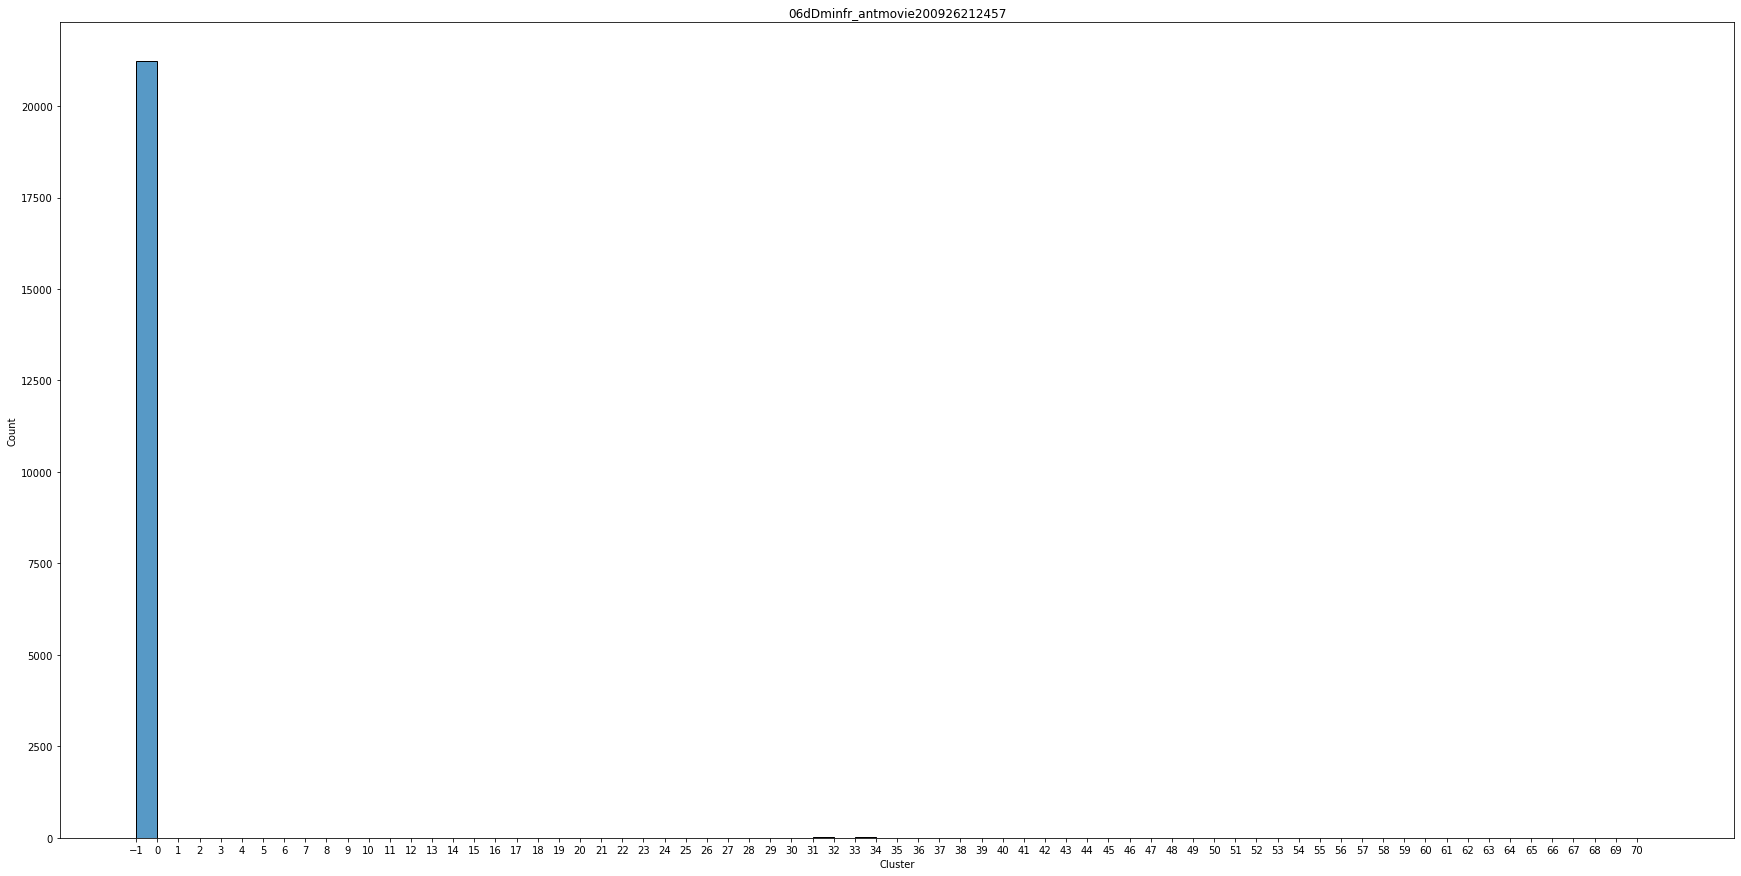

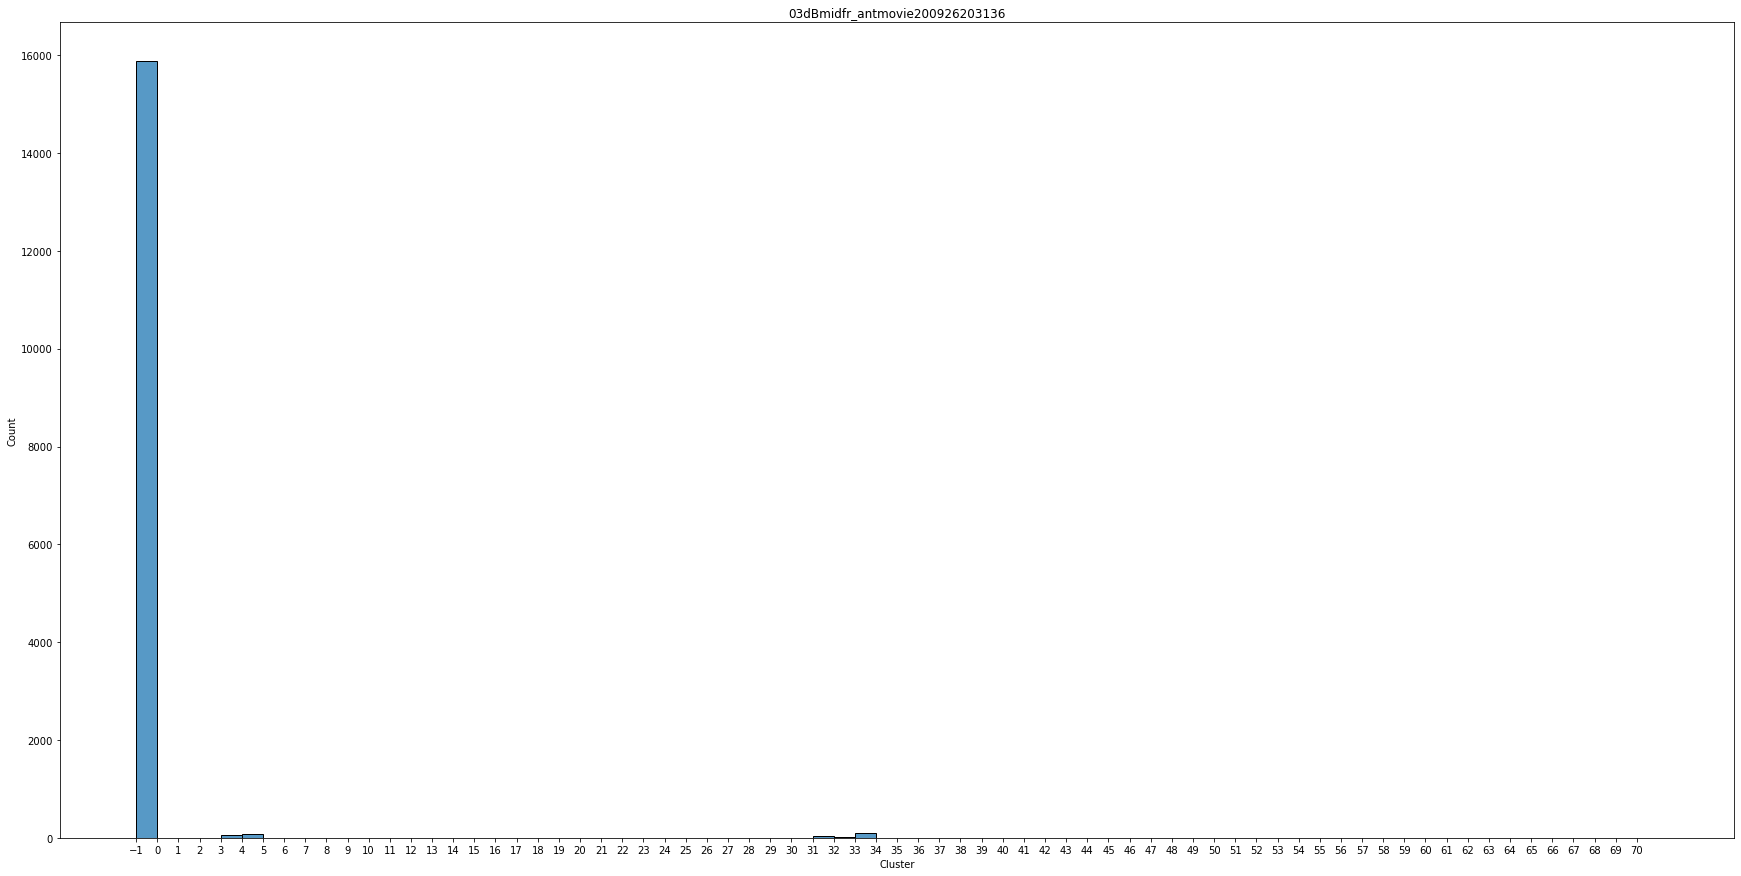

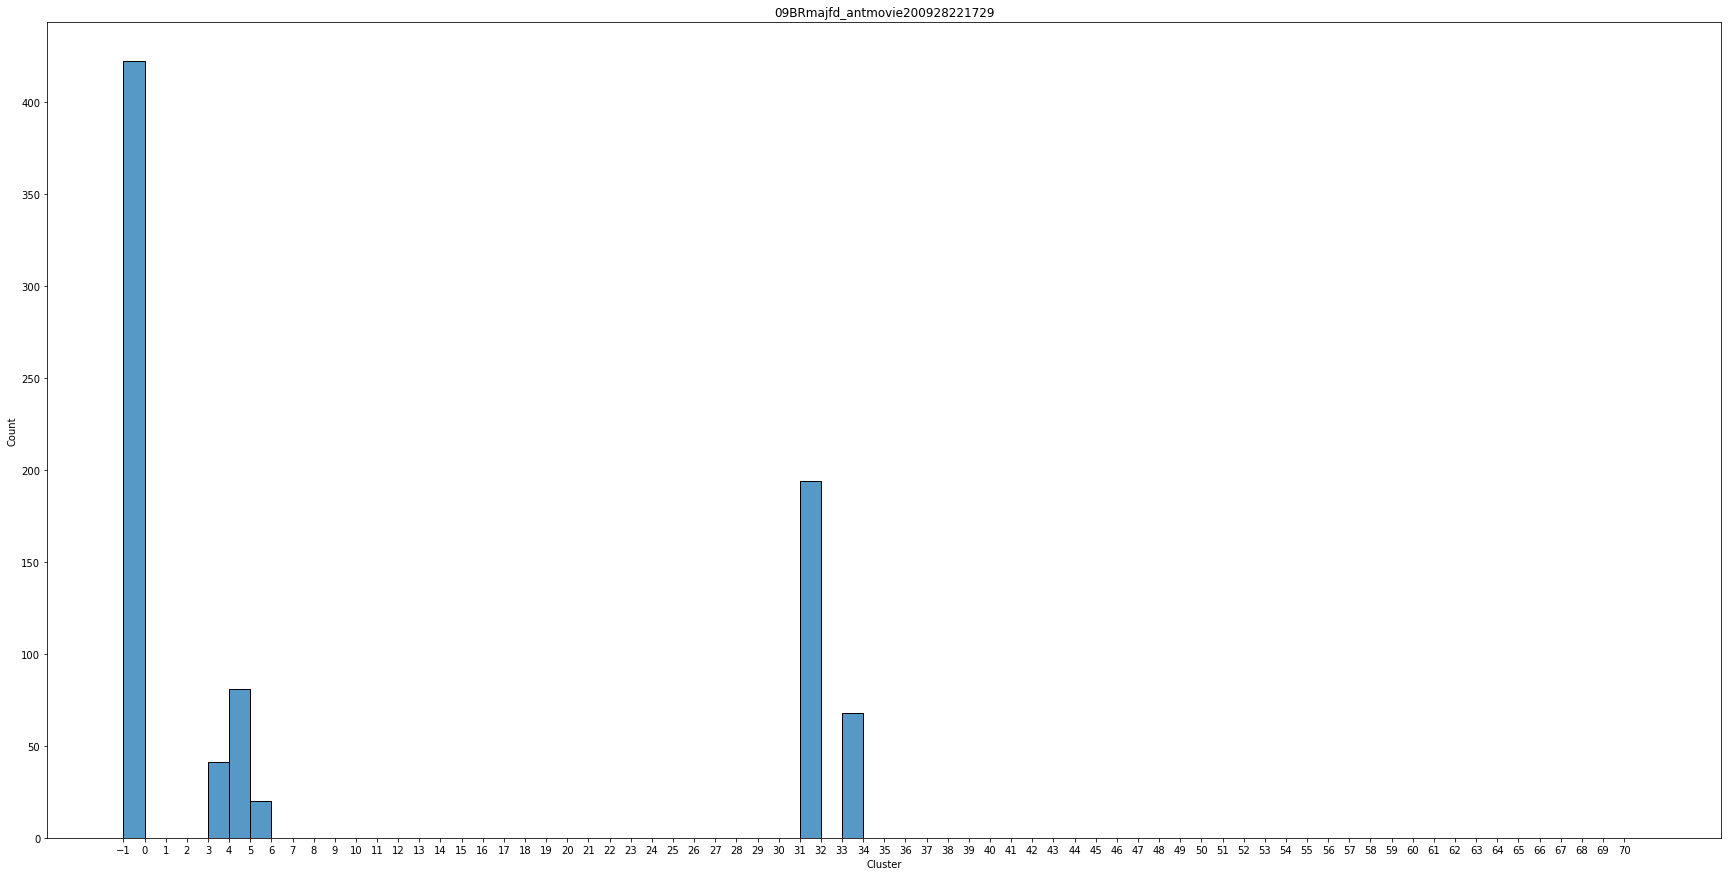

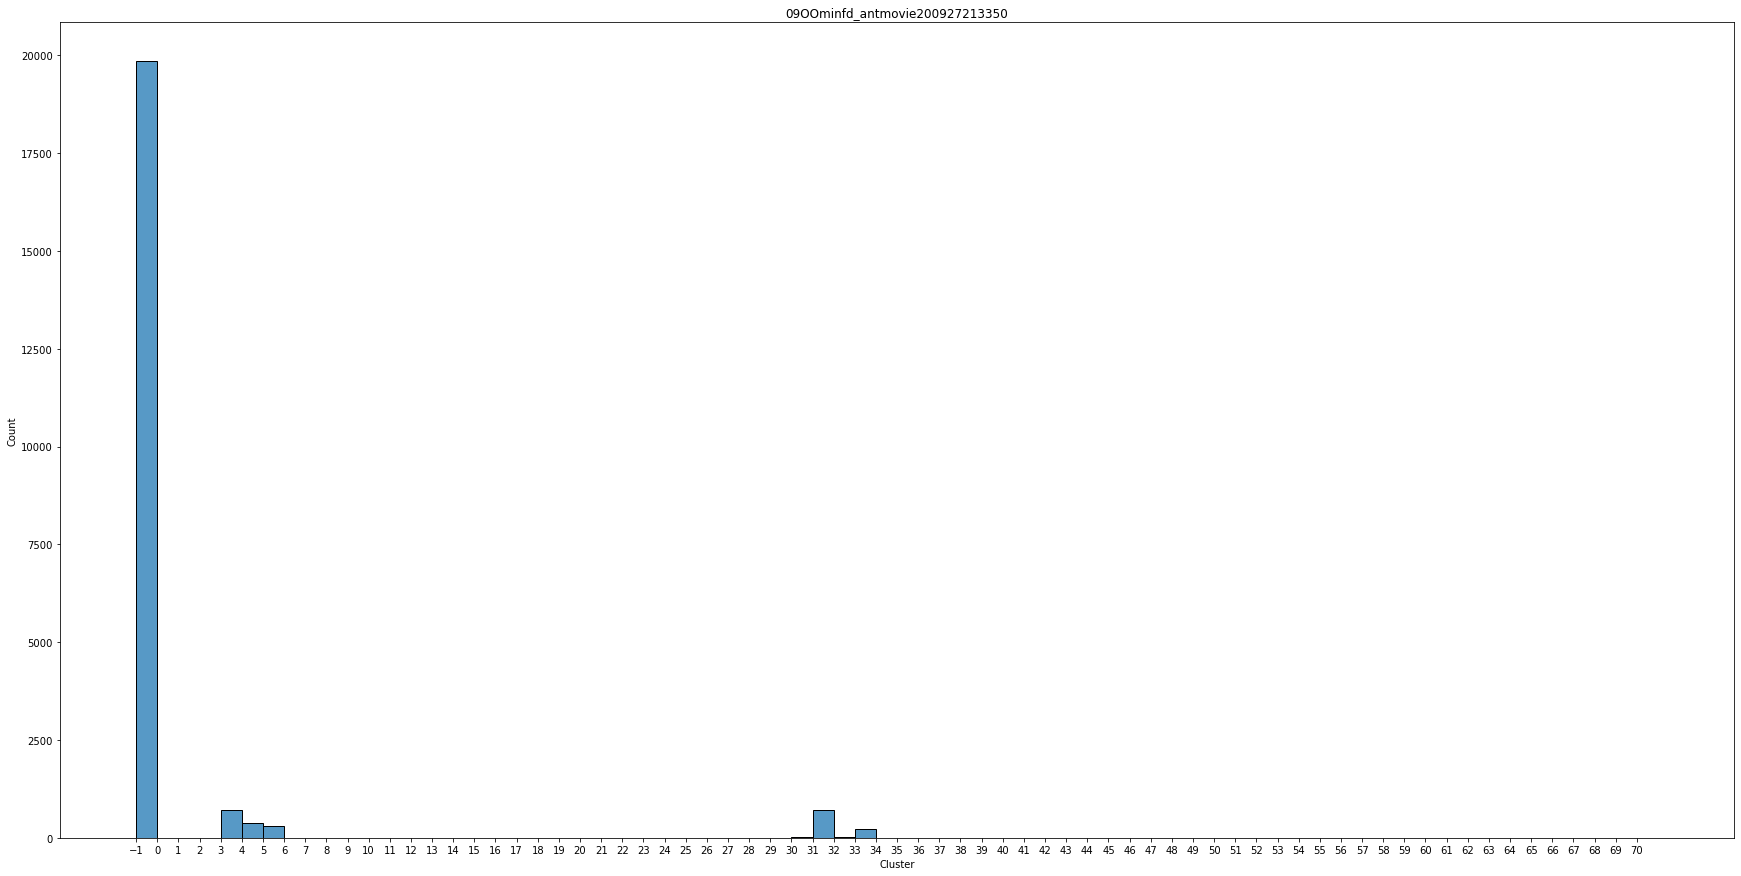

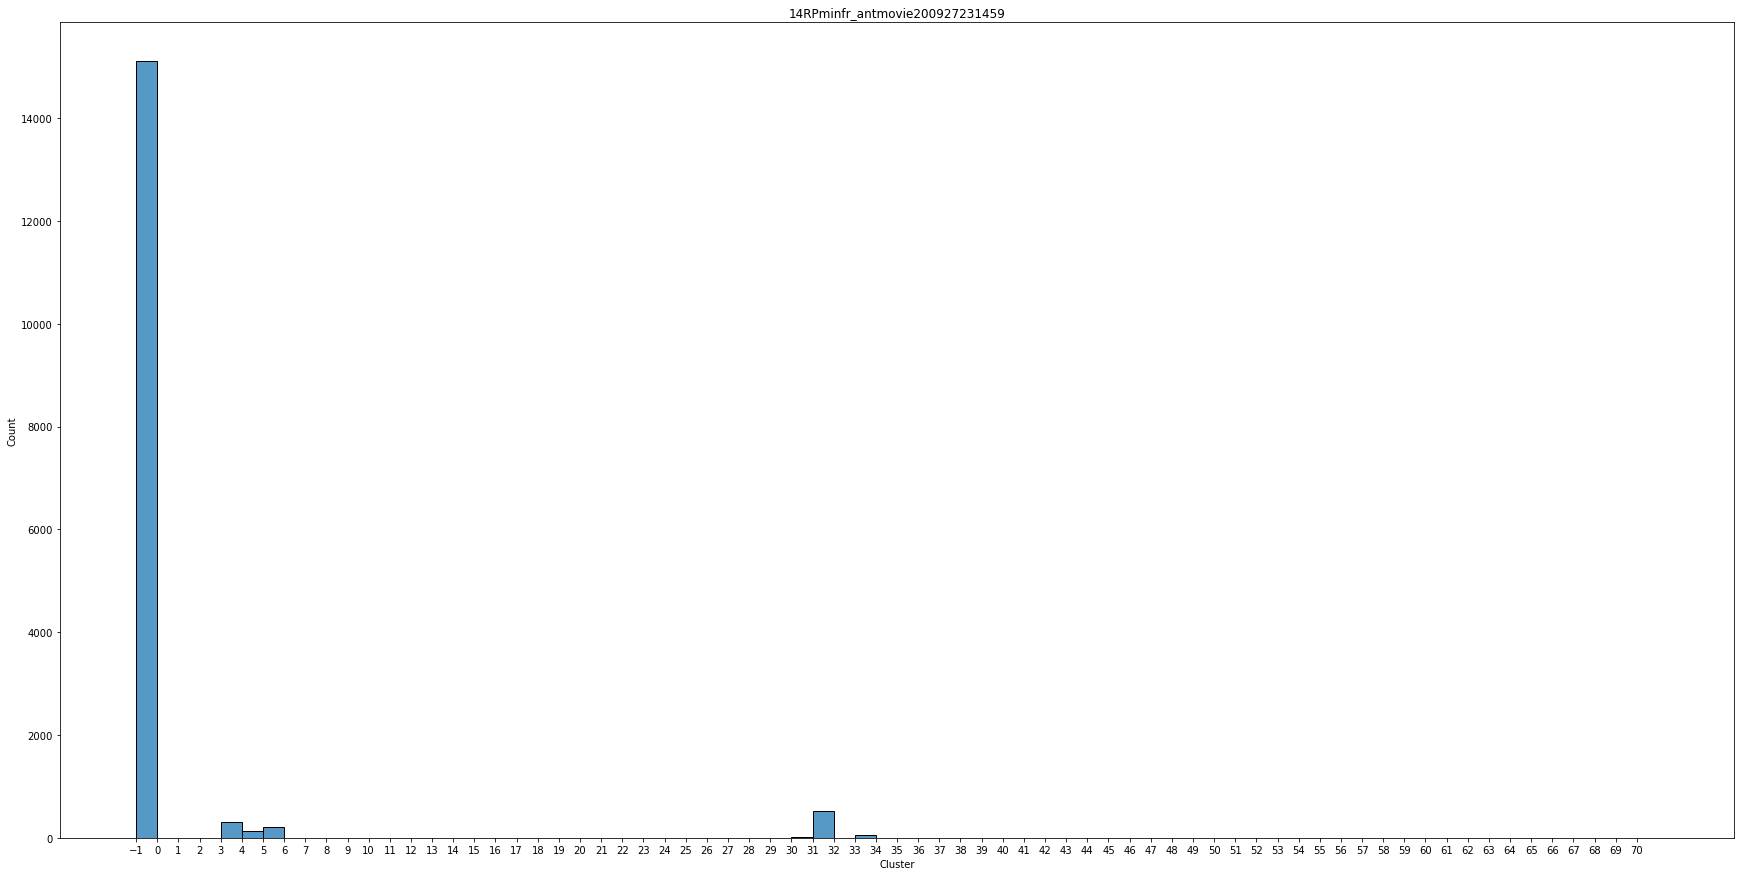

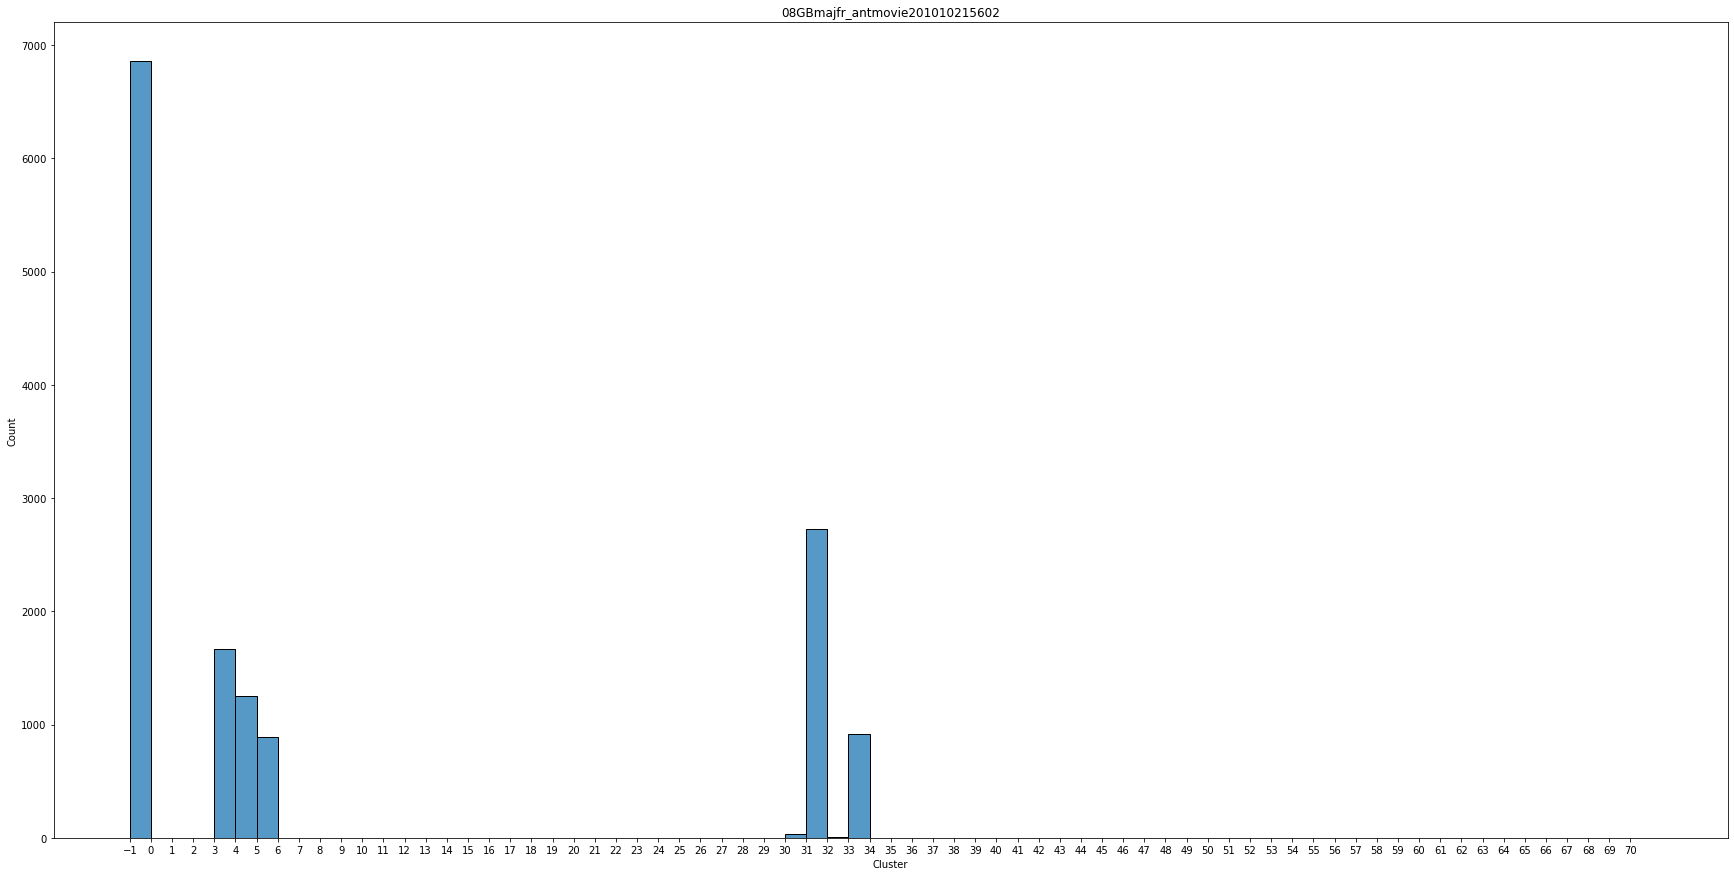

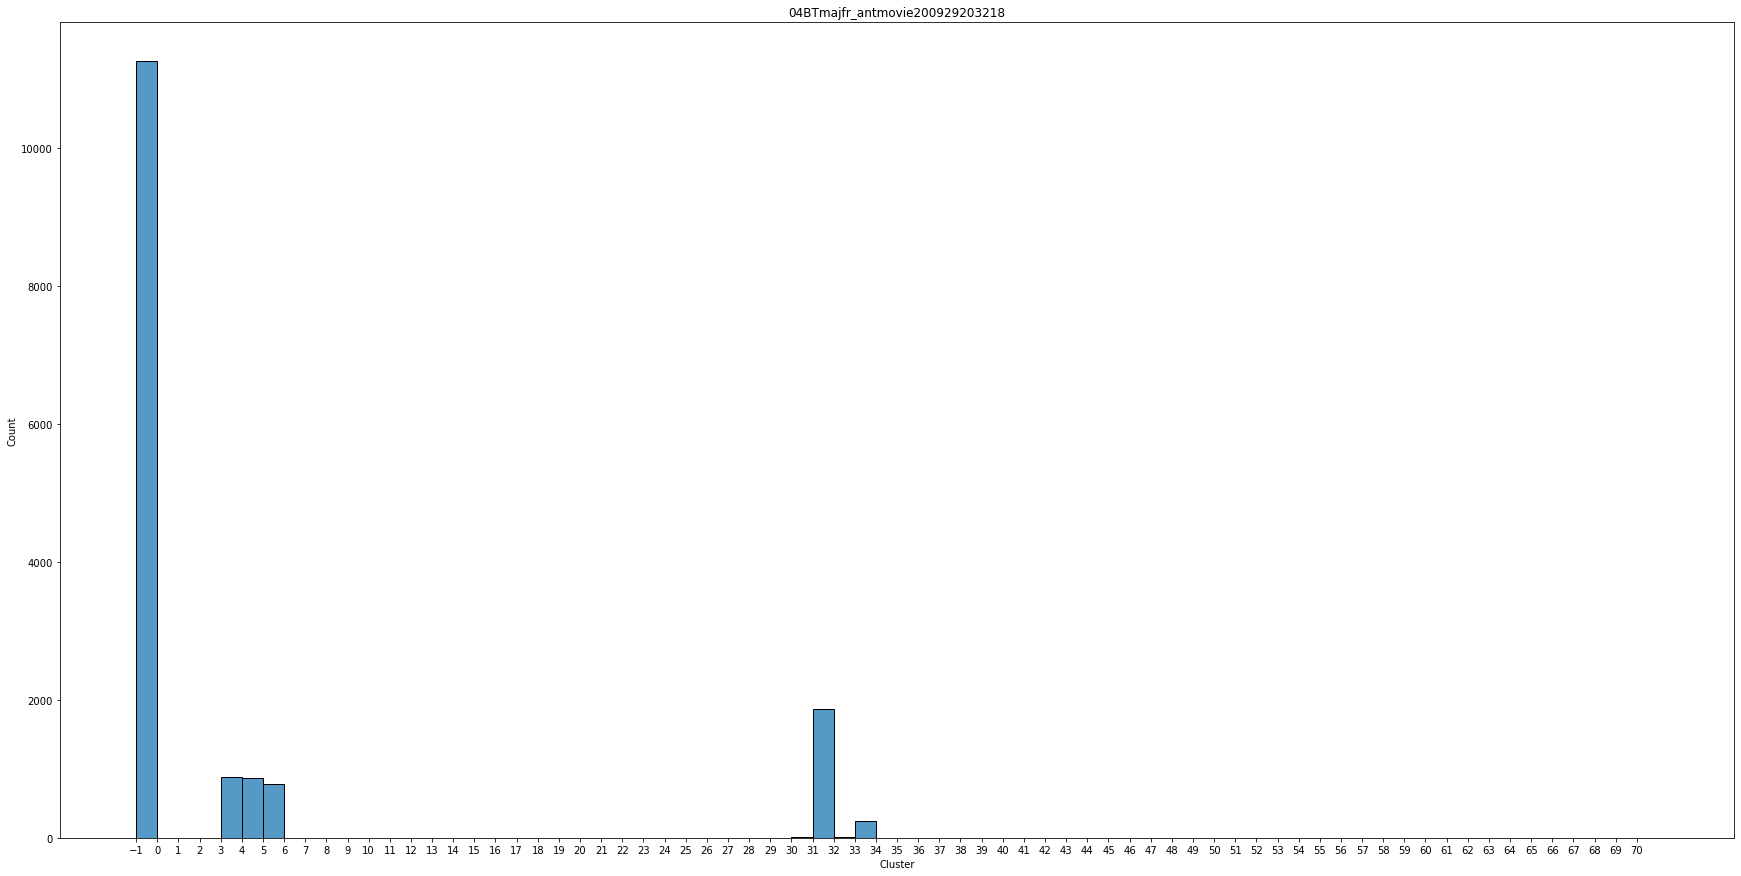

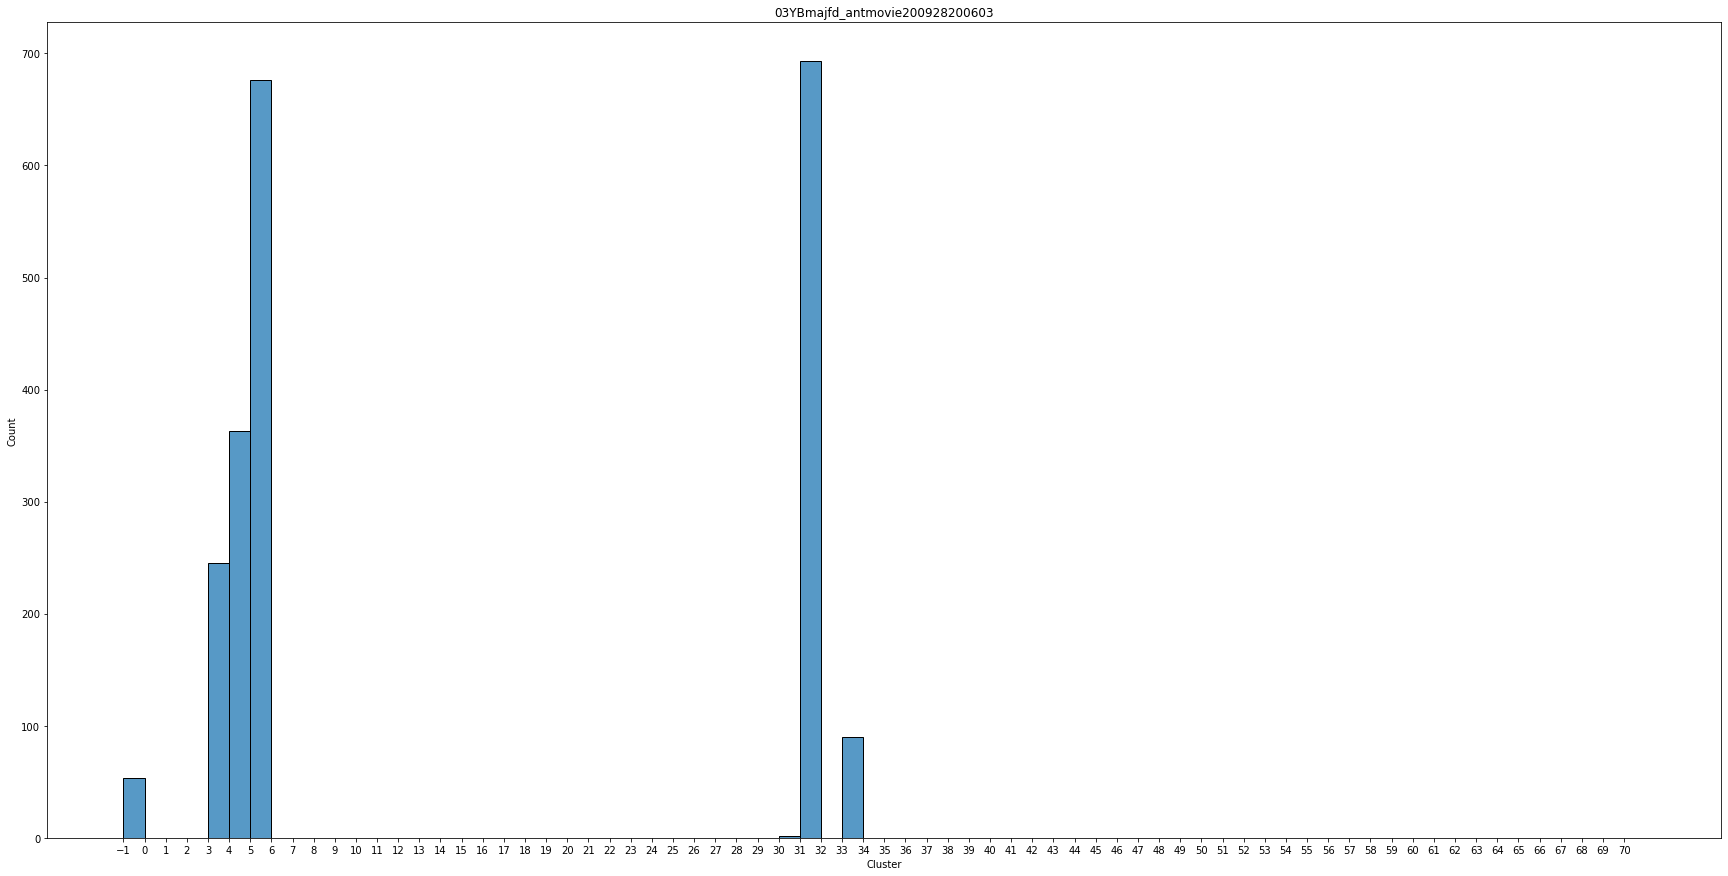

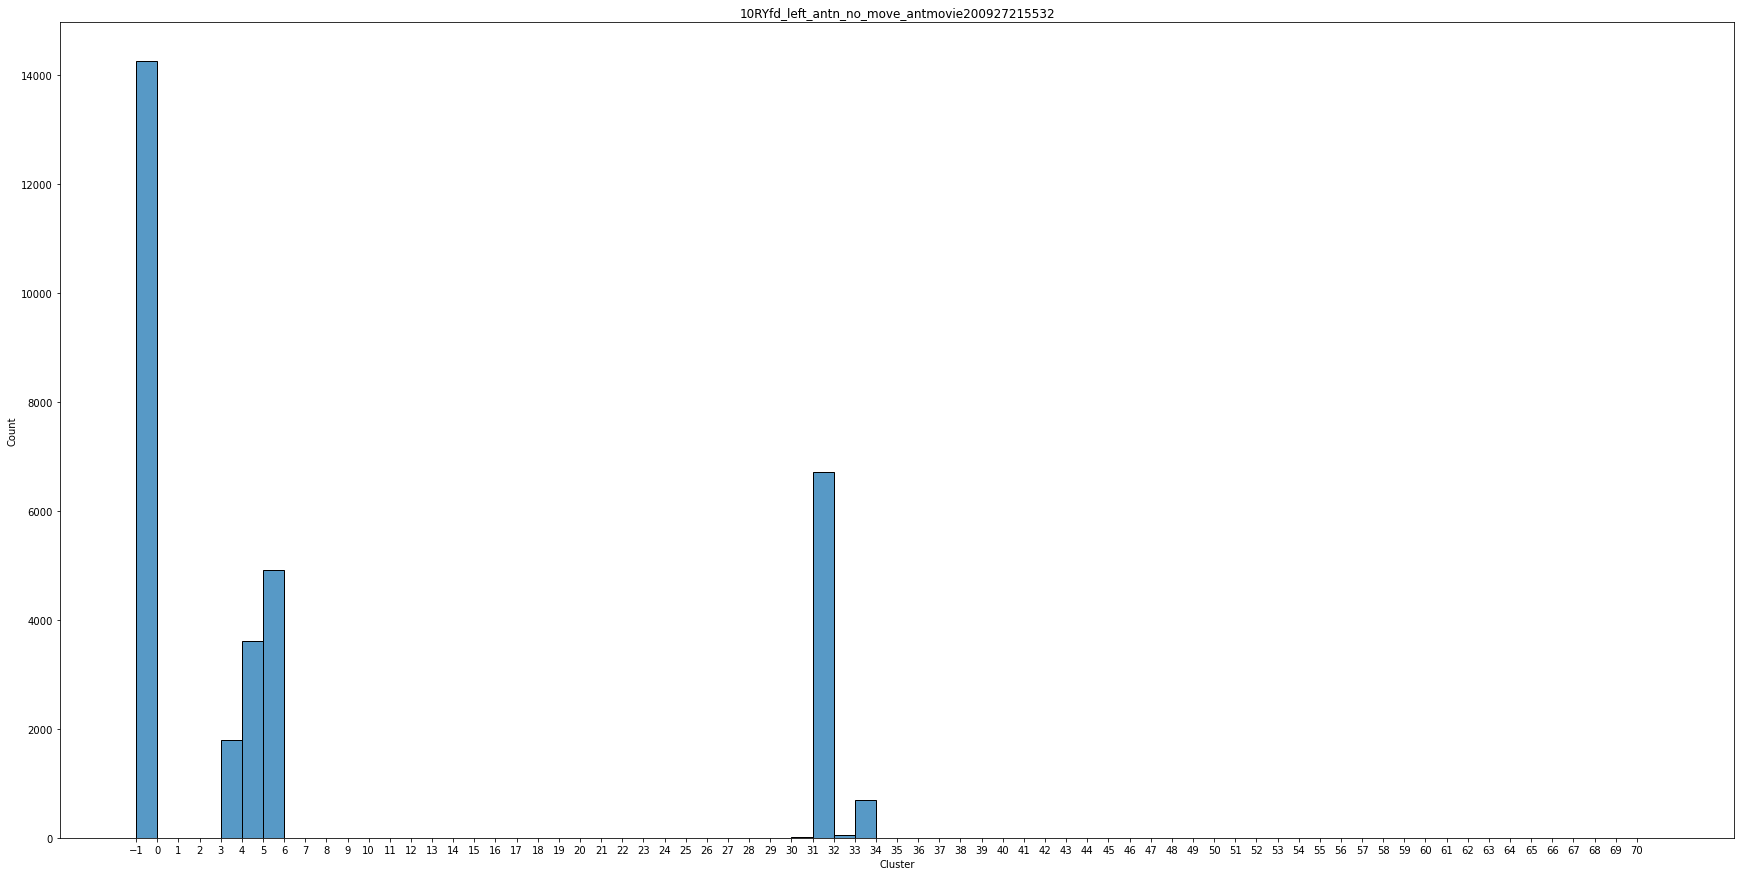

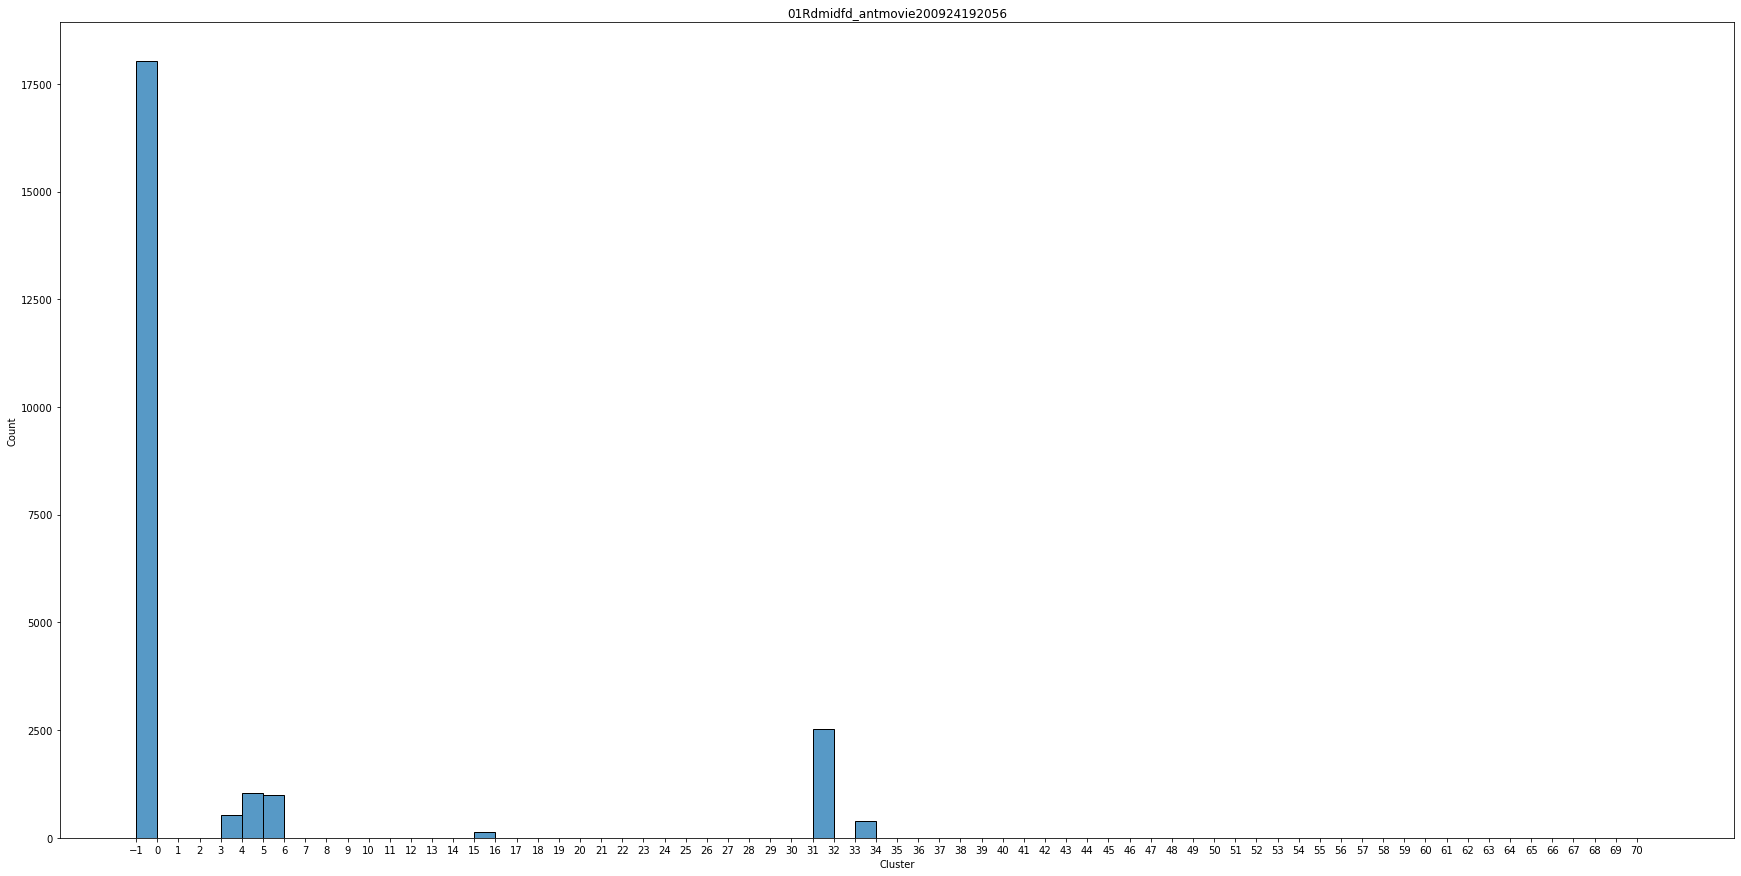

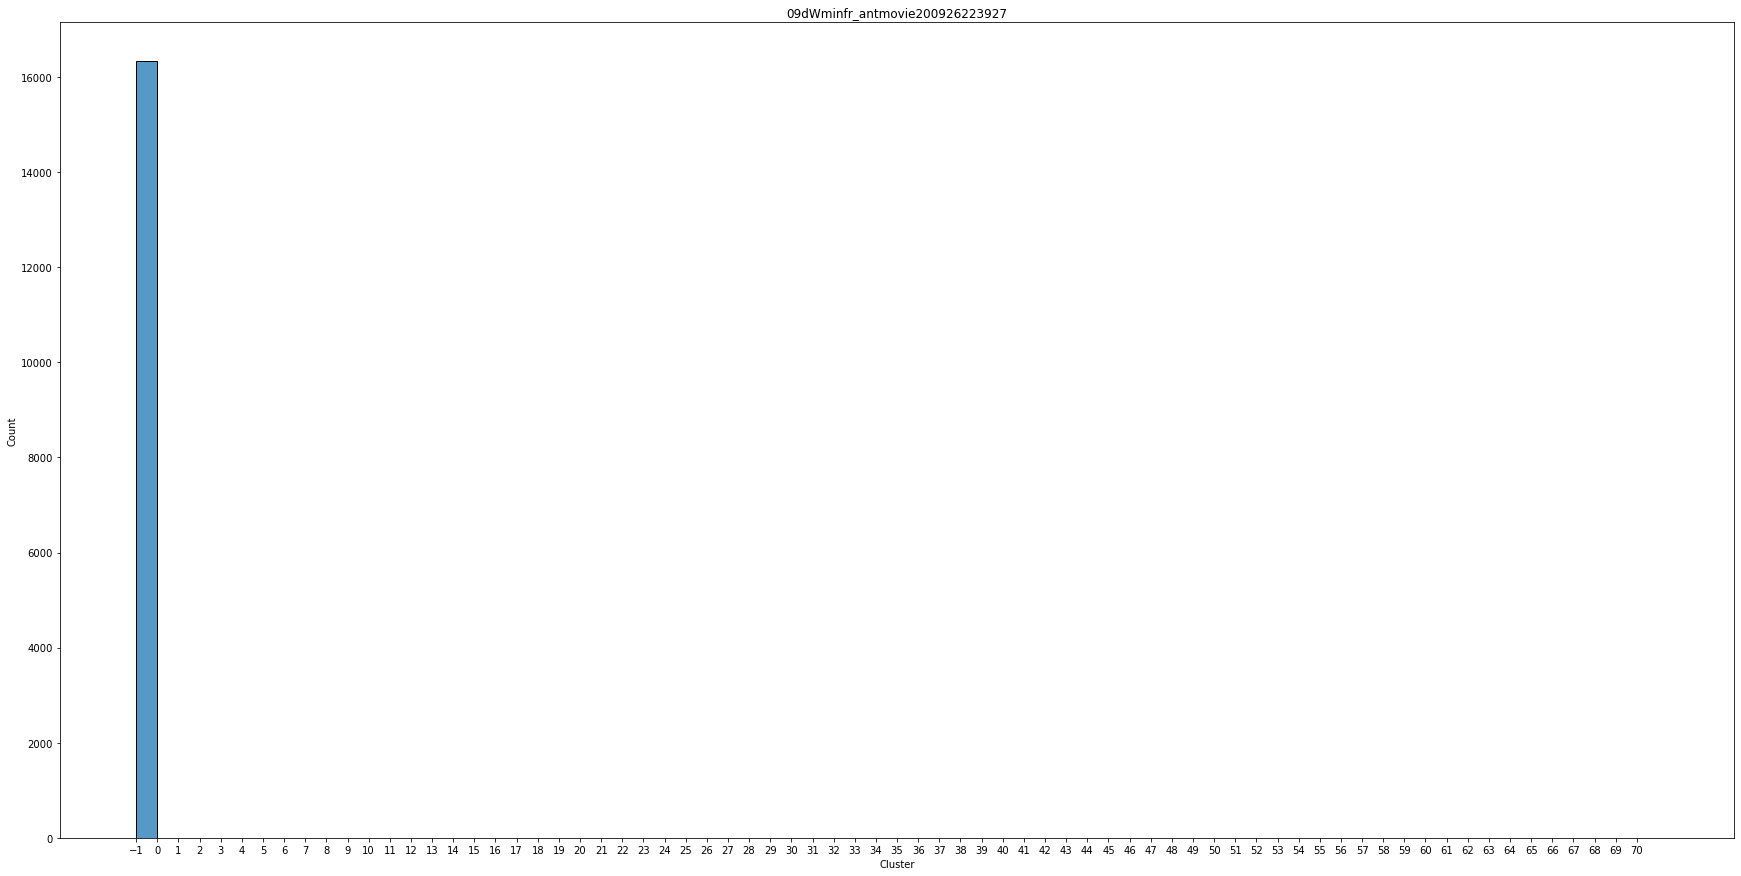

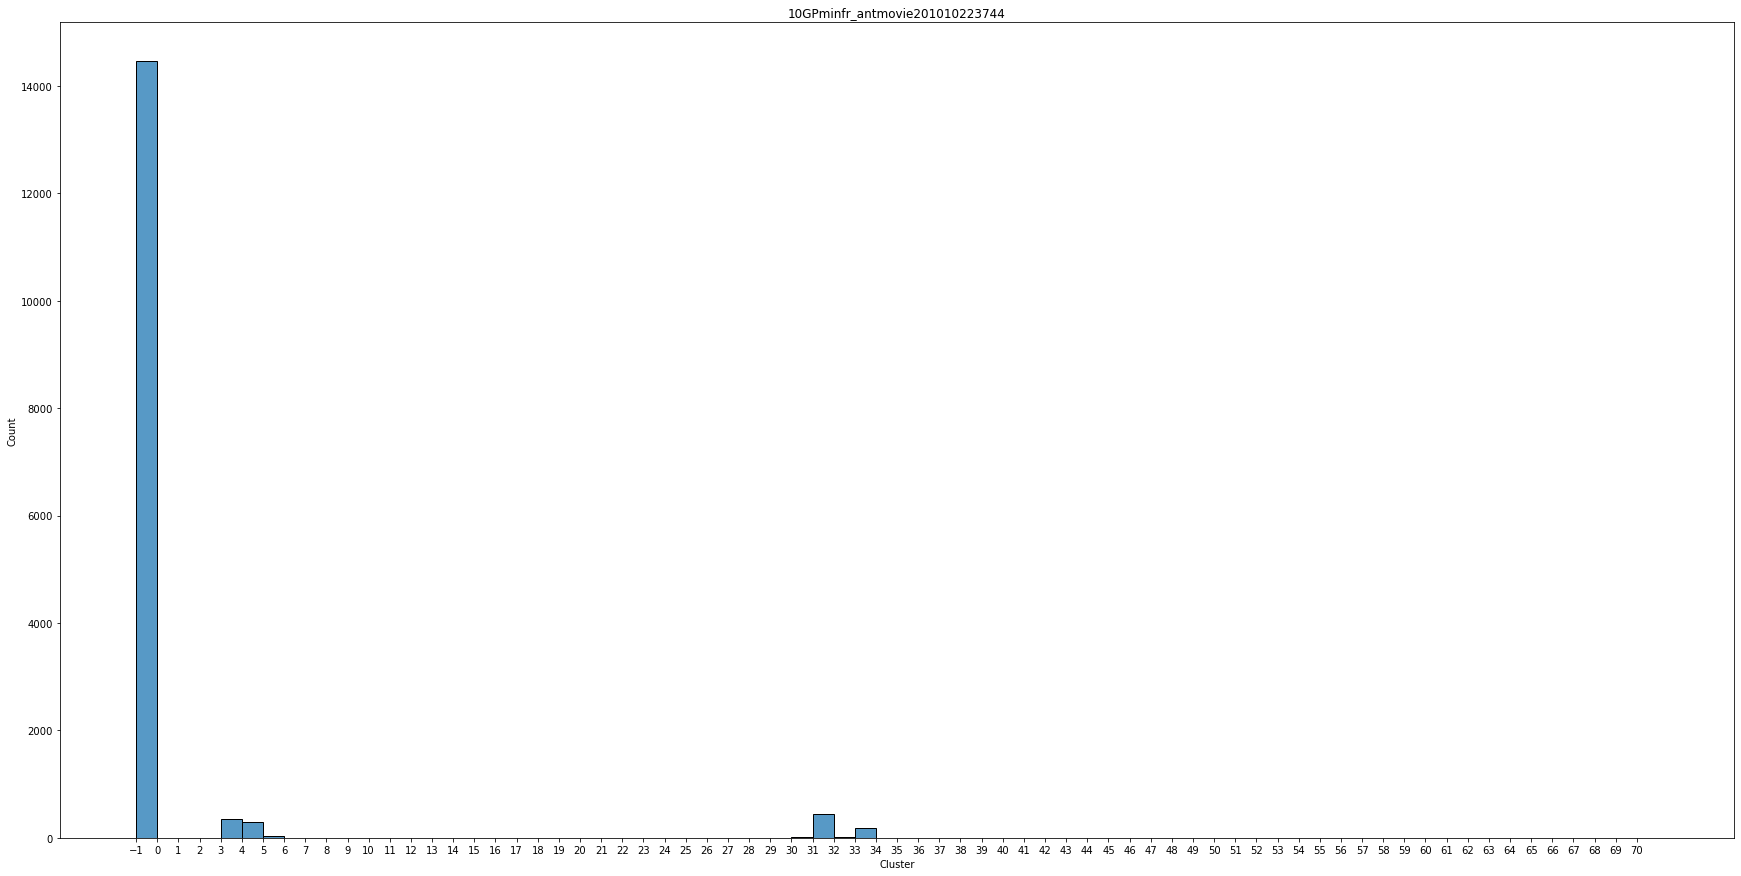

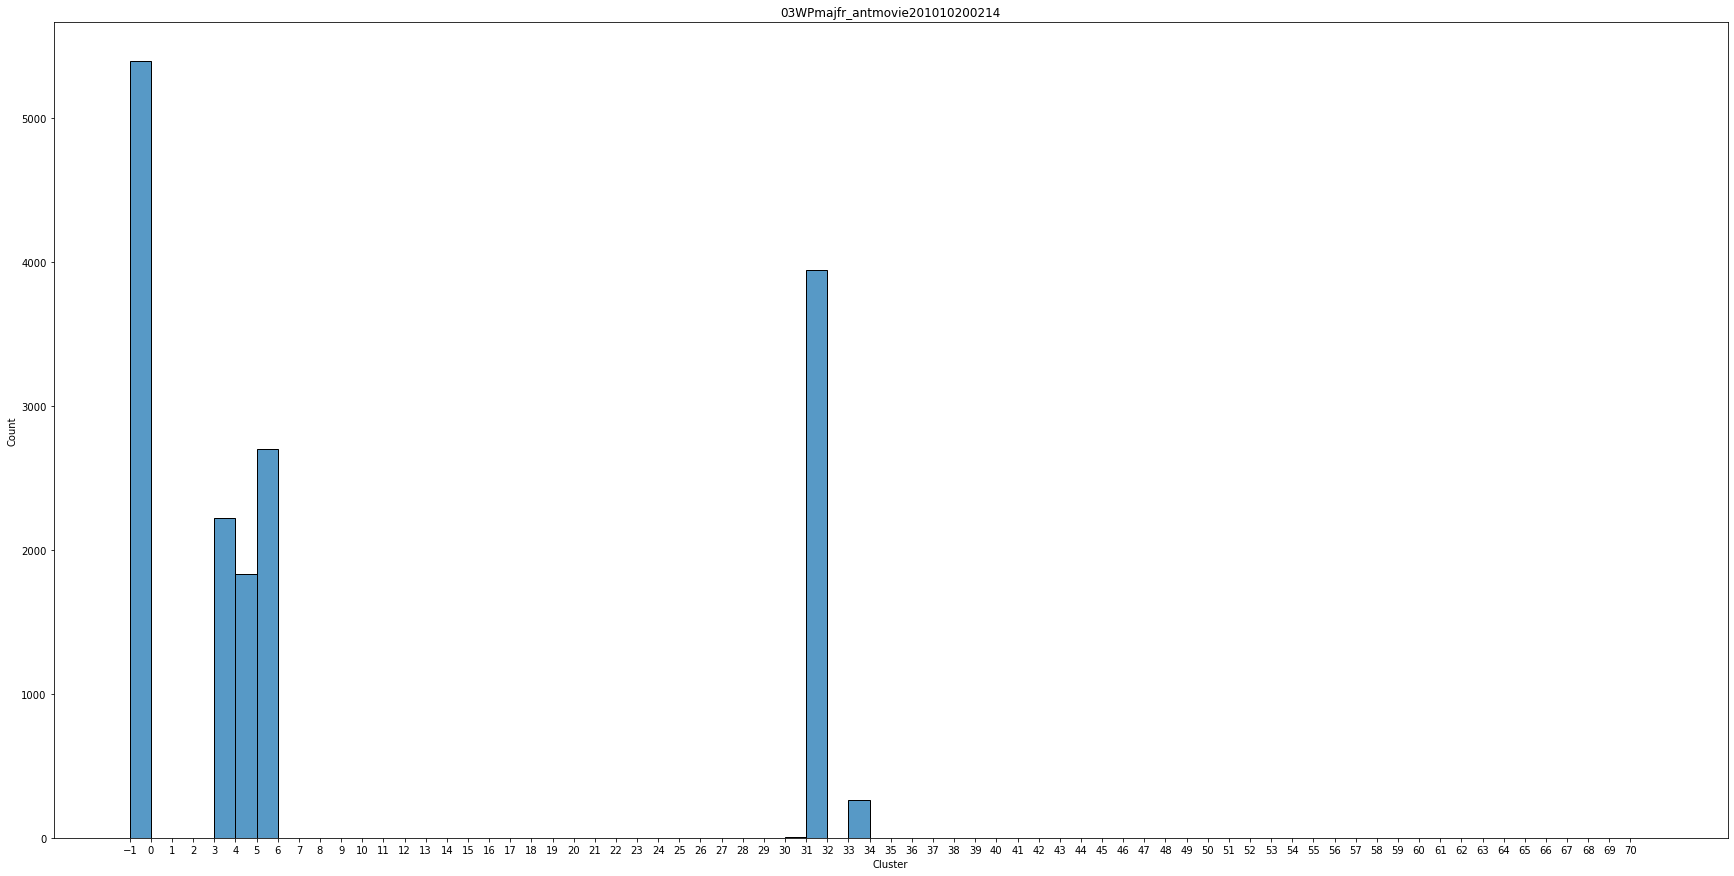

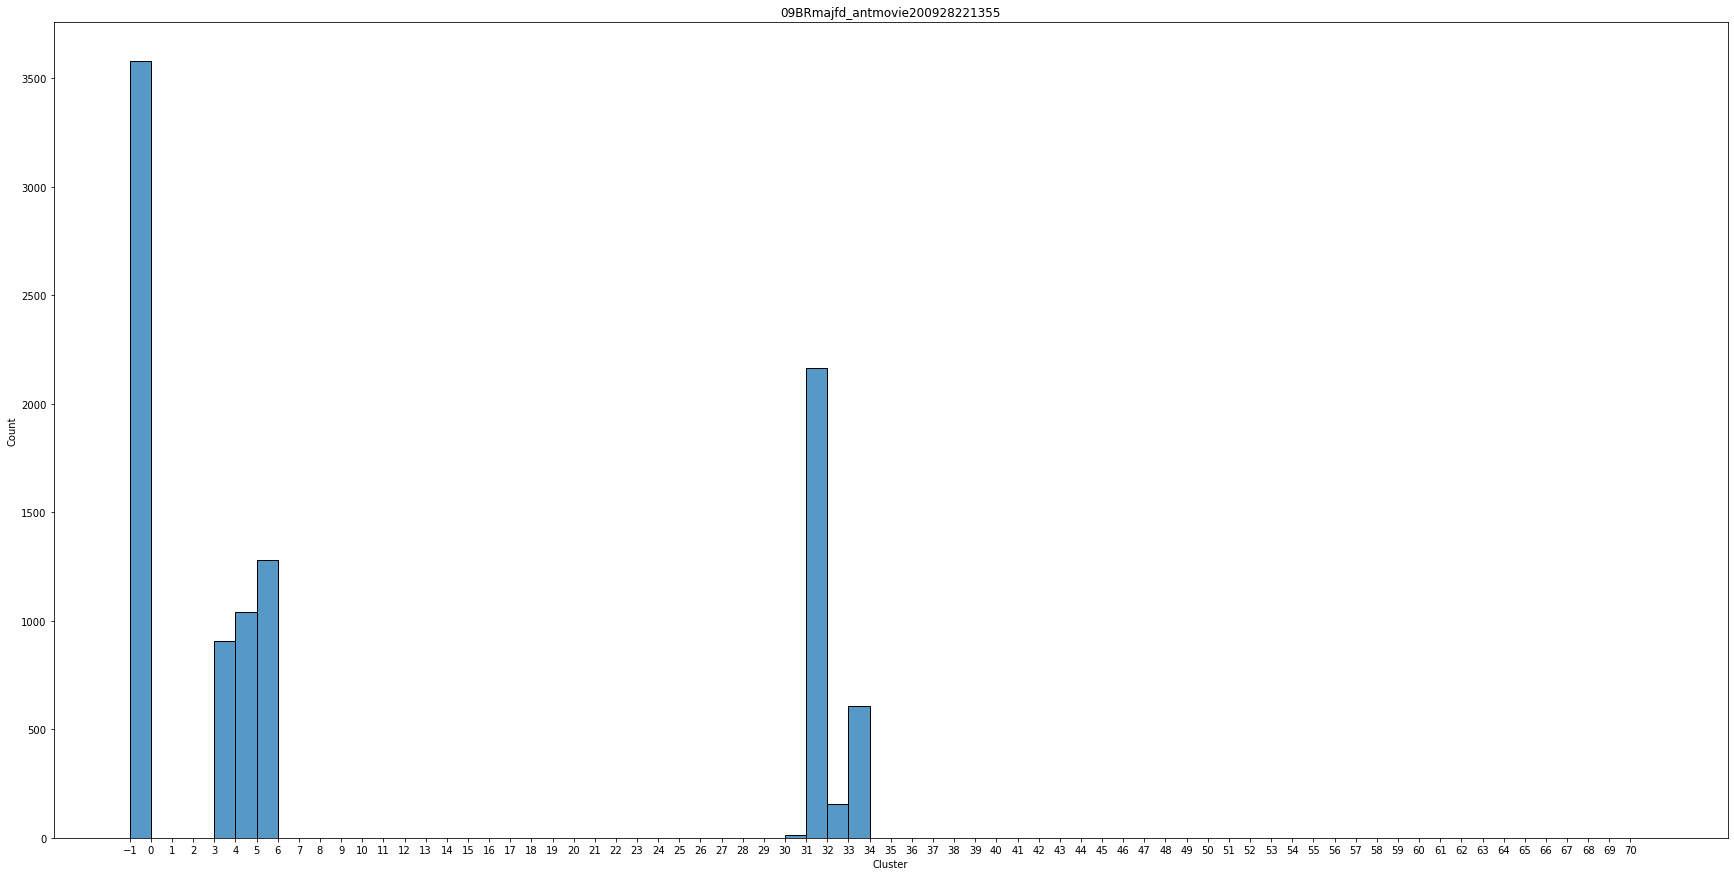

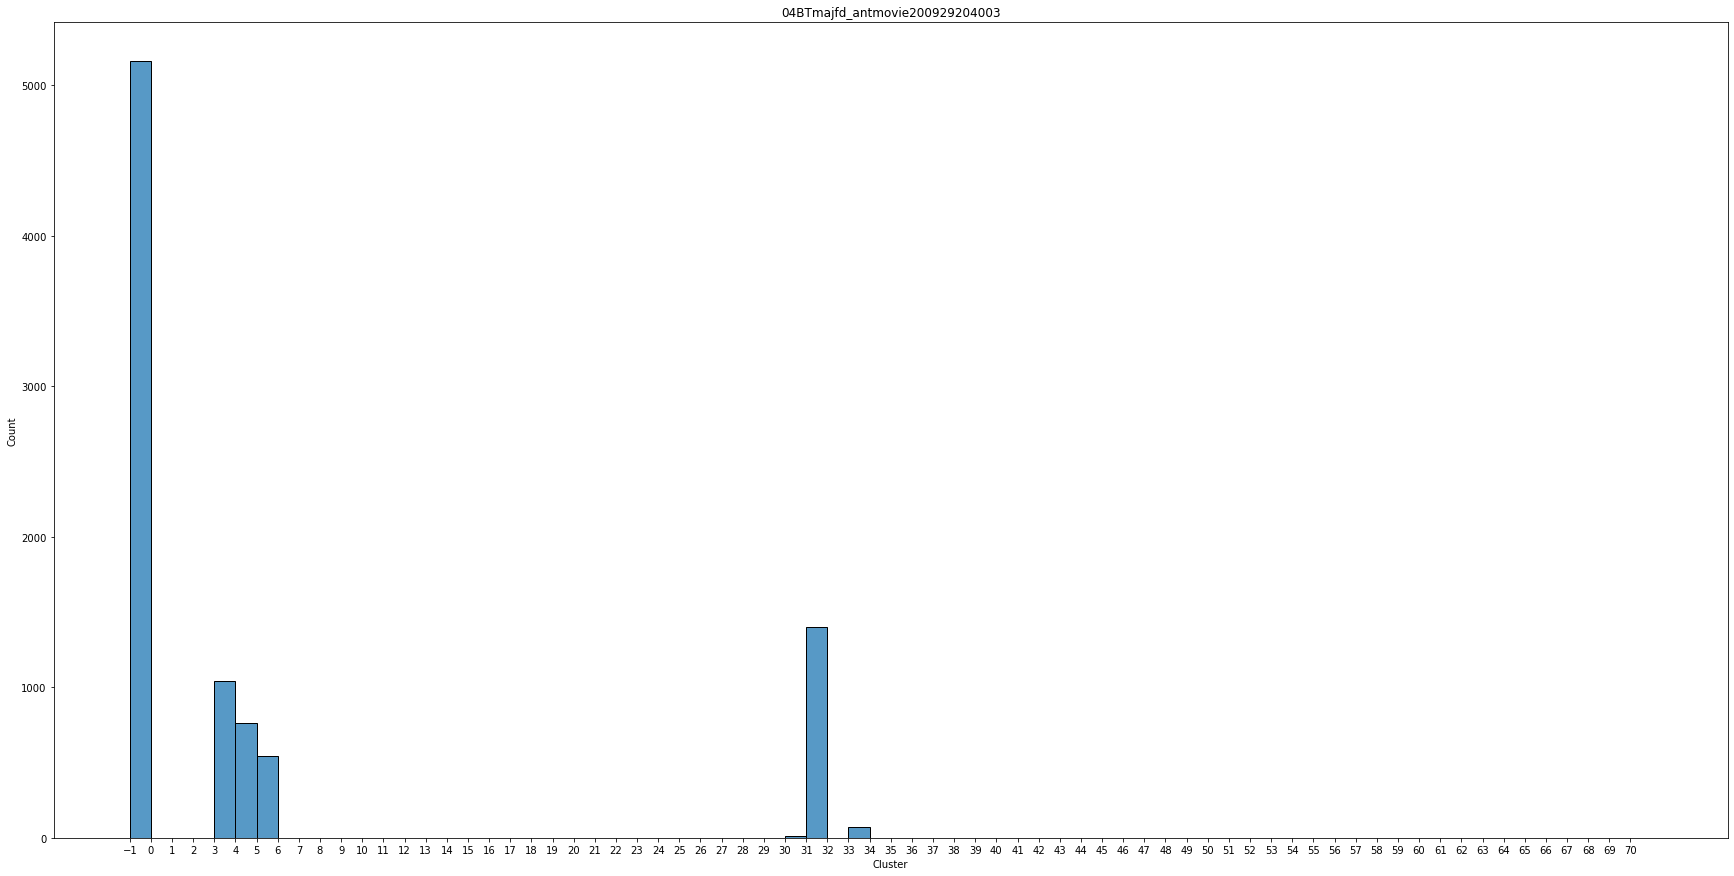

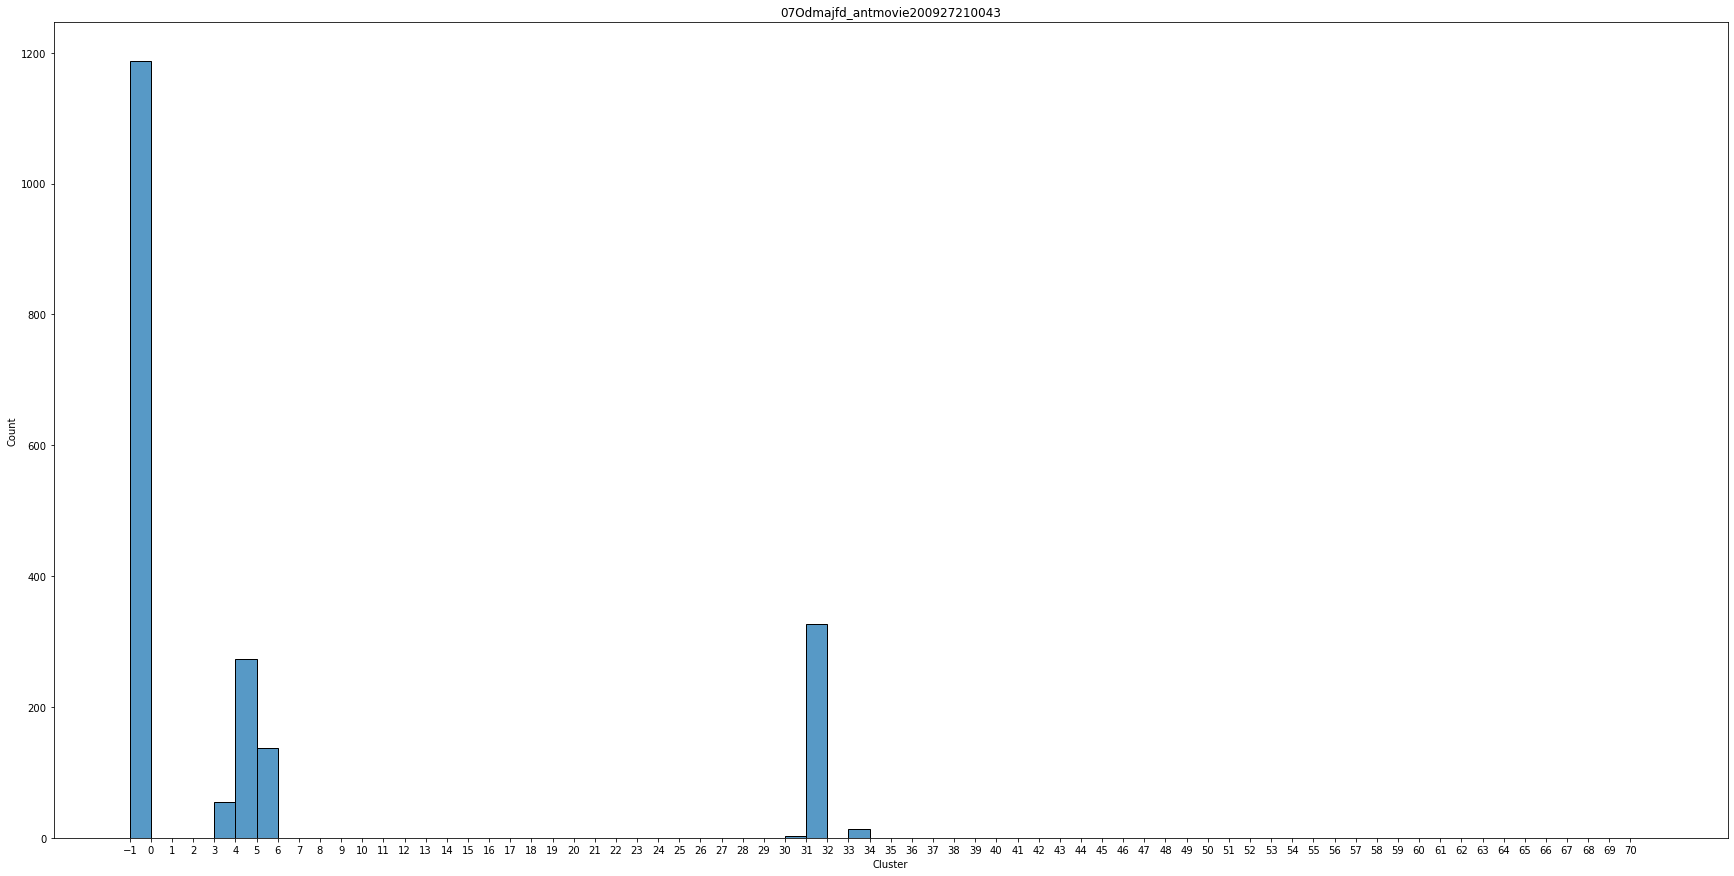

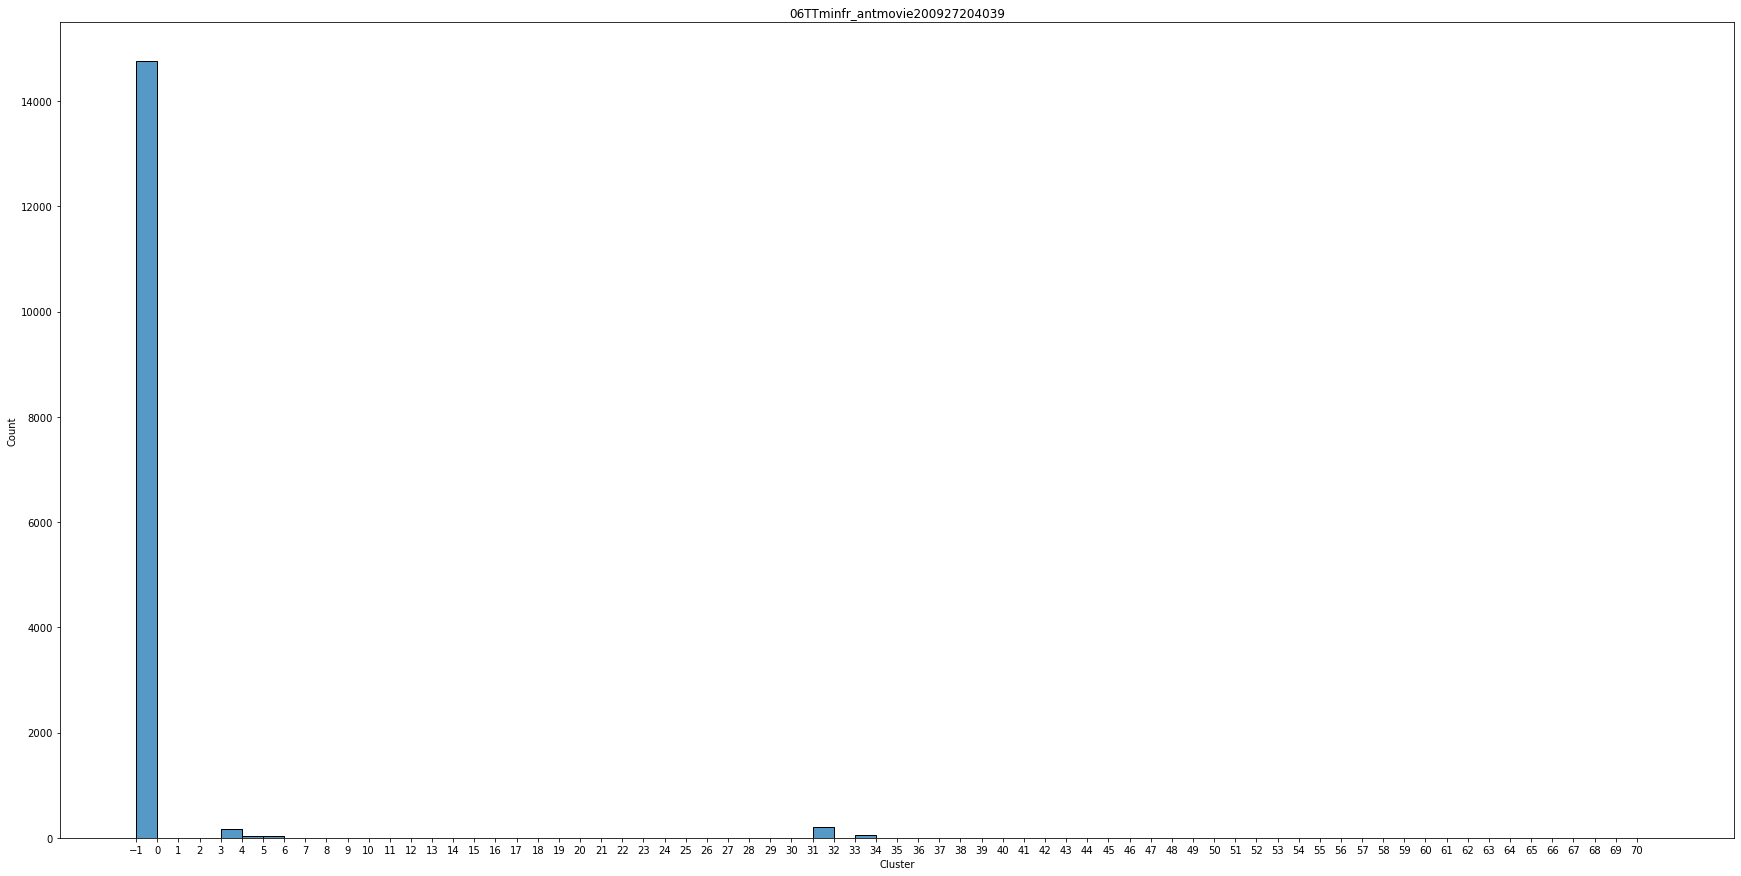

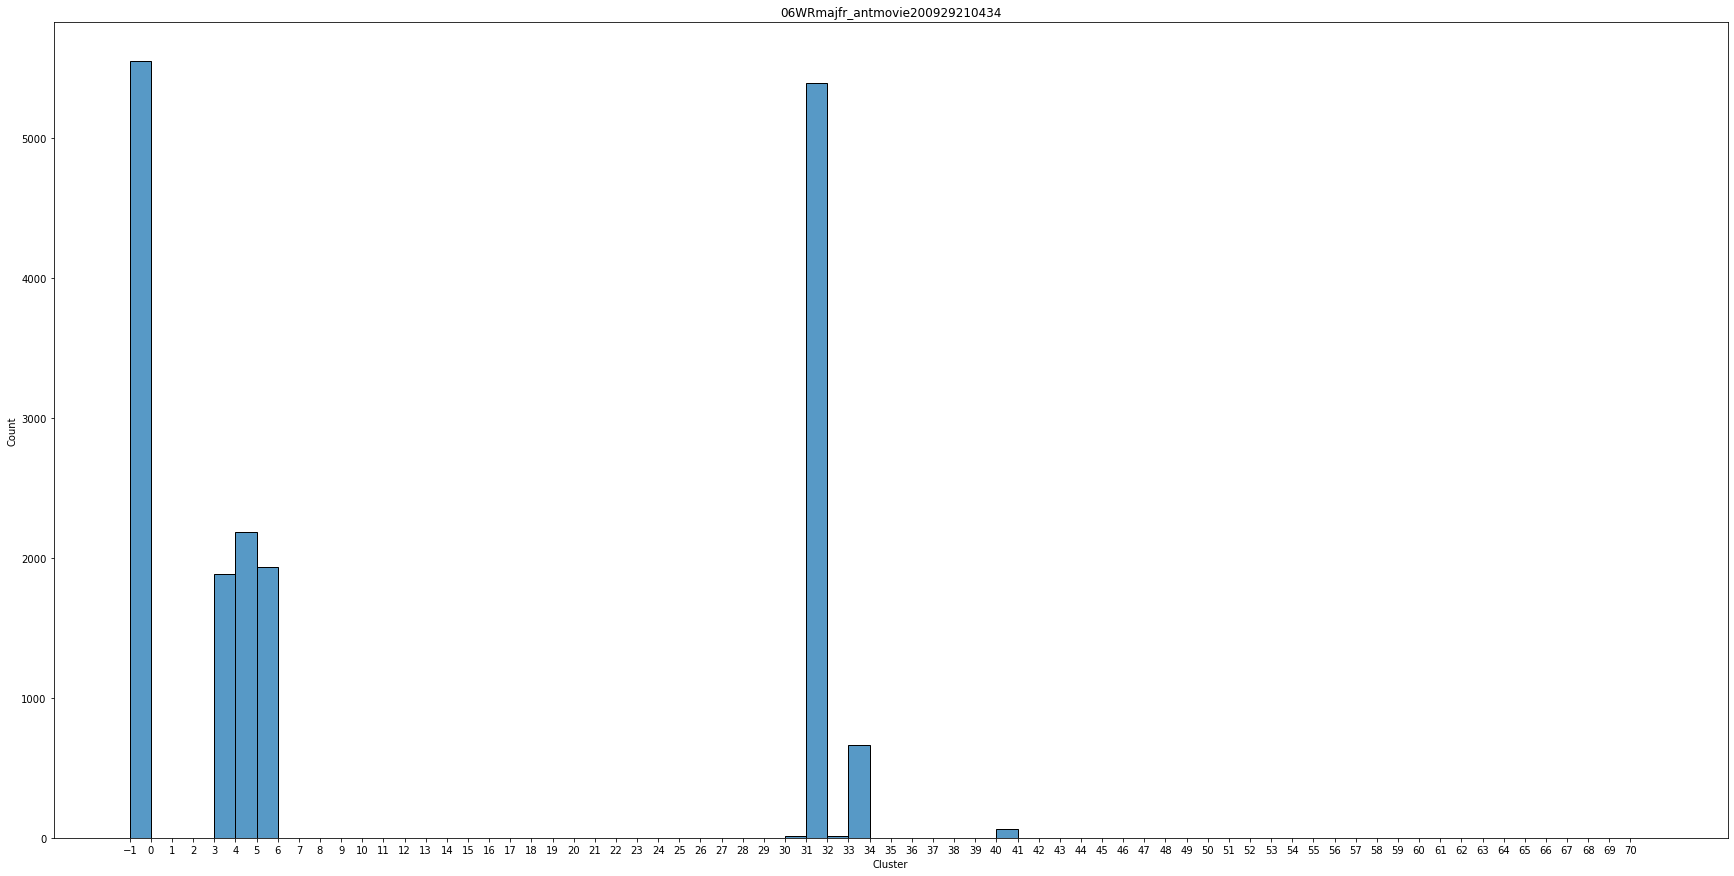

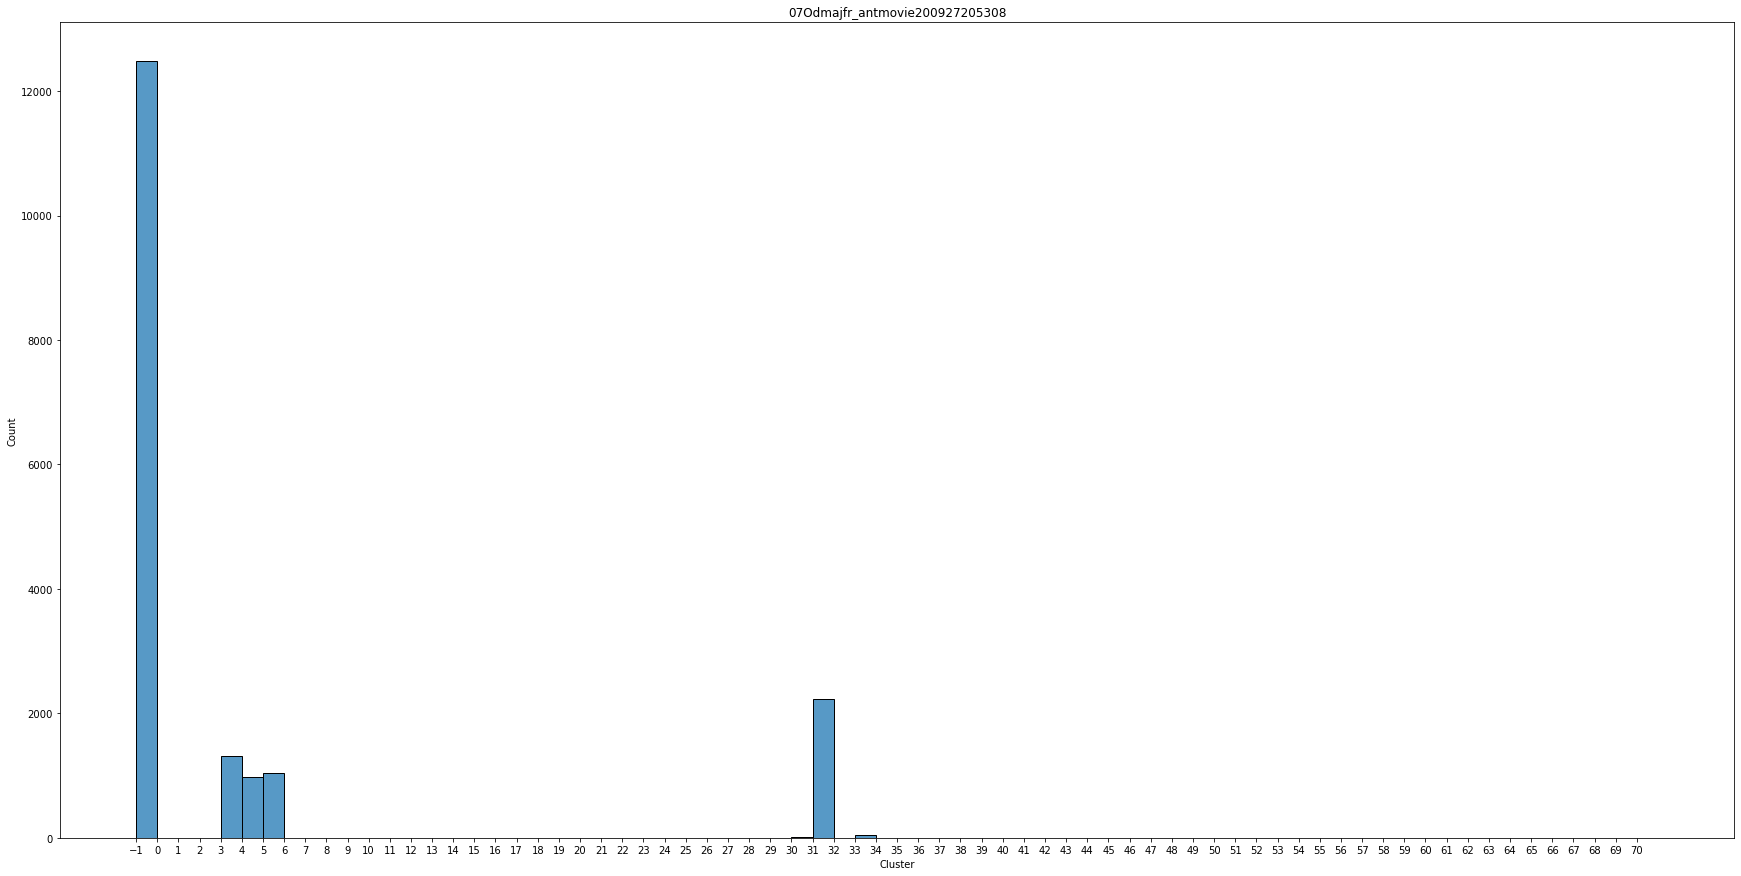

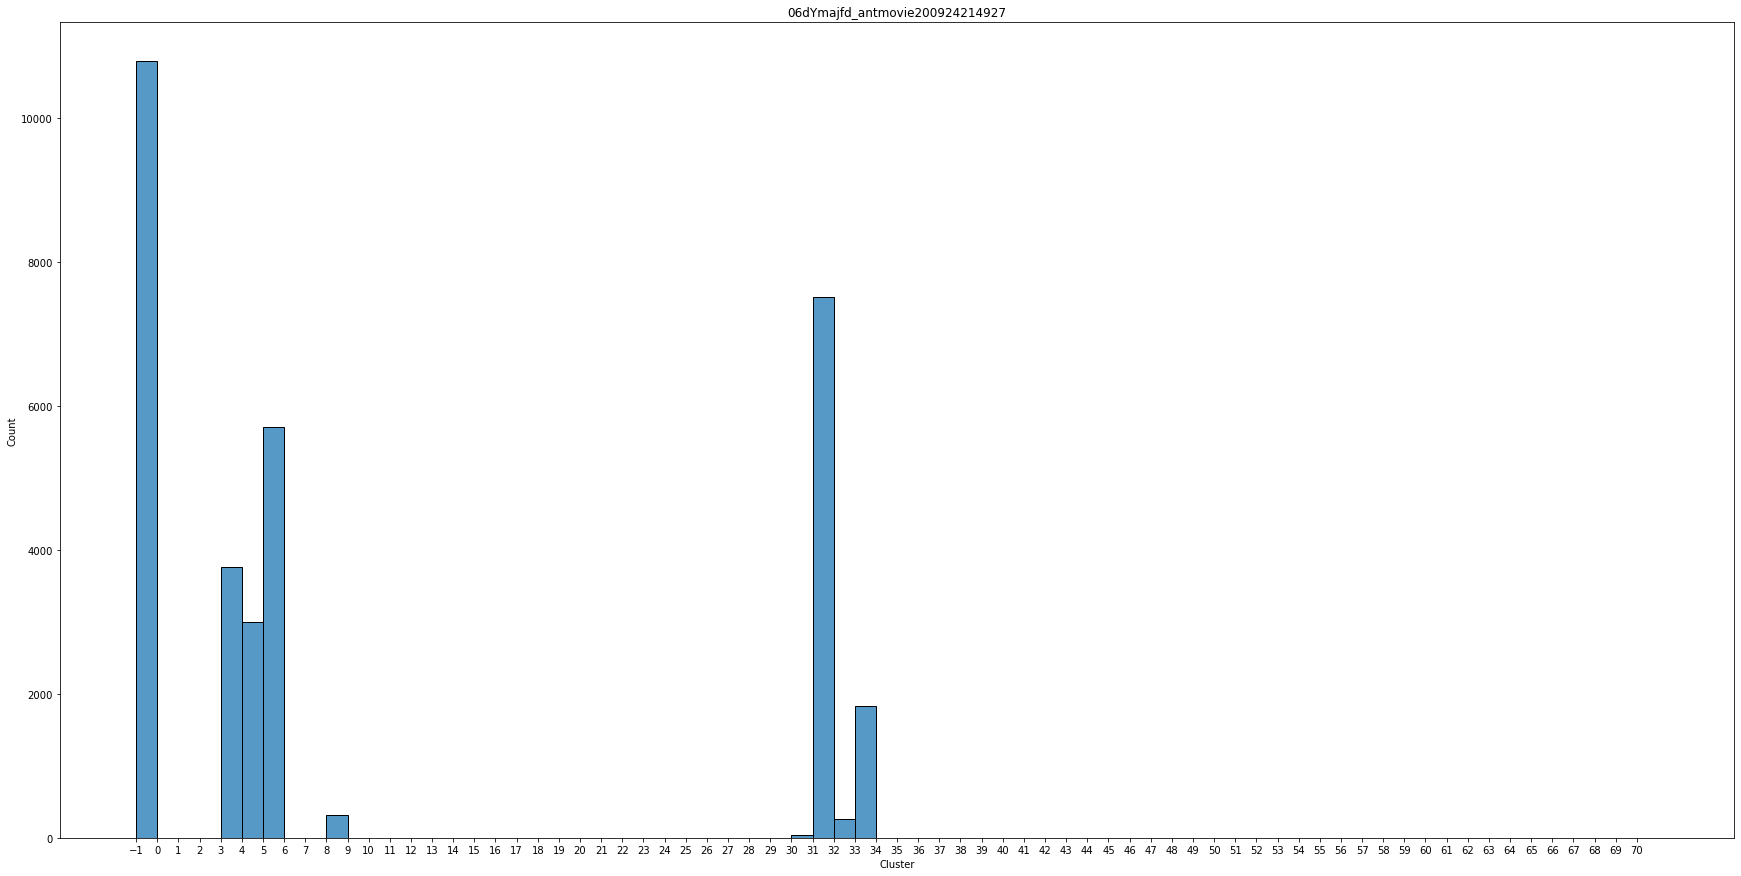

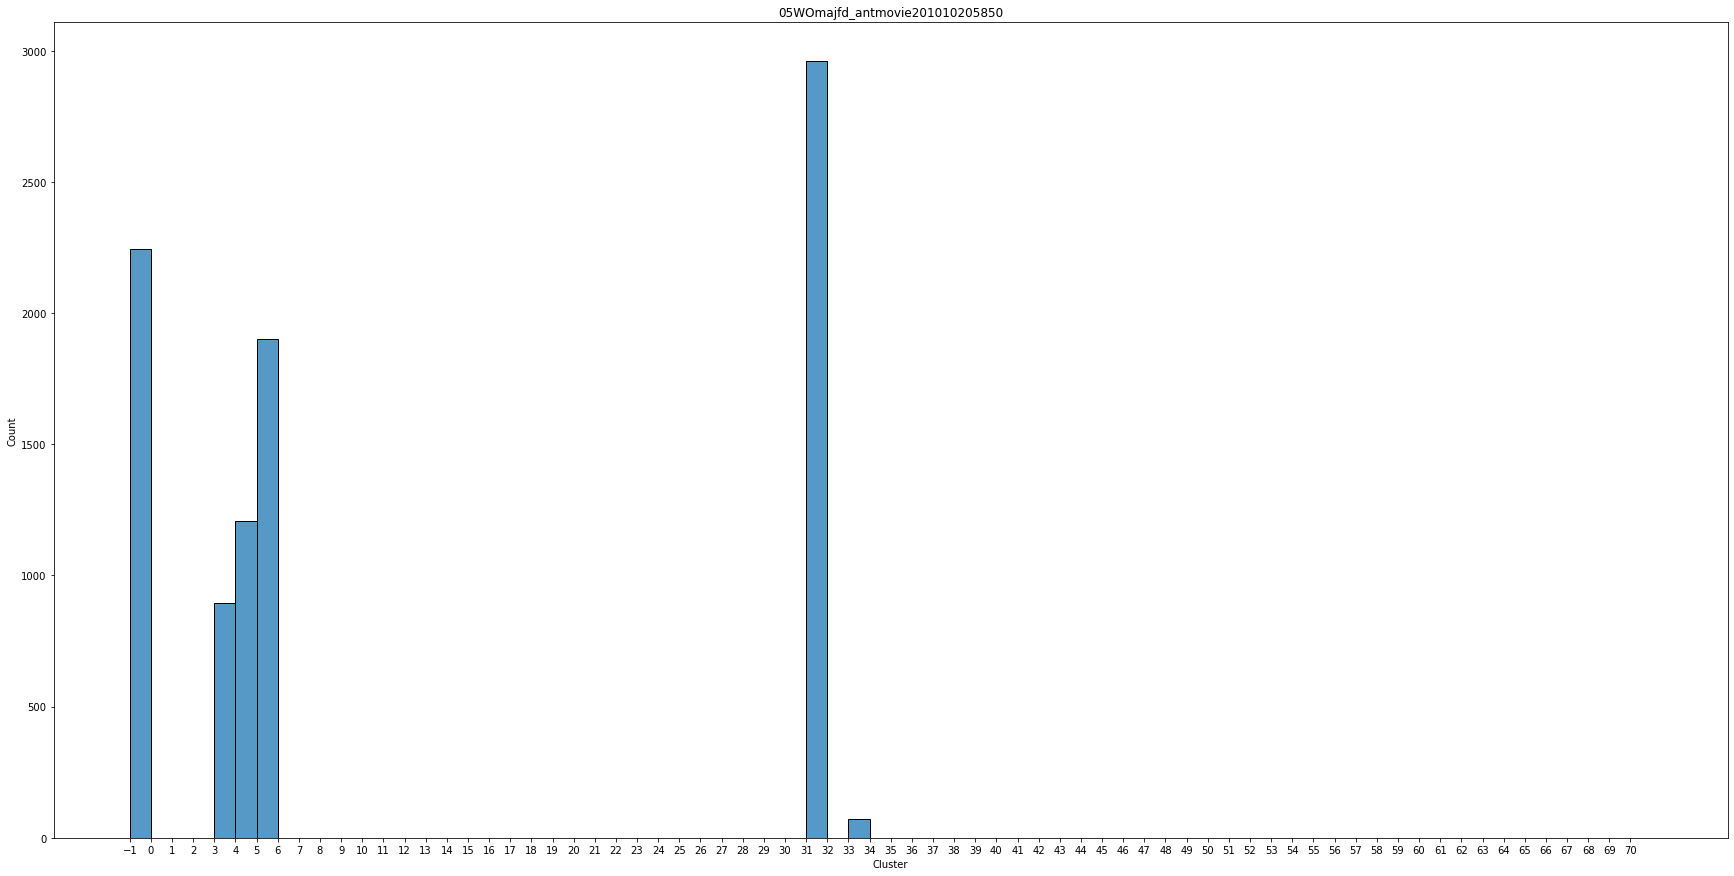

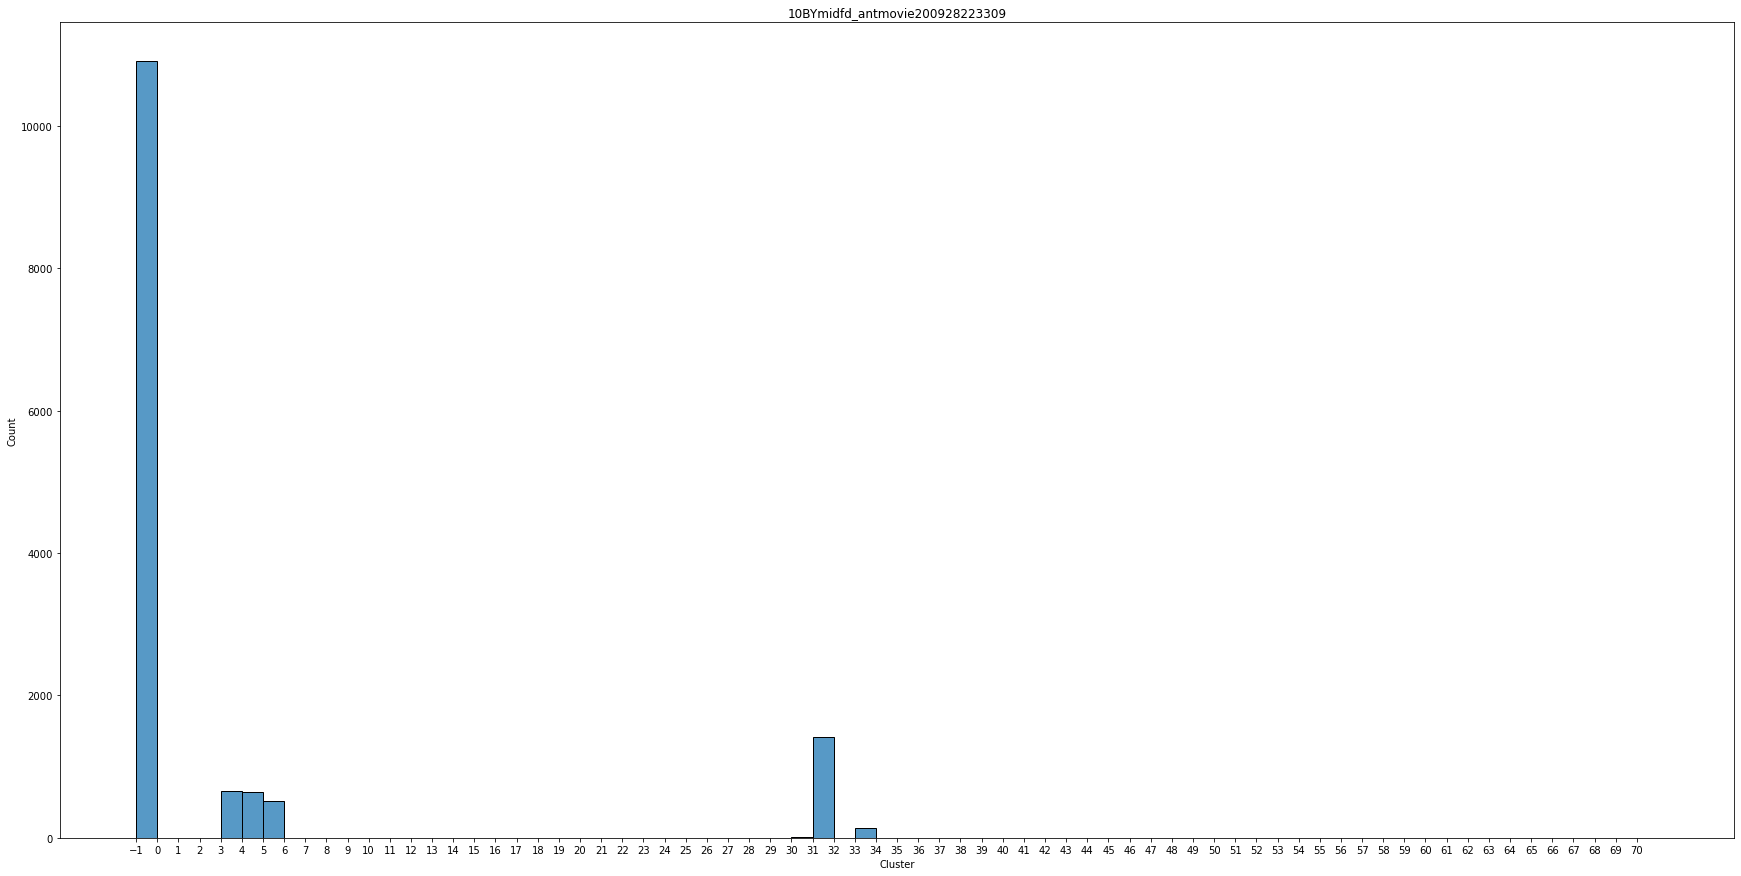

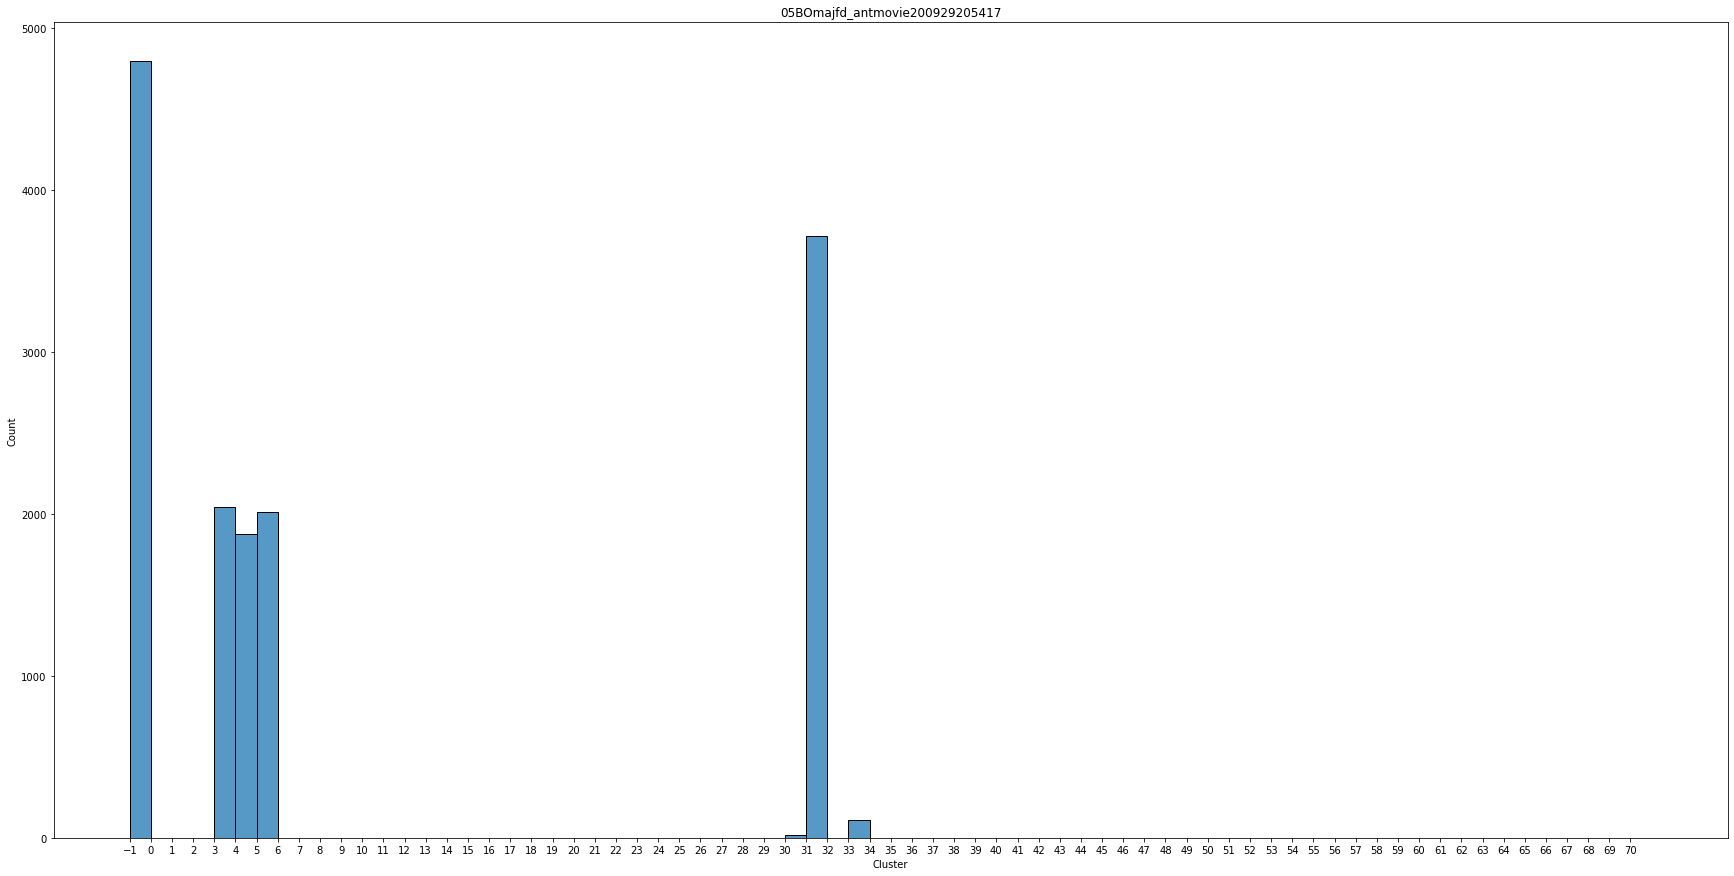

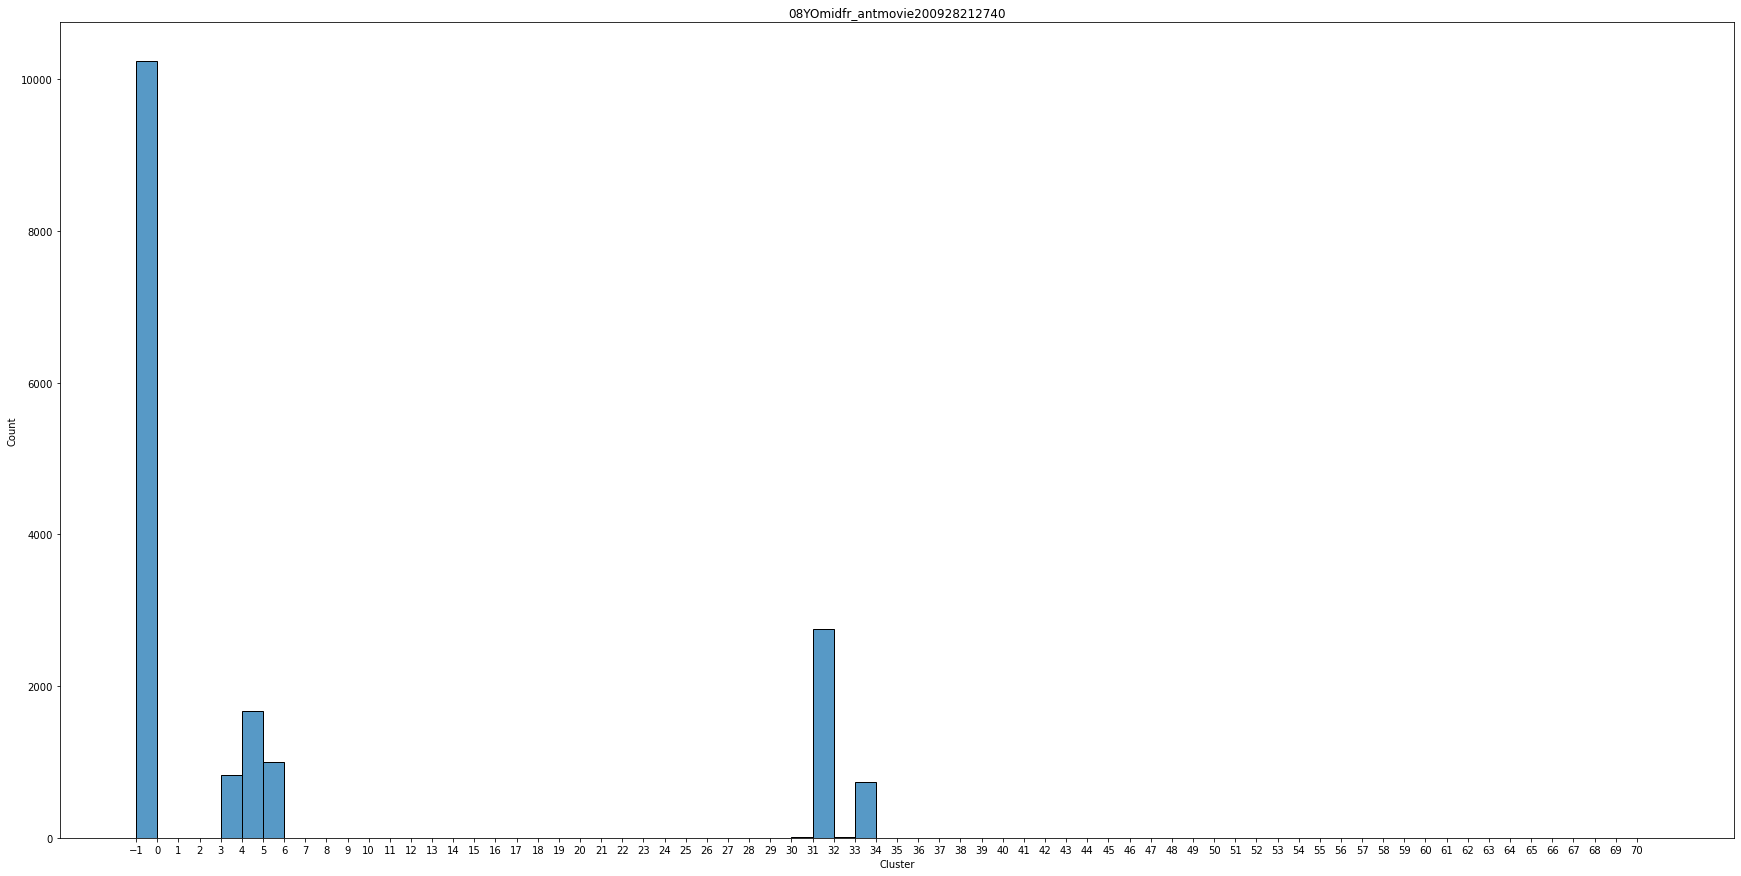

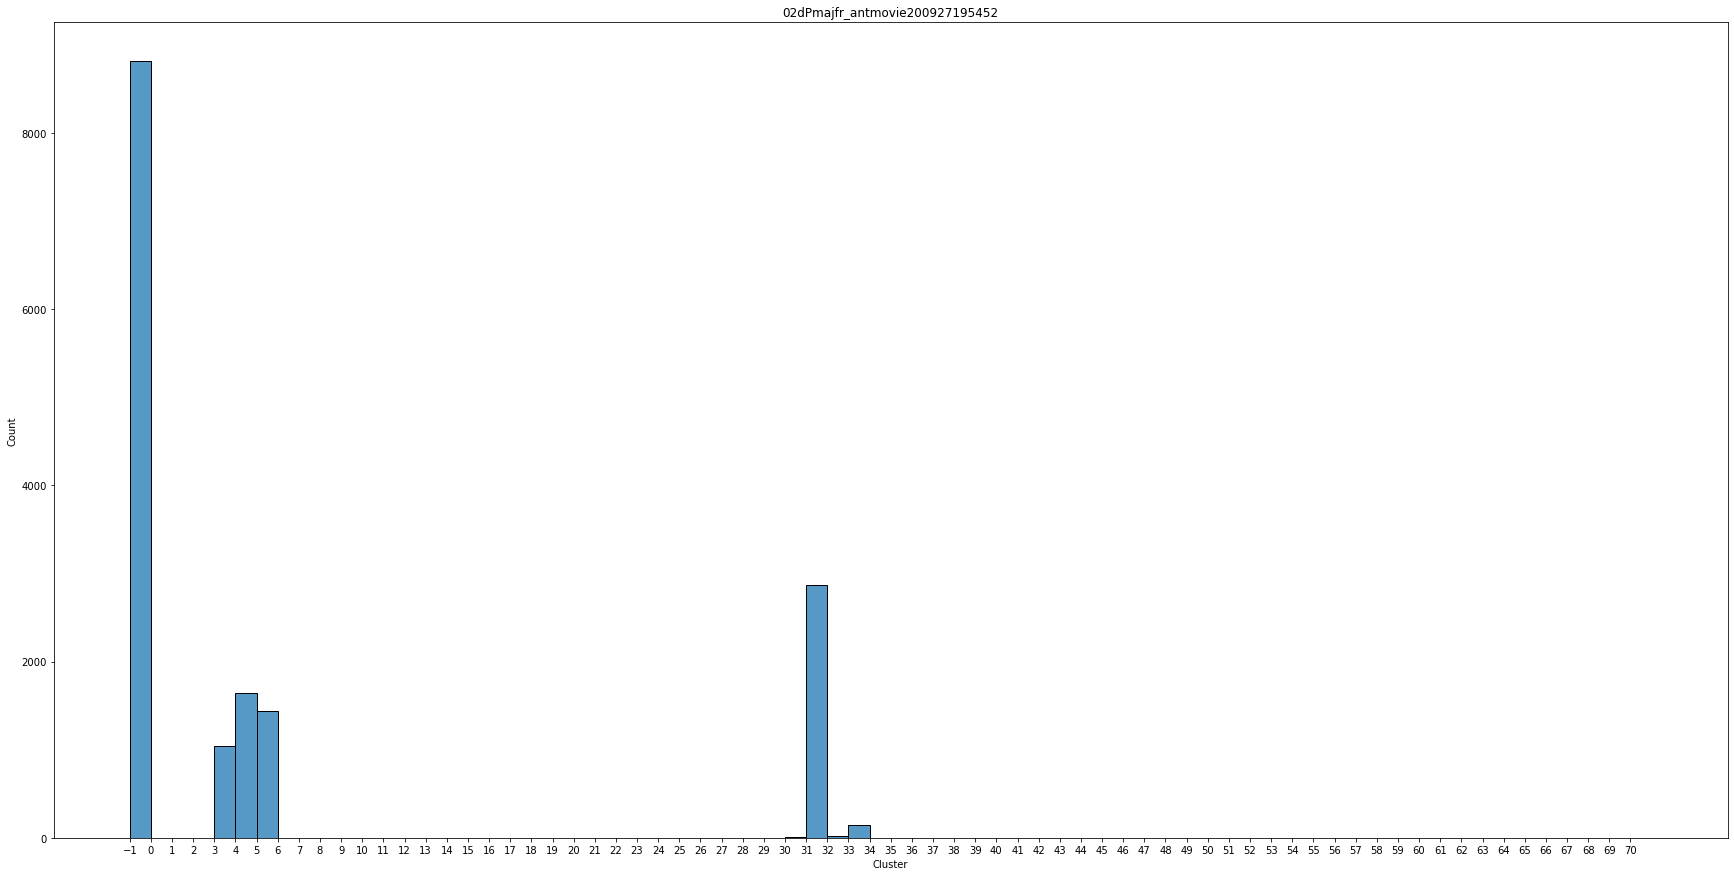

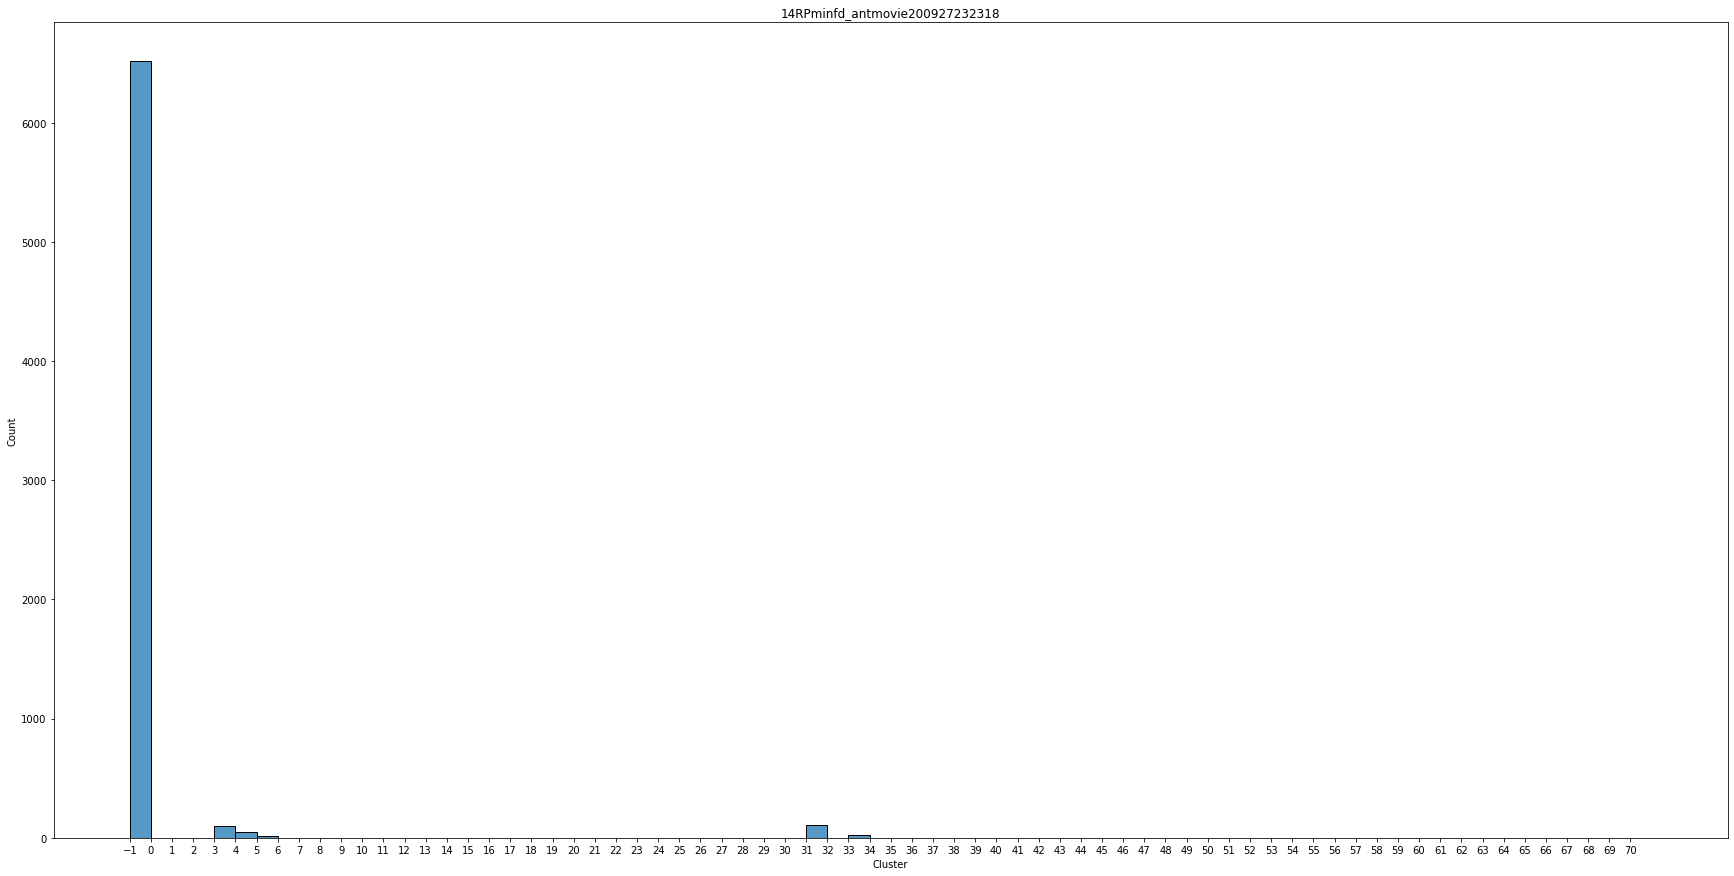

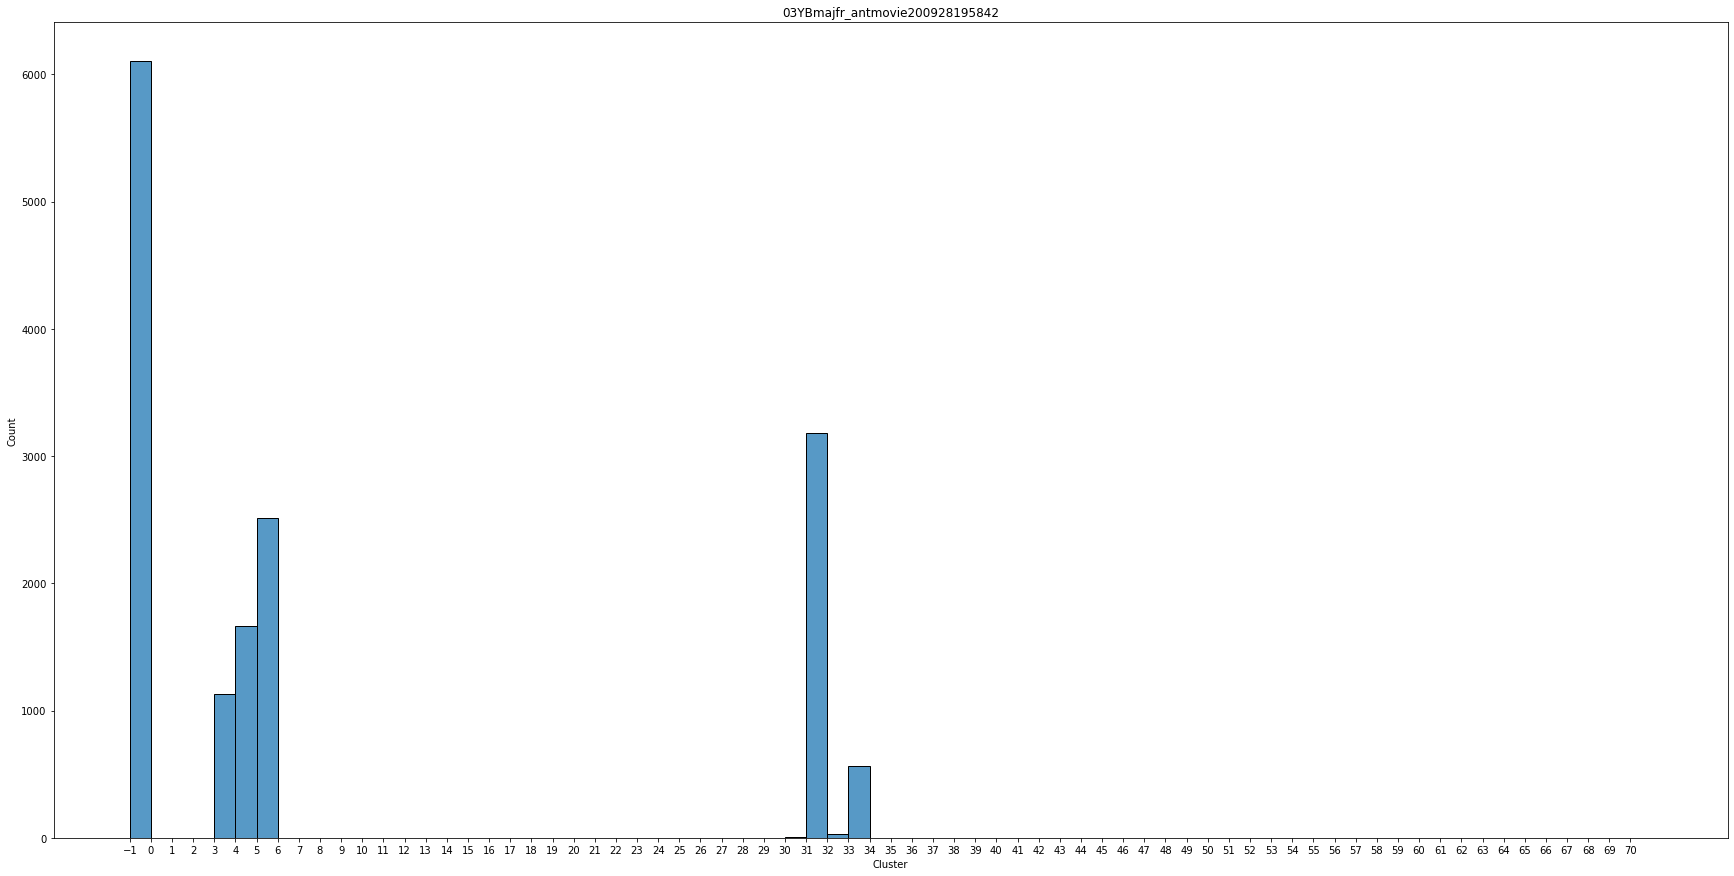

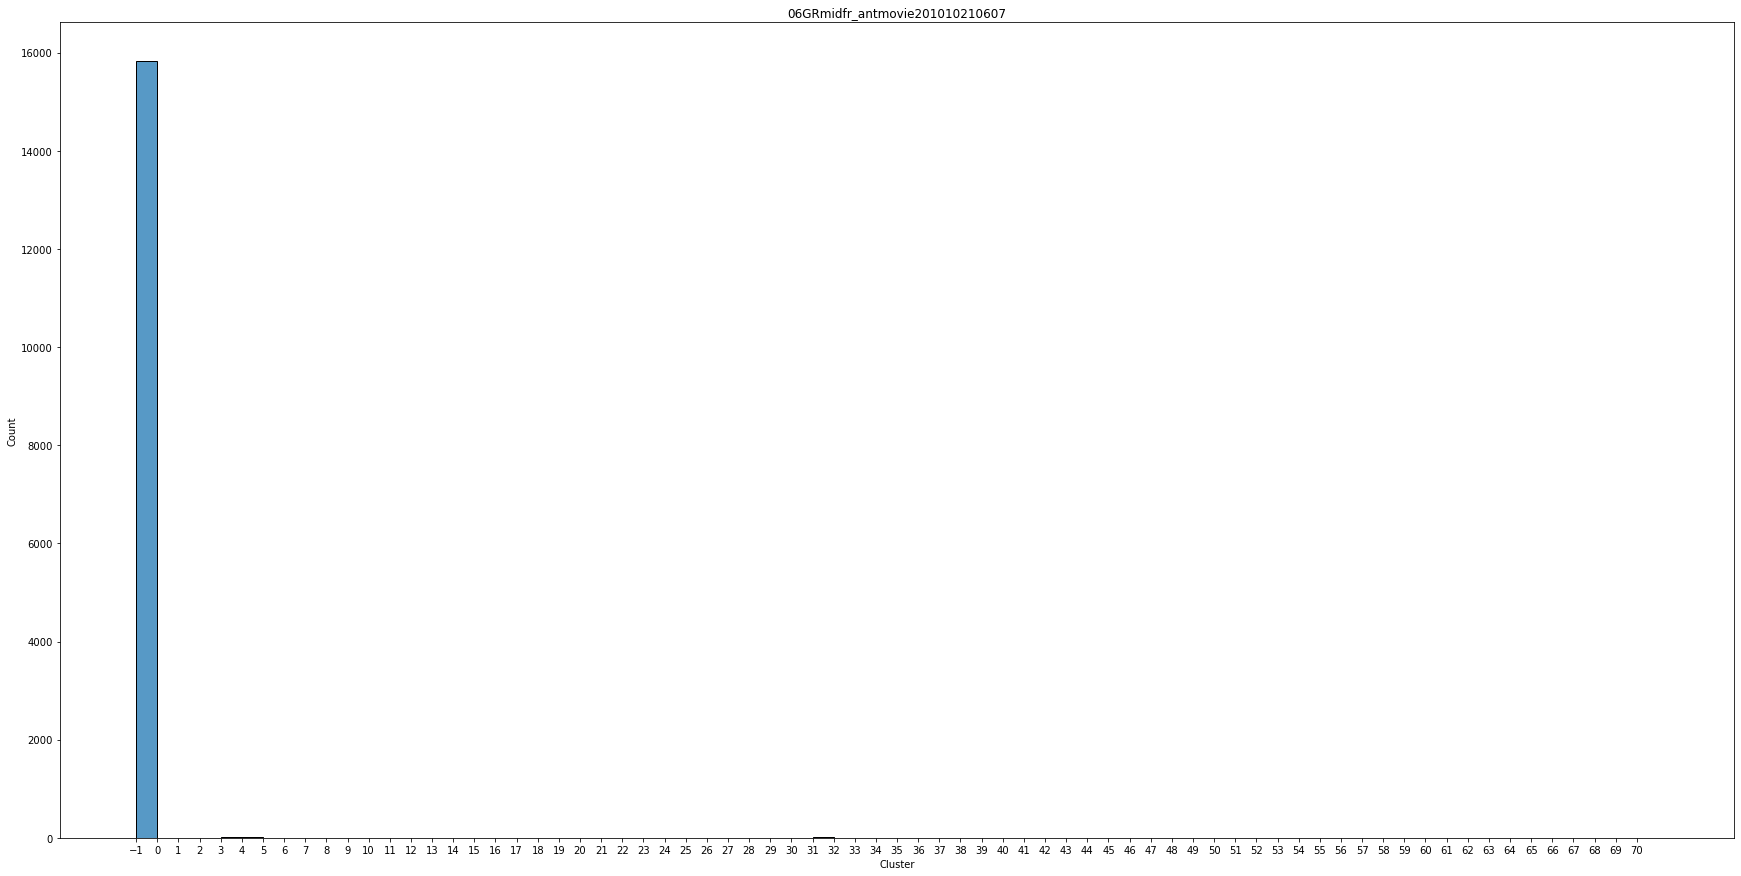

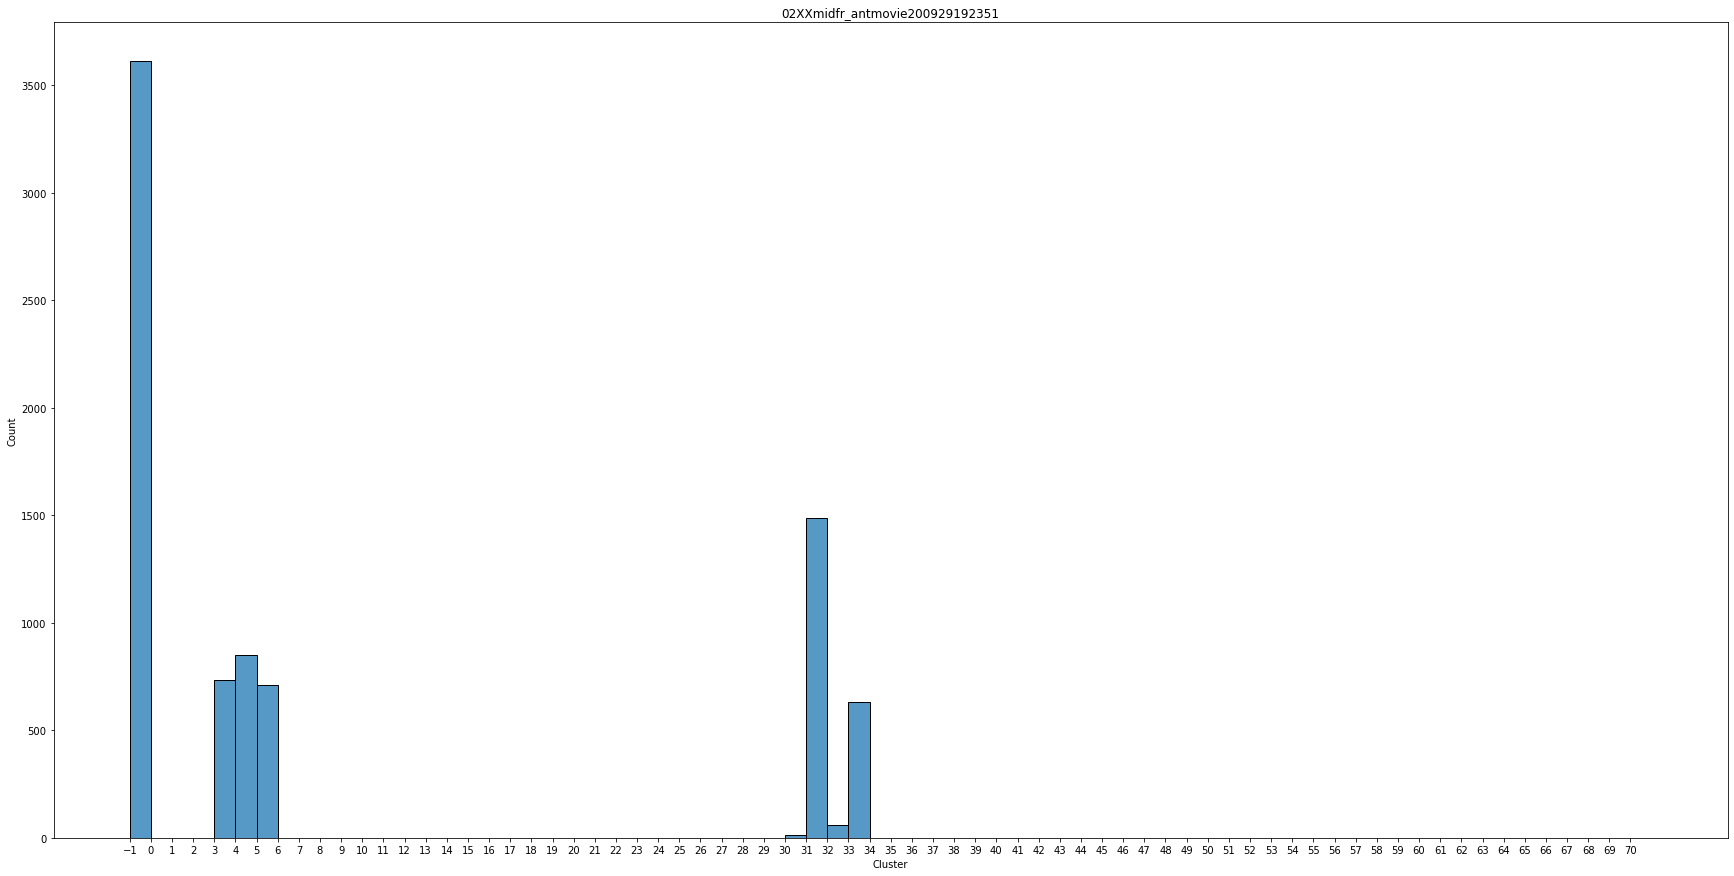

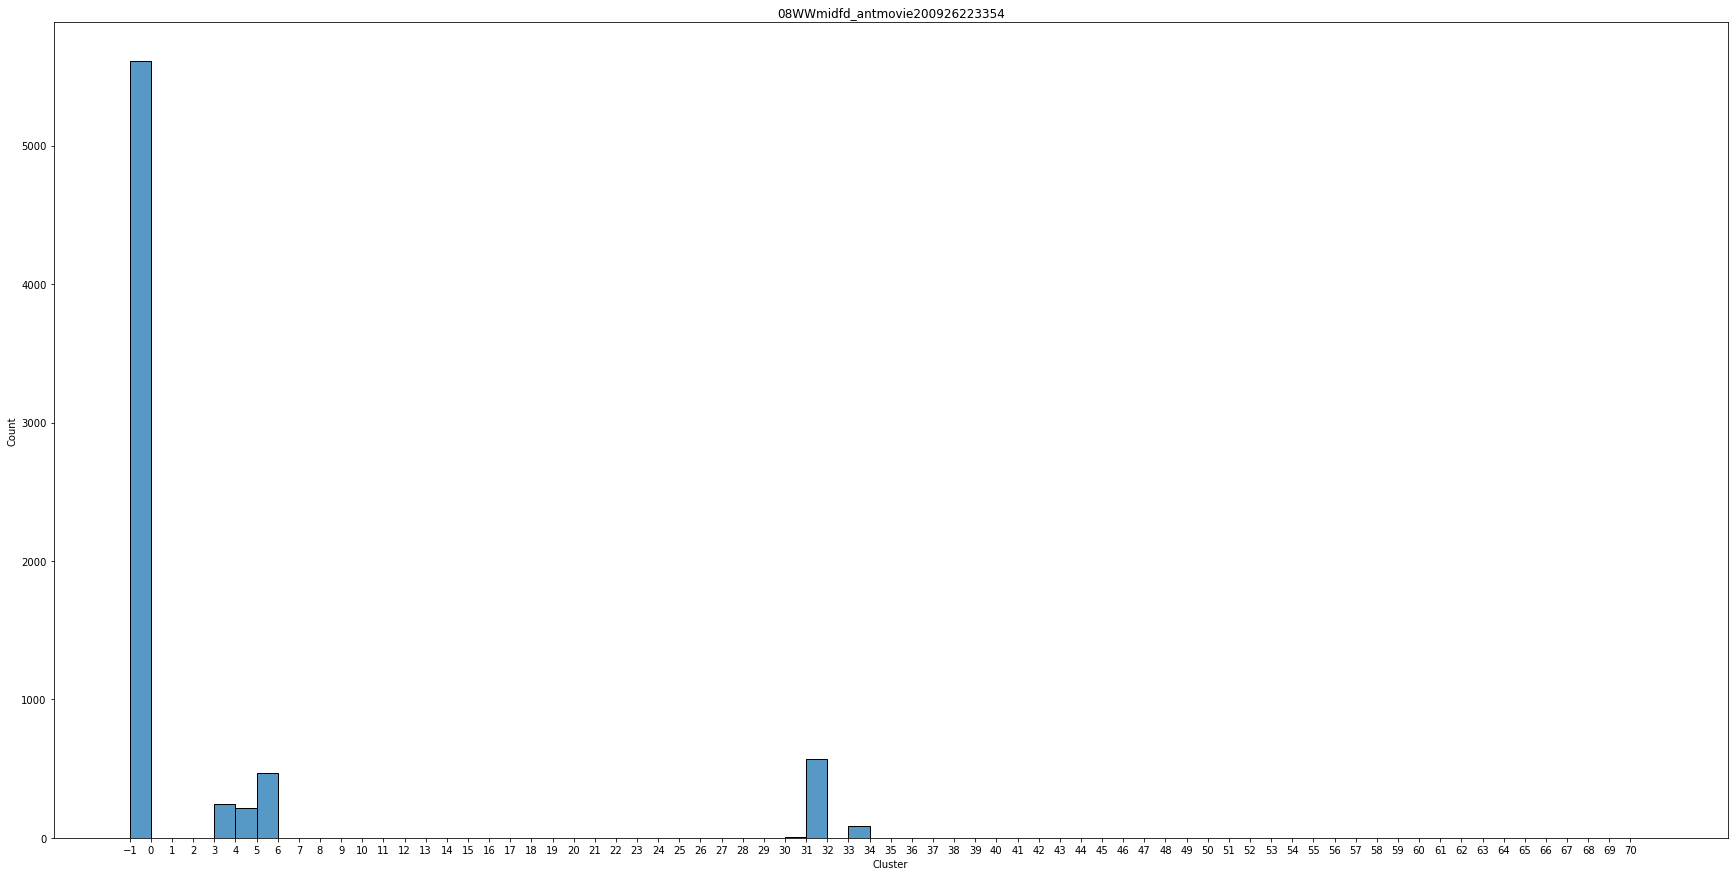

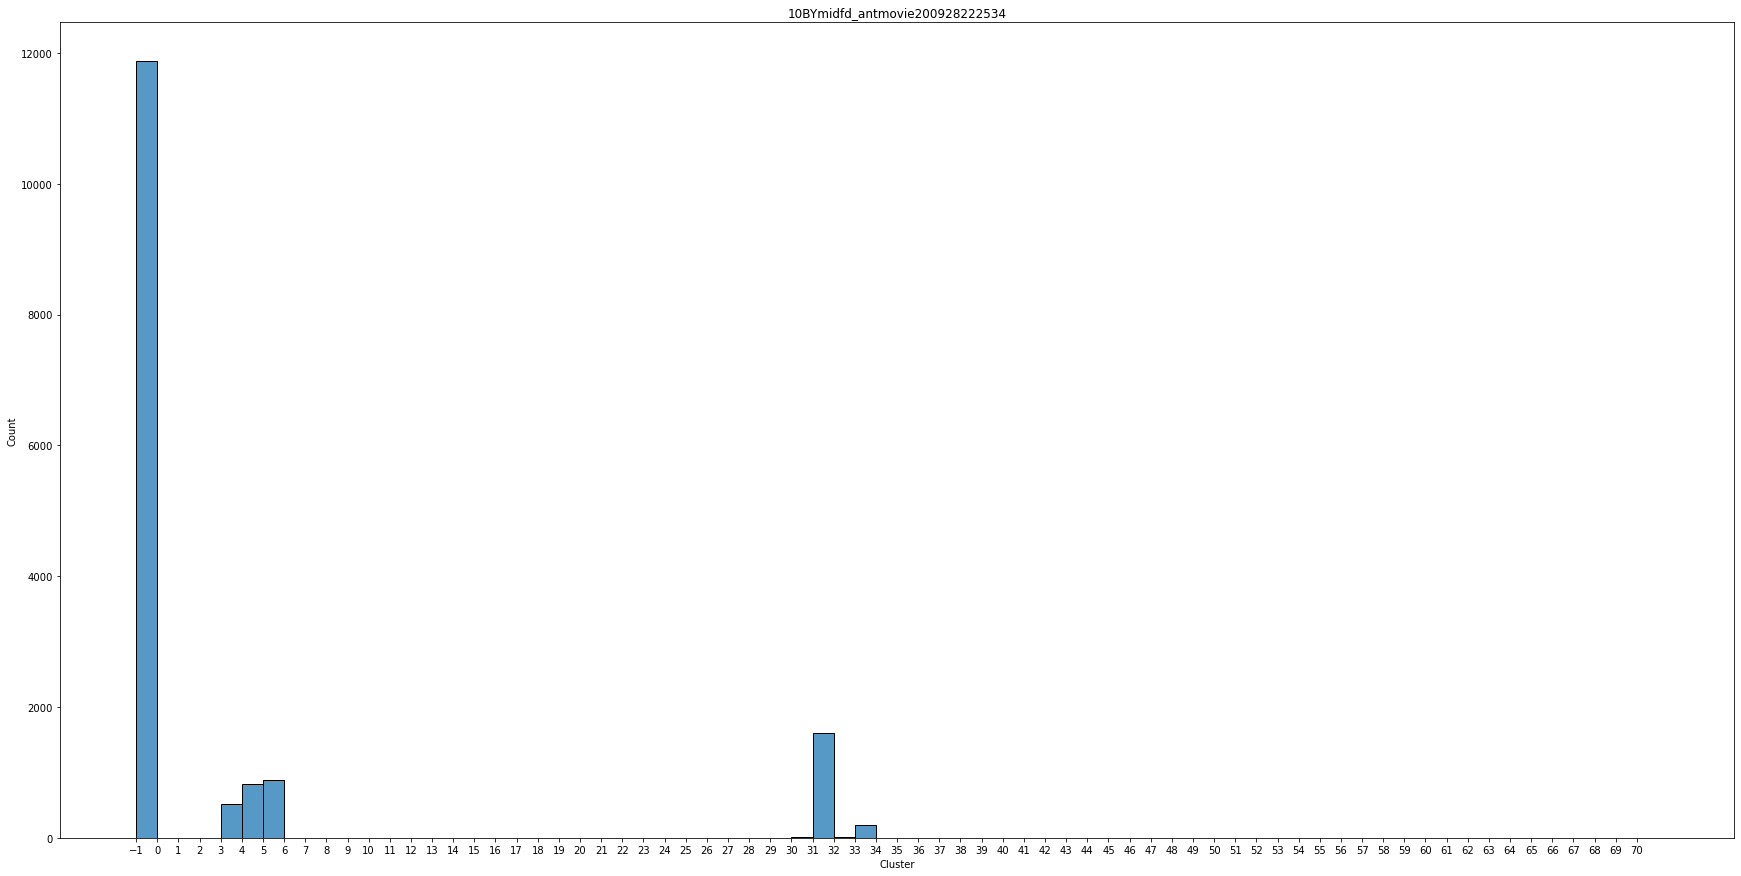

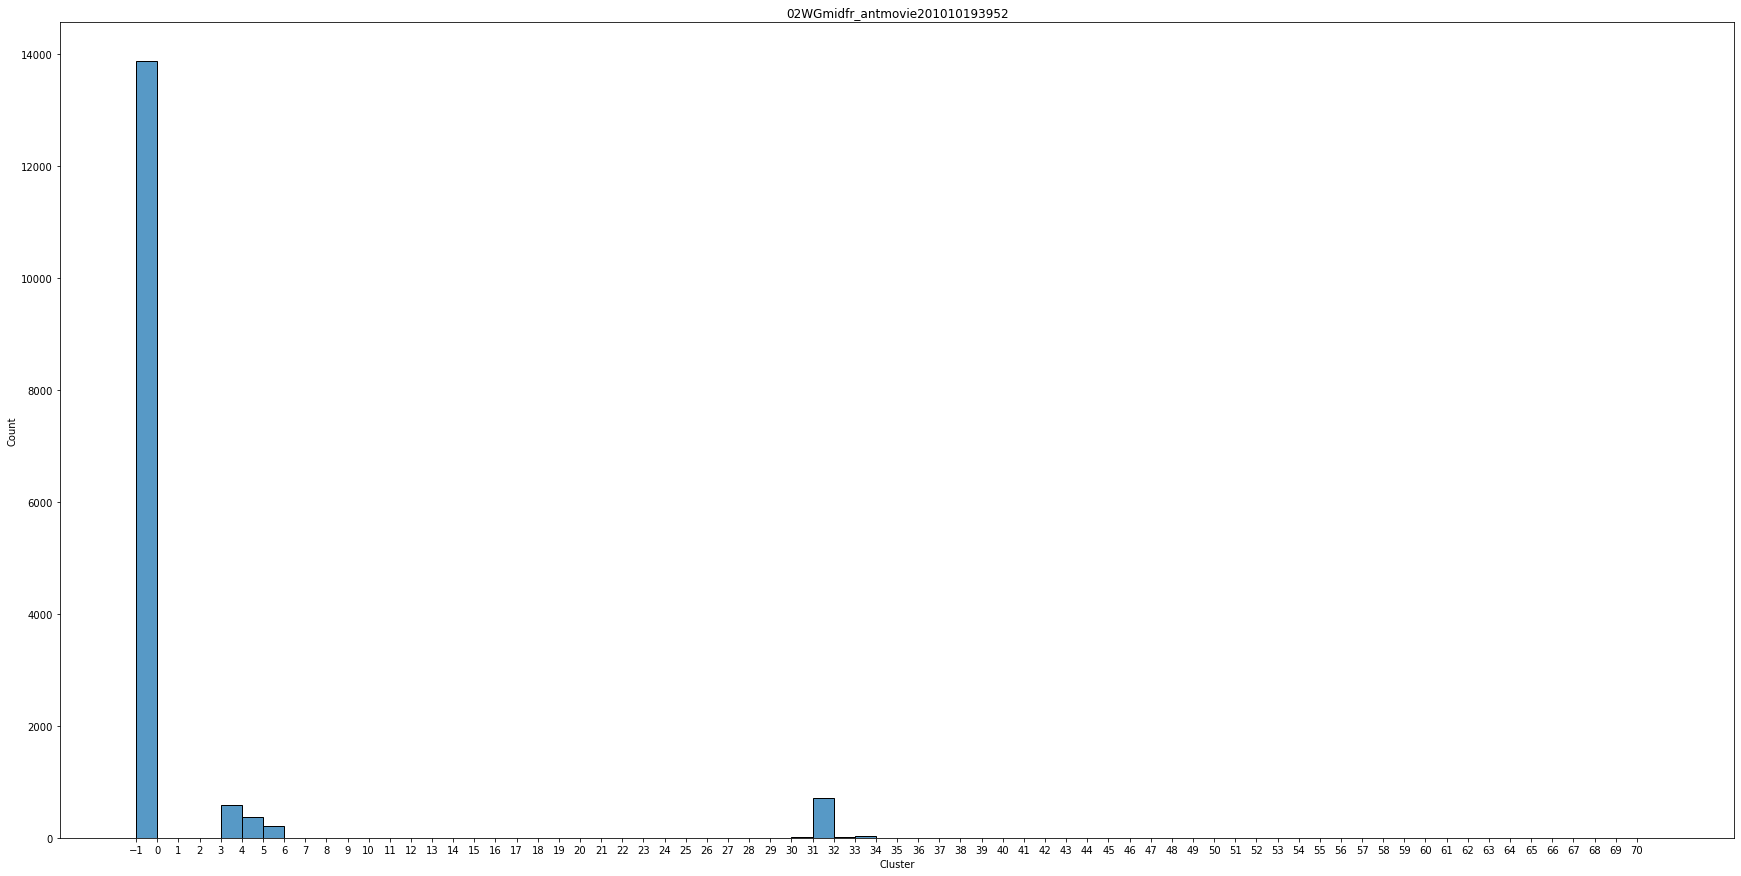

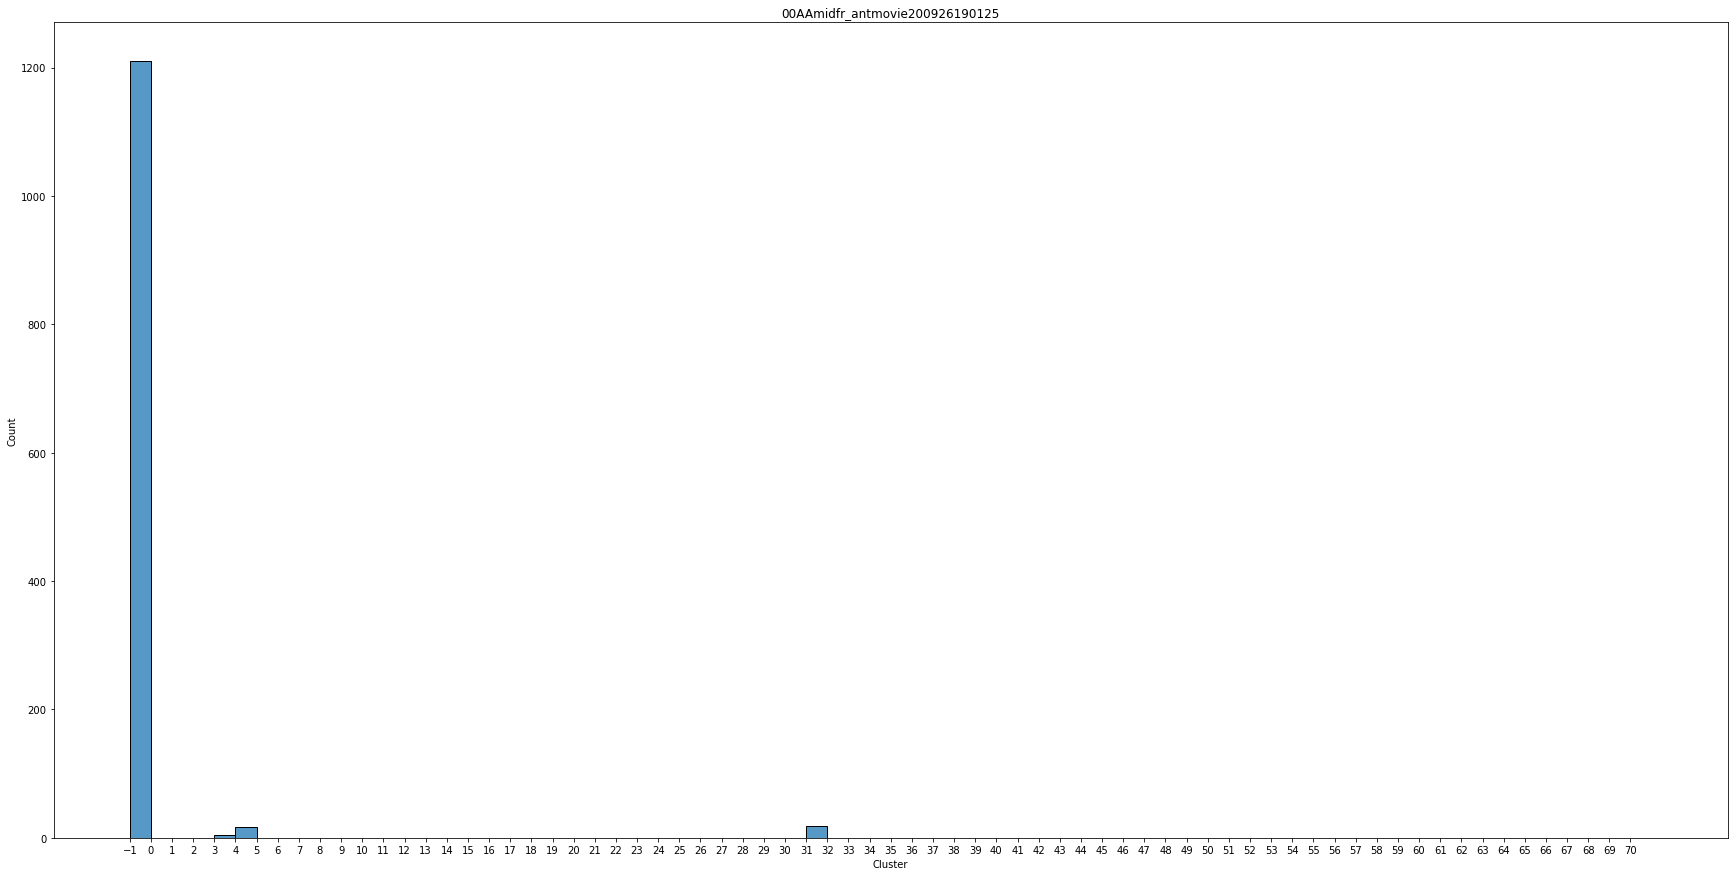

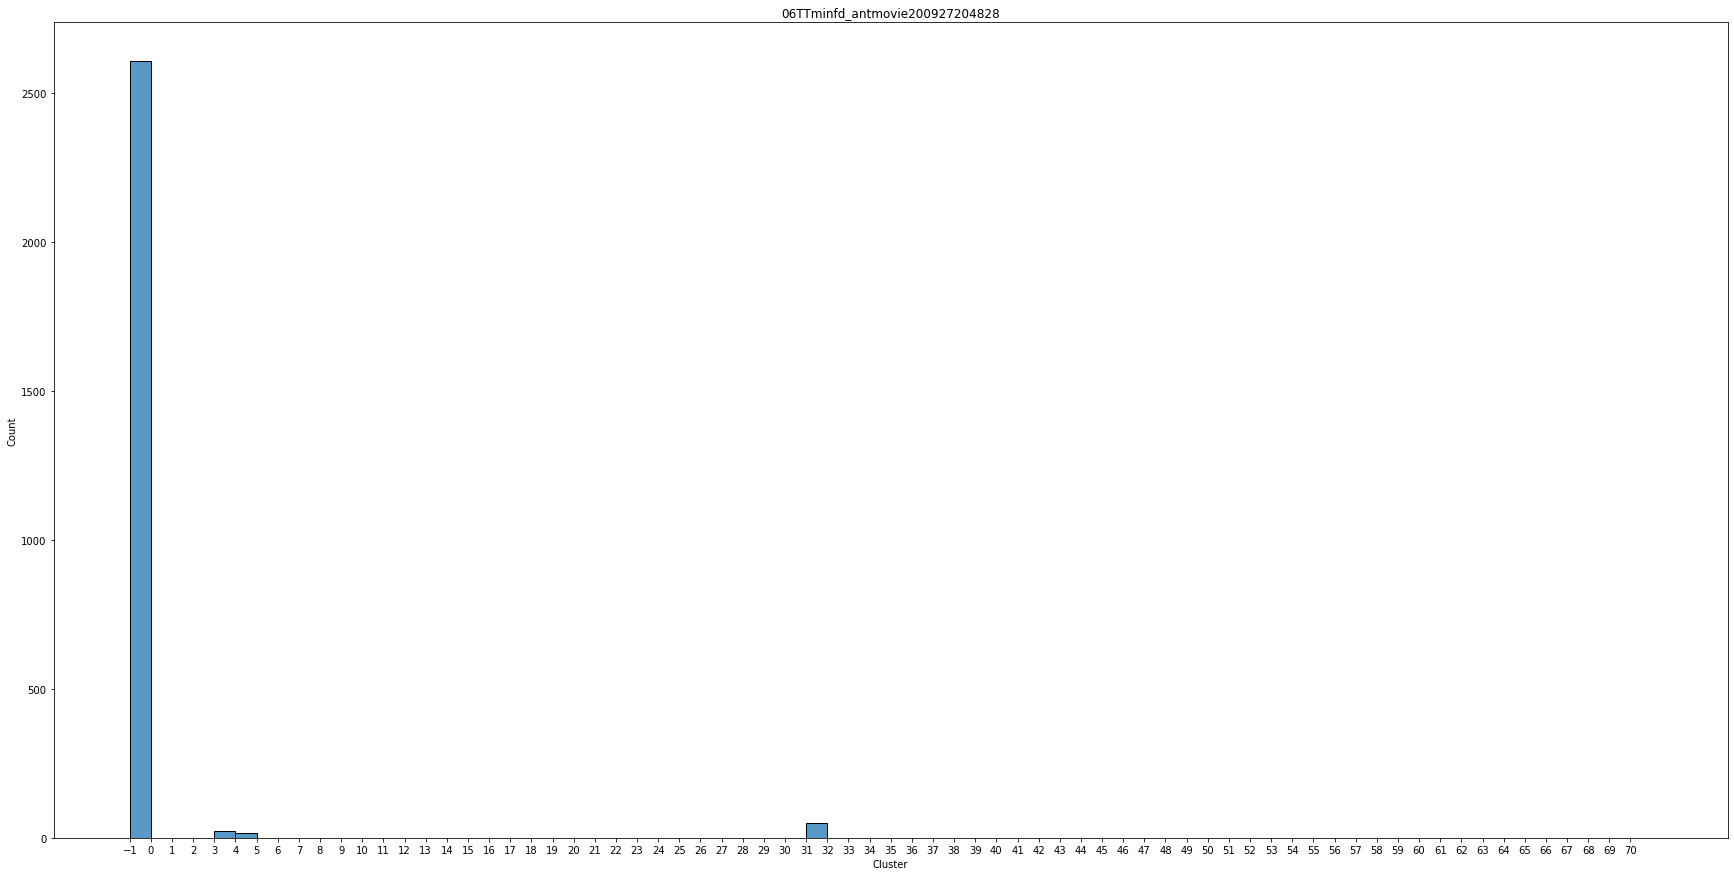

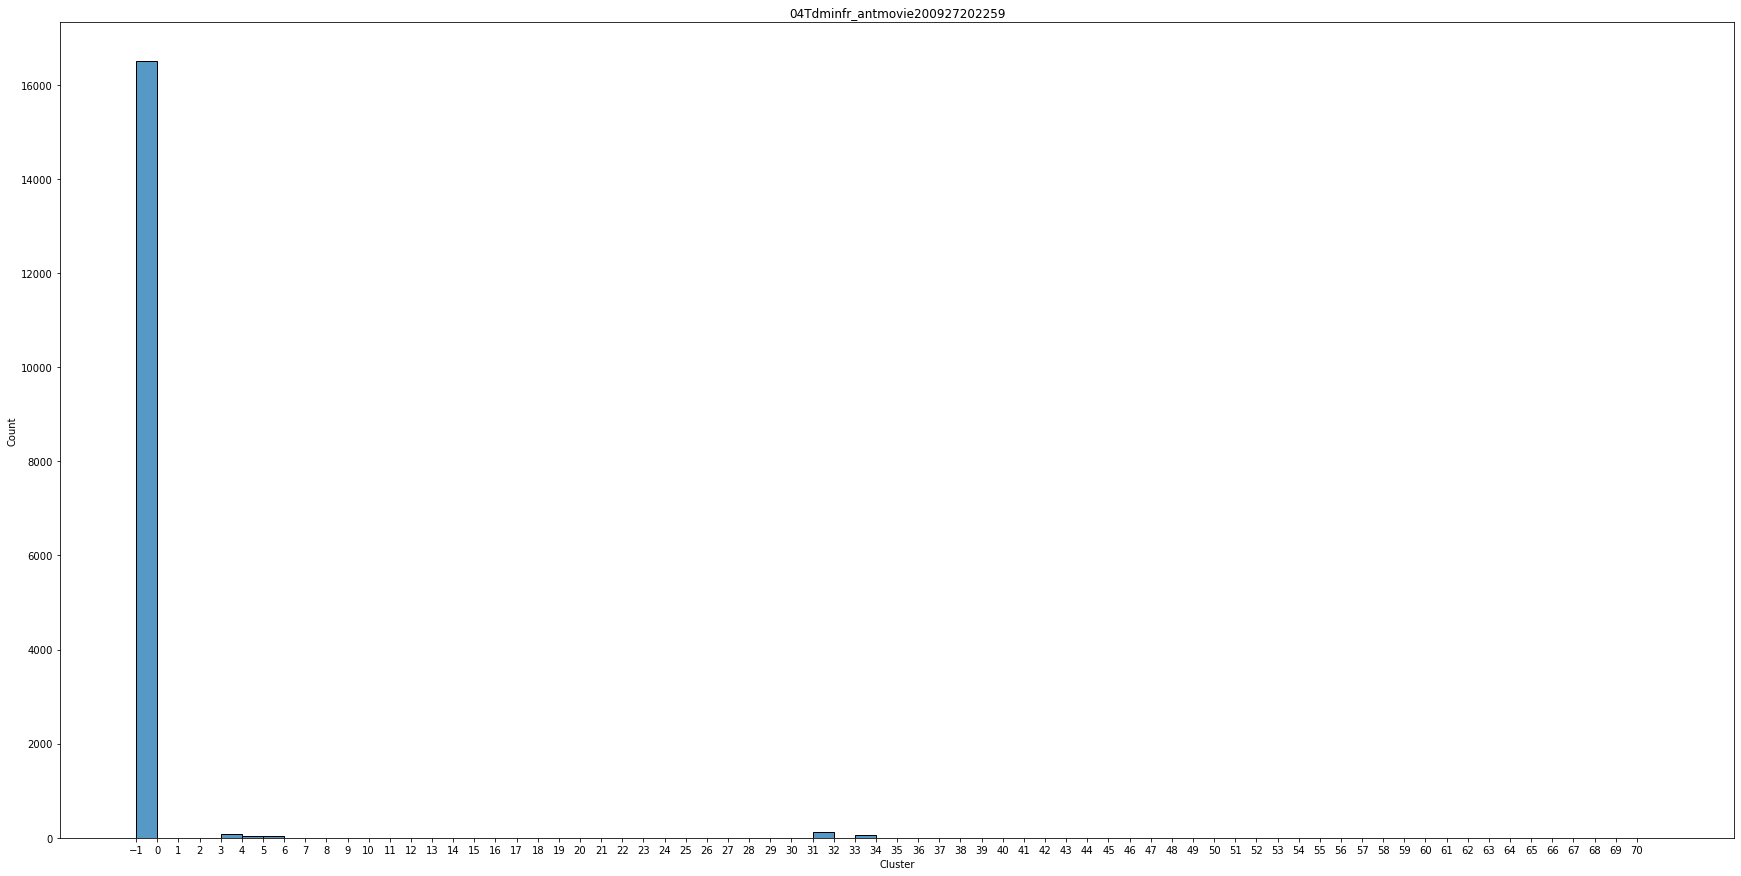

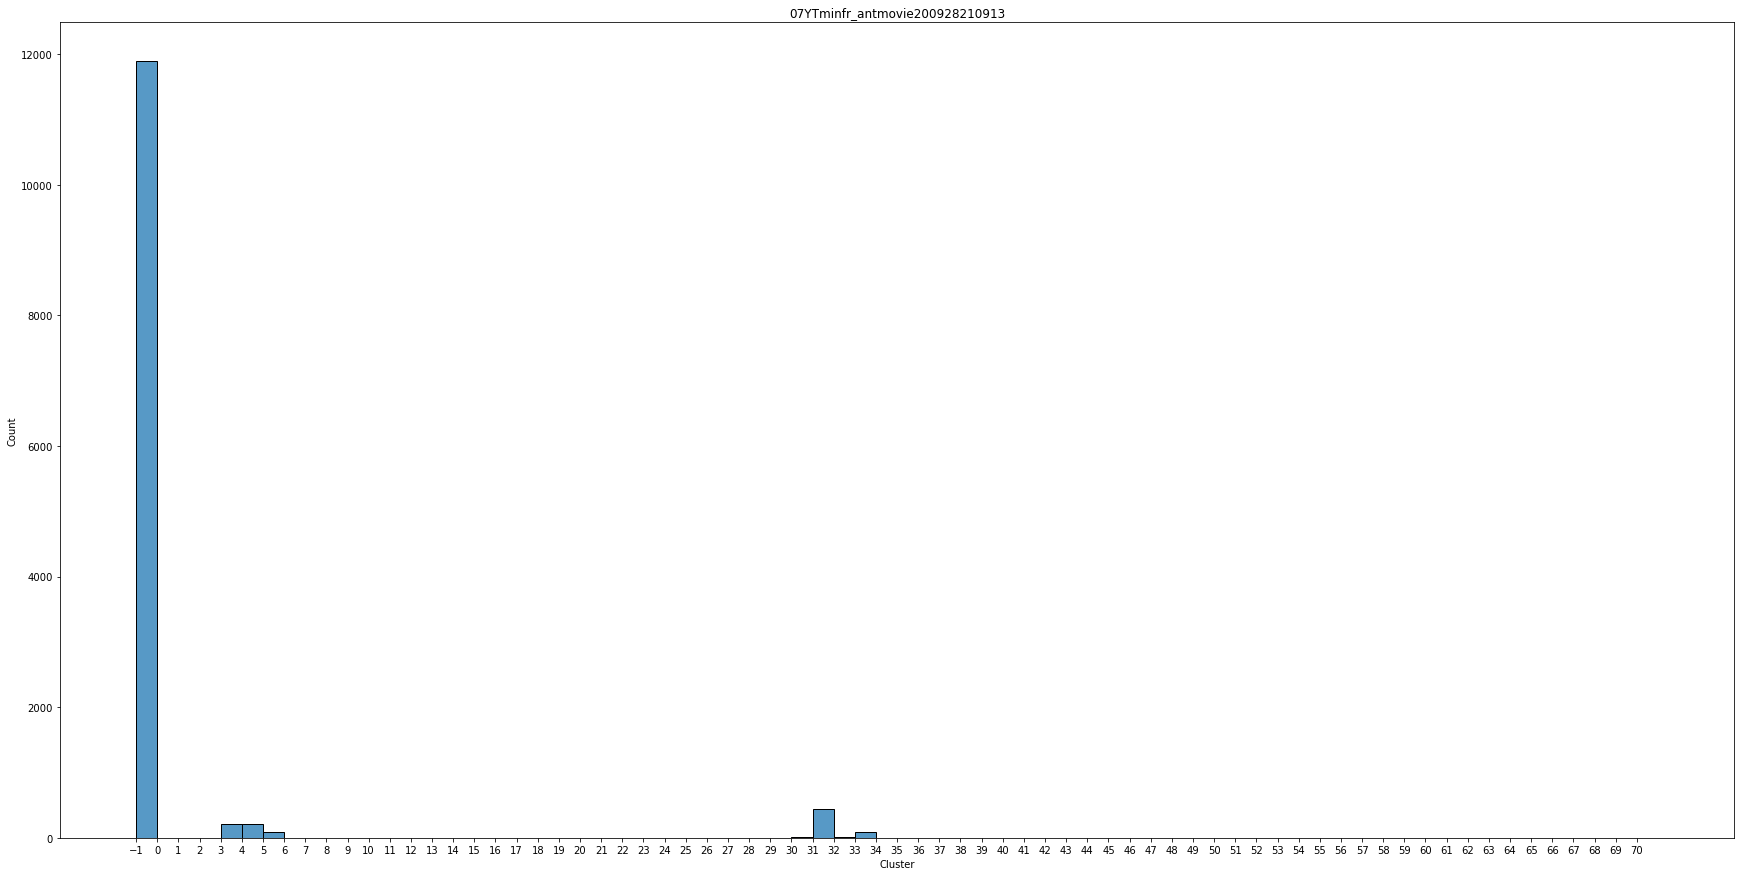

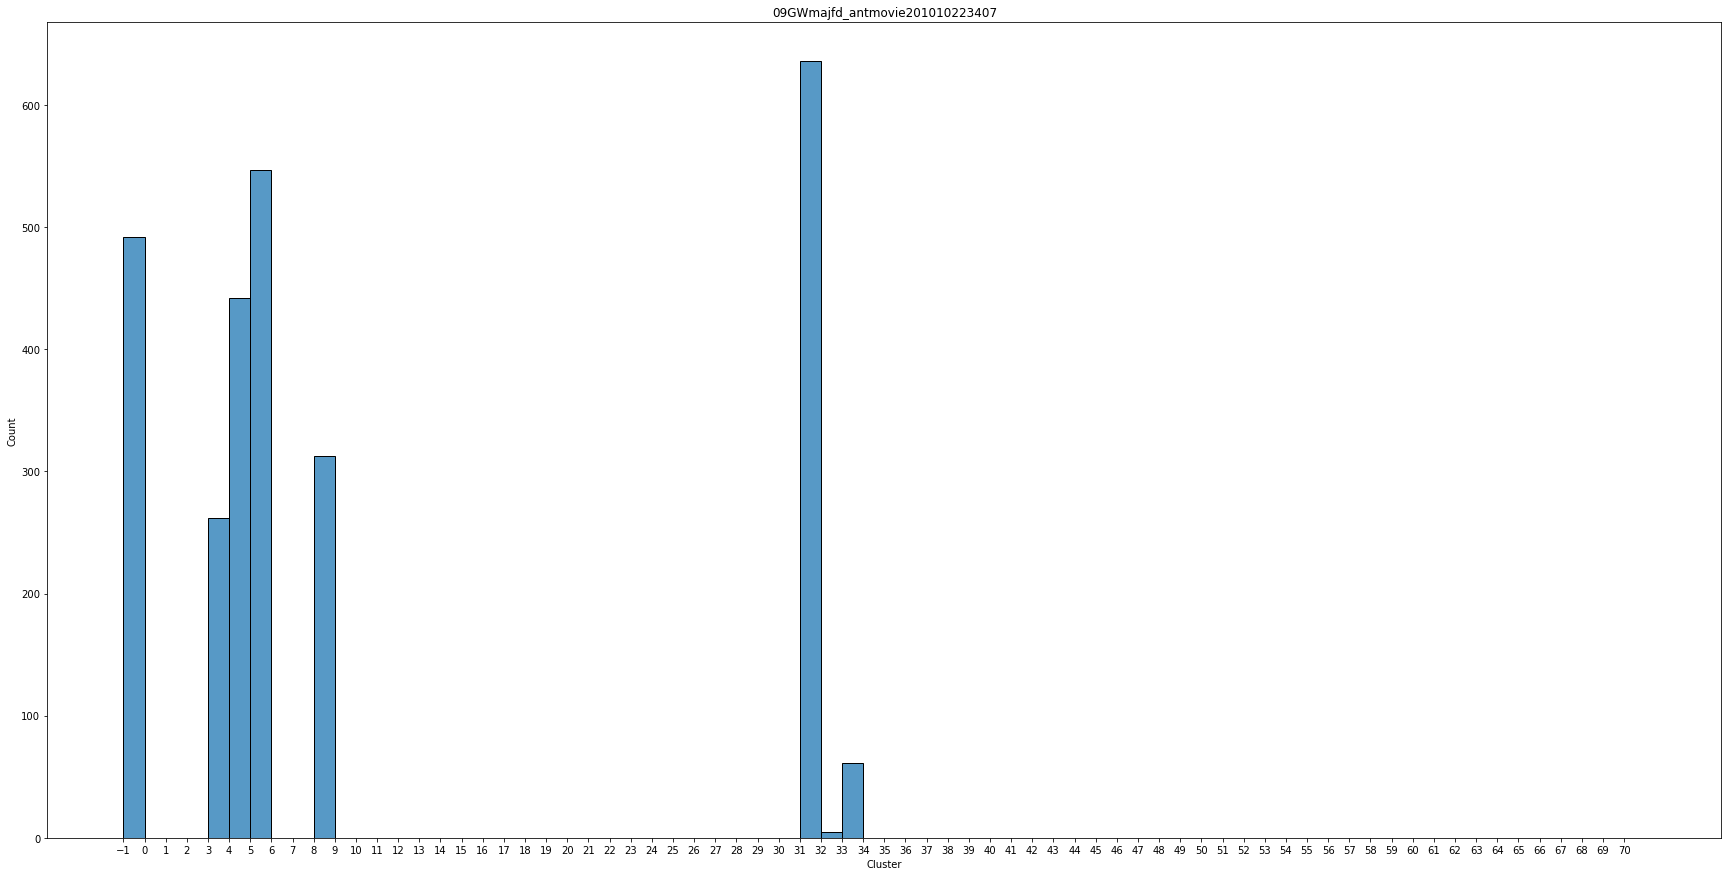

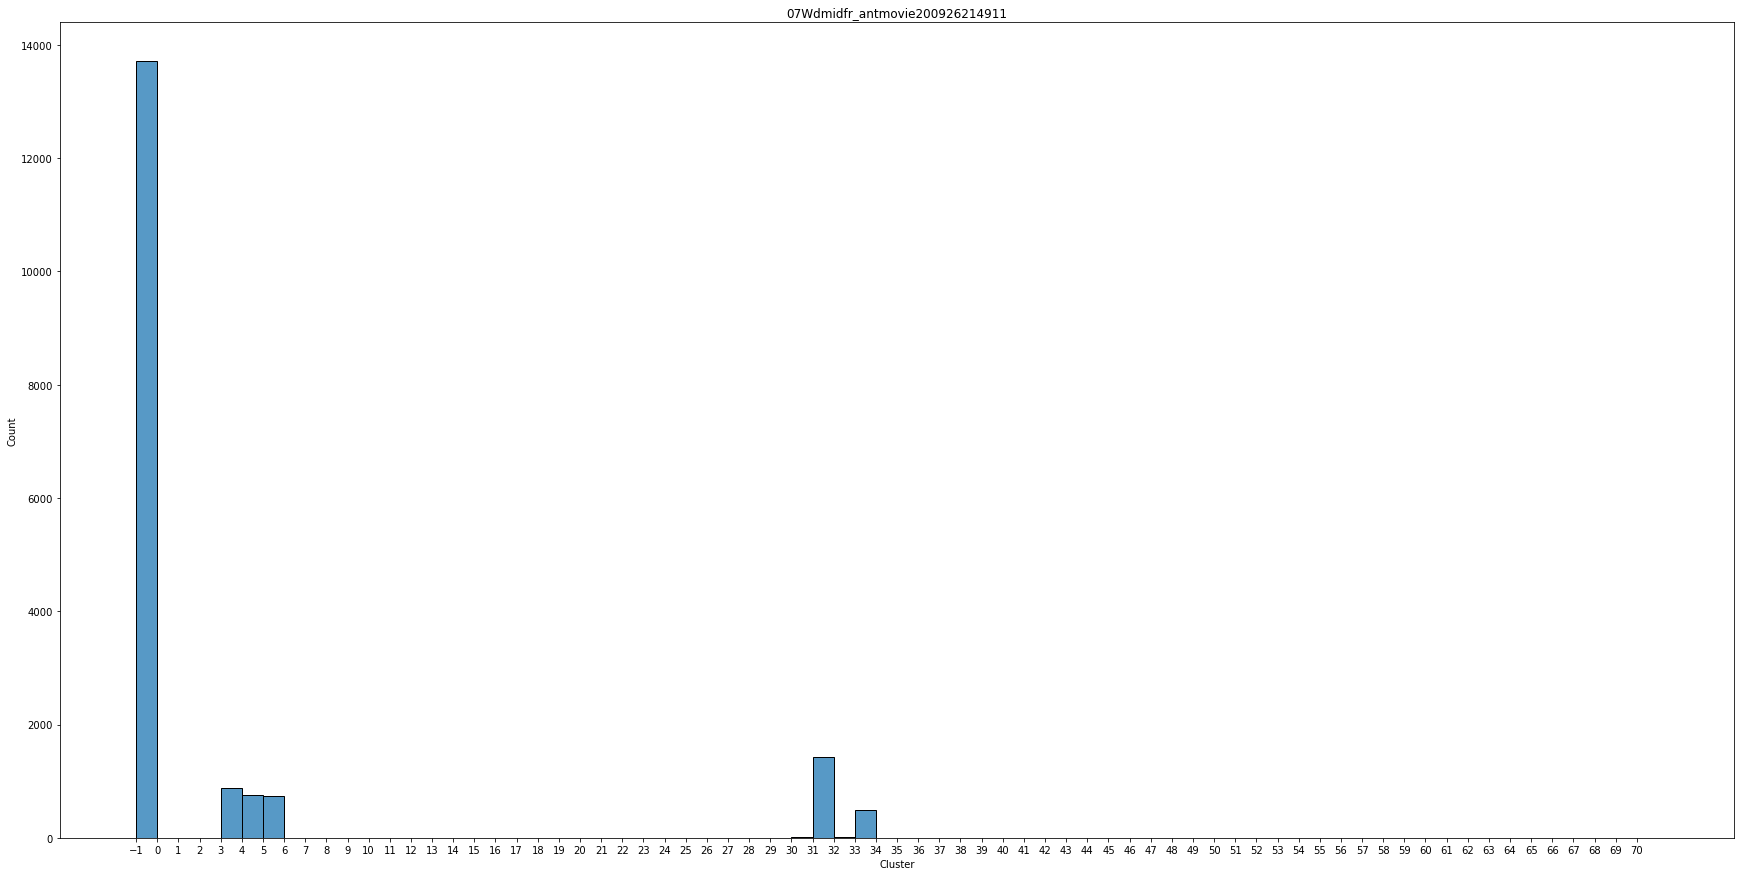

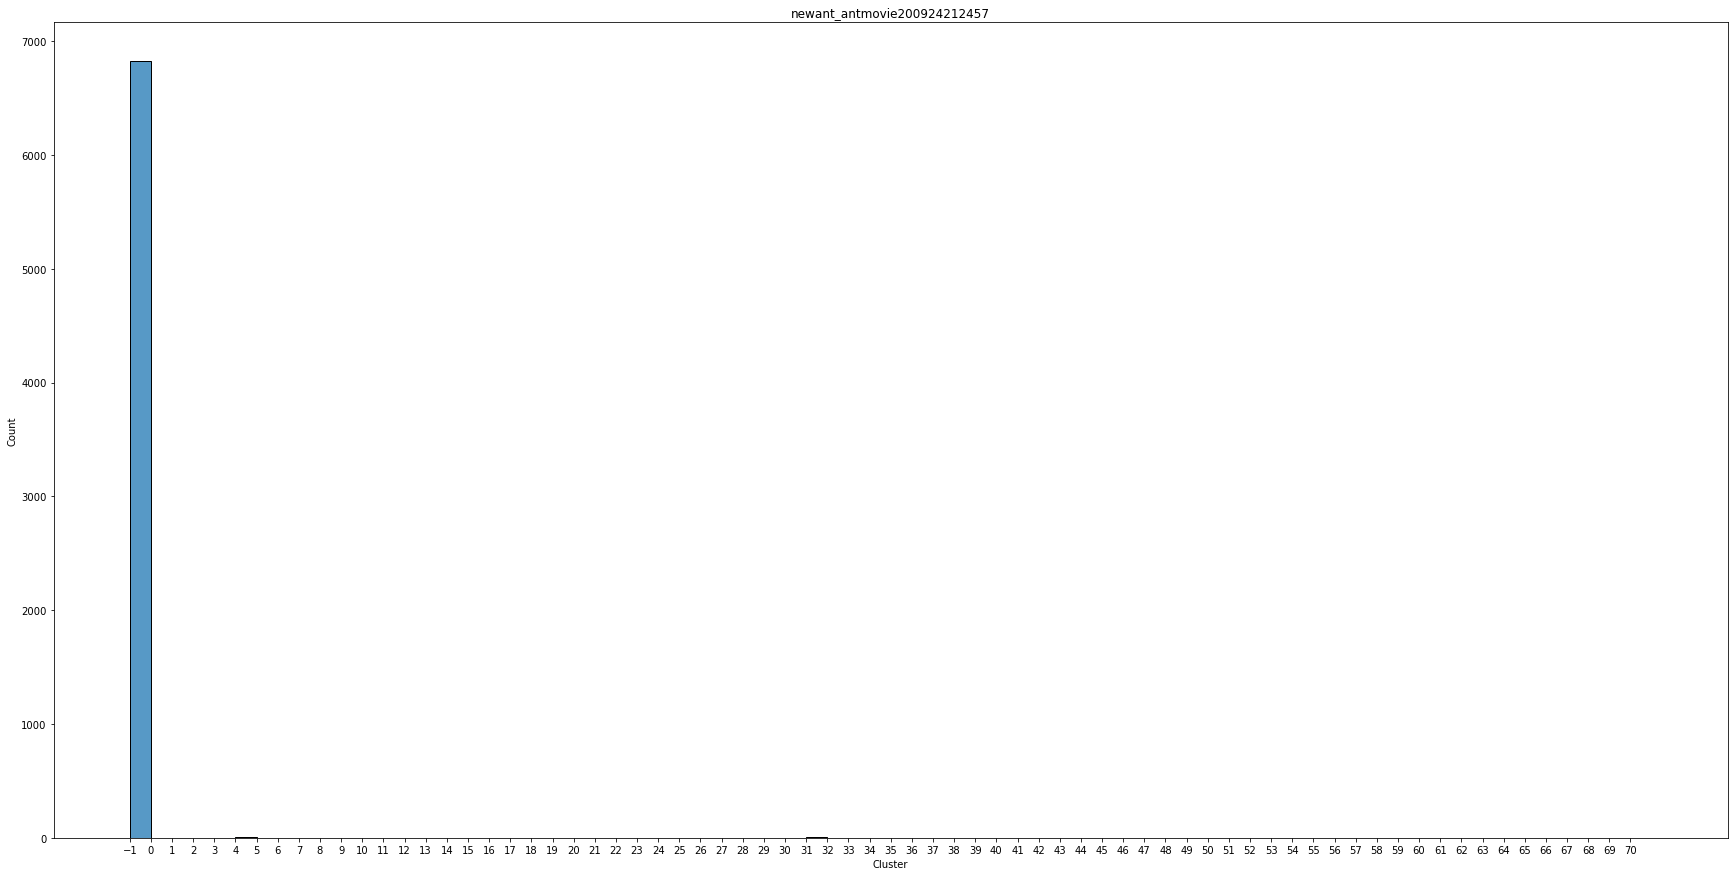

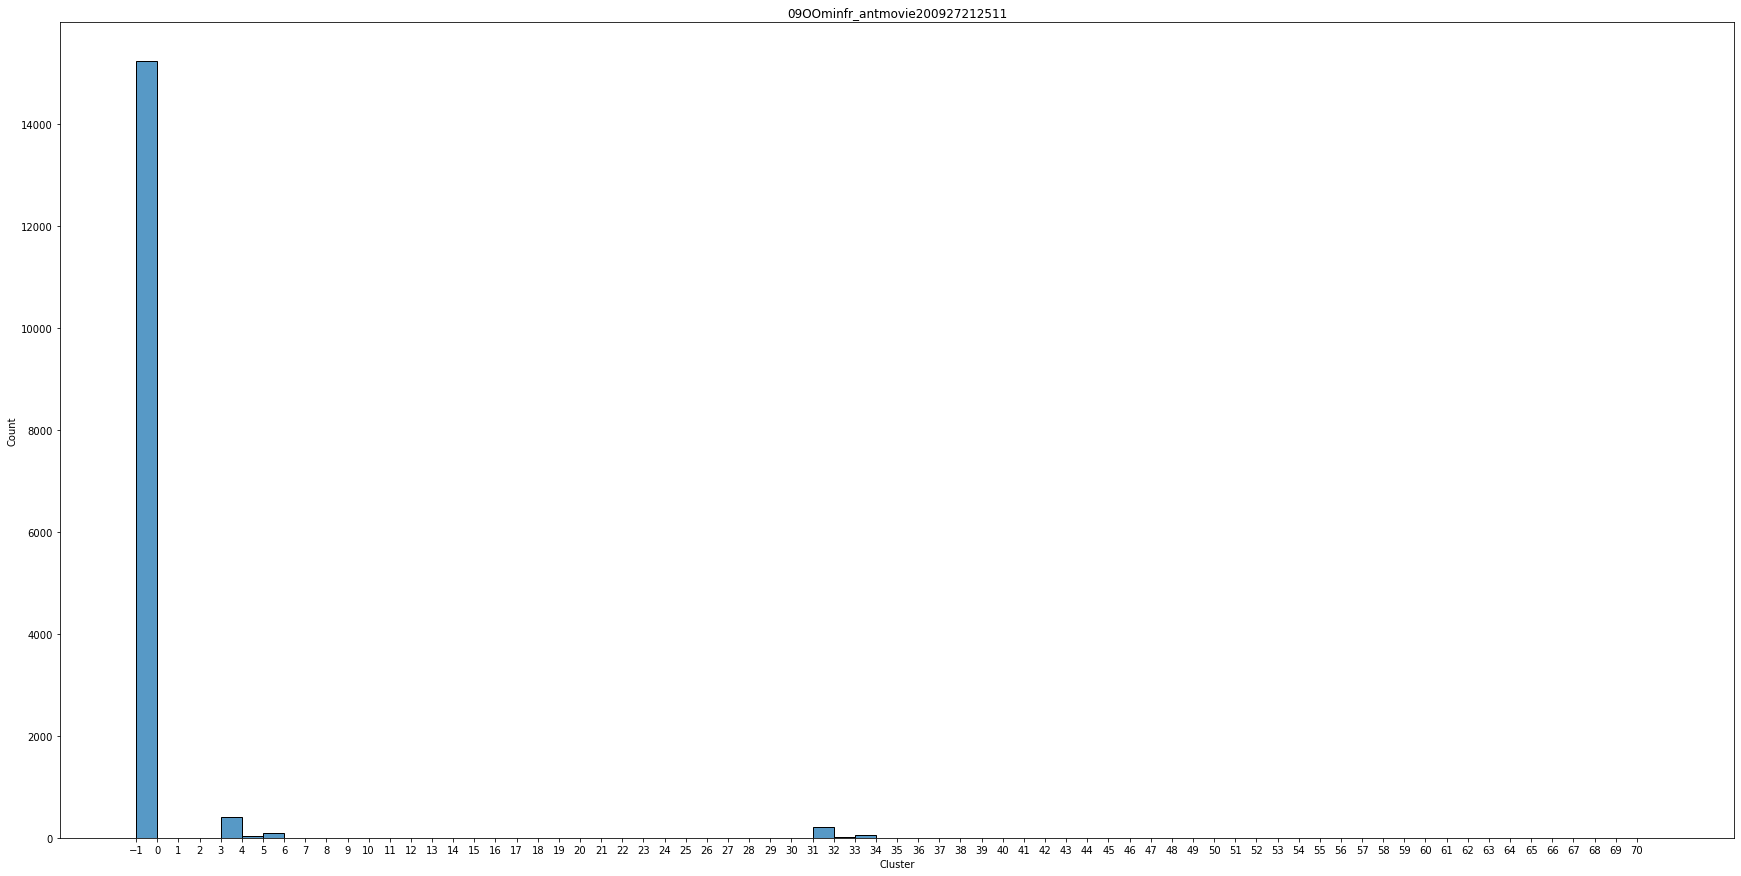

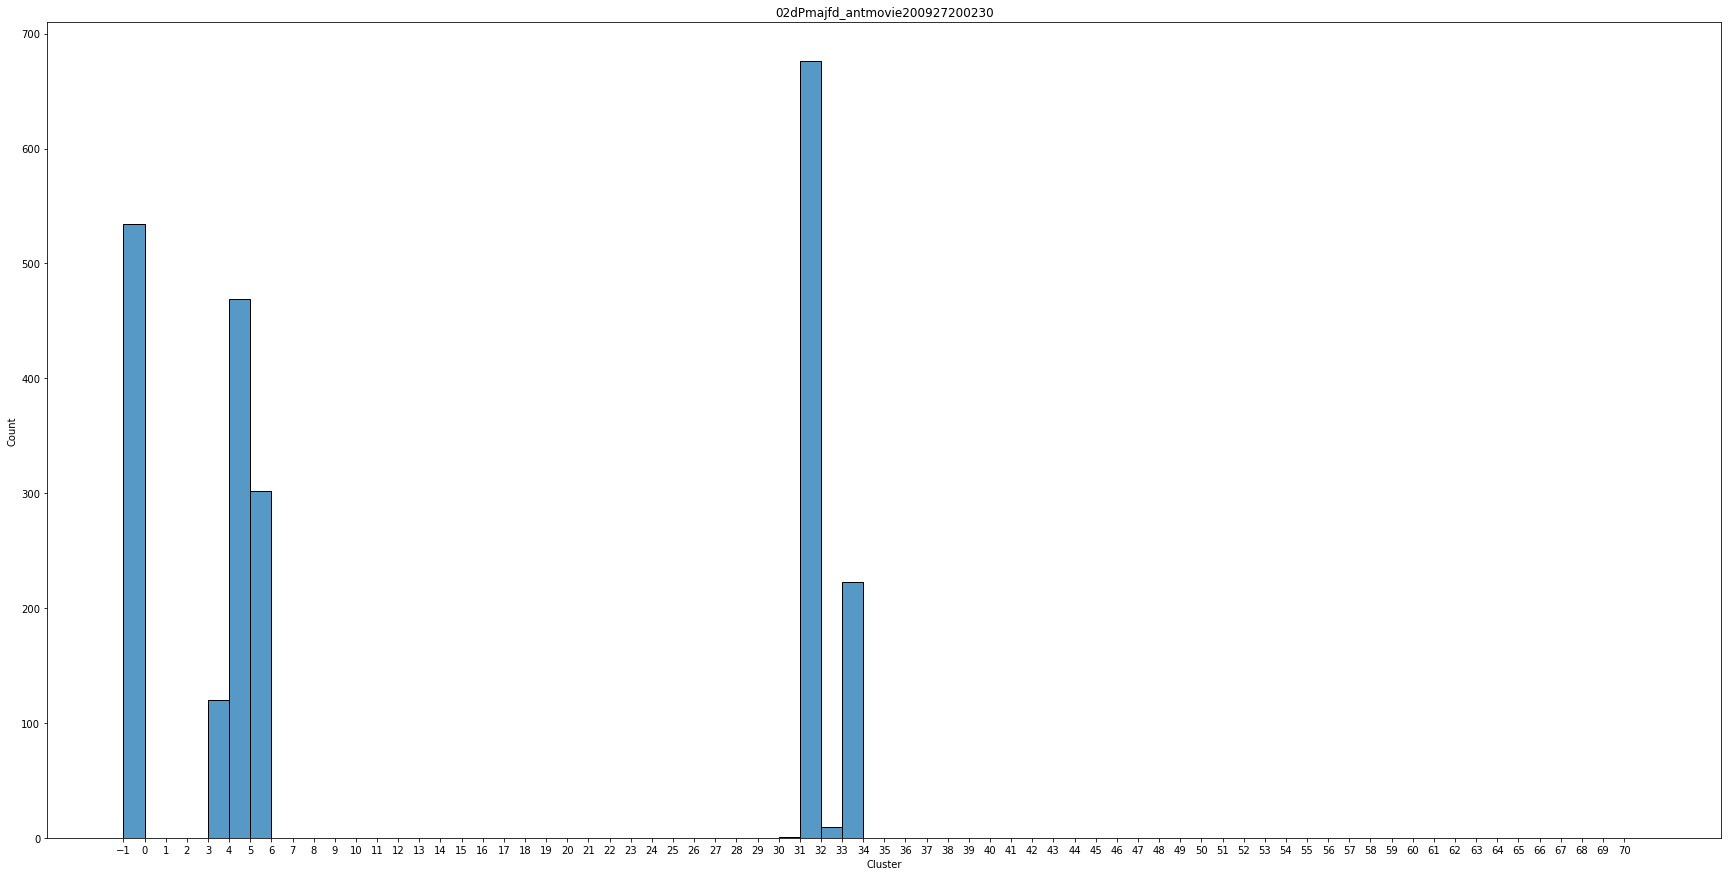

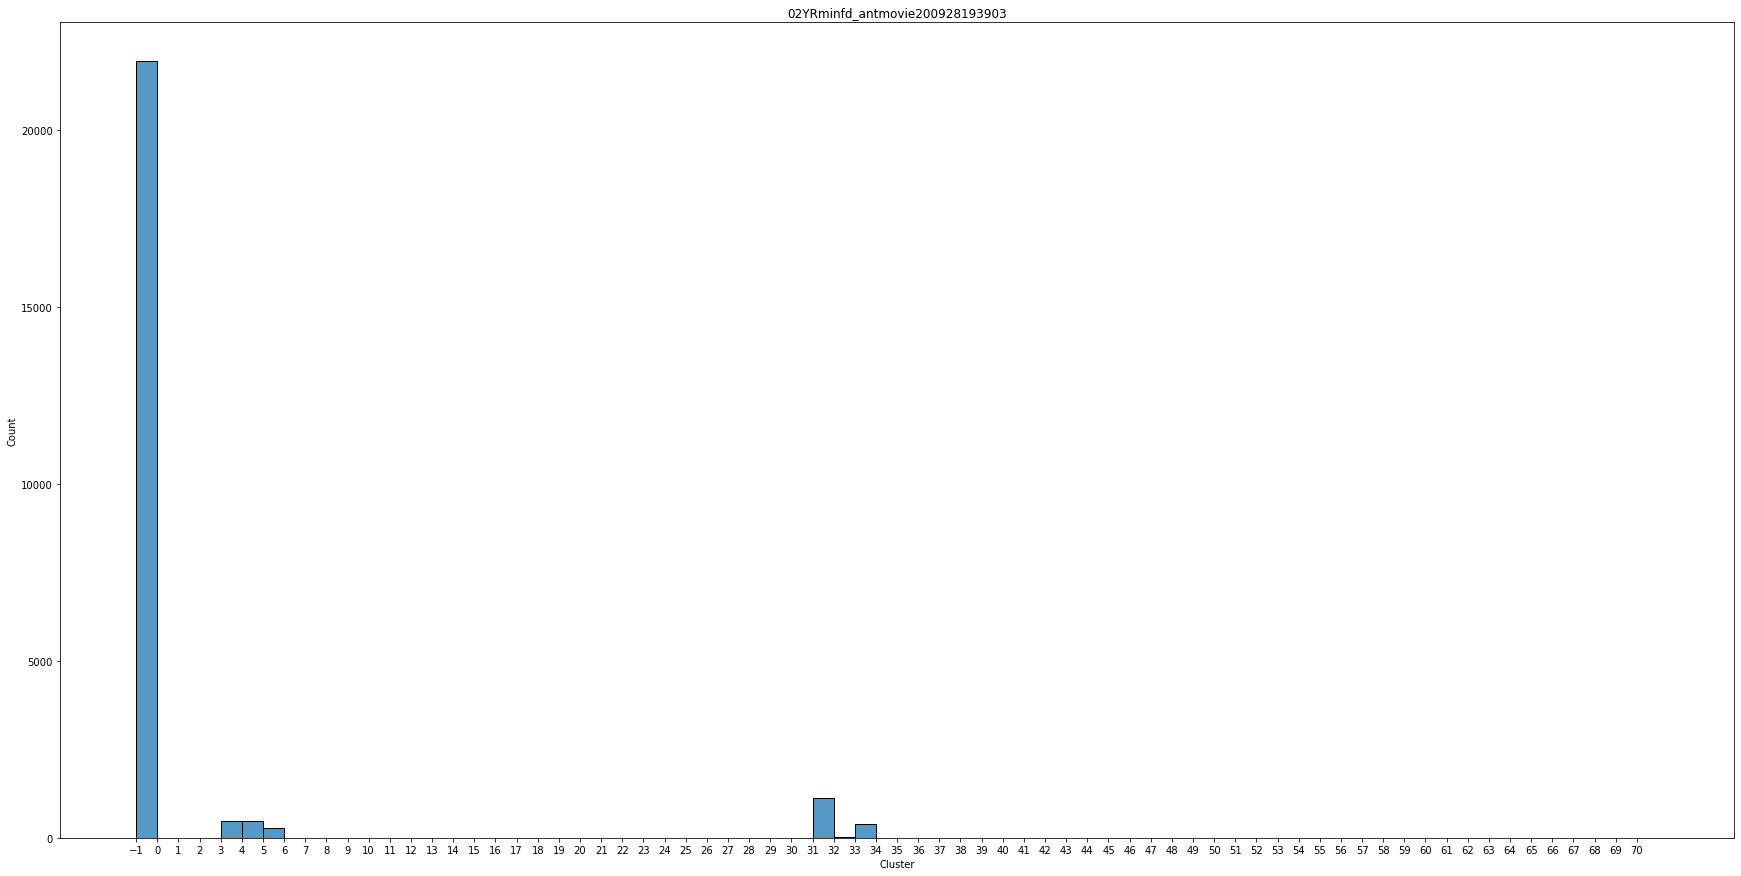

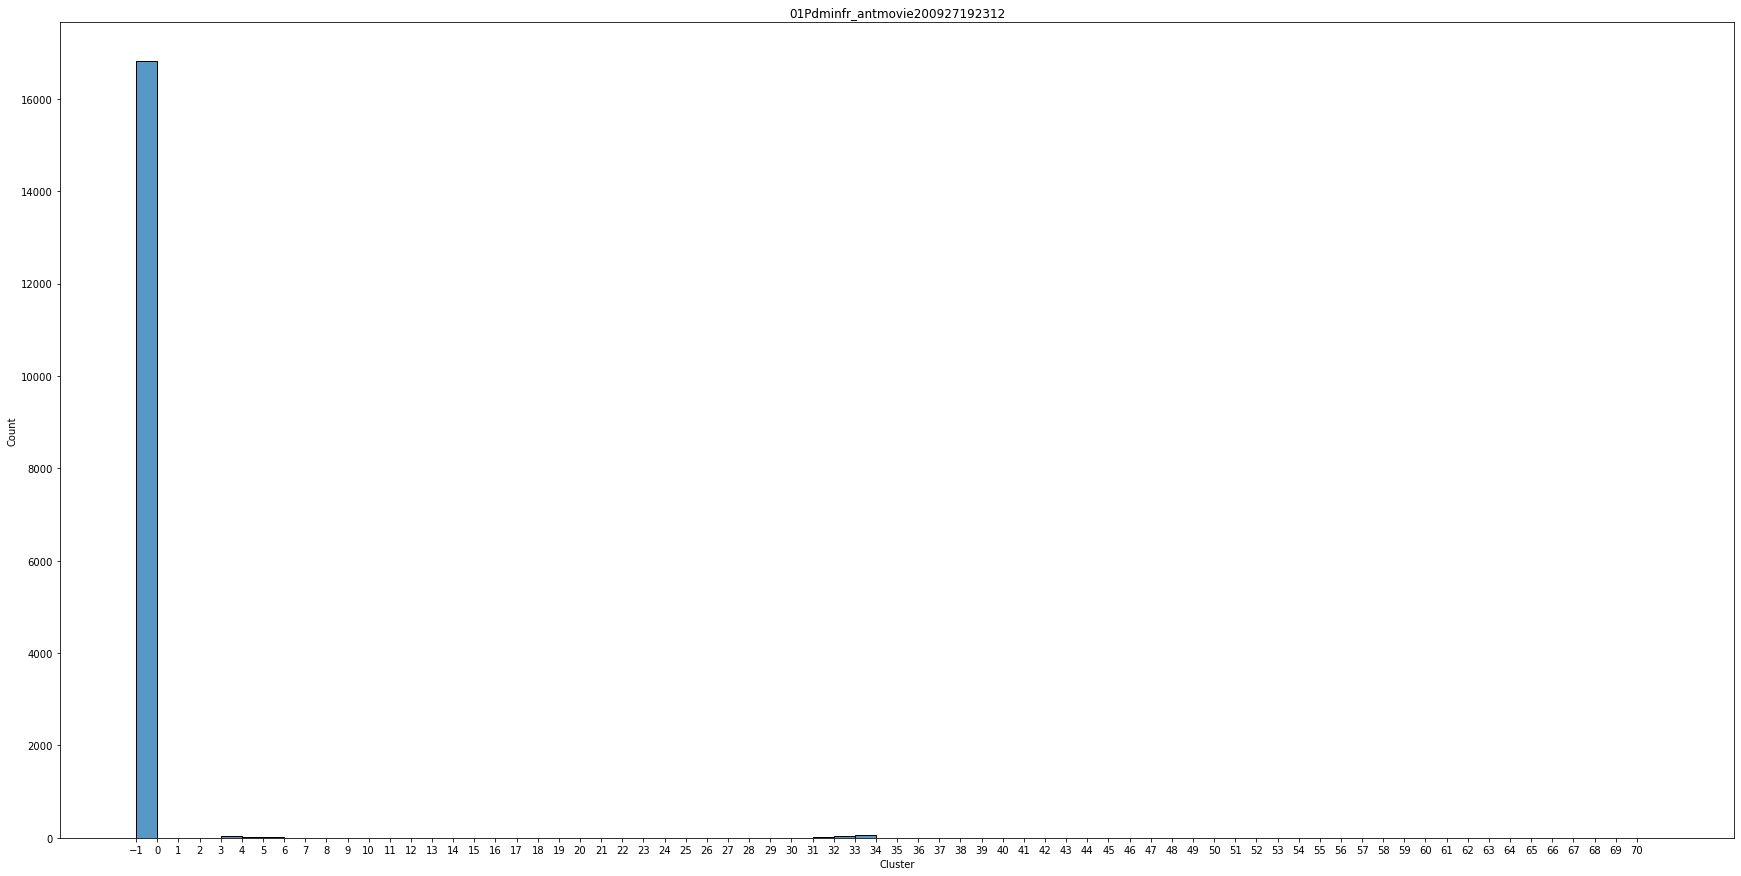

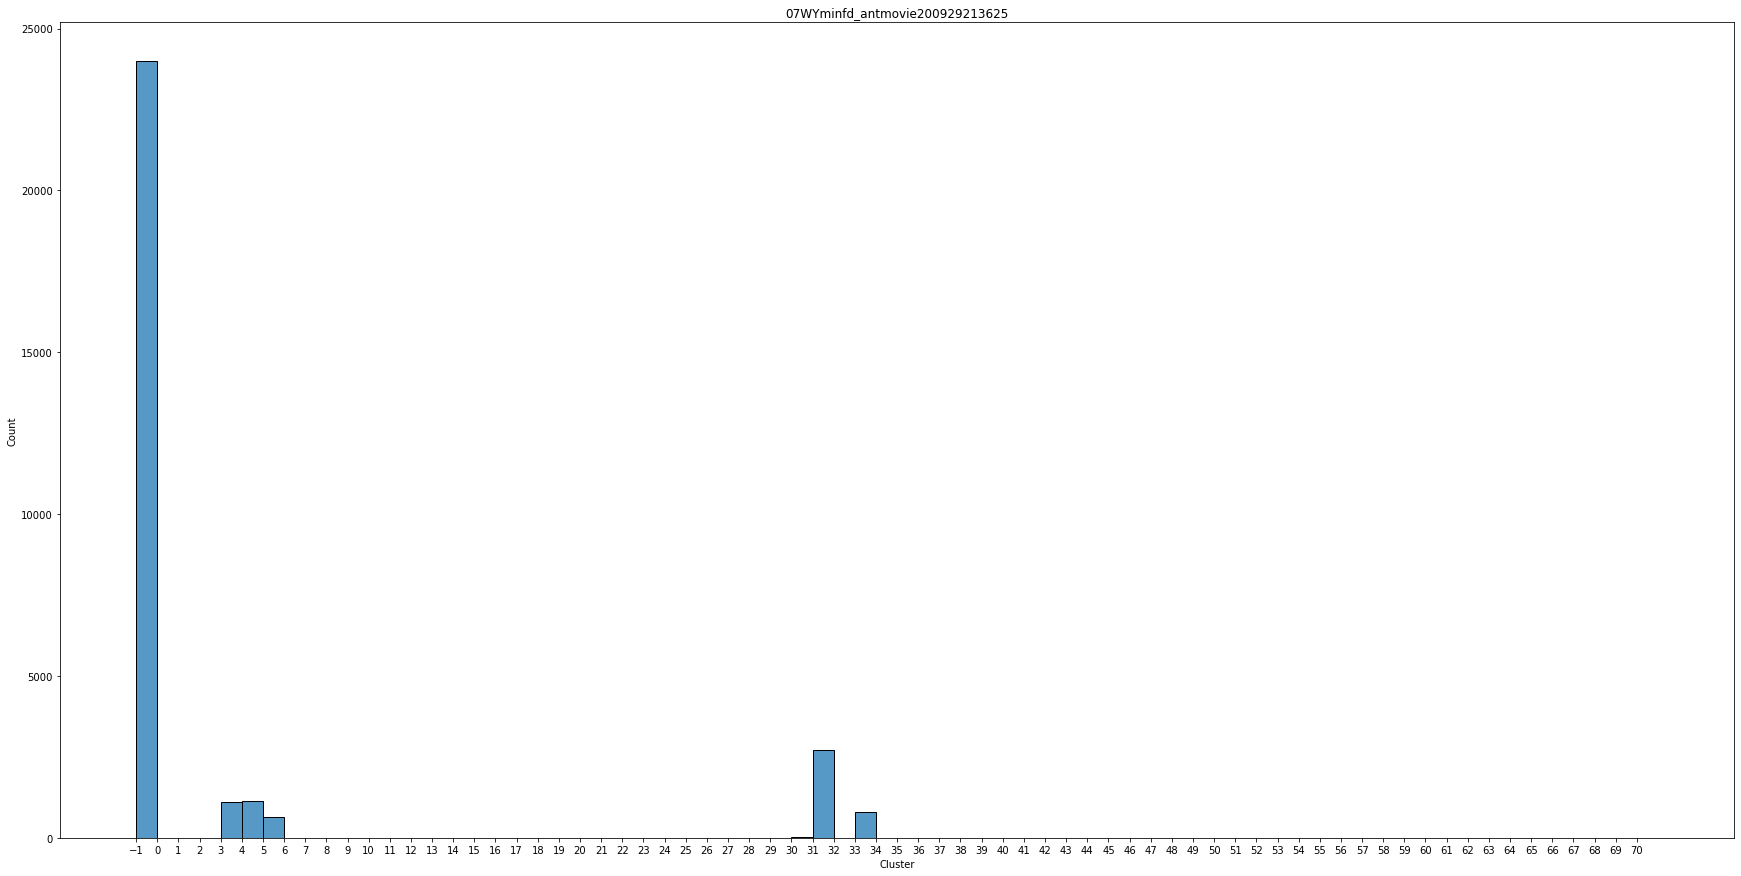

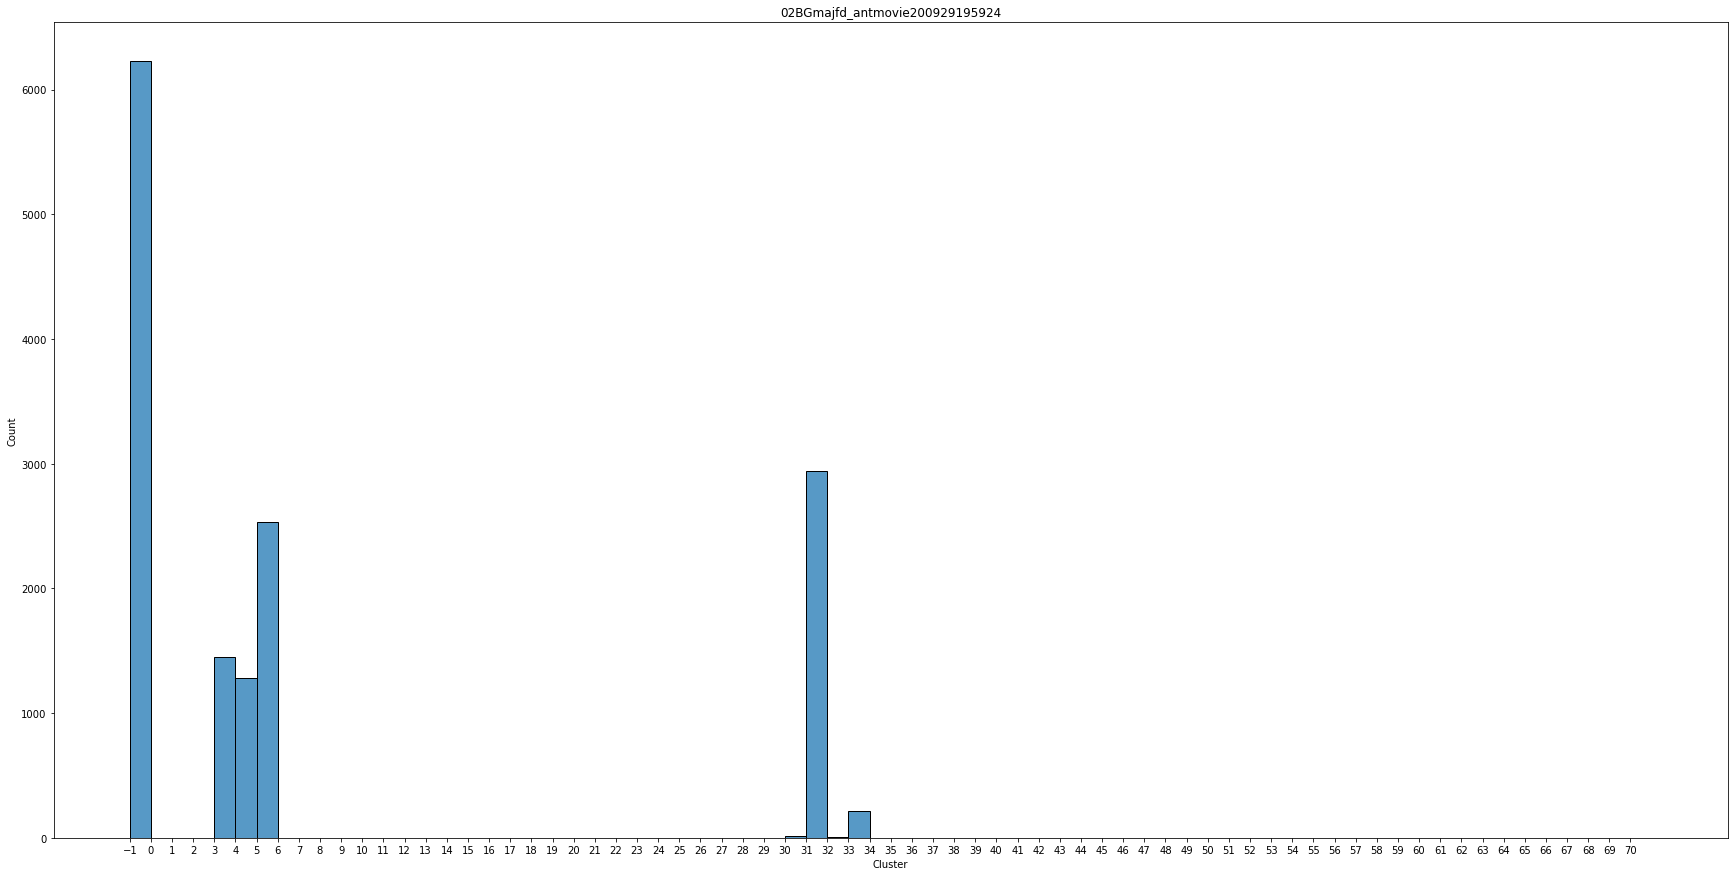

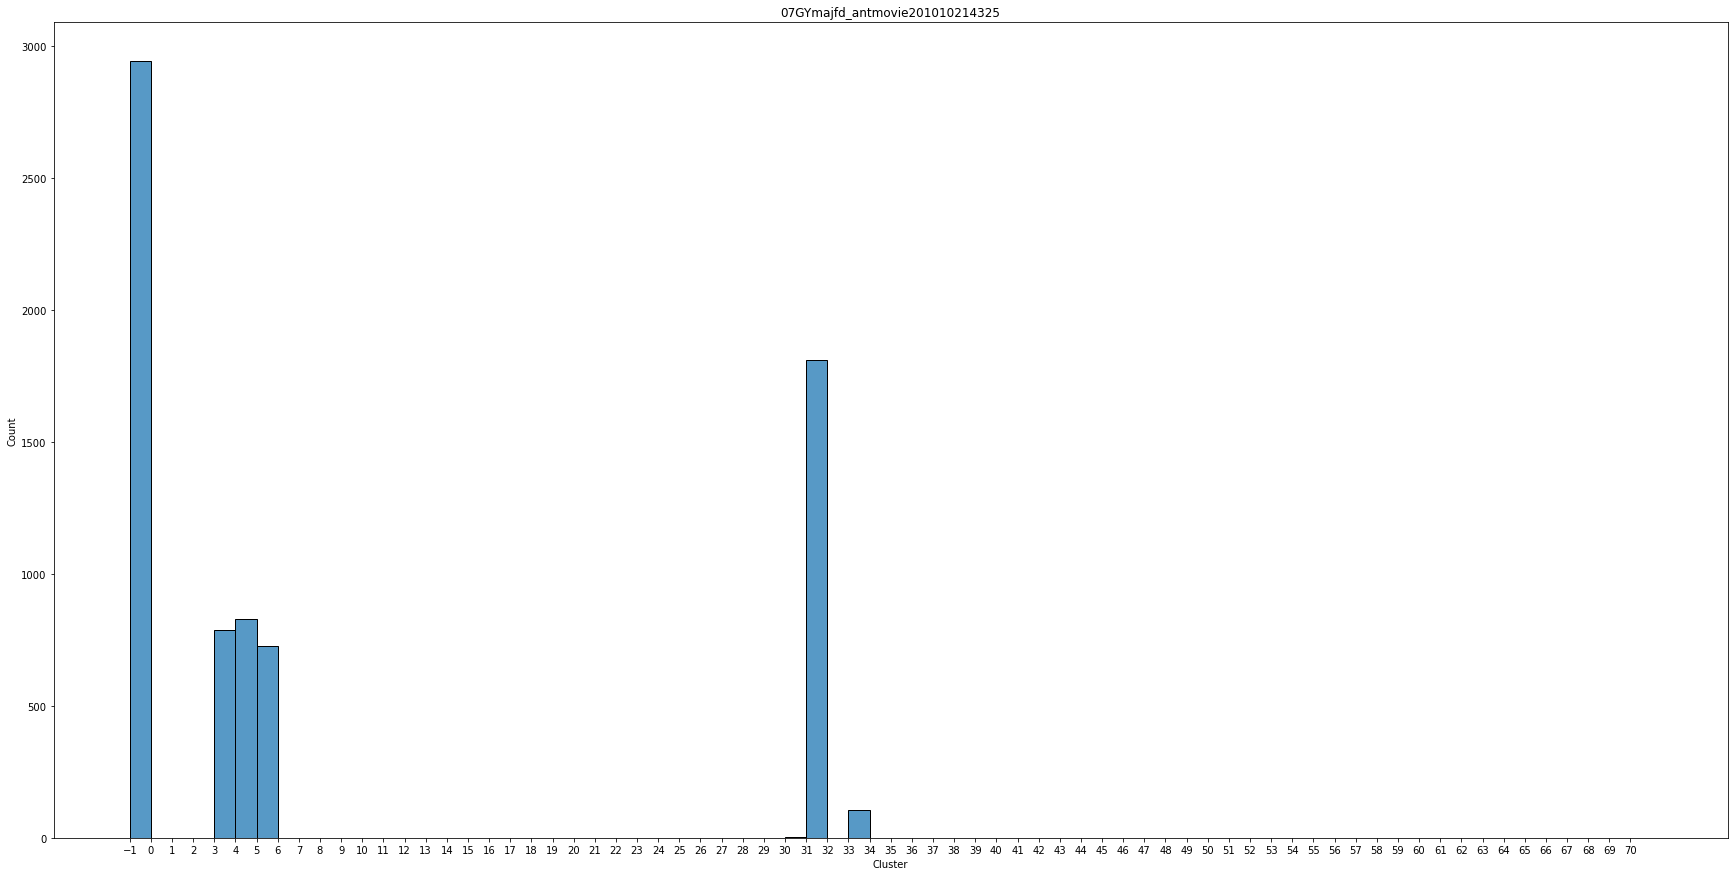

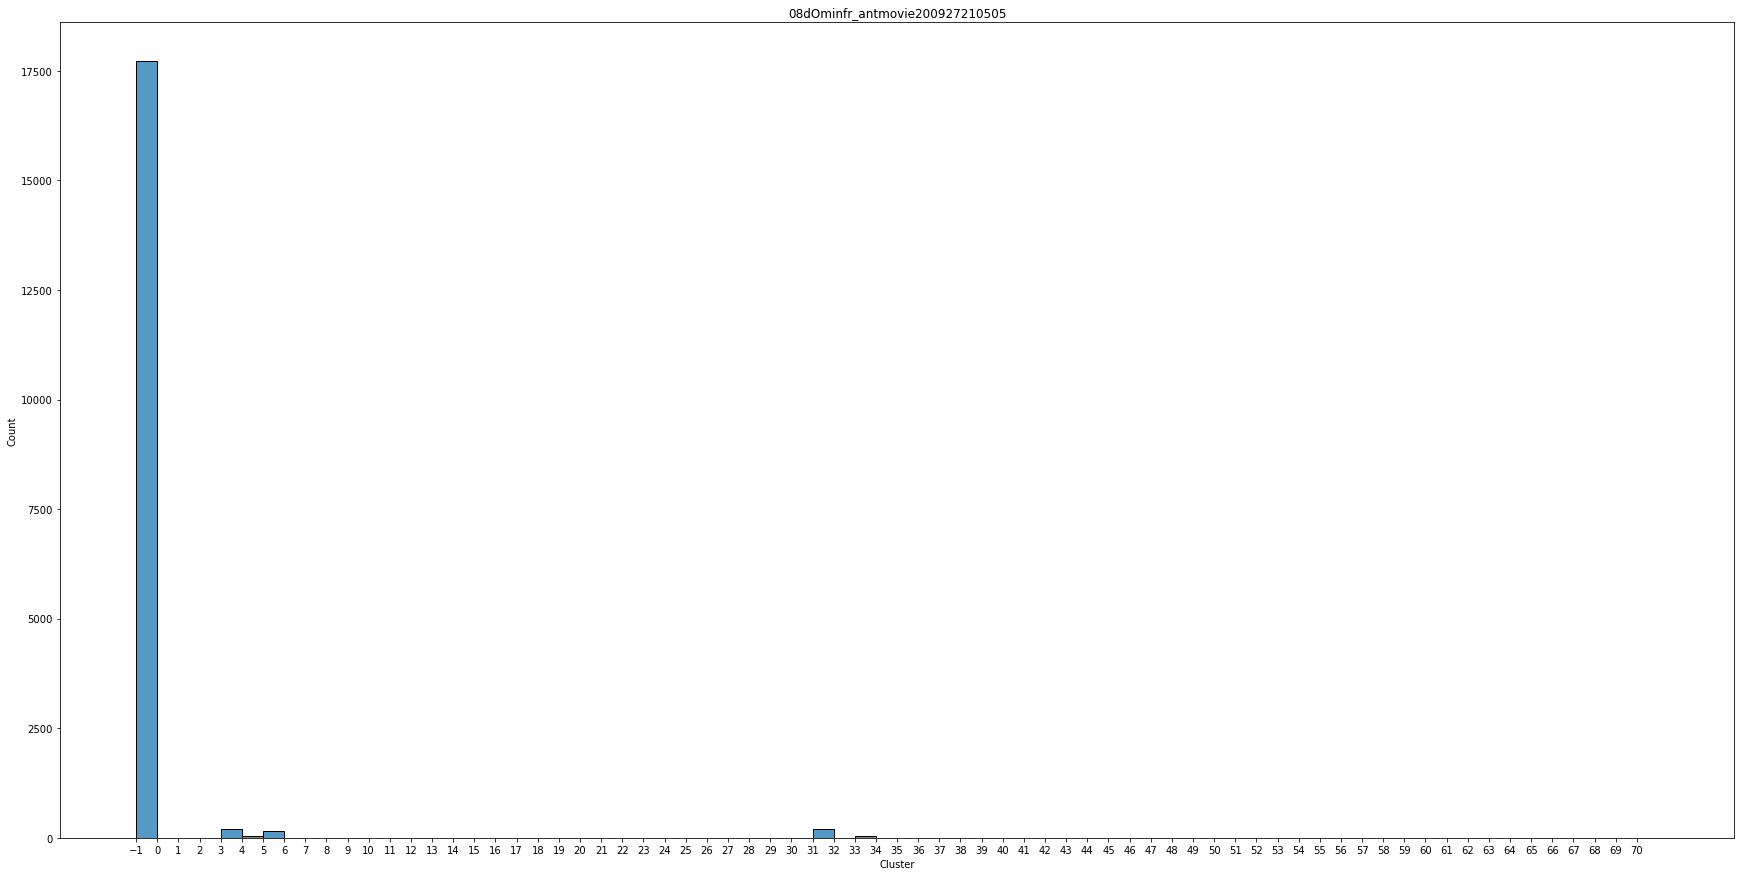

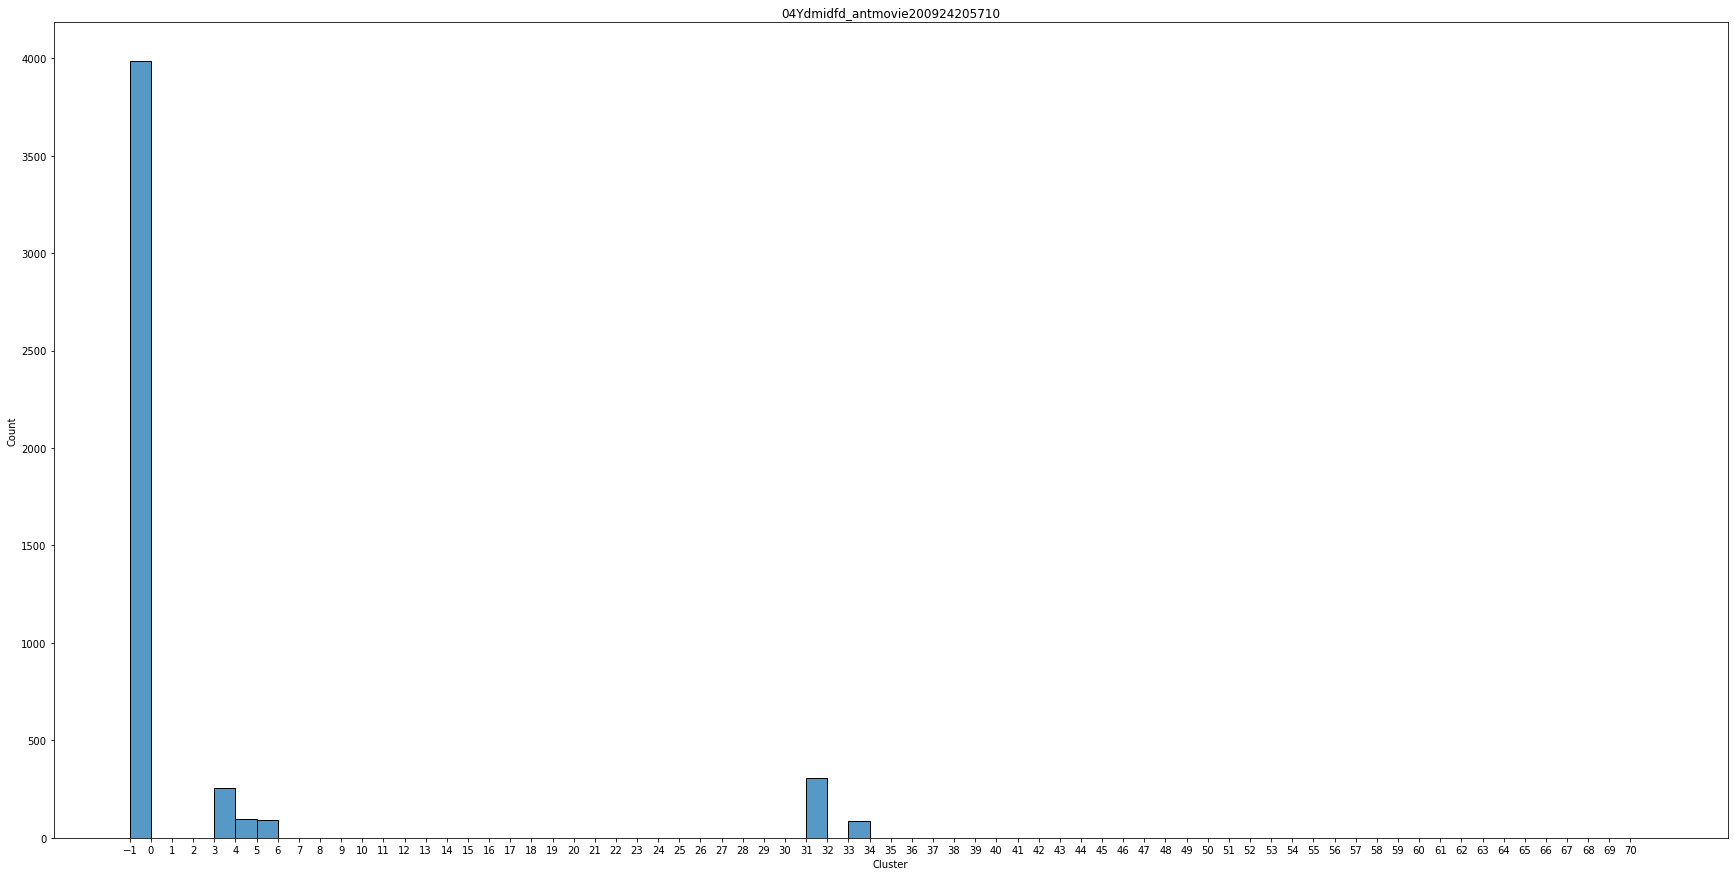

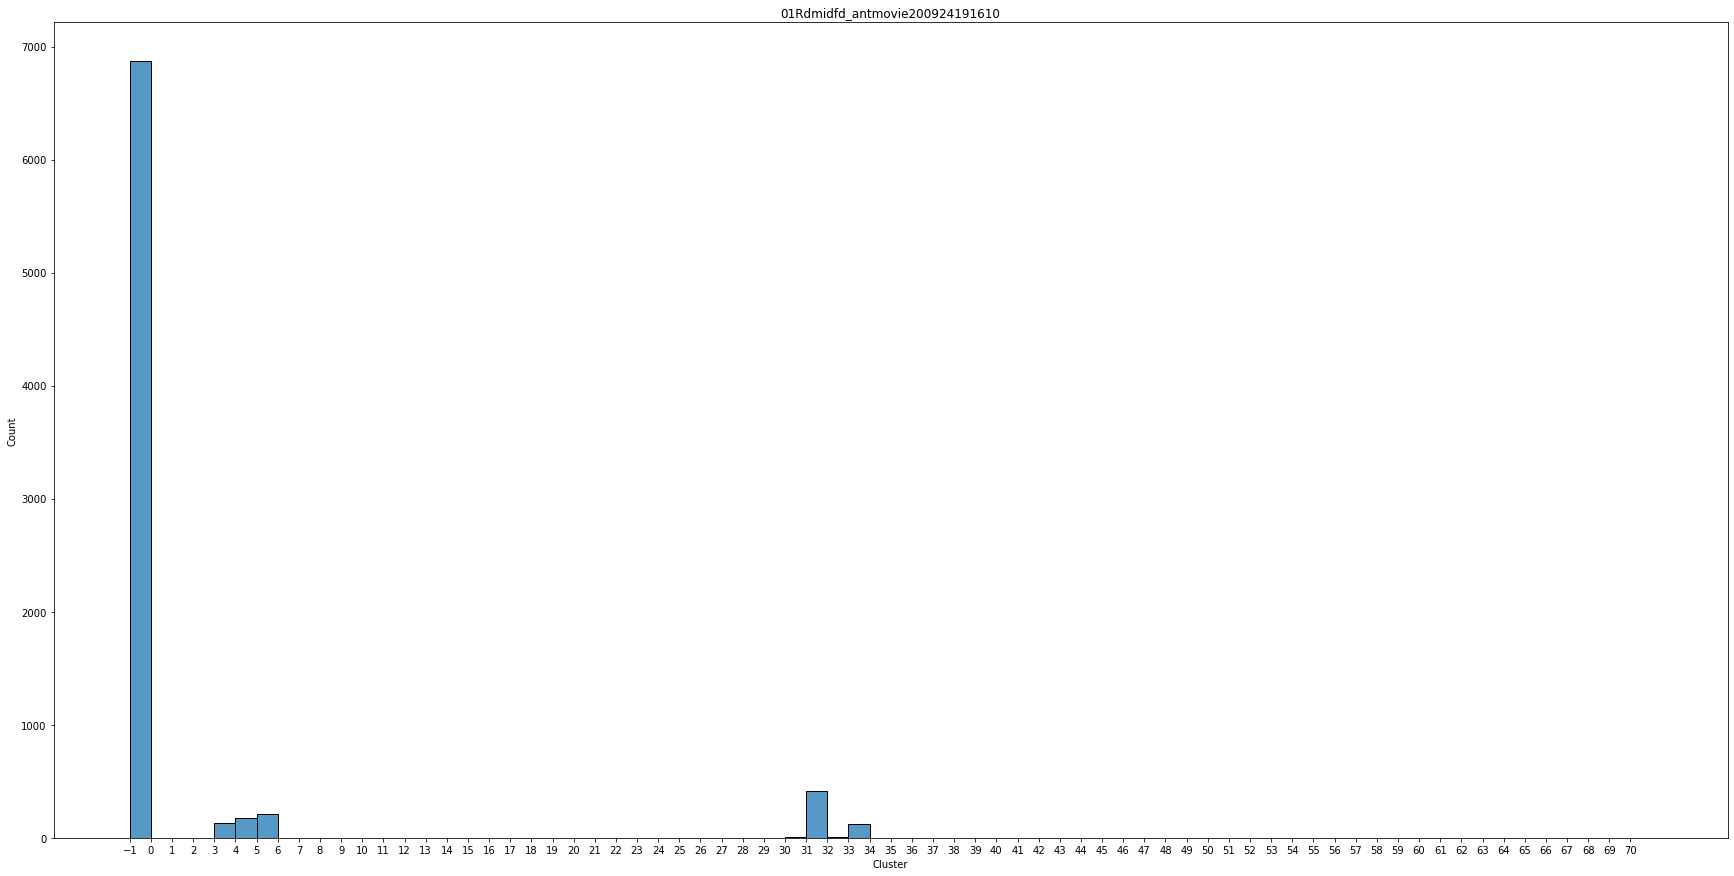

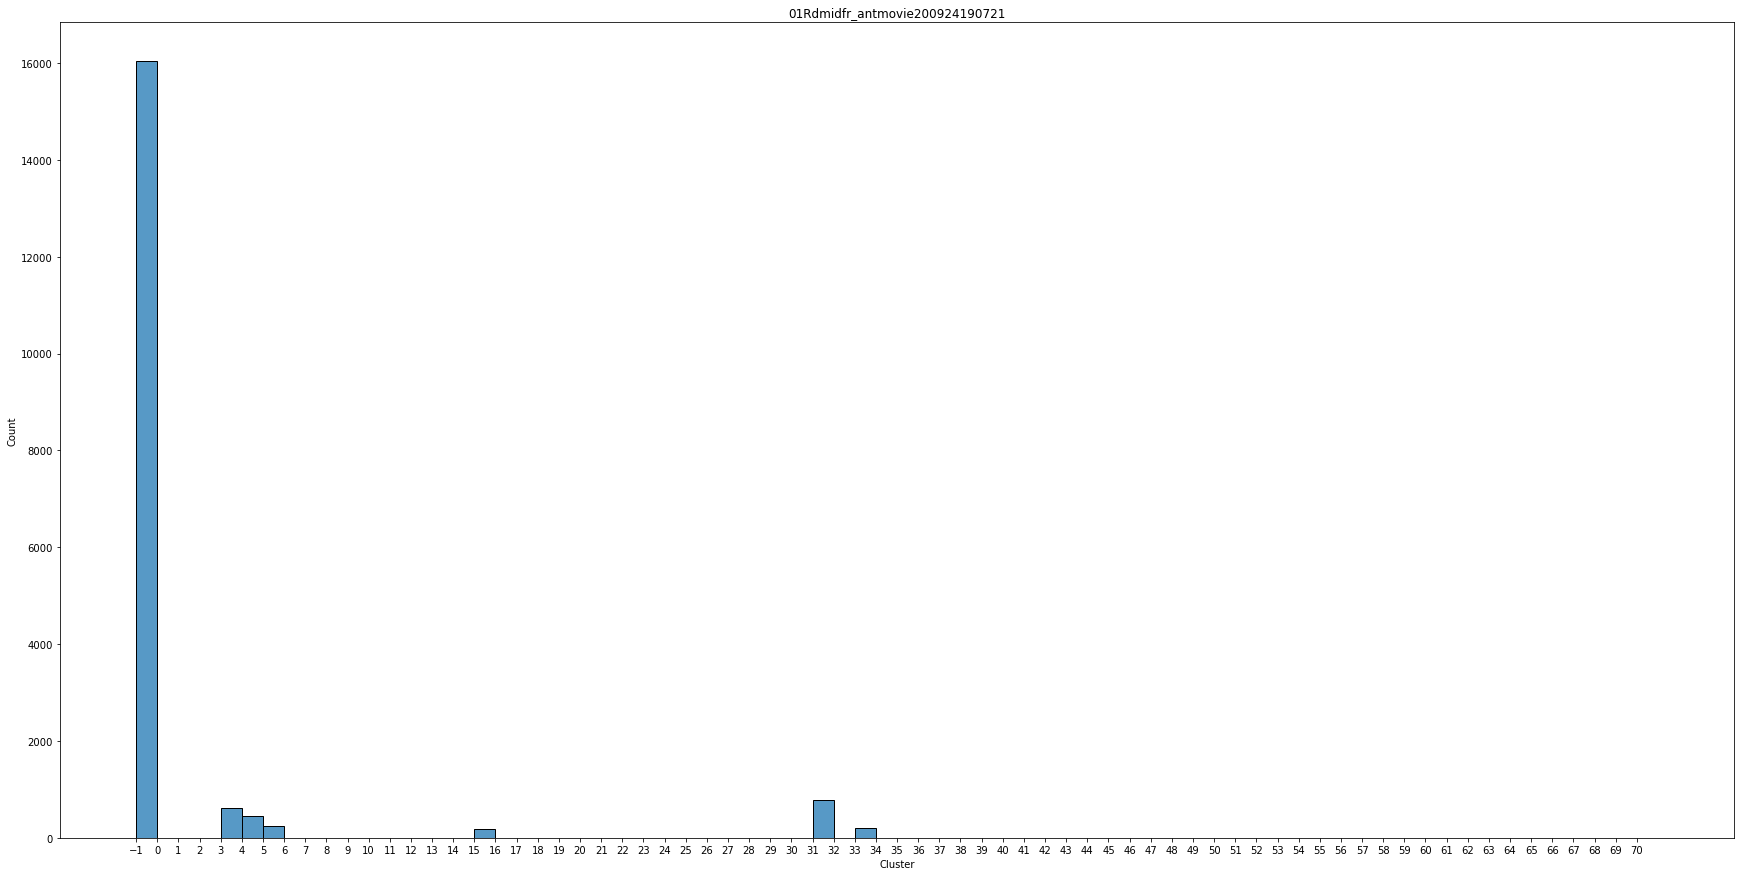

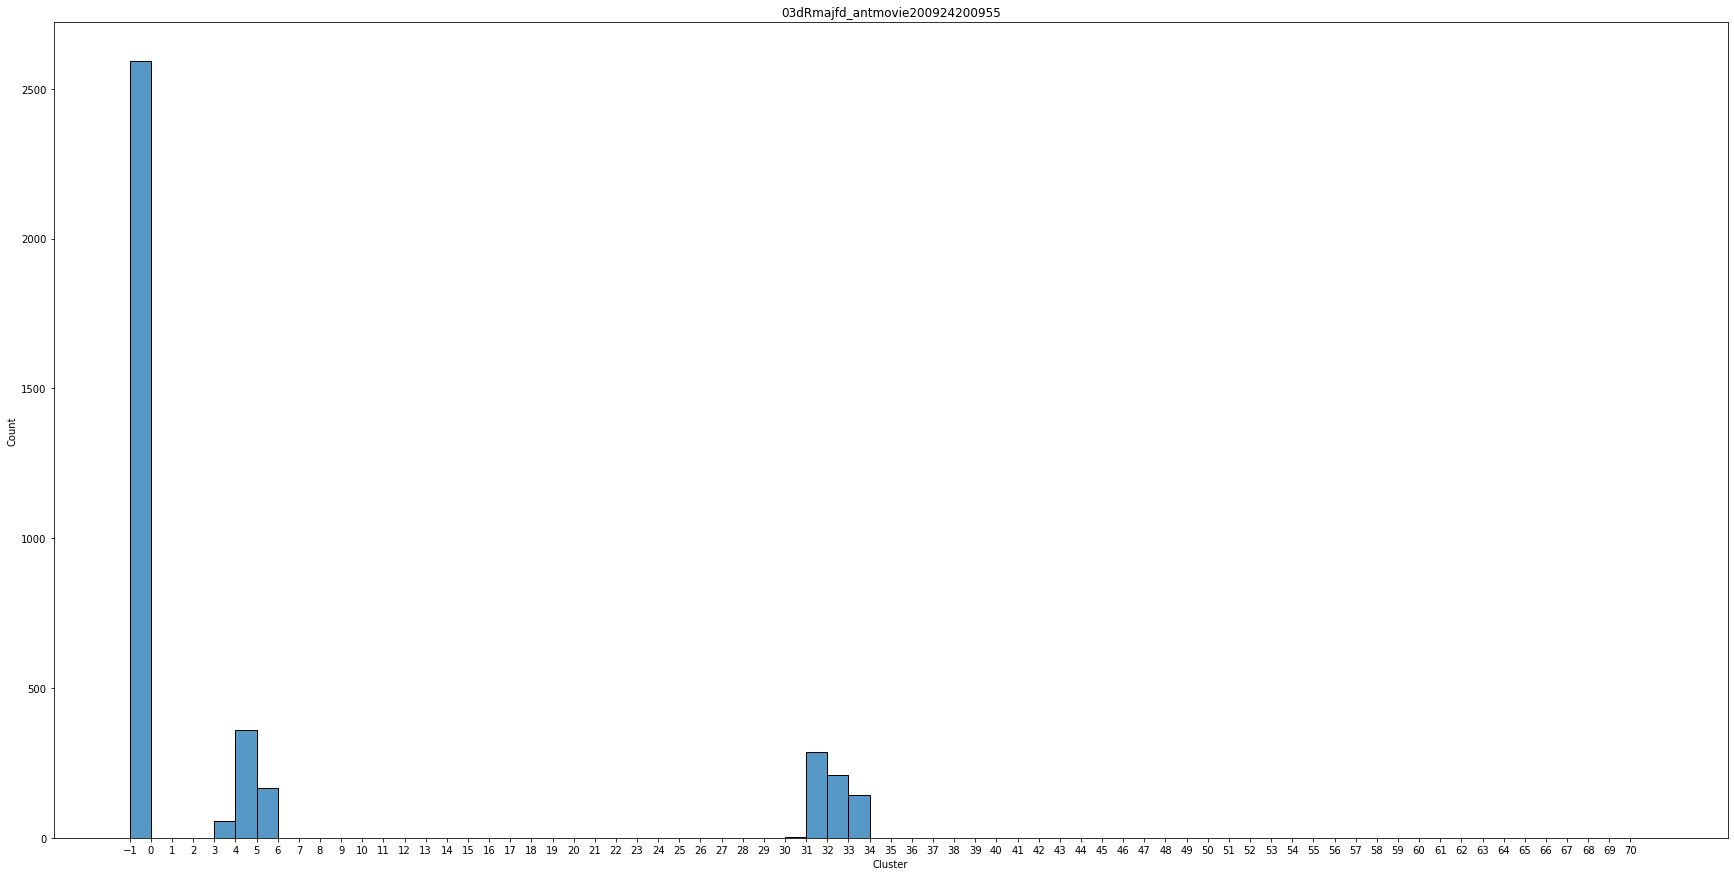

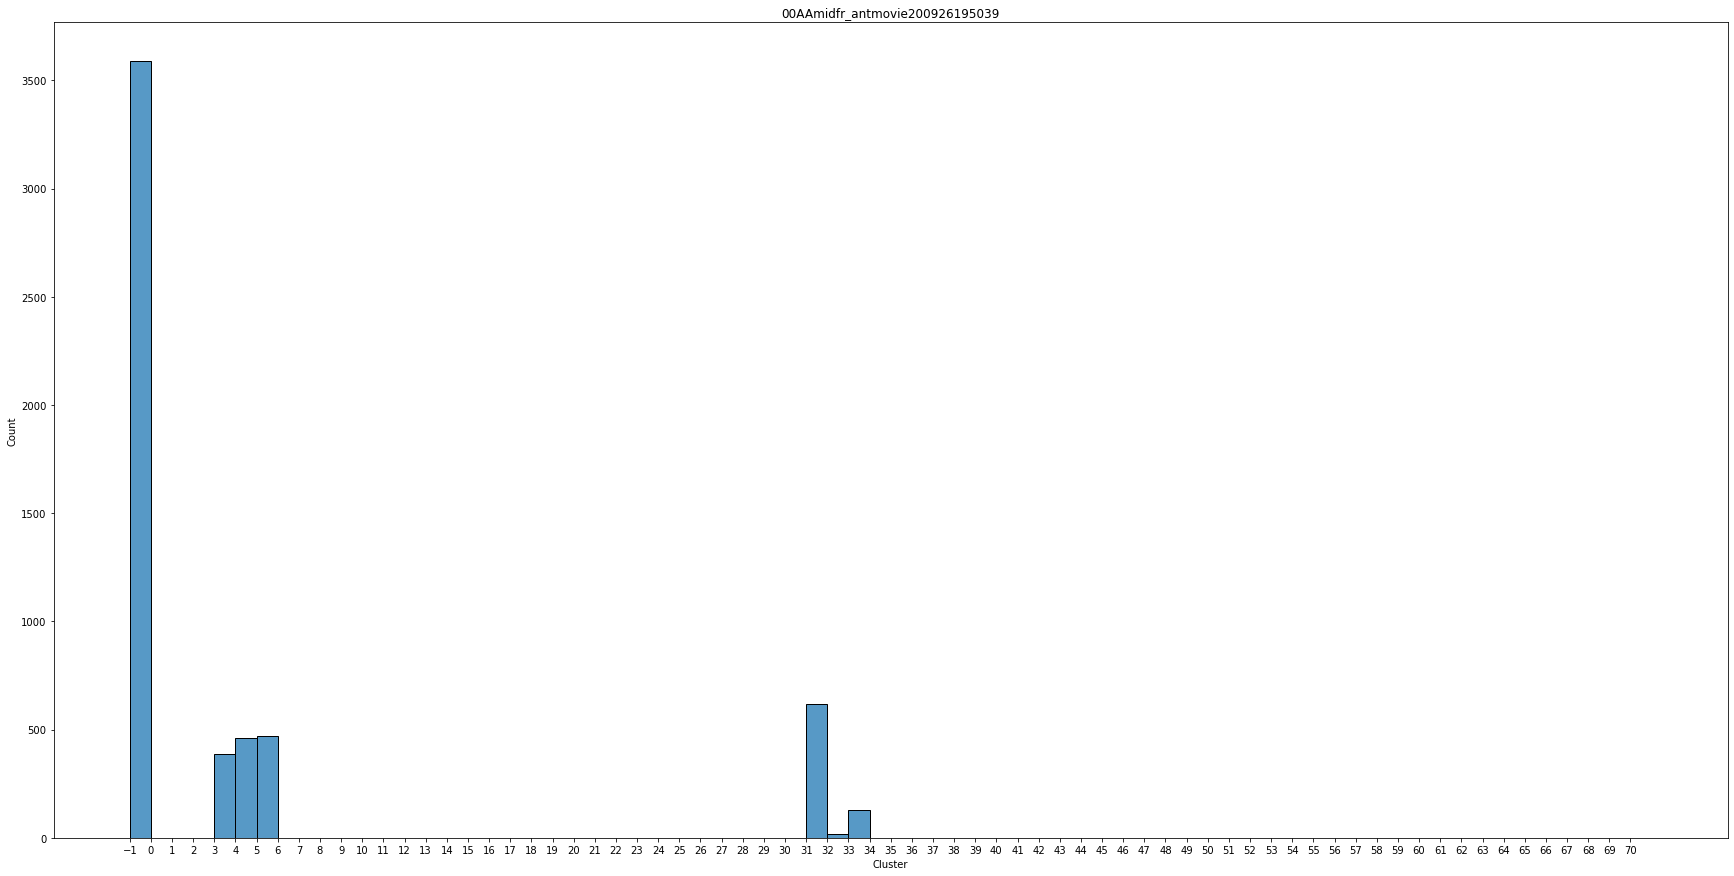

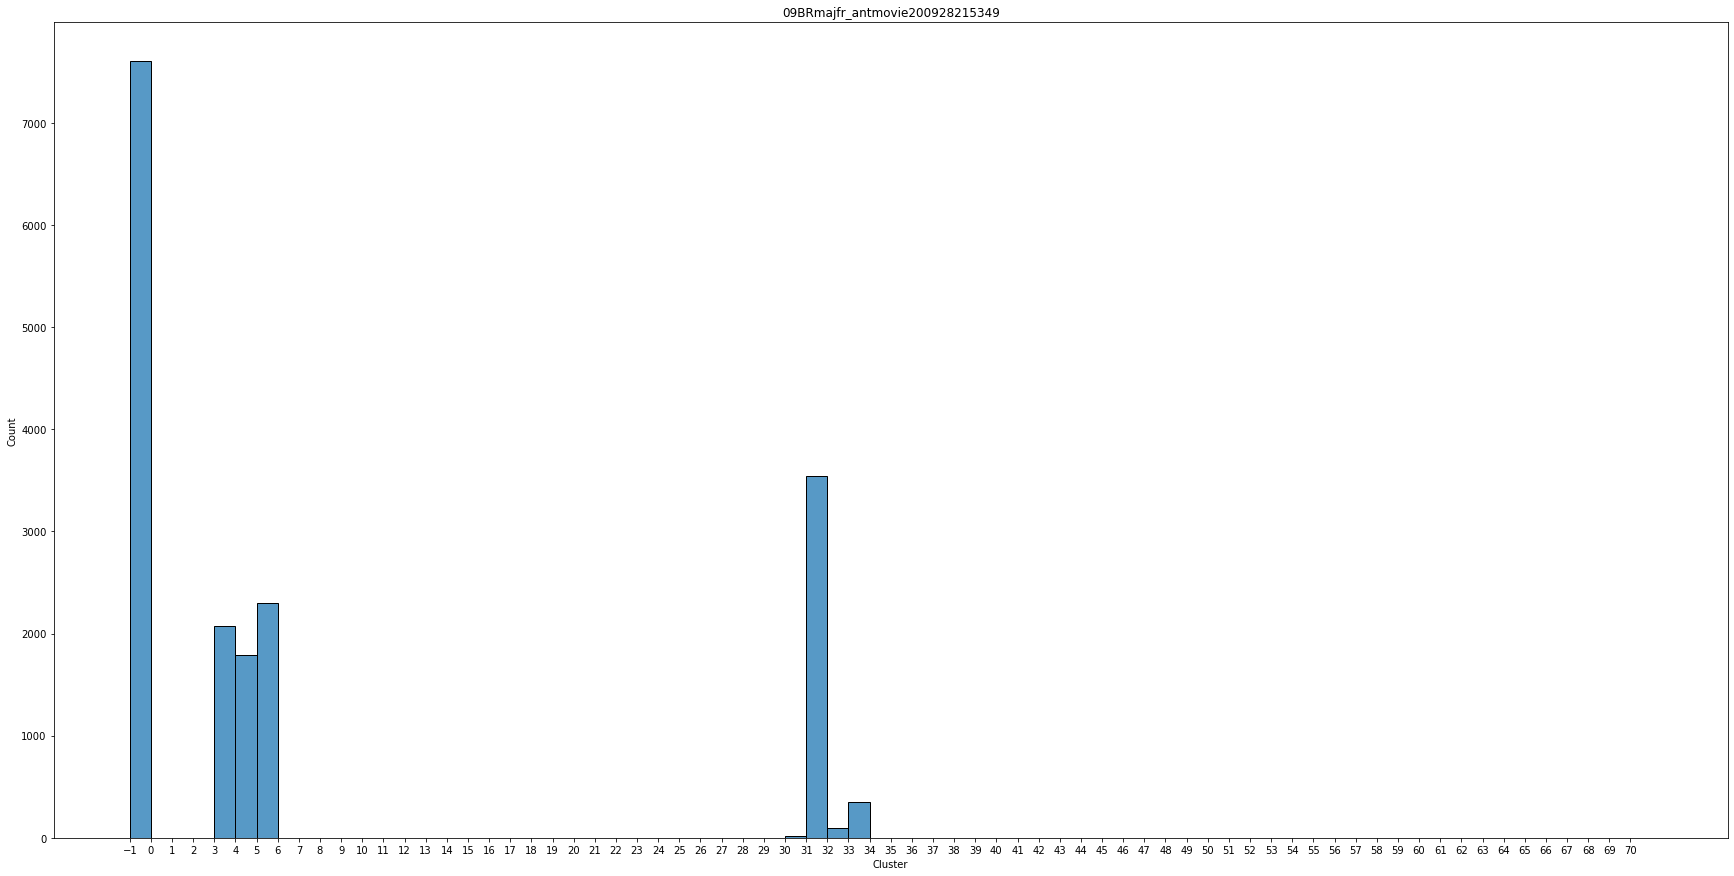

In [10]:
for key, value in cluster_data.items():
    plot_cluster_distribution(value)

In [12]:
all_cluster_data = np.empty(0)

for key,value in cluster_data.items():
    all_cluster_data = np.concatenate([all_cluster_data, value])
    
print(len(all_cluster_data))

1872138


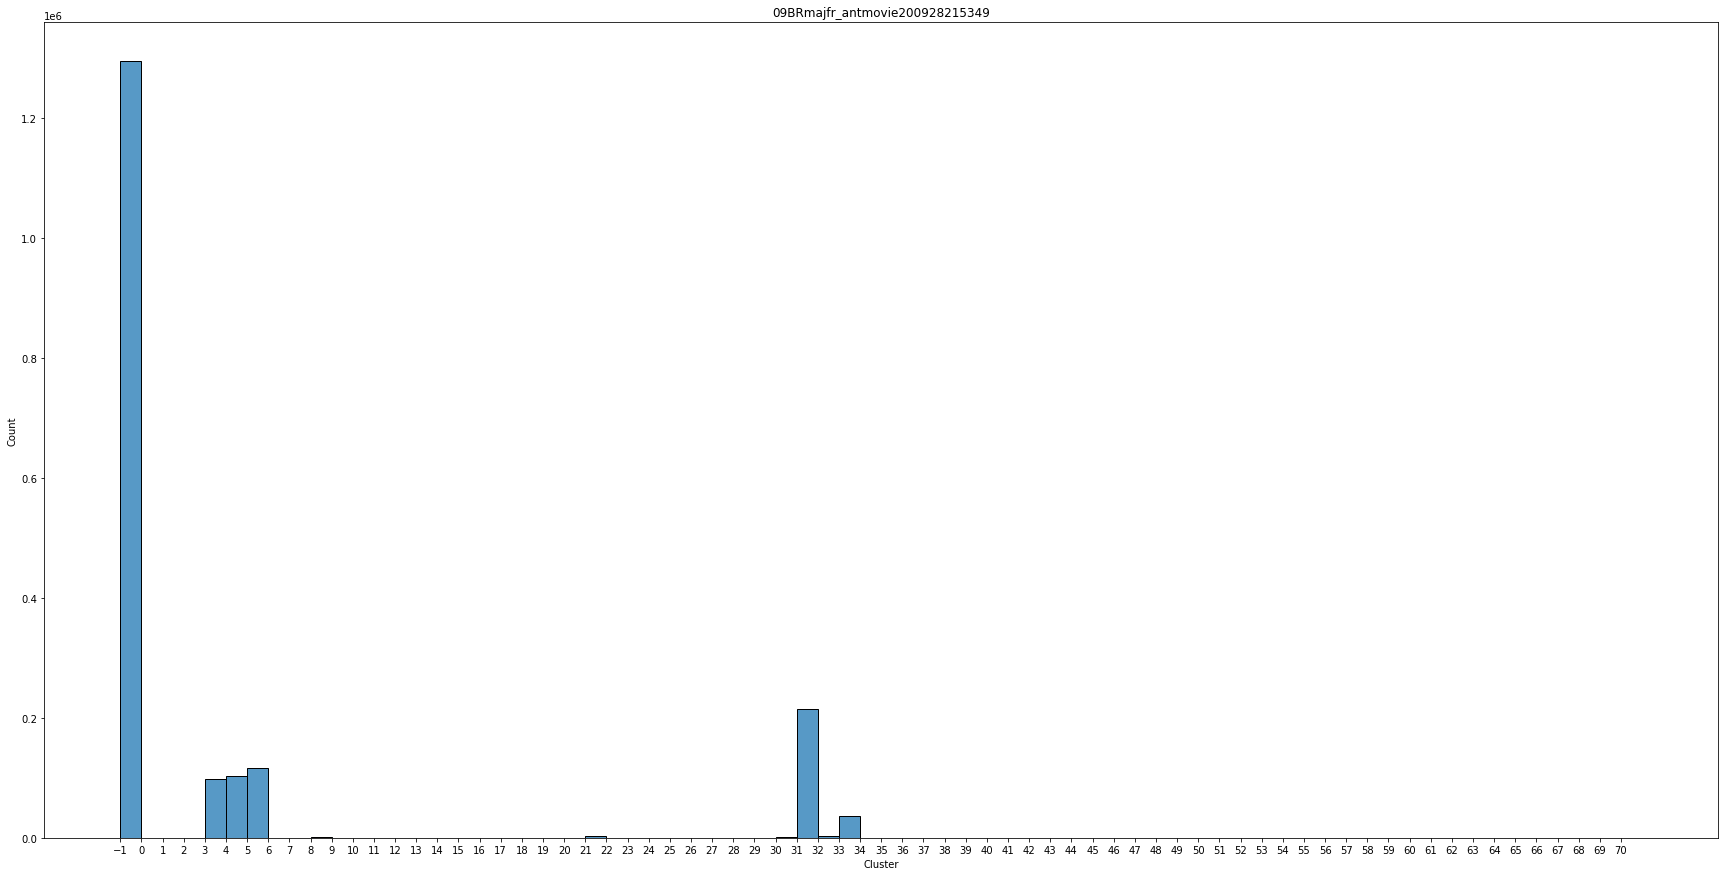

In [13]:
plot_cluster_distribution(all_cluster_data)

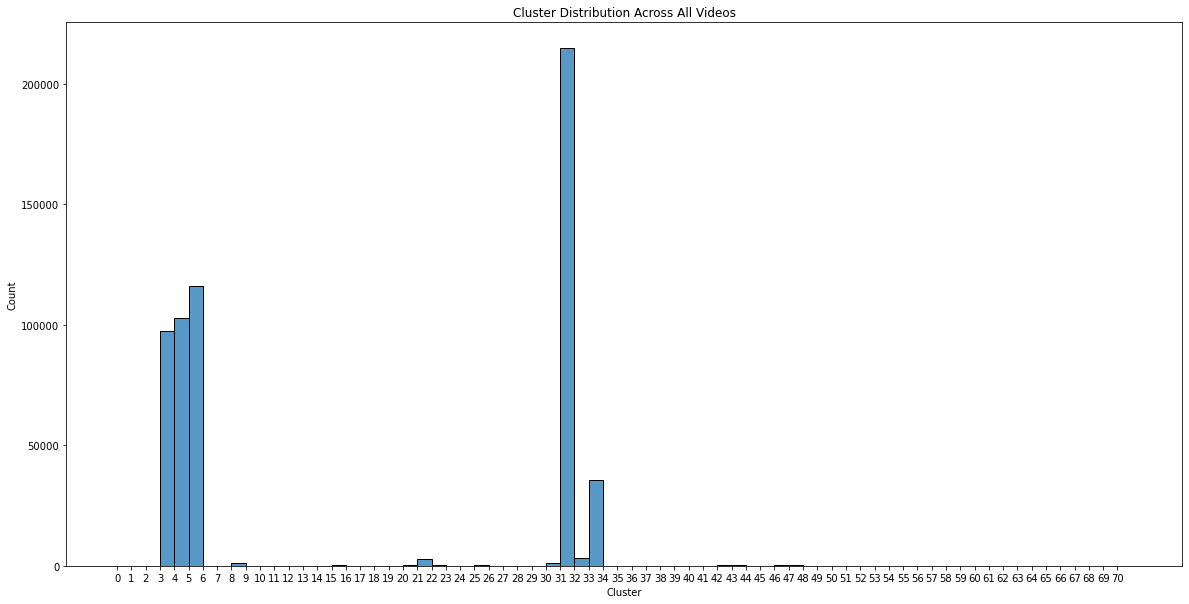

In [14]:
fig,ax = plt.subplots(figsize=(20,10))

sns.histplot(all_cluster_data, binrange=(0,71), bins=71)
    
plt.title("Cluster Distribution Across All Videos")
plt.xlabel("Cluster")
plt.xticks(range(0,71))

plt.show()